## Import functions to implement data preprocessing and other operations

In [1]:
%run ./functions.ipynb

Brier score: 0.25
Brier score: 0.20


## Check todays date to cutoff required data, dont want missing data

In [2]:
from datetime import datetime, timedelta
import pytz
#from pytz import timezone

# Set the timezone for Cairo
cairo_timezone = pytz.timezone('Africa/Cairo')

# Get the current date and time in Cairo timezone
current_datetime_cairo = datetime.now(cairo_timezone)

# Set the cutoff time to 3 pm
cutoff_time = current_datetime_cairo.replace(hour=15, minute=0, second=0, microsecond=0)

# Check if it's before or after the cutoff time
if current_datetime_cairo < cutoff_time:
    # If before 3 pm, get yesterday's date
    cutoff_date = str((current_datetime_cairo - timedelta(days=1)).date())
    print("Yesterday's date:", cutoff_date,' (still before 5pm)')
else:
    # If after 3 pm, get today's date
    cutoff_date = str(current_datetime_cairo.date())
    print("Today's date:", cutoff_date)

Yesterday's date: 2025-01-09  (still before 5pm)


In [3]:
cutoff_date

'2025-01-09'

## List stocks to use and load previous data

In [4]:
import os

base_folder_path = 'stock_data'

# Get a list of all CSV files in the folder
file_paths = [f for f in os.listdir(base_folder_path) if f.endswith('.csv')]

print("List of CSV files in the folder:")
for csv_file in file_paths:
    print(csv_file)


List of CSV files in the folder:
ABUK.csv
ACGC.csv
AJWA.csv
AMOC.csv
ARCC.csv
BTFH.csv
CCAP.csv
CERA.csv
CLHO.csv
EFID.csv
EMFD.csv
ESRS.csv
ETEL.csv
FWRY.csv
GBCO.csv
IFAP.csv
ISPH.csv
JUFO.csv
MASR.csv
MFPC.csv
OCDI.csv
ORHD.csv
ORWE.csv
POUL.csv
RACC.csv
SKPC.csv
SUGR.csv
SWDY.csv
TMGH.csv


In [5]:
len(file_paths)

29

In [6]:
file_paths

['ABUK.csv',
 'ACGC.csv',
 'AJWA.csv',
 'AMOC.csv',
 'ARCC.csv',
 'BTFH.csv',
 'CCAP.csv',
 'CERA.csv',
 'CLHO.csv',
 'EFID.csv',
 'EMFD.csv',
 'ESRS.csv',
 'ETEL.csv',
 'FWRY.csv',
 'GBCO.csv',
 'IFAP.csv',
 'ISPH.csv',
 'JUFO.csv',
 'MASR.csv',
 'MFPC.csv',
 'OCDI.csv',
 'ORHD.csv',
 'ORWE.csv',
 'POUL.csv',
 'RACC.csv',
 'SKPC.csv',
 'SUGR.csv',
 'SWDY.csv',
 'TMGH.csv']

# Scarping data

In [7]:
from tvDatafeed import TvDatafeed,Interval
# get credentials for tradingview
username = '...'
password = '...'
tv = TvDatafeed(username=username,password=password)

error while signin
you are using nologin method, data you access may be limited


In [8]:
##cib data and fill till today
time.sleep(5)
cib_try2 = df2=tv.get_hist(symbol='CBKD',exchange='LSIN',interval=Interval.in_daily,n_bars=1100)

## Other handy features to use

In [10]:
#cib_try2 = cibtry.copy()
cib_try2['Date'] = pd.to_datetime(cib_try2.index.date)
start_date = cib_try2.Date.min()
end_date = pd.to_datetime(cutoff_date)
#cib_try
# Reindex to include missing dates
cib_try2.set_index('Date', inplace=True)
cib_try2['CIB_Close'] = round(cib_try2['close'],2)
cib_try2['CIB_EMA_5'] = ta.trend.ema_indicator(cib_try2['CIB_Close'], window=5)
cib_try2 = cib_try2[['CIB_EMA_5','CIB_Close']]
all_dates = pd.date_range(start=start_date, end=end_date)
cib_try2 = cib_try2.reindex(all_dates)
cib_try_org = cib_try2.ffill()
cib_try_org

,CIB_EMA_5,CIB_Close
2020-08-26,NaN,2.10
2020-08-27,NaN,2.13
2020-08-28,NaN,2.13
2020-08-29,NaN,2.13
2020-08-30,NaN,2.13
...,...,...
2025-01-05,1.493352,1.50
2025-01-06,1.485568,1.47
2025-01-07,1.483712,1.48
2025-01-08,1.472475,1.45


In [11]:
#dfs = {}
#missing_data = []

#all_dfs = []
hourly_dfs_30min = {}
grouped_dfs = {}

forward_win = 8
percent_threshold = 1.2
# Filter out UndefinedMetricWarning
warnings.filterwarnings("ignore")

# Read and name DataFrames using a for loop
for file_name in file_paths:
    # Create a variable name based on the file name (remove extension)
#     username = 'blackberry9300and7'
#     password = '12Qwasecsde4'

#     tv = TvDatafeed(username=username,password=password)
    df_name = file_name.split('.')[0]


#     url = base_s.format(codes[df_name])

#     driver.get(url)

#     soup = BeautifulSoup(driver.page_source, features= 'lxml')



    #json_text = soup.pre.get_text()

    # Parse the JSON text

    #data = json.loads(json_text)
    #df2 = pd.DataFrame(data['data'])
    for i in range(10):
        #df2=tv.get_hist(symbol=df_name,exchange='EGX',interval=Interval.in_15_minute,n_bars=20000)
        df2=tv.get_hist(symbol=df_name,exchange='EGX',interval=Interval.in_30_minute,n_bars=12000)
        if df2 is not None:
            break
        else:
            print('Retrying..',df_name)
            time.sleep(30)



    df2.columns = ['Symbol','Open','High','Low','Price','Volume_numeric']#,'idk']
    #df2['Date'] = pd.to_datetime(df2['timestamp'],unit='ms')#.dt.tz_localize('UTC').dt.tz_convert(timezone(timedelta(hours=2)))
    df2 = df2[['Price','Open','High','Low','Volume_numeric']]#,'timestamp']]
    #df2.set_index('Date', inplace=True)
    #df2['Volume_numeric']  = df2['Volume_numeric'].astype('float')
    df2['date'] = df2.index#.date


    df2 = df2.tail(len(df2)-30)
#     preds  = len(df2[df2.buy_rules=='1'])

#     len_without_last = len(df2) - forward_win

#     hourly_dfs[df_name] = df2.copy()

#     print(df_name, ' done.')
#     print('Precision ',precision_score(df2.head(len_without_last).buy_signal_10, df2.head(len_without_last).buy_rules,pos_label='1'),',for count: ', preds)

#     last_10 = df2.tail(forward_win)[df2.buy_rules=='1']
#     if not last_10.empty:
#         display(last_10)
    df2['Company'] = df_name
    df2['Close'] = df2['Price']
    df2['date'] = df2.index.date


    hourly_dfs_30min[df_name] = df2.copy()

    grouped_df = df2.groupby('date').agg({ 'Price': ['last'],
                                          'Close': ['last'],
                                          'Open':['first'],
                                          'High':[max,list],
                                          'Low':[min,list],
                                          'Volume_numeric':[sum]

                                         })#.reset_index()
    grouped_df.columns = ['Price','Close','Open','High','High_list','Low','Low_list','Volume_numeric']

    grouped_df['High_list_tom'] = grouped_df.High_list.shift(-1)
    grouped_df['Low_list_tom'] = grouped_df.Low_list.shift(-1)

    grouped_df['downtrend'] = grouped_df.apply(downthehill, axis=1)


    grouped_dfs[df_name] = grouped_df.copy()
    print(df_name,' done..')
    if grouped_dfs[df_name].tail(1).index.astype('str')[0]!= cutoff_date:
        print('--------MISSING DAY!!---------')

    time.sleep(10)

print('Finished!!!!')

ABUK  done..


ERROR:tvDatafeed.main:Connection to remote host was lost.
ERROR:tvDatafeed.main:no data, please check the exchange and symbol


Retrying.. ACGC
ACGC  done..


ERROR:tvDatafeed.main:Connection to remote host was lost.
ERROR:tvDatafeed.main:no data, please check the exchange and symbol


Retrying.. AJWA
AJWA  done..
AMOC  done..
ARCC  done..
BTFH  done..


ERROR:tvDatafeed.main:Connection to remote host was lost.
ERROR:tvDatafeed.main:no data, please check the exchange and symbol


Retrying.. CCAP
CCAP  done..
CERA  done..
CLHO  done..
EFID  done..
EMFD  done..
ESRS  done..
ETEL  done..
FWRY  done..
GBCO  done..
IFAP  done..
ISPH  done..
JUFO  done..


ERROR:tvDatafeed.main:Connection to remote host was lost.
ERROR:tvDatafeed.main:no data, please check the exchange and symbol


Retrying.. MASR
MASR  done..
MFPC  done..
OCDI  done..
ORHD  done..
ORWE  done..
POUL  done..
RACC  done..
SKPC  done..
SUGR  done..
SWDY  done..
TMGH  done..
Finished!!!!


In [12]:
rows_per_day = df2.groupby('date').size().tail(2).head(1).values[0]
rows_per_day

9

### 

In [15]:
#if didnt finish
#remain = ['EGAL.csv','CCAP.csv','ELEC.csv']
remain = [
'GBCO.csv',
 'IFAP.csv',
 'ISPH.csv',
 'JUFO.csv',
 'MASR.csv',
 'MFPC.csv',
 'OCDI.csv',
 'ORHD.csv',
 'ORWE.csv',
 'POUL.csv',
 'RACC.csv',
 'SKPC.csv',
 'SUGR.csv',
 'SWDY.csv',
 'TMGH.csv']


#dfs = {}
#missing_data = []

#all_dfs = []
# hourly_dfs_30min = {}
# grouped_dfs = {}
if remain:
    forward_win = 8
    percent_threshold = 1.2
    # Filter out UndefinedMetricWarning
    warnings.filterwarnings("ignore")

    # Read and name DataFrames using a for loop
    for file_name in remain:
        # Create a variable name based on the file name (remove extension)
    #     username = 'blackberry9300and7'
    #     password = '12Qwasecsde4'

    #     tv = TvDatafeed(username=username,password=password)
        df_name = file_name.split('.')[0]


    #     url = base_s.format(codes[df_name])

    #     driver.get(url)

    #     soup = BeautifulSoup(driver.page_source, features= 'lxml')



        #json_text = soup.pre.get_text()

        # Parse the JSON text

        #data = json.loads(json_text)
        #df2 = pd.DataFrame(data['data'])
        for i in range(10):
            #df2=tv.get_hist(symbol=df_name,exchange='EGX',interval=Interval.in_15_minute,n_bars=20000)
            df2=tv.get_hist(symbol=df_name,exchange='EGX',interval=Interval.in_30_minute,n_bars=12000)
            if df2 is not None:
                break
            else:
                print('Retrying..',df_name)
                time.sleep(30)

        df2.columns = ['Symbol','Open','High','Low','Price','Volume_numeric']#,'idk']
        #df2['Date'] = pd.to_datetime(df2['timestamp'],unit='ms')#.dt.tz_localize('UTC').dt.tz_convert(timezone(timedelta(hours=2)))
        df2 = df2[['Price','Open','High','Low','Volume_numeric']]#,'timestamp']]
        #df2.set_index('Date', inplace=True)
        #df2['Volume_numeric']  = df2['Volume_numeric'].astype('float')
        df2['date'] = df2.index#.date


        df2 = df2.tail(len(df2)-30)
    #     preds  = len(df2[df2.buy_rules=='1'])

    #     len_without_last = len(df2) - forward_win

    #     hourly_dfs[df_name] = df2.copy()

    #     print(df_name, ' done.')
    #     print('Precision ',precision_score(df2.head(len_without_last).buy_signal_10, df2.head(len_without_last).buy_rules,pos_label='1'),',for count: ', preds)

    #     last_10 = df2.tail(forward_win)[df2.buy_rules=='1']
    #     if not last_10.empty:
    #         display(last_10)
        df2['Company'] = df_name
        df2['Close'] = df2['Price']
        df2['date'] = df2.index.date


        hourly_dfs_30min[df_name] = df2.copy()

        grouped_df = df2.groupby('date').agg({ 'Price': ['last'],
                                              'Close': ['last'],
                                              'Open':['first'],
                                              'High':[max,list],
                                              'Low':[min,list],
                                              'Volume_numeric':[sum]

                                             })#.reset_index()
        grouped_df.columns = ['Price','Close','Open','High','High_list','Low','Low_list','Volume_numeric']

        grouped_df['High_list_tom'] = grouped_df.High_list.shift(-1)
        grouped_df['Low_list_tom'] = grouped_df.Low_list.shift(-1)

        grouped_df['downtrend'] = grouped_df.apply(downthehill, axis=1)


        grouped_dfs[df_name] = grouped_df.copy()
        print(df_name,' done..')

        time.sleep(10)

    print('Finished!!!!')

GBCO  done..


ERROR:tvDatafeed.main:Connection is already closed.
ERROR:tvDatafeed.main:no data, please check the exchange and symbol


Retrying.. IFAP
IFAP  done..


ERROR:tvDatafeed.main:Connection is already closed.
ERROR:tvDatafeed.main:no data, please check the exchange and symbol


Retrying.. ISPH
ISPH  done..
JUFO  done..


ERROR:tvDatafeed.main:Connection is already closed.
ERROR:tvDatafeed.main:no data, please check the exchange and symbol


Retrying.. MASR
MASR  done..
MFPC  done..
OCDI  done..
ORHD  done..


ERROR:tvDatafeed.main:Connection is already closed.
ERROR:tvDatafeed.main:no data, please check the exchange and symbol


Retrying.. ORWE
ORWE  done..
POUL  done..
RACC  done..
SKPC  done..
SUGR  done..
SWDY  done..
TMGH  done..
Finished!!!!


# Grouping and extracting features

In [13]:
# rem = {}
# rem['EGAL']=hourly_dfs_30min['EGAL']
# rem['CCAP']=hourly_dfs_30min['CCAP']
# rem['ELEC']=hourly_dfs_30min['ELEC']

In [14]:
#dfs = {}
#missing_data = []

#all_dfs = []
#hourly_dfs_30min = {}
grouped_dfs2 = {}

forward_win = 8
percent_threshold = 1.2
# Filter out UndefinedMetricWarning
warnings.filterwarnings("ignore")

# Read and name DataFrames using a for loop
for df_name,df2 in hourly_dfs_30min.items():


    df2.columns = ['Price','Open','High','Low','Volume_numeric','date','Company','Close']#,'idk']
    #df2['Date'] = pd.to_datetime(df2['timestamp'],unit='ms')#.dt.tz_localize('UTC').dt.tz_convert(timezone(timedelta(hours=2)))
    df2 = df2[['Price','Open','High','Low','Volume_numeric']]#,'timestamp']]
    #df2.set_index('Date', inplace=True)
    #df2['Volume_numeric']  = df2['Volume_numeric'].astype('float')
    df2['date'] = df2.index#.date


    df2 = df2.tail(len(df2)-30)
#     preds  = len(df2[df2.buy_rules=='1'])

#     len_without_last = len(df2) - forward_win

#     hourly_dfs[df_name] = df2.copy()

#     print(df_name, ' done.')
#     print('Precision ',precision_score(df2.head(len_without_last).buy_signal_10, df2.head(len_without_last).buy_rules,pos_label='1'),',for count: ', preds)

#     last_10 = df2.tail(forward_win)[df2.buy_rules=='1']
#     if not last_10.empty:
#         display(last_10)
    df2['Company'] = df_name
    df2['Close'] = df2['Price']
    df2['date'] = df2.index.date

    window = 3
    window_adj = window+1
    df2['prev_3_higher'] = df2['High'].rolling(window=window_adj).apply(ami_higher)
    df2['prev_3_lower'] = df2['Low'].rolling(window=window_adj).apply(ami_lower)

    window = 14
    window_adj = window+1
    df2['prev_14_higher'] = df2['High'].rolling(window=window_adj).apply(ami_higher)
    df2['prev_14_lower'] = df2['Low'].rolling(window=window_adj).apply(ami_lower)

    df2['prev_14_higher_vol'] = df2['Volume_numeric'].rolling(window=window_adj).apply(ami_higher)
    df2['prev_14_lower_vol'] = df2['Volume_numeric'].rolling(window=window_adj).apply(ami_lower)

    #hourly_dfs_30min[df_name] = df2.copy()

    grouped_df = df2.groupby('date').agg({ 'Price': ['last','size'],
                                          'Close': ['last'],
                                          'Open':['first'],
                                          'High':[max,list],
                                          'Low':[min,list],
                                          'Volume_numeric':[sum],
                                          'prev_3_higher':[sum],
                                          'prev_3_lower':[sum],
                                          'prev_14_higher':[sum],
                                          'prev_14_lower':[sum],
                                          'prev_14_higher_vol':[sum],
                                          'prev_14_lower_vol':[sum],

                                         })#.reset_index()
    grouped_df.columns = ['Price','rows_count','Close','Open','High','High_list','Low','Low_list','Volume_numeric',
                          'p3h','p3l','p14h','p14l','p14hv','p14lv']

    grouped_df['High_list_tom'] = grouped_df.High_list.shift(-1)
    grouped_df['Low_list_tom'] = grouped_df.Low_list.shift(-1)
    
    grouped_df['High_list_yest'] = grouped_df.High_list.shift(1)
    grouped_df['Low_list_yest'] = grouped_df.Low_list.shift(1)

    grouped_df['downtrend'] = grouped_df.apply(downthehill, axis=1)


    grouped_dfs2[df_name] = grouped_df.copy()
    print(df_name,' done..')

    #time.sleep(10)

print('Finished!!!!')

ABUK  done..
ACGC  done..
AJWA  done..
AMOC  done..
ARCC  done..
BTFH  done..
CCAP  done..
CERA  done..
CLHO  done..
EFID  done..
EMFD  done..
ESRS  done..
ETEL  done..
FWRY  done..
GBCO  done..
IFAP  done..
ISPH  done..
JUFO  done..
MASR  done..
MFPC  done..
OCDI  done..
ORHD  done..
ORWE  done..
POUL  done..
RACC  done..
SKPC  done..
SUGR  done..
SWDY  done..
TMGH  done..
Finished!!!!


# Preprocessing and technical features

In [15]:
# rem = {}
# rem['EGAL']=grouped_dfs2['EGAL']
# rem['CCAP']=grouped_dfs2['CCAP']
# rem['ELEC']=grouped_dfs2['ELEC']

In [16]:
instances_count = 3
dfs = {}
all_dfs = []
return_threshold = 4.5
#safety_loss = -1
loss_threshold = -6.5
# Read and name DataFrames using a for loop
for df_name, df in grouped_dfs2.items():
    # Create a variable name based on the file name (remove extension)
    #df_name = file_name.split('.')[0]

    # Read the DataFrame from the file
    dfs[df_name] = df.drop('Close',axis=1).copy()

    # Data Preprocessing
    dfs[df_name]['Date'] = pd.to_datetime(dfs[df_name].index)
    dfs[df_name] = dfs[df_name].sort_values('Date',ascending=True)
    dfs[df_name].set_index('Date', inplace=True)

    dfs[df_name] = dfs[df_name][dfs[df_name].index<=cutoff_date]

#    dfs[df_name]['date'] = dfs[df_name].index
#    dfs[df_name] = dfs[df_name][dfs[df_name].date<='2024-02-27']
#     if dfs[df_name]['Vol.'].dtype == 'object':
#         dfs[df_name]['Volume_numeric'] = dfs[df_name]['Vol.'].apply(convert_volume)
#     else:
#         dfs[df_name]['Volume_numeric'] = dfs[df_name]['Vol.']

    # Drop the original 'Vol.' column if needed
#    dfs[df_name].drop(columns=['Vol.'], inplace=True)

    dfs[df_name]['day_of_week'] = dfs[df_name].index.dayofweek
    dfs[df_name]['month'] = dfs[df_name].index.month
    dfs[df_name]['year'] = dfs[df_name].index.year
    dfs[df_name]['day'] = dfs[df_name].index.day


    dfs[df_name]['High1'] = dfs[df_name]['High'].shift(-1)
    dfs[df_name]['Low1'] = dfs[df_name]['Low'].shift(-1)
    dfs[df_name]['High2'] = dfs[df_name]['High'].shift(-2)
    dfs[df_name]['Low2'] = dfs[df_name]['Low'].shift(-2)

    dfs[df_name]['High_list1'] = dfs[df_name]['High_list'].shift(-1)
    dfs[df_name]['Low_list1'] = dfs[df_name]['Low_list'].shift(-1)


    dfs[df_name]['Open_tom'] = dfs[df_name]['Open'].shift(-1) #-  dfs[df_name]['Price'] )/dfs[df_name]['Price']

    dfs[df_name]['Median_Price'] = (dfs[df_name]['High'] + dfs[df_name]['Low'])/2

    dfs[df_name]['Median_Price1'] = (dfs[df_name]['High1'] + dfs[df_name]['Low1'])/2
    
    dfs[df_name]['Median_Price1'] = dfs[df_name].apply(calculate_mprice, axis=1)
    
    
    #overwritr
    #dfs[df_name]['Median_Price1'] = dfs[df_name]['Low']#*1.#.shift(1)

    dfs[df_name]['Median_Price2'] = (dfs[df_name]['High2'] + dfs[df_name]['Low2'])/2

    dfs[df_name]['OpenClose'] = (dfs[df_name]['Open'] - dfs[df_name]['Price'])#/dfs[df_name]['Price']
    dfs[df_name]['HighLow'] = (dfs[df_name]['High'] - dfs[df_name]['Low'])#/dfs[df_name]['Low']

    dfs[df_name]['High_mod'] = dfs[df_name]['High']#*0.98 remove mod high

    dfs[df_name]['date'] = dfs[df_name].index

    dfs[df_name]['next_5_High_mod'] = dfs[df_name].apply(next_5,axis=1,  df_org=dfs[df_name].copy())

    dfs[df_name] = add_advanced_technical_indicators(dfs[df_name])

    dfs[df_name]['buy_signal'] = dfs[df_name].apply(buy_fn,axis=1,  df_org=dfs[df_name].copy(),returns_threshold=return_threshold)
    dfs[df_name]['buy_signal2'] = dfs[df_name].apply(buy_fn2,axis=1,  df_org=dfs[df_name].copy(),returns_threshold=return_threshold)
    #dfs[df_name]['buy_signal2'] = dfs[df_name].apply(buy_fn_reversal,axis=1,  df_org=dfs[df_name].copy(),returns_threshold=return_threshold)
    dfs[df_name]['Company'] = df_name

    dfs[df_name]['Row_num'] =  dfs[df_name].reset_index().index + 1
    dfs[df_name]['Low_tom'] = dfs[df_name]['Low'].shift(-1)
    dfs[df_name]['buy_signal_days'] = dfs[df_name].apply(buy_days,axis=1,  df_org=dfs[df_name].copy(),returns_threshold=return_threshold)
    dfs[df_name]['buy_signal_days_loss'] = dfs[df_name].apply(buy_days_loss,axis=1,  df_org=dfs[df_name].copy(),safety_threshold=loss_threshold)
    dfs[df_name]['buy_max_return'] = dfs[df_name].apply(buy_max_return,axis=1,  df_org=dfs[df_name].copy(),returns_threshold=return_threshold)
    dfs[df_name]['buy_max_loss'] = dfs[df_name].apply(buy_max_loss,axis=1,  df_org=dfs[df_name].copy(),returns_threshold=return_threshold)
    dfs[df_name]['buy_max_low'] = dfs[df_name].apply(buy_max_low,axis=1,  df_org=dfs[df_name].copy(),returns_threshold=return_threshold)
    dfs[df_name]['buy_gain_index'] = dfs[df_name].apply(buy_gain_index,axis=1,  df_org=dfs[df_name].copy(),returns_threshold=return_threshold)
    dfs[df_name]['buy_loss_index'] = dfs[df_name].apply(buy_loss_index,axis=1,  df_org=dfs[df_name].copy(),safety_threshold=loss_threshold)
#    dfs[df_name]['buy_signal_5'] = dfs[df_name]['buy_signal'].shift(5)
#    dfs[df_name]['buy_signal_5']  = dfs[df_name]['buy_signal_5'].fillna(0)

#    remove any signals with loss percent (should be less than 10% of target)
#     dfs[df_name].loc[(dfs[df_name]['buy_max_low']<safety_loss)&(dfs[df_name]['buy_signal'].notna()),'buy_signal'] = '0'
#     dfs[df_name].loc[(dfs[df_name]['buy_max_low']<safety_loss),'buy_sig[(dfsnal2'] = '0'

#    dfs[df_name].loc[(dfs[df_name]['buy_loss_index']!=0)&(dfs[df_name]['buy_signal'].notna()),'buy_signal'] = '0'
#    dfs[df_name].loc[(dfs[df_name]['buy_loss_index']!=0)&(dfs[df_name]['buy_signal2'].notna()),'buy_signal2'] = '0'

#     if df_name == 'TMGH':
#         dfs[df_name]['comp'] = 1
#     else:
#         dfs[df_name]['comp'] = 0
    dfs[df_name]['prev_signal'] = dfs[df_name]['buy_signal'].shift(1)
    dfs[df_name]['care'] = 0
    dfs[df_name].loc[(dfs[df_name]['prev_signal']=='1')&(dfs[df_name]['buy_signal']=='0'),'care'] = 1
    dfs[df_name].loc[(dfs[df_name]['care']==1)&(dfs[df_name]['buy_signal']=='0'),'care'] = 1


#     #added
    dfs[df_name]['made_zero'] = '0'
    dfs[df_name]['Close_yest'] = dfs[df_name]['Price'].shift(1)
    dfs[df_name]['Open_yest'] = dfs[df_name]['Open'].shift(1)
    dfs[df_name]['Low_tom'] = dfs[df_name]['Low'].shift(-1)

    dfs[df_name]['canibuy'] = '0'
    dfs[df_name].loc[(dfs[df_name].Low_tom<=dfs[df_name].Median_Price1),'canibuy'] = '1'
    
    #ADDEDDD
    #dfs[df_name].loc[(dfs[df_name].buy_loss_index<-6),'buy_signal2'] = '0'

#     dfs[df_name].loc[(dfs[df_name].Low_tom>dfs[df_name].Low*1.035)&(dfs[df_name]['buy_signal']=='1'),'buy_signal'] = '0'
#     dfs[df_name].loc[(dfs[df_name].Low_tom>dfs[df_name].Low*1.035)&(dfs[df_name]['buy_signal2']=='1'),'made_zero'] = '1'
#     dfs[df_name].loc[(dfs[df_name].Low_tom>dfs[df_name].Low*1.035)&(dfs[df_name]['buy_signal2']=='1'),'buy_signal2'] = '0'

#     dfs[df_name] = add_more_advanced_technical_indicators(dfs[df_name])
    #dfs[df_name] = dfs[df_name].tail(460)#.tail(500)#.head(550)
    dfs[df_name]['cs1'] = (dfs[df_name]['Close_yest'] - dfs[df_name]['Open_yest'])/dfs[df_name]['Open_yest']
    dfs[df_name]['cs2'] = (dfs[df_name]['Open_yest'] - dfs[df_name]['Open'])/dfs[df_name]['Open']
    dfs[df_name]['cs3'] = (dfs[df_name]['Close_yest'] - dfs[df_name]['Close'])/dfs[df_name]['Close']

    if df_name in ['ACGC']:
        dfs[df_name]['Industry'] = 'industry'
    elif df_name in ['AJWA','JUFO','EFID','SUGR']:
        dfs[df_name]['Industry'] = 'foods'
    elif df_name in ['TMGH','OCDI','MASR']:
        dfs[df_name]['Industry'] = 'rel'
    elif df_name in ['ESRS']:
        dfs[df_name]['Industry'] = 'metals'
    else:
        dfs[df_name]['Industry'] = 'others'


    dfs[df_name]['Close_tom'] = dfs[df_name]['Price'].shift(-1)
    dfs[df_name]['Low_tom'] = dfs[df_name]['Low'].shift(-1)
    dfs[df_name]['Low_yest'] = dfs[df_name]['Low'].shift(1)

    dfs[df_name]['High_tom'] = dfs[df_name]['High'].shift(-1)
    dfs[df_name]['High_yest'] = dfs[df_name]['High'].shift(1)

    dfs[df_name]['price_change'] = dfs[df_name].apply(calculate_percentage_difference, axis=1)

    dfs[df_name]['downtrend'] = dfs[df_name].apply(downthehill, axis=1)

    dfs[df_name]['downthehill_today'] = dfs[df_name].apply(downthehill_today, axis=1)
    dfs[df_name]['High_count'] = dfs[df_name].apply(High_count, axis=1)
    dfs[df_name]['Low_count'] = dfs[df_name].apply(Low_count, axis=1)

    dfs[df_name]['High_count_r'] = dfs[df_name]['High_count'].rolling(window=3, min_periods=1).sum()
    dfs[df_name]['Low_count_r'] = dfs[df_name]['Low_count'].rolling(window=3, min_periods=1).sum()
    dfs[df_name]['downthehill_today_r'] = dfs[df_name]['downthehill_today'].rolling(window=3, min_periods=1).apply(count_previous_abc)

#     dfs[df_name]['vola_today'] = 0
#     dfs[df_name]['vola_today'] = 100*(dfs[df_name]['High'] - dfs[df_name]['Low']) / dfs[df_name]['Low']


    #print(len(dfs[df_name][dfs[df_name]['downtrend']=='1']))
    print(round(len(dfs[df_name][dfs[df_name]['buy_signal2']=='1'])/len(dfs[df_name]),2))
    dfs[df_name].loc[dfs[df_name]['downtrend']=='1','price_change']='0'
    print(df_name,'10th perc loss: ',dfs[df_name][dfs[df_name]['buy_signal2']=='1']['buy_max_loss'].quantile(0.1))

    df_size = len(dfs[df_name])

    dfs[df_name] = dfs[df_name]#.head(df_size-5)#.head()

    #dfs[df_name] = pd.merge(dfs[df_name], df_cib, left_index=True, right_index=True, how='left')
    dfs[df_name] = pd.merge(dfs[df_name], cib_try_org, left_index=True, right_index=True, how='left')
    #dfs[df_name] = pd.merge(dfs[df_name], df_e70, left_index=True, right_index=True, how='left')

#     dfs[df_name] = pd.merge(dfs[df_name], grouped_hourly_dfs[df_name], left_index=True, right_index=True, how='left')
#     dfs[df_name]['Max_High_Before_1pm'] =  dfs[df_name]['Max_High_Before_1pm']*0.98

    dfs[df_name]['next_5_midday'] = dfs[df_name].apply(next5_midday,axis=1,  df_org=dfs[df_name].copy())

#     dfs[df_name]['buy_mid'] = dfs[df_name].apply(buy_midday,axis=1,  df_org=dfs[df_name].copy(),returns_threshold=return_threshold)

    dfs[df_name]['buy_hist'] = dfs[df_name]['buy_signal2'].shift(instances_count+1).rolling(window=3, min_periods=1)\
    .apply(lambda x: x.mean(), raw=True)
    
    dfs[df_name]['median_next_3'] = (dfs[df_name]['High'].shift(-instances_count-1)+dfs[df_name]['Low'].shift(-instances_count-1))/2

    all_dfs.append(dfs[df_name])

# Access the DataFrames using the dictionary
for df_name, df in dfs.items():
    print(f"DataFrame '{df_name}':")
    display(df.tail(3))
    print(df.buy_signal2.value_counts(dropna=False))

0.3
ABUK 10th perc loss:  -3.6105633629705127
0.37
ACGC 10th perc loss:  -3.919922836864255
0.45
AJWA 10th perc loss:  -5.7796764708910215
0.31
AMOC 10th perc loss:  -3.276678834712688
0.36
ARCC 10th perc loss:  -4.440177771644087
0.42
BTFH 10th perc loss:  -5.830240532840293
0.42
CCAP 10th perc loss:  -4.191133689882294
0.39
CERA 10th perc loss:  -4.544416533455121
0.3
CLHO 10th perc loss:  -4.549516845476321
0.28
EFID 10th perc loss:  -8.322700036714934
0.35
EMFD 10th perc loss:  -4.881124092061036
0.43
ESRS 10th perc loss:  -4.175154836357339
0.29
ETEL 10th perc loss:  -2.679618660518085
0.33
FWRY 10th perc loss:  -4.2776696949463116
0.41
GBCO 10th perc loss:  -5.534896317840867
0.43
IFAP 10th perc loss:  -5.588803497366951
0.39
ISPH 10th perc loss:  -4.5392632039273355
0.37
JUFO 10th perc loss:  -4.4632086851628445
0.37
MASR 10th perc loss:  -5.147062062648531
0.32
MFPC 10th perc loss:  -5.632211782284121
0.36
OCDI 10th perc loss:  -5.373396752618859
0.44
ORHD 10th perc loss:  -5.0

,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,High_count,Low_count,High_count_r,Low_count_r,downthehill_today_r,CIB_EMA_5,CIB_Close,next_5_midday,buy_hist,median_next_3
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-06,49.24,9,49.63,49.7,"[49.7, 49.48, 49.49, 49.17, 49.46, 49.37, 49.6...",49.02,"[49.3, 49.3, 49.02, 49.03, 49.05, 49.06, 49.2,...",303817.0,2.003838,2.008755,...,0,9,11.0,19.0,0.0,1.485568,1.47,[49.0],0.0,NaN
2025-01-08,48.65,9,49.40,49.5,"[49.5, 49.29, 49.2, 49.1, 49.07, 48.98, 48.8, ...",48.55,"[49.04, 49.0, 49.02, 48.91, 48.9, 48.69, 48.55...",285086.0,0.000000,6.012505,...,1,9,3.0,27.0,0.0,1.472475,1.45,None,0.0,NaN
2025-01-09,48.12,9,48.67,49.0,"[49.0, 48.85, 48.79, 48.7, 48.6, 48.59, 48.49,...",48.01,"[48.66, 48.68, 48.67, 48.41, 48.31, 48.35, 48....",399268.0,1.002045,3.013483,...,0,9,1.0,27.0,0.0,1.458317,1.43,None,0.0,NaN


0       505
1       218
None      4
Name: buy_signal2, dtype: int64
DataFrame 'ACGC':


,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,High_count,Low_count,High_count_r,Low_count_r,downthehill_today_r,CIB_EMA_5,CIB_Close,next_5_midday,buy_hist,median_next_3
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-06,8.20,9,8.30,8.46,"[8.4, 8.46, 8.39, 8.33, 8.33, 8.31, 8.28, 8.3,...",8.20,"[8.3, 8.37, 8.32, 8.28, 8.29, 8.24, 8.2, 8.2, ...",3649283.0,2.024092,3.012148,...,9,4,27.0,15.0,0.0,1.485568,1.47,[8.2],0.333333,NaN
2025-01-08,8.15,9,8.24,8.31,"[8.31, 8.19, 8.17, 8.16, 8.13, 8.09, 8.19, 8.2...",8.05,"[8.05, 8.08, 8.1, 8.1, 8.09, 8.06, 8.07, 8.13,...",2048392.0,3.007323,2.022356,...,0,9,18.0,16.0,0.0,1.472475,1.45,None,0.666667,NaN
2025-01-09,8.07,9,8.16,8.20,"[8.2, 8.2, 8.18, 8.16, 8.13, 8.13, 8.13, 8.12,...",8.01,"[8.1, 8.12, 8.13, 8.1, 8.07, 8.09, 8.09, 8.07,...",2300934.0,0.000000,2.011208,...,0,9,9.0,22.0,0.0,1.458317,1.43,None,0.666667,NaN


0       455
1       268
None      4
Name: buy_signal2, dtype: int64
DataFrame 'AJWA':


,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,High_count,Low_count,High_count_r,Low_count_r,downthehill_today_r,CIB_EMA_5,CIB_Close,next_5_midday,buy_hist,median_next_3
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-06,94.98,8,95.95,97.19,"[96.0, 97.19, 96.01, 96.0, 96.7, 96.0, 95.9, 9...",94.00,"[94.0, 95.6, 96.0, 95.01, 95.01, 94.55, 95.08,...",79013.0,0.000000,2.032844,...,0,8,2.0,26.0,0.0,1.485568,1.47,[96.69],0.333333,NaN
2025-01-08,94.63,9,95.50,96.99,"[95.88, 94.68, 96.99, 96.24, 96.0, 95.02, 95.9...",93.57,"[94.98, 94.0, 93.57, 94.61, 95.01, 94.5, 94.2,...",81643.0,1.011577,3.017780,...,1,9,1.0,26.0,0.0,1.472475,1.45,None,0.000000,NaN
2025-01-09,93.95,9,94.63,96.69,"[96.69, 95.0, 95.0, 95.85, 94.5, 94.45, 94.88,...",93.02,"[94.0, 94.8, 94.7, 94.5, 93.27, 93.8, 94.0, 94...",24853.0,2.008557,3.023700,...,1,9,2.0,26.0,0.0,1.458317,1.43,None,0.000000,NaN


0       395
1       323
None      4
Name: buy_signal2, dtype: int64
DataFrame 'AMOC':


,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,High_count,Low_count,High_count_r,Low_count_r,downthehill_today_r,CIB_EMA_5,CIB_Close,next_5_midday,buy_hist,median_next_3
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-06,7.43,9,7.55,7.57,"[7.57, 7.55, 7.54, 7.48, 7.5, 7.49, 7.48, 7.47...",7.43,"[7.53, 7.53, 7.43, 7.43, 7.45, 7.43, 7.44, 7.4...",1005215.0,0.000000,1.012113,...,0,9,17.0,19.0,0.0,1.485568,1.47,[7.49],0.0,NaN
2025-01-08,7.44,9,7.45,7.52,"[7.48, 7.52, 7.49, 7.47, 7.47, 7.45, 7.46, 7.4...",7.41,"[7.43, 7.47, 7.43, 7.43, 7.44, 7.41, 7.41, 7.4...",713591.0,1.005348,1.002699,...,0,9,8.0,27.0,0.0,1.472475,1.45,None,0.0,NaN
2025-01-09,7.45,9,7.44,7.49,"[7.49, 7.49, 7.49, 7.48, 7.46, 7.47, 7.47, 7.4...",7.43,"[7.44, 7.45, 7.47, 7.45, 7.44, 7.44, 7.45, 7.4...",628476.0,2.005360,2.002690,...,3,9,3.0,27.0,0.0,1.458317,1.43,None,0.0,NaN


0       500
1       223
None      4
Name: buy_signal2, dtype: int64
DataFrame 'ARCC':


,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,High_count,Low_count,High_count_r,Low_count_r,downthehill_today_r,CIB_EMA_5,CIB_Close,next_5_midday,buy_hist,median_next_3
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-06,17.29,9,17.40,17.40,"[17.4, 17.24, 17.36, 17.36, 17.3, 17.39, 17.36...",17.07,"[17.11, 17.07, 17.1, 17.18, 17.23, 17.21, 17.2...",1401580.0,1.001728,1.001757,...,2,9,12.0,17.0,0.0,1.485568,1.47,[16.01],0.666667,NaN
2025-01-08,15.80,9,15.88,16.25,"[16.15, 16.25, 16.23, 16.15, 16.07, 15.98, 16....",15.52,"[15.52, 15.82, 16.05, 16.01, 15.9, 15.87, 15.8...",2270354.0,0.000000,4.127385,...,0,9,5.0,26.0,0.0,1.472475,1.45,None,0.666667,NaN
2025-01-09,15.50,9,15.85,16.01,"[15.98, 16.0, 16.01, 15.88, 15.87, 15.8, 15.8,...",15.50,"[15.79, 15.8, 15.85, 15.69, 15.73, 15.73, 15.6...",1152144.0,2.001877,4.018611,...,0,9,2.0,27.0,0.0,1.458317,1.43,None,0.333333,NaN


0       458
1       260
None      4
Name: buy_signal2, dtype: int64
DataFrame 'BTFH':


,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,High_count,Low_count,High_count_r,Low_count_r,downthehill_today_r,CIB_EMA_5,CIB_Close,next_5_midday,buy_hist,median_next_3
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-06,2.47,9,2.53,2.53,"[2.53, 2.52, 2.51, 2.5, 2.49, 2.5, 2.5, 2.48, ...",2.45,"[2.48, 2.5, 2.48, 2.47, 2.48, 2.48, 2.46, 2.46...",20965310.0,0.000000,4.024292,...,0,9,10.0,14.0,0.0,1.485568,1.47,[2.45],0.333333,NaN
2025-01-08,2.42,9,2.47,2.48,"[2.48, 2.48, 2.46, 2.46, 2.44, 2.43, 2.43, 2.4...",2.40,"[2.46, 2.43, 2.44, 2.44, 2.41, 2.4, 2.42, 2.41...",18911767.0,0.000000,3.020696,...,0,9,2.0,23.0,0.0,1.472475,1.45,None,0.333333,NaN
2025-01-09,2.42,9,2.43,2.45,"[2.45, 2.44, 2.45, 2.44, 2.43, 2.43, 2.44, 2.4...",2.41,"[2.43, 2.43, 2.42, 2.42, 2.41, 2.41, 2.42, 2.4...",13702572.0,2.012329,1.004149,...,0,9,0.0,27.0,0.0,1.458317,1.43,None,0.333333,NaN


0       421
1       302
None      4
Name: buy_signal2, dtype: int64
DataFrame 'CCAP':


,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,High_count,Low_count,High_count_r,Low_count_r,downthehill_today_r,CIB_EMA_5,CIB_Close,next_5_midday,buy_hist,median_next_3
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-06,2.39,9,2.32,2.39,"[2.39, 2.38, 2.37, 2.36, 2.35, 2.35, 2.35, 2.3...",2.32,"[2.32, 2.36, 2.34, 2.34, 2.34, 2.34, 2.33, 2.3...",26193839.0,3.033988,1.004292,...,9,8,27.0,12.0,0.0,1.485568,1.47,[2.56],1.0,NaN
2025-01-08,2.46,9,2.40,2.52,"[2.48, 2.48, 2.52, 2.49, 2.47, 2.45, 2.46, 2.4...",2.40,"[2.4, 2.44, 2.48, 2.46, 2.44, 2.42, 2.44, 2.43...",73838505.0,3.057851,1.008264,...,9,0,27.0,12.0,0.0,1.472475,1.45,None,1.0,NaN
2025-01-09,2.56,9,2.47,2.56,"[2.47, 2.47, 2.51, 2.49, 2.47, 2.49, 2.55, 2.5...",2.44,"[2.44, 2.44, 2.45, 2.45, 2.46, 2.46, 2.48, 2.5...",39061991.0,3.044212,0.000000,...,4,7,22.0,15.0,0.0,1.458317,1.43,None,1.0,NaN


0       422
1       302
None      3
Name: buy_signal2, dtype: int64
DataFrame 'CERA':


,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,High_count,Low_count,High_count_r,Low_count_r,downthehill_today_r,CIB_EMA_5,CIB_Close,next_5_midday,buy_hist,median_next_3
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-06,0.818,9,0.830,0.837,"[0.837, 0.834, 0.832, 0.83, 0.83, 0.829, 0.828...",0.817,"[0.828, 0.83, 0.825, 0.827, 0.823, 0.824, 0.82...",2820058.0,1.015777,3.009761,...,7,9,25.0,13.0,0.0,1.485568,1.47,[0.828],0.0,NaN
2025-01-08,0.811,9,0.829,0.832,"[0.829, 0.82, 0.825, 0.832, 0.829, 0.825, 0.82...",0.810,"[0.82, 0.816, 0.814, 0.816, 0.823, 0.816, 0.82...",3621088.0,2.004827,4.011076,...,0,9,16.0,18.0,0.0,1.472475,1.45,None,0.0,NaN
2025-01-09,0.811,9,0.819,0.828,"[0.819, 0.817, 0.828, 0.824, 0.822, 0.819, 0.8...",0.803,"[0.814, 0.811, 0.814, 0.818, 0.817, 0.815, 0.8...",2262930.0,1.010989,3.014890,...,1,9,8.0,27.0,0.0,1.458317,1.43,None,0.0,NaN


0       442
1       281
None      4
Name: buy_signal2, dtype: int64
DataFrame 'CLHO':


,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,High_count,Low_count,High_count_r,Low_count_r,downthehill_today_r,CIB_EMA_5,CIB_Close,next_5_midday,buy_hist,median_next_3
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-06,8.50,9,8.61,8.61,"[8.61, 8.52, 8.55, 8.54, 8.52, 8.54, 8.53, 8.5...",8.40,"[8.4, 8.41, 8.46, 8.5, 8.5, 8.5, 8.5, 8.5, 8.48]",12295634.0,0.00000,2.014263,...,1,9,19.0,11.0,0.0,1.485568,1.47,[8.53],1.000000,NaN
2025-01-08,8.50,9,8.55,8.55,"[8.55, 8.54, 8.49, 8.48, 8.55, 8.53, 8.51, 8.4...",8.38,"[8.43, 8.44, 8.44, 8.38, 8.45, 8.43, 8.43, 8.4...",1559778.0,3.00586,2.011898,...,0,9,10.0,18.0,0.0,1.472475,1.45,None,0.666667,NaN
2025-01-09,8.32,9,8.53,8.53,"[8.53, 8.5, 8.5, 8.51, 8.5, 8.47, 8.46, 8.38, ...",8.28,"[8.43, 8.46, 8.43, 8.5, 8.5, 8.36, 8.37, 8.28,...",218407.0,0.00000,2.018035,...,2,9,3.0,27.0,0.0,1.458317,1.43,None,0.333333,NaN


0       502
1       219
None      4
Name: buy_signal2, dtype: int64
DataFrame 'EFID':


,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,High_count,Low_count,High_count_r,Low_count_r,downthehill_today_r,CIB_EMA_5,CIB_Close,next_5_midday,buy_hist,median_next_3
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-06,28.50,9,28.50,28.6,"[28.58, 28.5, 28.34, 28.2, 28.3, 28.5, 28.55, ...",28.10,"[28.33, 28.33, 28.1, 28.1, 28.14, 28.2, 28.16,...",116264.0,4.010202,1.006050,...,0,9,18.0,10.0,0.0,1.485568,1.47,[28.4],0.666667,NaN
2025-01-08,28.01,9,28.51,28.7,"[28.7, 28.6, 28.59, 28.65, 28.62, 28.59, 28.58...",28.01,"[28.5, 28.32, 28.21, 28.28, 28.4, 28.35, 28.35...",3067636.0,1.003497,3.022394,...,9,9,18.0,18.0,0.0,1.472475,1.45,None,0.666667,NaN
2025-01-09,27.29,9,28.02,28.4,"[28.4, 28.39, 28.39, 28.29, 27.96, 27.7, 27.6,...",27.01,"[28.02, 28.13, 28.1, 27.9, 27.67, 27.35, 27.01...",215623.0,0.000000,4.036901,...,0,9,9.0,27.0,0.0,1.458317,1.43,None,0.333333,NaN


0       521
1       200
None      4
Name: buy_signal2, dtype: int64
DataFrame 'EMFD':


,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,High_count,Low_count,High_count_r,Low_count_r,downthehill_today_r,CIB_EMA_5,CIB_Close,next_5_midday,buy_hist,median_next_3
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-06,7.60,9,7.78,7.79,"[7.79, 7.75, 7.7, 7.69, 7.69, 7.67, 7.64, 7.62...",7.58,"[7.69, 7.7, 7.66, 7.64, 7.64, 7.61, 7.58, 7.59...",1750717.0,1.005161,3.010518,...,2,9,20.0,14.0,0.0,1.485568,1.47,[7.58],0.666667,NaN
2025-01-08,7.52,9,7.61,7.64,"[7.64, 7.64, 7.61, 7.61, 7.62, 7.6, 7.6, 7.59,...",7.48,"[7.61, 7.58, 7.57, 7.57, 7.58, 7.55, 7.55, 7.4...",1695364.0,0.000000,4.014648,...,0,9,11.0,22.0,0.0,1.472475,1.45,None,0.666667,NaN
2025-01-09,7.40,9,7.58,7.58,"[7.58, 7.58, 7.56, 7.53, 7.52, 7.51, 7.53, 7.5...",7.40,"[7.54, 7.55, 7.52, 7.49, 7.48, 7.48, 7.48, 7.4...",1988544.0,0.000000,3.016153,...,0,9,2.0,27.0,0.0,1.458317,1.43,None,0.333333,NaN


0       469
1       254
None      4
Name: buy_signal2, dtype: int64
DataFrame 'ESRS':


,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,High_count,Low_count,High_count_r,Low_count_r,downthehill_today_r,CIB_EMA_5,CIB_Close,next_5_midday,buy_hist,median_next_3
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-06,115.00,9,113.9,115.49,"[114.8, 114.5, 114.5, 114.94, 115.49, 115.19, ...",113.90,"[113.9, 114.11, 114.0, 114.01, 114.65, 114.86,...",595106.0,3.007313,1.004739,...,5,9,14.0,19.0,0.0,1.485568,1.47,[119.1],1.000000,NaN
2025-01-08,117.00,9,115.2,117.25,"[116.49, 117.0, 116.69, 116.27, 116.2, 116.5, ...",115.05,"[115.05, 116.0, 116.06, 115.85, 115.91, 115.91...",1346619.0,5.023759,0.000000,...,9,1,14.0,19.0,0.0,1.472475,1.45,None,0.666667,NaN
2025-01-09,117.81,9,117.0,119.10,"[117.99, 119.1, 118.75, 118.5, 118.3, 118.45, ...",117.00,"[117.0, 117.61, 118.1, 117.82, 118.0, 118.02, ...",1654226.0,3.019938,1.001783,...,9,1,23.0,11.0,0.0,1.458317,1.43,None,0.333333,NaN


0       409
1       314
None      4
Name: buy_signal2, dtype: int64
DataFrame 'ETEL':


,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,High_count,Low_count,High_count_r,Low_count_r,downthehill_today_r,CIB_EMA_5,CIB_Close,next_5_midday,buy_hist,median_next_3
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-06,35.18,9,35.50,35.65,"[35.65, 35.27, 35.39, 35.25, 35.2, 35.2, 35.24...",34.48,"[35.27, 35.02, 35.11, 34.48, 35.0, 35.0, 35.0,...",1143199.0,1.001703,3.027336,...,0,9,18.0,11.0,0.0,1.485568,1.47,[35.4],1.000000,NaN
2025-01-08,35.20,9,35.19,35.40,"[35.29, 35.2, 35.31, 35.4, 35.25, 35.19, 35.14...",34.81,"[34.81, 34.92, 35.06, 35.03, 35.15, 35.0, 35.0...",860060.0,3.005673,2.006315,...,0,9,9.0,19.0,0.0,1.472475,1.45,None,1.000000,NaN
2025-01-09,35.14,9,35.20,35.40,"[35.24, 35.2, 35.19, 35.2, 35.27, 35.27, 35.4,...",35.00,"[35.01, 35.03, 35.0, 35.0, 35.1, 35.13, 35.15,...",1273325.0,2.005674,1.000286,...,6,9,6.0,27.0,0.0,1.458317,1.43,None,0.666667,NaN


0       511
1       212
None      4
Name: buy_signal2, dtype: int64
DataFrame 'FWRY':


,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,High_count,Low_count,High_count_r,Low_count_r,downthehill_today_r,CIB_EMA_5,CIB_Close,next_5_midday,buy_hist,median_next_3
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-06,9.05,9,8.88,9.33,"[9.07, 9.33, 9.16, 9.16, 9.12, 9.1, 9.15, 9.16...",8.84,"[8.84, 9.06, 9.04, 9.07, 9.06, 8.99, 9.04, 9.0...",17691049.0,3.050006,1.005562,...,9,1,27.0,6.0,0.0,1.485568,1.47,[9.01],0.666667,NaN
2025-01-08,8.93,9,9.10,9.18,"[9.18, 9.1, 9.01, 9.03, 9.06, 8.99, 8.96, 8.9,...",8.83,"[9.05, 8.91, 8.95, 8.93, 8.94, 8.88, 8.89, 8.8...",6911120.0,2.003296,3.025883,...,0,9,18.0,13.0,0.0,1.472475,1.45,None,1.000000,NaN
2025-01-09,8.76,9,8.90,9.01,"[9.01, 9.01, 9.01, 9.0, 9.01, 9.0, 8.9, 8.85, ...",8.76,"[8.9, 8.95, 8.92, 8.95, 8.95, 8.88, 8.84, 8.78...",2681305.0,1.001111,4.018146,...,0,9,9.0,19.0,0.0,1.458317,1.43,None,1.000000,NaN


0       480
1       243
None      4
Name: buy_signal2, dtype: int64
DataFrame 'GBCO':


,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,High_count,Low_count,High_count_r,Low_count_r,downthehill_today_r,CIB_EMA_5,CIB_Close,next_5_midday,buy_hist,median_next_3
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-06,17.41,9,17.70,17.96,"[17.96, 17.89, 17.89, 17.86, 17.86, 17.75, 17....",17.32,"[17.7, 17.7, 17.75, 17.64, 17.75, 17.66, 17.66...",741217.0,0.000000,2.023032,...,1,9,15.0,18.0,0.0,1.485568,1.47,[17.73],1.000000,NaN
2025-01-08,17.30,9,17.32,17.60,"[17.6, 17.5, 17.4, 17.4, 17.36, 17.35, 17.4, 1...",17.20,"[17.2, 17.35, 17.2, 17.25, 17.25, 17.2, 17.22,...",598576.0,0.000000,1.006977,...,0,9,6.0,27.0,0.0,1.472475,1.45,None,0.666667,NaN
2025-01-09,16.86,9,17.36,17.73,"[17.73, 17.47, 17.38, 17.3, 17.16, 17.0, 17.0,...",16.81,"[17.3, 17.31, 17.3, 17.06, 16.92, 16.95, 16.81...",3182940.0,1.018966,3.028886,...,1,9,2.0,27.0,0.0,1.458317,1.43,None,0.333333,NaN


0       424
1       298
None      4
Name: buy_signal2, dtype: int64
DataFrame 'IFAP':


,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,High_count,Low_count,High_count_r,Low_count_r,downthehill_today_r,CIB_EMA_5,CIB_Close,next_5_midday,buy_hist,median_next_3
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-06,18.89,9,18.90,19.19,"[19.11, 19.09, 19.19, 19.12, 19.14, 19.18, 19....",18.84,"[18.9, 18.96, 18.97, 18.98, 19.01, 19.01, 19.0...",251999.0,2.007863,1.008493,...,6,9,24.0,13.0,0.0,1.485568,1.47,[19.1],0.666667,NaN
2025-01-08,18.99,9,18.89,19.00,"[19.0, 18.89, 18.99, 19.0, 18.95, 18.81, 18.8,...",18.61,"[18.82, 18.8, 18.85, 18.81, 18.81, 18.61, 18.6...",500680.0,1.005826,3.012873,...,0,9,15.0,19.0,0.0,1.472475,1.45,None,0.666667,NaN
2025-01-09,18.86,9,19.00,19.10,"[19.1, 19.05, 19.0, 19.0, 18.94, 18.98, 18.96,...",18.81,"[18.9, 18.81, 18.83, 18.83, 18.88, 18.88, 18.8...",119351.0,1.005793,1.000531,...,8,9,14.0,27.0,0.0,1.458317,1.43,None,0.333333,NaN


0       408
1       314
None      4
Name: buy_signal2, dtype: int64
DataFrame 'ISPH':


,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,High_count,Low_count,High_count_r,Low_count_r,downthehill_today_r,CIB_EMA_5,CIB_Close,next_5_midday,buy_hist,median_next_3
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-06,7.40,9,7.49,7.49,"[7.49, 7.42, 7.38, 7.4, 7.47, 7.48, 7.41, 7.41...",7.32,"[7.33, 7.36, 7.33, 7.32, 7.35, 7.36, 7.39, 7.3...",5007065.0,2.008077,1.001366,...,0,3,16.0,10.0,0.0,1.485568,1.47,[7.5],1.0,NaN
2025-01-08,7.30,9,7.40,7.44,"[7.44, 7.42, 7.38, 7.36, 7.34, 7.31, 7.3, 7.3,...",7.24,"[7.33, 7.33, 7.27, 7.24, 7.27, 7.24, 7.26, 7.2...",1637231.0,2.005417,3.016490,...,0,9,7.0,16.0,0.0,1.472475,1.45,None,1.0,NaN
2025-01-09,7.15,9,7.30,7.50,"[7.5, 7.4, 7.38, 7.33, 7.3, 7.24, 7.21, 7.2, 7.2]",7.13,"[7.3, 7.31, 7.32, 7.28, 7.16, 7.19, 7.18, 7.13...",6497418.0,1.024590,3.023715,...,1,9,1.0,21.0,0.0,1.458317,1.43,None,1.0,NaN


0       437
1       286
None      4
Name: buy_signal2, dtype: int64
DataFrame 'JUFO':


,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,High_count,Low_count,High_count_r,Low_count_r,downthehill_today_r,CIB_EMA_5,CIB_Close,next_5_midday,buy_hist,median_next_3
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-06,32.85,9,33.46,33.50,"[33.5, 33.4, 33.34, 33.19, 33.0, 33.0, 32.89, ...",32.03,"[33.3, 33.25, 33.02, 32.87, 32.03, 32.38, 32.0...",170328.0,1.000299,2.030789,...,0,9,9.0,18.0,0.0,1.485568,1.47,[34.19],1.000000,NaN
2025-01-08,32.62,9,32.85,33.20,"[33.2, 32.99, 32.87, 32.8, 32.65, 32.8, 32.8, ...",32.20,"[32.2, 32.25, 32.55, 32.6, 32.62, 32.65, 32.65...",36392.0,1.007587,2.003690,...,0,9,0.0,27.0,0.0,1.472475,1.45,None,0.666667,NaN
2025-01-09,33.40,9,32.85,34.19,"[34.19, 33.93, 33.8, 33.69, 33.39, 33.39, 33.4...",32.85,"[32.85, 33.11, 33.31, 33.32, 33.32, 33.32, 33....",159902.0,1.042378,0.000000,...,9,1,9.0,19.0,0.0,1.458317,1.43,None,0.333333,NaN


0       452
1       271
None      3
Name: buy_signal2, dtype: int64
DataFrame 'MASR':


,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,High_count,Low_count,High_count_r,Low_count_r,downthehill_today_r,CIB_EMA_5,CIB_Close,next_5_midday,buy_hist,median_next_3
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-06,3.91,9,3.98,3.99,"[3.99, 3.97, 3.95, 3.95, 3.95, 3.95, 3.94, 3.9...",3.91,"[3.94, 3.95, 3.94, 3.94, 3.94, 3.92, 3.91, 3.9...",2820684.0,0.000000,3.015274,...,1,9,19.0,10.0,0.0,1.485568,1.47,[3.92],1.000000,NaN
2025-01-08,3.88,9,3.92,3.94,"[3.94, 3.93, 3.93, 3.92, 3.91, 3.89, 3.9, 3.9,...",3.86,"[3.91, 3.91, 3.91, 3.9, 3.88, 3.86, 3.87, 3.87...",1532266.0,1.005128,3.012900,...,0,9,10.0,18.0,0.0,1.472475,1.45,None,0.666667,NaN
2025-01-09,3.87,9,3.89,3.92,"[3.92, 3.92, 3.91, 3.92, 3.91, 3.9, 3.9, 3.9, ...",3.86,"[3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.88, 3.8...",3060890.0,1.002564,2.007759,...,0,9,1.0,27.0,0.0,1.458317,1.43,None,0.333333,NaN


0       451
1       271
None      4
Name: buy_signal2, dtype: int64
DataFrame 'MFPC':


,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,High_count,Low_count,High_count_r,Low_count_r,downthehill_today_r,CIB_EMA_5,CIB_Close,next_5_midday,buy_hist,median_next_3
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-06,38.0,9,38.51,38.65,"[38.65, 38.48, 38.2, 38.05, 38.09, 37.99, 38.0...",37.80,"[38.26, 38.2, 37.8, 37.91, 37.93, 37.92, 37.95...",389463.0,1.004157,4.014516,...,0,9,18.0,16.0,0.0,1.485568,1.47,[37.83],0.666667,NaN
2025-01-08,37.7,9,38.01,38.05,"[38.05, 37.94, 37.84, 37.77, 37.66, 37.54, 37....",37.37,"[37.87, 37.76, 37.7, 37.6, 37.52, 37.37, 37.37...",427706.0,2.003975,6.013574,...,0,9,9.0,25.0,0.0,1.472475,1.45,None,0.666667,NaN
2025-01-09,37.5,9,37.83,37.83,"[37.83, 37.75, 37.71, 37.65, 37.58, 37.62, 37....",37.42,"[37.5, 37.68, 37.54, 37.5, 37.42, 37.43, 37.52...",340197.0,2.003979,1.002138,...,0,9,0.0,27.0,0.0,1.458317,1.43,None,0.333333,NaN


0       488
1       229
None      4
Name: buy_signal2, dtype: int64
DataFrame 'OCDI':


,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,High_count,Low_count,High_count_r,Low_count_r,downthehill_today_r,CIB_EMA_5,CIB_Close,next_5_midday,buy_hist,median_next_3
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-06,60.55,9,60.66,61.39,"[60.67, 61.39, 61.15, 61.1, 61.2, 61.06, 61.06...",60.53,"[60.63, 60.62, 60.97, 61.0, 61.0, 61.0, 60.53,...",293039.0,1.005569,1.007765,...,1,9,19.0,18.0,0.0,1.485568,1.47,[59.99],0.666667,NaN
2025-01-08,58.80,9,60.60,60.60,"[60.6, 60.49, 60.16, 60.4, 59.73, 59.88, 59.5,...",58.61,"[59.97, 60.0, 60.05, 59.9, 59.61, 59.3, 59.25,...",239767.0,0.000000,6.032363,...,0,9,10.0,22.0,0.0,1.472475,1.45,None,0.666667,NaN
2025-01-09,57.40,9,59.05,59.99,"[59.5, 59.59, 59.99, 59.8, 59.4, 58.99, 58.8, ...",57.20,"[59.01, 59.06, 59.1, 58.99, 58.6, 58.55, 58.1,...",483193.0,2.008225,6.031271,...,0,9,1.0,27.0,0.0,1.458317,1.43,None,0.333333,NaN


0       460
1       262
None      4
Name: buy_signal2, dtype: int64
DataFrame 'ORHD':


,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,High_count,Low_count,High_count_r,Low_count_r,downthehill_today_r,CIB_EMA_5,CIB_Close,next_5_midday,buy_hist,median_next_3
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-06,19.20,9,19.07,19.25,"[19.2, 19.2, 19.14, 19.1, 19.19, 19.17, 19.25,...",18.92,"[19.07, 18.92, 18.94, 18.95, 19.0, 19.0, 19.0,...",1999018.0,1.003127,2.008452,...,0,9,18.0,14.0,0.0,1.485568,1.47,[18.92],0.666667,NaN
2025-01-08,18.75,9,19.22,19.29,"[19.29, 19.23, 19.18, 19.1, 19.04, 18.94, 18.9...",18.71,"[19.02, 19.02, 19.0, 19.01, 18.9, 18.71, 18.85...",1315125.0,1.002078,2.015446,...,3,9,12.0,22.0,0.0,1.472475,1.45,None,0.666667,NaN
2025-01-09,18.42,9,18.89,18.92,"[18.92, 18.89, 18.85, 18.82, 18.65, 18.7, 18.6...",18.40,"[18.75, 18.79, 18.8, 18.55, 18.54, 18.59, 18.5...",1748624.0,0.000000,5.018911,...,0,9,3.0,27.0,0.0,1.458317,1.43,None,0.333333,NaN


0       400
1       323
None      4
Name: buy_signal2, dtype: int64
DataFrame 'ORWE':


,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,High_count,Low_count,High_count_r,Low_count_r,downthehill_today_r,CIB_EMA_5,CIB_Close,next_5_midday,buy_hist,median_next_3
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-06,25.75,9,26.37,26.37,"[26.37, 26.25, 26.17, 25.98, 25.9, 25.9, 25.84...",25.56,"[25.9, 26.06, 25.91, 25.8, 25.72, 25.78, 25.6,...",694056.0,0.00000,4.013239,...,2,9,19.0,11.0,0.0,1.485568,1.47,[25.46],0.666667,NaN
2025-01-08,25.25,9,25.75,25.77,"[25.77, 25.6, 25.5, 25.5, 25.5, 25.39, 25.33, ...",24.99,"[25.5, 25.37, 25.4, 25.3, 25.25, 24.99, 25.1, ...",870426.0,0.00000,5.022628,...,0,9,10.0,20.0,0.0,1.472475,1.45,None,0.666667,NaN
2025-01-09,24.69,9,25.05,25.46,"[25.46, 25.2, 25.3, 25.15, 24.89, 24.85, 25.18...",24.59,"[24.59, 25.03, 25.07, 24.88, 24.61, 24.65, 24....",1472558.0,2.00395,2.028865,...,0,9,2.0,27.0,0.0,1.458317,1.43,None,0.333333,NaN


0       474
1       249
None      4
Name: buy_signal2, dtype: int64
DataFrame 'POUL':


,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,High_count,Low_count,High_count_r,Low_count_r,downthehill_today_r,CIB_EMA_5,CIB_Close,next_5_midday,buy_hist,median_next_3
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-06,13.56,9,14.00,14.09,"[14.09, 13.99, 13.95, 13.92, 13.88, 13.86, 13....",13.50,"[13.93, 13.93, 13.88, 13.77, 13.79, 13.67, 13....",890409.0,1.002847,4.029337,...,1,9,15.0,18.0,0.0,1.485568,1.47,[14.39],0.0,NaN
2025-01-08,13.59,9,13.69,13.69,"[13.69, 13.62, 13.65, 13.66, 13.64, 13.6, 13.6...",13.52,"[13.58, 13.55, 13.61, 13.62, 13.6, 13.52, 13.5...",296498.0,0.000000,1.005917,...,0,9,6.0,27.0,0.0,1.472475,1.45,None,0.0,NaN
2025-01-09,14.19,9,13.58,14.39,"[13.78, 13.95, 13.86, 13.85, 13.83, 13.85, 14....",13.58,"[13.58, 13.7, 13.78, 13.8, 13.79, 13.75, 13.84...",2197059.0,5.062655,1.002182,...,9,2,10.0,20.0,0.0,1.458317,1.43,None,0.0,NaN


0       428
1       296
None      3
Name: buy_signal2, dtype: int64
DataFrame 'RACC':


,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,High_count,Low_count,High_count_r,Low_count_r,downthehill_today_r,CIB_EMA_5,CIB_Close,next_5_midday,buy_hist,median_next_3
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-06,7.34,9,7.50,7.53,"[7.53, 7.5, 7.47, 7.44, 7.44, 7.43, 7.4, 7.38,...",7.32,"[7.47, 7.46, 7.39, 7.38, 7.39, 7.37, 7.32, 7.3...",306672.0,0.000000,6.024371,...,0,9,10.0,13.0,0.0,1.485568,1.47,[7.7],1.000000,NaN
2025-01-08,7.40,9,7.35,7.45,"[7.4, 7.36, 7.34, 7.32, 7.4, 7.45, 7.45, 7.45,...",7.21,"[7.3, 7.26, 7.3, 7.21, 7.24, 7.32, 7.4, 7.4, 7.4]",1025078.0,2.012192,3.015184,...,0,9,9.0,21.0,0.0,1.472475,1.45,None,0.666667,NaN
2025-01-09,7.66,9,7.39,7.70,"[7.4, 7.41, 7.41, 7.41, 7.41, 7.53, 7.47, 7.59...",7.31,"[7.31, 7.35, 7.4, 7.4, 7.36, 7.4, 7.42, 7.4, 7...",2018240.0,3.038655,1.012312,...,4,7,4.0,25.0,0.0,1.458317,1.43,None,0.333333,NaN


0       419
1       305
None      3
Name: buy_signal2, dtype: int64
DataFrame 'SKPC':


,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,High_count,Low_count,High_count_r,Low_count_r,downthehill_today_r,CIB_EMA_5,CIB_Close,next_5_midday,buy_hist,median_next_3
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-06,19.00,9,19.29,19.34,"[19.34, 19.21, 19.19, 19.07, 19.05, 19.02, 19....",18.70,"[19.17, 19.15, 18.7, 18.97, 18.95, 18.91, 18.9...",1628417.0,2.002079,3.026674,...,0,9,4.0,18.0,0.0,1.485568,1.47,[19.4],0.666667,NaN
2025-01-08,18.74,9,19.02,19.12,"[19.12, 19.05, 19.0, 18.89, 18.9, 18.8, 18.74,...",18.60,"[18.91, 18.94, 18.6, 18.76, 18.79, 18.63, 18.6...",1136329.0,1.004729,2.017195,...,0,9,4.0,27.0,0.0,1.472475,1.45,None,0.333333,NaN
2025-01-09,19.39,9,18.75,19.40,"[18.9, 18.87, 18.82, 18.8, 18.75, 19.19, 19.1,...",18.65,"[18.7, 18.77, 18.77, 18.7, 18.65, 18.69, 18.94...",2107921.0,4.033229,1.002681,...,4,8,4.0,26.0,0.0,1.458317,1.43,None,0.000000,NaN


0       490
1       233
None      4
Name: buy_signal2, dtype: int64
DataFrame 'SUGR':


,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,High_count,Low_count,High_count_r,Low_count_r,downthehill_today_r,CIB_EMA_5,CIB_Close,next_5_midday,buy_hist,median_next_3
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-06,48.70,9,48.60,49.35,"[49.22, 49.35, 49.2, 48.98, 49.35, 49.29, 49.0...",48.60,"[48.6, 49.03, 48.85, 48.8, 48.98, 49.0, 48.72,...",113829.0,2.012489,2.002258,...,9,9,18.0,27.0,0.0,1.485568,1.47,[48.86],0.0,NaN
2025-01-08,48.33,9,49.29,49.29,"[49.29, 48.94, 48.9, 48.72, 48.66, 48.44, 48.4...",48.25,"[48.81, 48.75, 48.71, 48.48, 48.4, 48.25, 48.2...",67170.0,1.005918,3.009506,...,1,9,19.0,27.0,0.0,1.472475,1.45,None,0.0,NaN
2025-01-09,48.27,9,48.50,48.86,"[48.86, 48.5, 48.5, 48.45, 48.49, 48.48, 48.5,...",48.25,"[48.4, 48.33, 48.33, 48.25, 48.25, 48.27, 48.3...",65312.0,2.008045,1.001658,...,0,9,10.0,27.0,0.0,1.458317,1.43,None,0.0,NaN


0       421
1       302
None      4
Name: buy_signal2, dtype: int64
DataFrame 'SWDY':


,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,High_count,Low_count,High_count_r,Low_count_r,downthehill_today_r,CIB_EMA_5,CIB_Close,next_5_midday,buy_hist,median_next_3
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-06,80.93,9,84.88,84.90,"[84.9, 83.16, 82.95, 82.9, 82.65, 82.55, 82.0,...",80.20,"[82.31, 82.51, 82.6, 82.21, 82.32, 81.88, 80.2...",225739.0,1.016766,4.034577,...,1,3,19.0,9.0,0.0,1.485568,1.47,[81.0],0.666667,NaN
2025-01-08,79.22,9,81.09,81.97,"[81.97, 80.85, 79.96, 79.98, 79.83, 79.4, 79.3...",78.81,"[80.03, 79.2, 79.65, 79.35, 79.2, 79.0, 79.0, ...",203154.0,1.006297,5.017545,...,0,9,10.0,13.0,0.0,1.472475,1.45,None,1.000000,NaN
2025-01-09,78.70,9,79.30,81.00,"[81.0, 81.0, 80.76, 80.5, 80.28, 79.96, 79.7, ...",78.70,"[79.3, 80.7, 80.3, 79.22, 79.5, 79.32, 79.3, 7...",325220.0,1.013767,3.008626,...,0,9,1.0,21.0,0.0,1.458317,1.43,None,0.666667,NaN


0       457
1       266
None      4
Name: buy_signal2, dtype: int64
DataFrame 'TMGH':


,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,High_count,Low_count,High_count_r,Low_count_r,downthehill_today_r,CIB_EMA_5,CIB_Close,next_5_midday,buy_hist,median_next_3
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-06,54.2,9,55.01,55.23,"[55.23, 55.2, 55.0, 54.8, 54.6, 54.59, 54.5, 5...",53.98,"[55.01, 54.99, 54.73, 54.5, 54.38, 54.42, 54.0...",1666539.0,0.000000,5.018402,...,0,9,2.0,27.0,0.0,1.485568,1.47,[53.75],0.0,NaN
2025-01-08,53.5,9,54.31,54.31,"[54.31, 54.11, 54.0, 53.97, 53.93, 53.65, 53.7...",53.50,"[53.99, 53.65, 53.9, 53.89, 53.55, 53.53, 53.5...",2386825.0,1.000186,4.008953,...,0,9,1.0,27.0,0.0,1.472475,1.45,None,0.0,NaN
2025-01-09,52.5,9,53.51,53.75,"[53.75, 53.69, 53.7, 53.6, 52.95, 52.65, 52.65...",52.20,"[53.5, 53.55, 53.58, 52.83, 52.2, 52.31, 52.3,...",4886796.0,1.002833,2.024751,...,0,9,0.0,27.0,0.0,1.458317,1.43,None,0.0,NaN


0       470
1       253
None      4
Name: buy_signal2, dtype: int64


# Concat all dataframes

In [17]:
if not predict_single:
    df_org = pd.concat(all_dfs)
    #df_org = df_org.sort_values('Date',ascending=True)
    ddf_encoded = pd.get_dummies(df_org, columns=['Company','Industry'], prefix=['Company','Industry'])
    ddf_encoded['Company'] = df_org['Company'].astype('category')
    ddf_encoded['Industry'] = df_org['Industry'].astype('category')
    #df_encoded = df_encoded.drop('Company', axis=1)
    encoded_columns = ddf_encoded.filter(like='Company_')
    more_encoded_columns = ddf_encoded.filter(like='Industry_')
    df_org = ddf_encoded.copy()
    df_org['downthehill_today'] = df_org['downthehill_today'].astype('int')
    df_org['MACD_ratio'] = df_org['MACD']/(df_org['MACD_Signal']+0.000001)
    display(df_org.tail())

,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,Company_SWDY,Company_TMGH,Industry_foods,Industry_industry,Industry_metals,Industry_others,Industry_rel,Company,Industry,MACD_ratio
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-02,55.25,9,56.00,56.00,"[56.0, 55.5, 55.45, 55.55, 55.5, 55.42, 55.37,...",55.13,"[55.32, 55.21, 55.23, 55.36, 55.37, 55.34, 55....",2324164.0,0.000000,2.003807,...,0,1,0,0,0,0,1,TMGH,rel,1.042626
2025-01-05,54.98,9,55.50,55.79,"[55.56, 55.79, 55.59, 55.5, 55.47, 55.35, 55.3...",54.98,"[55.3, 55.43, 55.44, 55.25, 55.21, 55.21, 55.2...",1152427.0,2.005401,3.005813,...,0,1,0,0,0,0,1,TMGH,rel,1.047880
2025-01-06,54.20,9,55.01,55.23,"[55.23, 55.2, 55.0, 54.8, 54.6, 54.59, 54.5, 5...",53.98,"[55.01, 54.99, 54.73, 54.5, 54.38, 54.42, 54.0...",1666539.0,0.000000,5.018402,...,0,1,0,0,0,0,1,TMGH,rel,1.104789
2025-01-08,53.50,9,54.31,54.31,"[54.31, 54.11, 54.0, 53.97, 53.93, 53.65, 53.7...",53.50,"[53.99, 53.65, 53.9, 53.89, 53.55, 53.53, 53.5...",2386825.0,1.000186,4.008953,...,0,1,0,0,0,0,1,TMGH,rel,1.177585
2025-01-09,52.50,9,53.51,53.75,"[53.75, 53.69, 53.7, 53.6, 52.95, 52.65, 52.65...",52.20,"[53.5, 53.55, 53.58, 52.83, 52.2, 52.31, 52.3,...",4886796.0,1.002833,2.024751,...,0,1,0,0,0,0,1,TMGH,rel,1.269110


In [18]:
df_org['median_3days'] = round(100*(df_org['median_next_3'] -df_org['Median_Price1'])/df_org['Median_Price1'],2)

In [22]:
# dd = df_org.copy()
# dd[target] = pd.to_numeric(dd[target], errors='coerce')
# dd.groupby(['Company'])[target].mean()

In [19]:
df_org.loc[(df_org.buy_loss_index<loss_threshold)&(df_org[target]=='1'),target]='0'
df_org.loc[(df_org.buy_loss_index<loss_threshold)&(df_org[target2]=='1'),target2]='0'

In [245]:
df_org.loc[(df_org.buy_signal_days_loss>0)&(df_org[target].isna()),target]='0'
df_org.loc[(df_org.buy_signal_days_loss>0)&(df_org[target2].isna()),target2]='0'

In [97]:
df_org[(df_org.buy_signal_days_loss<df_org.buy_signal_days)][['buy_signal_days_loss','buy_signal_days',target2]][target2].value_counts()

0    3570
Name: buy_signal2, dtype: int64

In [ ]:
def update_column1(row):
    
    if row['buy_signal_days_loss'] < row['buy_signal_days']:
        return row['buy_signal_days_loss']
    else:
        return row['buy_signal_days']

# # Apply the custom function to each row in the DataFrame
# df['Column1'] = df.apply(update_column1, axis=1)

In [ ]:
df_org['buy_signal_days'] = df_org.apply(update_column1,axis=1)

In [19]:

# Function to calculate average of two lists
def calculate_average2(row):
    high_list_values = row['High_list']
    low_list_values = row['Low_list']
    
    if high_list_values!=high_list_values:
        return np.nan
    
    all_list = high_list_values + low_list_values
    
    return np.array(all_list).std()
    

# Apply the function to create a new column
df_org['std_1'] = df_org.apply(calculate_average2, axis=1)

df_org.tail(1)


,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,Industry_foods,Industry_industry,Industry_metals,Industry_others,Industry_rel,Company,Industry,MACD_ratio,median_3days,std_1
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-09,52.5,9,53.51,53.75,"[53.75, 53.69, 53.7, 53.6, 52.95, 52.65, 52.65...",52.2,"[53.5, 53.55, 53.58, 52.83, 52.2, 52.31, 52.3,...",4886796.0,1.002833,2.024751,...,0,0,0,0,1,TMGH,rel,1.26911,NaN,0.559067


In [20]:

# Function to calculate average of two lists
def calculate_average2(row):
    high_list_values = row['High_list']
    low_list_values = row['Low_list']
    high_list_values1 = row['High_list_yest']
    low_list_values1 = row['Low_list_yest']
    
    if high_list_values!=high_list_values or high_list_values1!=high_list_values1:
        return np.nan
    
    all_list = high_list_values + low_list_values + high_list_values1 + low_list_values1
    
    return np.array(all_list).std()
    

# Apply the function to create a new column
df_org['std_2'] = df_org.apply(calculate_average2, axis=1)

df_org.tail(1)


,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,Industry_industry,Industry_metals,Industry_others,Industry_rel,Company,Industry,MACD_ratio,median_3days,std_1,std_2
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-09,52.5,9,53.51,53.75,"[53.75, 53.69, 53.7, 53.6, 52.95, 52.65, 52.65...",52.2,"[53.5, 53.55, 53.58, 52.83, 52.2, 52.31, 52.3,...",4886796.0,1.002833,2.024751,...,0,0,0,1,TMGH,rel,1.26911,NaN,0.559067,0.588726


In [21]:
stds = ['std_1','std_2']

# other stocks

In [22]:
##cib data and fill till today
time.sleep(5)
cib_try2 = df2=tv.get_hist(symbol='EGX30',exchange='EGX',interval=Interval.in_daily,n_bars=1100)

In [23]:
#cib_try2 = cibtry.copy()
cib_try2['Date'] = pd.to_datetime(cib_try2.index.date)
start_date = cib_try2.Date.min()
end_date = pd.to_datetime(cutoff_date)
#cib_try
var = 'EGX30'
# Reindex to include missing dates
cib_try2.set_index('Date', inplace=True)
cib_try2[var+'_Close'] = cib_try2['close']
cib_try2[var+'_SMA_3'] = cib_try2[var+'_Close'].shift(1).rolling(window=3).mean()/cib_try2[var+'_Close'] 
cib_try2[var+'_SMA_8'] = cib_try2[var+'_Close'].shift(1).rolling(window=8).mean()/cib_try2[var+'_Close'] 
cib_try2[var+'_SMA_28'] = cib_try2[var+'_Close'].shift(1).rolling(window=28).mean()/cib_try2[var+'_Close'] 
cib_try2 = cib_try2[[var+'_SMA_3',var+'_SMA_8',var+'_SMA_28']]
all_dates = pd.date_range(start=start_date, end=end_date)
cib_try2 = cib_try2.reindex(all_dates)
cib_try2 = cib_try2.ffill()
cib_try2 = cib_try2.round(2)
cib_try2

,EGX30_SMA_3,EGX30_SMA_8,EGX30_SMA_28
2020-07-05,NaN,NaN,NaN
2020-07-06,NaN,NaN,NaN
2020-07-07,NaN,NaN,NaN
2020-07-08,0.99,NaN,NaN
2020-07-09,1.01,NaN,NaN
...,...,...,...
2025-01-05,0.98,0.99,1.01
2025-01-06,1.00,1.00,1.01
2025-01-07,1.00,1.00,1.01
2025-01-08,1.01,1.00,1.02


In [24]:
df_org = pd.merge(df_org, cib_try2, left_index=True, right_index=True, how='left')
df_org.tail()

,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,Industry_rel,Company,Industry,MACD_ratio,median_3days,std_1,std_2,EGX30_SMA_3,EGX30_SMA_8,EGX30_SMA_28
2025-01-09,7.66,9,7.39,7.70,"[7.4, 7.41, 7.41, 7.41, 7.41, 7.53, 7.47, 7.59...",7.31,"[7.31, 7.35, 7.4, 7.4, 7.36, 7.4, 7.42, 7.4, 7...",2018240.0,3.038655,1.012312,...,0,RACC,others,1.262973,NaN,0.088757,0.089674,1.02,1.01,1.03
2025-01-09,19.39,9,18.75,19.40,"[18.9, 18.87, 18.82, 18.8, 18.75, 19.19, 19.1,...",18.65,"[18.7, 18.77, 18.77, 18.7, 18.65, 18.69, 18.94...",2107921.0,4.033229,1.002681,...,0,SKPC,others,0.829925,NaN,0.216388,0.191134,1.02,1.01,1.03
2025-01-09,48.27,9,48.50,48.86,"[48.86, 48.5, 48.5, 48.45, 48.49, 48.48, 48.5,...",48.25,"[48.4, 48.33, 48.33, 48.25, 48.25, 48.27, 48.3...",65312.0,2.008045,1.001658,...,0,SUGR,foods,1.099843,NaN,0.147841,0.240451,1.02,1.01,1.03
2025-01-09,78.70,9,79.30,81.00,"[81.0, 81.0, 80.76, 80.5, 80.28, 79.96, 79.7, ...",78.70,"[79.3, 80.7, 80.3, 79.22, 79.5, 79.32, 79.3, 7...",325220.0,1.013767,3.008626,...,0,SWDY,others,1.019387,NaN,0.717144,0.743604,1.02,1.01,1.03
2025-01-09,52.50,9,53.51,53.75,"[53.75, 53.69, 53.7, 53.6, 52.95, 52.65, 52.65...",52.20,"[53.5, 53.55, 53.58, 52.83, 52.2, 52.31, 52.3,...",4886796.0,1.002833,2.024751,...,1,TMGH,rel,1.269110,NaN,0.559067,0.588726,1.02,1.01,1.03


In [25]:
##cib data and fill till today
time.sleep(5)
cib_try2 = df2=tv.get_hist(symbol='EGX70EWI',exchange='EGX',interval=Interval.in_daily,n_bars=1100)

In [26]:
#cib_try2 = cibtry.copy()
cib_try2['Date'] = pd.to_datetime(cib_try2.index.date)
start_date = cib_try2.Date.min()
end_date = pd.to_datetime(cutoff_date)
#cib_try
var = 'EGX70'
# Reindex to include missing dates
cib_try2.set_index('Date', inplace=True)
cib_try2[var+'_Close'] = cib_try2['close']
cib_try2[var+'_SMA_3'] = cib_try2[var+'_Close'].shift(1).rolling(window=3).mean()/cib_try2[var+'_Close'] 
cib_try2[var+'_SMA_8'] = cib_try2[var+'_Close'].shift(1).rolling(window=8).mean()/cib_try2[var+'_Close'] 
cib_try2[var+'_SMA_28'] = cib_try2[var+'_Close'].shift(1).rolling(window=28).mean()/cib_try2[var+'_Close'] 
cib_try2 = cib_try2[[var+'_SMA_3',var+'_SMA_8',var+'_SMA_28']]
all_dates = pd.date_range(start=start_date, end=end_date)
cib_try2 = cib_try2.reindex(all_dates)
cib_try2 = cib_try2.ffill()
cib_try2 = cib_try2.round(2)
cib_try2

,EGX70_SMA_3,EGX70_SMA_8,EGX70_SMA_28
2020-07-05,NaN,NaN,NaN
2020-07-06,NaN,NaN,NaN
2020-07-07,NaN,NaN,NaN
2020-07-08,0.99,NaN,NaN
2020-07-09,1.04,NaN,NaN
...,...,...,...
2025-01-05,0.97,0.97,1.00
2025-01-06,0.99,0.98,1.01
2025-01-07,0.99,0.98,1.01
2025-01-08,1.00,0.99,1.01


In [27]:
df_org = pd.merge(df_org, cib_try2, left_index=True, right_index=True, how='left')
df_org.tail()

,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,MACD_ratio,median_3days,std_1,std_2,EGX30_SMA_3,EGX30_SMA_8,EGX30_SMA_28,EGX70_SMA_3,EGX70_SMA_8,EGX70_SMA_28
2025-01-09,7.66,9,7.39,7.70,"[7.4, 7.41, 7.41, 7.41, 7.41, 7.53, 7.47, 7.59...",7.31,"[7.31, 7.35, 7.4, 7.4, 7.36, 7.4, 7.42, 7.4, 7...",2018240.0,3.038655,1.012312,...,1.262973,NaN,0.088757,0.089674,1.02,1.01,1.03,1.01,0.99,1.01
2025-01-09,19.39,9,18.75,19.40,"[18.9, 18.87, 18.82, 18.8, 18.75, 19.19, 19.1,...",18.65,"[18.7, 18.77, 18.77, 18.7, 18.65, 18.69, 18.94...",2107921.0,4.033229,1.002681,...,0.829925,NaN,0.216388,0.191134,1.02,1.01,1.03,1.01,0.99,1.01
2025-01-09,48.27,9,48.50,48.86,"[48.86, 48.5, 48.5, 48.45, 48.49, 48.48, 48.5,...",48.25,"[48.4, 48.33, 48.33, 48.25, 48.25, 48.27, 48.3...",65312.0,2.008045,1.001658,...,1.099843,NaN,0.147841,0.240451,1.02,1.01,1.03,1.01,0.99,1.01
2025-01-09,78.70,9,79.30,81.00,"[81.0, 81.0, 80.76, 80.5, 80.28, 79.96, 79.7, ...",78.70,"[79.3, 80.7, 80.3, 79.22, 79.5, 79.32, 79.3, 7...",325220.0,1.013767,3.008626,...,1.019387,NaN,0.717144,0.743604,1.02,1.01,1.03,1.01,0.99,1.01
2025-01-09,52.50,9,53.51,53.75,"[53.75, 53.69, 53.7, 53.6, 52.95, 52.65, 52.65...",52.20,"[53.5, 53.55, 53.58, 52.83, 52.2, 52.31, 52.3,...",4886796.0,1.002833,2.024751,...,1.269110,NaN,0.559067,0.588726,1.02,1.01,1.03,1.01,0.99,1.01


In [28]:
list(df_org.columns[-6:])

['EGX30_SMA_3',
 'EGX30_SMA_8',
 'EGX30_SMA_28',
 'EGX70_SMA_3',
 'EGX70_SMA_8',
 'EGX70_SMA_28']

In [29]:
egx = list(df_org.columns[-4:])

In [30]:
egx = list(df_org.columns[-6:])

In [31]:
egx

['EGX30_SMA_3',
 'EGX30_SMA_8',
 'EGX30_SMA_28',
 'EGX70_SMA_3',
 'EGX70_SMA_8',
 'EGX70_SMA_28']

In [29]:
##cib data and fill till today
time.sleep(5)
cib_try2 = df2=tv.get_hist(symbol='USDEGP',exchange='FX_IDC',interval=Interval.in_daily,n_bars=1100)

In [30]:
#cib_try2 = cibtry.copy()
cib_try2['Date'] = pd.to_datetime(cib_try2.index.date)
start_date = cib_try2.Date.min()
end_date = pd.to_datetime(cutoff_date)
#cib_try
var = 'USD'
# Reindex to include missing dates
cib_try2.set_index('Date', inplace=True)
cib_try2[var+'_Close'] = cib_try2['close']
cib_try2[var+'_SMA_3'] = cib_try2[var+'_Close'].shift(1).rolling(window=3).mean()/cib_try2[var+'_Close'] 
cib_try2[var+'_SMA_8'] = cib_try2[var+'_Close'].shift(1).rolling(window=8).mean()/cib_try2[var+'_Close'] 
cib_try2[var+'_SMA_28'] = cib_try2[var+'_Close'].shift(1).rolling(window=28).mean()/cib_try2[var+'_Close'] 
cib_try2 = cib_try2[[var+'_SMA_3',var+'_SMA_8',var+'_SMA_28']]
all_dates = pd.date_range(start=start_date, end=end_date)
cib_try2 = cib_try2.reindex(all_dates)
cib_try2 = cib_try2.ffill()
cib_try2 = cib_try2.round(2)
cib_try2

,USD_SMA_3,USD_SMA_8,USD_SMA_28
2020-02-12,NaN,NaN,NaN
2020-02-13,NaN,NaN,NaN
2020-02-14,NaN,NaN,NaN
2020-02-15,NaN,NaN,NaN
2020-02-16,NaN,NaN,NaN
...,...,...,...
2024-04-29,1.0,1.01,1.0
2024-04-30,1.0,1.00,1.0
2024-05-01,1.0,1.00,1.0
2024-05-02,1.0,1.00,1.0


In [31]:
df_org = pd.merge(df_org, cib_try2, left_index=True, right_index=True, how='left')
df_org.tail()

,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,std_2,EGX30_SMA_3,EGX30_SMA_8,EGX30_SMA_28,EGX70_SMA_3,EGX70_SMA_8,EGX70_SMA_28,USD_SMA_3,USD_SMA_8,USD_SMA_28
2024-05-02,5.45,9,5.40,5.50,"[5.4, 5.35, 5.5, 5.39, 5.42, 5.44, 5.44, 5.42,...",5.20,"[5.2, 5.3, 5.31, 5.32, 5.35, 5.36, 5.4, 5.39, ...",316896.0,3.037306,0.000000,...,0.087140,0.97,1.0,1.07,0.98,1.04,1.1,1.0,1.0,1.0
2024-05-02,28.38,9,28.15,28.70,"[28.39, 28.45, 28.38, 28.27, 28.55, 28.7, 28.5...",27.55,"[27.55, 27.9, 28.12, 28.01, 28.12, 28.2, 28.16...",1546439.0,3.010882,2.011245,...,0.450851,0.97,1.0,1.07,0.98,1.04,1.1,1.0,1.0,1.0
2024-05-02,57.61,9,57.51,58.95,"[58.95, 58.9, 58.5, 58.5, 58.4, 58.45, 58.4, 5...",57.02,"[57.02, 57.26, 57.68, 57.86, 57.88, 58.12, 58....",151489.0,1.021664,2.006607,...,0.940746,0.97,1.0,1.07,0.98,1.04,1.1,1.0,1.0,1.0
2024-05-02,32.61,9,32.50,33.19,"[33.19, 33.14, 33.01, 33.0, 33.1, 33.13, 33.1,...",31.81,"[31.81, 32.56, 32.65, 32.71, 32.88, 32.87, 32....",1482172.0,2.012797,4.021451,...,0.698085,0.97,1.0,1.07,0.98,1.04,1.1,1.0,1.0,1.0
2024-05-02,59.00,9,55.10,59.00,"[55.9, 55.89, 56.01, 55.95, 57.4, 57.3, 56.99,...",54.20,"[54.2, 54.51, 55.25, 55.43, 55.62, 56.9, 56.21...",5565942.0,3.056453,1.008856,...,1.404417,0.97,1.0,1.07,0.98,1.04,1.1,1.0,1.0,1.0


In [32]:
##cib data and fill till today
time.sleep(5)
cib_try2 = df2=tv.get_hist(symbol='COMI',exchange='EGX',interval=Interval.in_daily,n_bars=1100)

In [33]:
#cib_try2 = cibtry.copy()
cib_try2['Date'] = pd.to_datetime(cib_try2.index.date)
start_date = cib_try2.Date.min()
end_date = pd.to_datetime(cutoff_date)
#cib_try
var = 'CIB2'
# Reindex to include missing dates
cib_try2.set_index('Date', inplace=True)
cib_try2[var+'_Close'] = cib_try2['close']
cib_try2[var+'_SMA_3'] = cib_try2[var+'_Close'].shift(1).rolling(window=3).mean()/cib_try2[var+'_Close'] 
#cib_try2[var+'_SMA_8'] = cib_try2[var+'_Close'].shift(1).rolling(window=8).mean()/cib_try2[var+'_Close'] 
#cib_try2[var+'_SMA_28'] = cib_try2[var+'_Close'].shift(1).rolling(window=28).mean()/cib_try2[var+'_Close'] 
cib_try2 = cib_try2[[var+'_SMA_3']]#,var+'_SMA_8',var+'_SMA_28']]
all_dates = pd.date_range(start=start_date, end=end_date)
cib_try2 = cib_try2.reindex(all_dates)
cib_try2 = cib_try2.ffill()
cib_try2 = cib_try2.round(2)
cib_try2

,CIB2_SMA_3
2019-10-28,NaN
2019-10-29,NaN
2019-10-30,NaN
2019-10-31,0.99
2019-11-01,0.99
...,...
2024-04-29,0.99
2024-04-30,1.02
2024-05-01,0.99
2024-05-02,1.00


In [34]:
df_org = pd.merge(df_org, cib_try2, left_index=True, right_index=True, how='left')
df_org.tail()
#cib_try2[var+'_SMA_3'] = cib_try2[var+'_SMA_3'] /A

,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,EGX30_SMA_3,EGX30_SMA_8,EGX30_SMA_28,EGX70_SMA_3,EGX70_SMA_8,EGX70_SMA_28,USD_SMA_3,USD_SMA_8,USD_SMA_28,CIB2_SMA_3
2024-05-02,5.45,9,5.40,5.50,"[5.4, 5.35, 5.5, 5.39, 5.42, 5.44, 5.44, 5.42,...",5.20,"[5.2, 5.3, 5.31, 5.32, 5.35, 5.36, 5.4, 5.39, ...",316896.0,3.037306,0.000000,...,0.97,1.0,1.07,0.98,1.04,1.1,1.0,1.0,1.0,1.0
2024-05-02,28.38,9,28.15,28.70,"[28.39, 28.45, 28.38, 28.27, 28.55, 28.7, 28.5...",27.55,"[27.55, 27.9, 28.12, 28.01, 28.12, 28.2, 28.16...",1546439.0,3.010882,2.011245,...,0.97,1.0,1.07,0.98,1.04,1.1,1.0,1.0,1.0,1.0
2024-05-02,57.61,9,57.51,58.95,"[58.95, 58.9, 58.5, 58.5, 58.4, 58.45, 58.4, 5...",57.02,"[57.02, 57.26, 57.68, 57.86, 57.88, 58.12, 58....",151489.0,1.021664,2.006607,...,0.97,1.0,1.07,0.98,1.04,1.1,1.0,1.0,1.0,1.0
2024-05-02,32.61,9,32.50,33.19,"[33.19, 33.14, 33.01, 33.0, 33.1, 33.13, 33.1,...",31.81,"[31.81, 32.56, 32.65, 32.71, 32.88, 32.87, 32....",1482172.0,2.012797,4.021451,...,0.97,1.0,1.07,0.98,1.04,1.1,1.0,1.0,1.0,1.0
2024-05-02,59.00,9,55.10,59.00,"[55.9, 55.89, 56.01, 55.95, 57.4, 57.3, 56.99,...",54.20,"[54.2, 54.51, 55.25, 55.43, 55.62, 56.9, 56.21...",5565942.0,3.056453,1.008856,...,0.97,1.0,1.07,0.98,1.04,1.1,1.0,1.0,1.0,1.0


In [35]:
df_org[var+'_SMA_3'] = df_org[var+'_SMA_3']/df_org['CIB_EMA_5']

In [36]:
df_org.columns[-4:]

Index(['USD_SMA_3', 'USD_SMA_8', 'USD_SMA_28', 'CIB2_SMA_3'], dtype='object')

In [37]:
newest = list(df_org.columns[-4:])

In [77]:
##cib data and fill till today
time.sleep(5)
cib_try2 = df2=tv.get_hist(symbol='CBKD',exchange='LSIN',interval=Interval.in_daily,n_bars=1100)


In [78]:
#cib_try2 = cibtry.copy()
cib_try2['Date'] = pd.to_datetime(cib_try2.index.date)
start_date = cib_try2.Date.min()
end_date = pd.to_datetime(cutoff_date)
#cib_try
var = 'CIB2'
# Reindex to include missing dates
cib_try2.set_index('Date', inplace=True)
cib_try2[var+'_Close'] = cib_try2['close']
cib_try2[var+'_SMA_3'] = cib_try2[var+'_Close'].shift(1).rolling(window=3).mean()/cib_try2[var+'_Close'] 
cib_try2[var+'_SMA_8'] = cib_try2[var+'_Close'].shift(1).rolling(window=8).mean()/cib_try2[var+'_Close'] 
cib_try2[var+'_SMA_28'] = cib_try2[var+'_Close'].shift(1).rolling(window=28).mean()/cib_try2[var+'_Close'] 
cib_try2 = cib_try2[[var+'_SMA_3',var+'_SMA_8',var+'_SMA_28']]
all_dates = pd.date_range(start=start_date, end=end_date)
cib_try2 = cib_try2.reindex(all_dates)
cib_try2 = cib_try2.ffill()
cib_try2 = cib_try2.round(2)
cib_try2

,CIB2_SMA_3,CIB2_SMA_8,CIB2_SMA_28
2019-12-23,NaN,NaN,NaN
2019-12-24,NaN,NaN,NaN
2019-12-25,NaN,NaN,NaN
2019-12-26,NaN,NaN,NaN
2019-12-27,NaN,NaN,NaN
...,...,...,...
2024-04-29,1.00,1.03,1.06
2024-04-30,1.02,1.05,1.09
2024-05-01,1.01,1.03,1.08
2024-05-02,1.00,1.02,1.07


In [79]:
df_org = pd.merge(df_org, cib_try2, left_index=True, right_index=True, how='left')
df_org.tail()
#cib_try2[var+'_SMA_3'] = cib_try2[var+'_SMA_3'] /A

,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,avg_day,adxsma,adxclose,SMA_diff_10_3a,SMA_diff_38_10a,Ratio_From_Supporta,Ratio_From_Resistancea,CIB2_SMA_3_y,CIB2_SMA_8,CIB2_SMA_28
2024-05-02,5.45,9,5.40,5.50,"[5.4, 5.35, 5.5, 5.39, 5.42, 5.44, 5.44, 5.42,...",5.20,"[5.2, 5.3, 5.31, 5.32, 5.35, 5.36, 5.4, 5.39, ...",316896.0,3.04,0.00,...,0.99,18.51,3.57,0.87,0.83,0.06,-0.14,1.0,1.02,1.07
2024-05-02,28.38,9,28.15,28.70,"[28.39, 28.45, 28.38, 28.27, 28.55, 28.7, 28.5...",27.55,"[27.55, 27.9, 28.12, 28.01, 28.12, 28.2, 28.16...",1546439.0,3.01,2.01,...,0.99,23.03,0.84,1.03,1.00,0.06,-0.16,1.0,1.02,1.07
2024-05-02,57.61,9,57.51,58.95,"[58.95, 58.9, 58.5, 58.5, 58.4, 58.45, 58.4, 5...",57.02,"[57.02, 57.26, 57.68, 57.86, 57.88, 58.12, 58....",151489.0,1.02,2.01,...,1.00,25.78,0.47,1.04,1.03,0.05,-0.16,1.0,1.02,1.07
2024-05-02,32.61,9,32.50,33.19,"[33.19, 33.14, 33.01, 33.0, 33.1, 33.13, 33.1,...",31.81,"[31.81, 32.56, 32.65, 32.71, 32.88, 32.87, 32....",1482172.0,2.01,4.02,...,1.00,14.56,0.45,1.01,0.98,0.07,-0.10,1.0,1.02,1.07
2024-05-02,59.00,9,55.10,59.00,"[55.9, 55.89, 56.01, 55.95, 57.4, 57.3, 56.99,...",54.20,"[54.2, 54.51, 55.25, 55.43, 55.62, 56.9, 56.21...",5565942.0,3.06,1.01,...,0.97,23.85,0.40,1.05,1.00,0.14,-0.13,1.0,1.02,1.07


In [80]:
newest = list(df_org.columns[-3:])

## more features

In [32]:
close_sum = df_org.groupby('date')['Close'].sum().reset_index()
close_sum.set_index('date', inplace=True)
close_sum.columns = ['close_sum']
close_sum['close_sum_5'] = ta.trend.ema_indicator(close_sum['close_sum'], window=5)/close_sum['close_sum']
close_sum
df_org = pd.merge(df_org, close_sum, left_index=True, right_index=True, how='left')

In [33]:
volumes_list = df_org.groupby('date')['Volume'].agg(list).reset_index()
volumes_list.set_index('date', inplace=True)
volumes_list.columns = ['Volume_list_all']
df_org = pd.merge(df_org, volumes_list, left_index=True, right_index=True, how='left')

In [34]:
volumes_list = df_org.groupby('date')['Close'].agg(list).reset_index()
volumes_list.set_index('date', inplace=True)
volumes_list.columns = ['Close_list_all']
df_org = pd.merge(df_org, volumes_list, left_index=True, right_index=True, how='left')

In [35]:
df_org['vola_tom'] = 0
df_org['vola_tom'] = 100*(df_org['High_tom'] - df_org['Low_tom']) / df_org['Low_tom']
#df_org

In [36]:
df_org['vol_cat'] = df_org.apply(vol_cat,axis=1)
df_org['close_cat'] = df_org.apply(close_cat,axis=1)
#df_org.sample(5)

In [37]:
df_org['Median_yest'] = (df_org['Low_yest'] + df_org['High_yest'])/2
#med diff today and tom
df_org['meds_yest'] = round(100*(df_org['Median_Price'] - df_org['Median_yest'])/df_org['Median_yest'],2)
#med diff today and tom
df_org['meds'] = round(100*(df_org['Median_Price1'] - df_org['Median_Price'])/df_org['Median_Price'],2)


In [38]:
##adx and vola and stds
df_org['vola_today'] = 0
df_org['vola_today'] = 100*(df_org['High'] - df_org['Low']) / df_org['Low']

df_org['vola_y'] = 0
df_org['vola_y'] = 100*(df_org['High_yest'] - df_org['Low_yest']) / df_org['Low_yest']

##adx and vola and stds
df_org['Highs_std'] = 0
df_org['Highs_std'] = df_org['High_list'].apply(calculate_std)
##adx and vola and stds
df_org['Lows_std'] = 0
df_org['Lows_std'] = df_org['Low_list'].apply(calculate_std)
#
df_org['HighsLows_std'] = 0
df_org['HighsLows_std'] = [a + b for a, b in zip(df_org['High_list'], df_org['Low_list'])]
df_org['HighsLows_std']= df_org['HighsLows_std'].apply(calculate_std)

In [39]:
def when_med(row):
    lows = row.Low_list1
    med = row.Median_Price1

    if lows:

        for i,val in enumerate(lows):
            if val<=med:
                return i
    return None

In [40]:
def when_med2(row):
    lows = row.Low_list1
    med = row.Median_Price1*1.005
    cnt= 0
    if lows:

        for i,val in enumerate(lows):
            if val<=med:
                if cnt >0:
                    return i
                cnt = cnt+1

    return None

In [41]:
def med_diff(row):
    lows = row.Low_list1
    highs = row.High1_list1
    med = row.Median_Price1*1.005
    hr = 1
    if lows:

        for i in range(len(lows)):
            if i == hr:
                med_now = (lows[i]+highs[i])/2
                med_perc = 100*(med_now - med)/med
                ##posiive perc means bought for exp
                return round(med_perc,2)

    return None

In [42]:
df_org['when_med'] = df_org.apply(when_med,axis=1)
df_org.sample()

,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,close_cat,Median_yest,meds_yest,meds,vola_today,vola_y,Highs_std,Lows_std,HighsLows_std,when_med
2024-07-09,12.9,9,12.62,13.08,"[12.78, 12.7, 12.8, 12.84, 12.82, 12.8, 13.08,...",12.51,"[12.62, 12.51, 12.51, 12.73, 12.7, 12.7, 12.7,...",7428543.0,3.023382,0.0,...,2,12.685,0.87,1.03,4.556355,3.448276,0.119298,0.119887,0.150009,5.0


In [43]:
df_org['when_med2'] = df_org.apply(when_med2,axis=1)
df_org.sample()

,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,Median_yest,meds_yest,meds,vola_today,vola_y,Highs_std,Lows_std,HighsLows_std,when_med,when_med2
2022-08-16,3.72,9,3.91,3.94,"[3.94, 3.91, 3.89, 3.87, 3.87, 3.85, 3.81, 3.7...",3.68,"[3.88, 3.87, 3.84, 3.83, 3.83, 3.81, 3.74, 3.6...",15601661.0,1.002545,5.050694,...,3.895,-2.18,-0.98,7.065217,2.864583,0.063674,0.072282,0.073148,0.0,1.0


In [44]:
df_org['med_diff'] = df_org.apply(med_diff,axis=1)
df_org.sample()

AttributeError: 'Series' object has no attribute 'High1_list1'

In [ ]:
df_org.groupby(['buy_signal2']).mean()['med_diff']

buy_signal2
0   -0.316531
1   -0.587115
Name: med_diff, dtype: float64

In [ ]:
df_org['med_diff'] = round(100*(df_org['Median_Price1'] - df_org['Median_Price']) /df_org['Median_Price'] ,2)

In [ ]:
df_org.groupby(['buy_signal2']).median()['med_diff']

In [ ]:
df_org.when_med2.value_counts(dropna=False,normalize=True)*100

In [ ]:
df_org.groupby(['buy_signal2']).mean()['when_med']

In [ ]:
df_org.groupby(['buy_signal2']).mean()['meds']

In [ ]:
df_org.groupby(['buy_signal2']).mean()['meds_yest']

In [ ]:
df_org[df_org.buy_signal2=='1']['canibuy'].value_counts(normalize=True)

1    1.0
Name: canibuy, dtype: float64

In [ ]:
#can buy median
df_org[df_org.buy_signal2=='1']['canibuy'].value_counts()#normalize=True)

1    5483
0    2521
Name: canibuy, dtype: int64

In [ ]:
df_org.groupby(['buy_signal2','canibuy']).mean()['vola']

buy_signal2  canibuy
0            0          3.691477
             1          3.934312
1            0          6.178151
             1          5.171409
Name: vola, dtype: float64

In [ ]:
df_org.groupby(['buy_signal2','canibuy']).mean()['vola_t']

buy_signal2  canibuy
0            0          6.316817
             1          3.657936
1            0          8.999261
             1          4.577499
Name: vola_t, dtype: float64

In [ ]:
df_org.groupby(['buy_signal2','canibuy']).mean()['vola_y']

buy_signal2  canibuy
0            0          4.824598
             1          3.999387
1            0          6.144509
             1          4.956577
Name: vola_y, dtype: float64

In [ ]:
df_org.groupby(['buy_signal2','canibuy']).mean()[['ATR_3','ATR_14']]

ATR_3    ATR_14
buy_signal2 canibuy                    
0           0        0.983721  0.733896
            1        0.440754  0.446377
1           0        0.718041  0.622042
            1        0.604174  0.573954

In [45]:
def calculate_average_day(row):
    high_list_values = row['High_list']
    low_list_values = row['Low_list']
    
    if high_list_values!=high_list_values or high_list_values is None:
        return np.nan
    
    if len(high_list_values)<2:
        return 0
    
    midpoint = len(high_list_values)//2
    
    avg_high1 = sum(high_list_values[:midpoint]) / len(high_list_values[:midpoint])
    avg_low1 = sum(low_list_values[:midpoint]) / len(low_list_values[:midpoint])
    avg1 = (avg_high1 + avg_low1) / 2
    avg_high2 = sum(high_list_values[midpoint:]) / len(high_list_values[midpoint:])
    avg_low2 = sum(low_list_values[midpoint:]) / len(low_list_values[midpoint:])
    avg2 = (avg_high2 + avg_low2) / 2    
    
    if avg1==avg2:
        return 1

    return avg1/avg2

In [46]:
df_org['avg_day'] = df_org.apply(calculate_average_day, axis=1)

In [127]:
dfo = df_org[df_org.buy_signal == '0']
dfo.groupby('Company')['buy_max_loss'].agg(lambda x: x.quantile(0.1))

Company
ABUK    -7.652535
ACGC    -9.827217
AJWA   -17.099827
AMOC    -9.876982
ARCC   -10.983723
BTFH   -14.356362
CCAP   -10.862219
CERA   -14.764455
CLHO    -7.633920
EFID    -7.599562
EMFD    -7.604884
ESRS   -10.361359
ETEL    -7.207511
FWRY   -12.706485
GBCO   -11.663908
IFAP   -16.784631
ISPH   -11.011474
JUFO    -9.614596
MASR   -10.665399
MFPC    -9.764225
OCDI    -8.751853
ORHD    -9.694143
ORWE    -7.270453
POUL    -9.631101
RACC   -12.726460
SKPC   -10.429891
SUGR   -12.727214
SWDY    -8.945865
TMGH    -8.240718
Name: buy_max_loss, dtype: float64

In [47]:
if predict_single:
    add_this = []
else:
    add_this = list(encoded_columns.columns)

In [48]:
#add_this = ['Industry','Company']

In [49]:
comps = list(encoded_columns.columns)

In [50]:
target='buy_signal2'
target2='buy_signal2'

In [51]:
#target='price_change'

In [52]:
time_features = ['month','day_of_week','year']#'day',
cs = ['cs1','cs2','cs3']
vols = ['ATR_3','ADX_3','vola_today','Highs_std','Lows_std','HighsLows_std','vola_y']#,'rows_count_ema5']
volume_feat = ['Vol_5','Vol_20','Vol_200','vol_cat']
hls = ['rolling100_max_ma5','rolling100_min_ma5']#,'rolling20_max_ma5','rolling20_min_ma5']

In [53]:
new_feat = ['adxsma','adxclose','SMA_diff_10_3a','SMA_diff_38_10a','Ratio_From_Supporta','Ratio_From_Resistancea','MACD_Diff_close']
df_org[new_feat[0]] =df_org['ADX_14'] /df_org['SMA_10']
df_org[new_feat[1]] =df_org['ADX_14'] /df_org['Close']
df_org[new_feat[2]] =df_org['SMA_diff_10_3'] /df_org['Close']
df_org[new_feat[3]] =df_org['SMA_diff_38_10'] /df_org['Close']
df_org[new_feat[4]] =df_org['Ratio_From_Support'] /df_org['Close']
df_org[new_feat[5]] =df_org['Ratio_From_Resistance'] /df_org['Close']
df_org[new_feat[6]] =df_org['MACD_Diff'] /df_org['Close']

In [54]:
#cib2 = ['CIB2_EMA_5','CIB2_Close']

In [55]:
# new_feat = new_feat+ ['hig3','hig10','low3','low10']
# df_org[new_feat[6]] = df_org['High'].shift(1).rolling(window=3, min_periods=1).mean()/df_org['High']
# df_org[new_feat[7]] = df_org['High'].shift(1).rolling(window=10, min_periods=1).mean()/df_org['High']
# df_org[new_feat[8]] = df_org['Low'].shift(1).rolling(window=3, min_periods=1).mean()/df_org['Low']
# df_org[new_feat[9]] = df_org['Low'].shift(1).rolling(window=10, min_periods=1).mean()/df_org['Low']

In [56]:
ichi = ['ichimoku_a','ichimoku_b']#,'ichimoku_cloud_green','ichimoku_cloud_red']
cib = ['CIB_EMA_5','CIB_Close']
e70 = ['close_sum_5_y']#['close_sum_5' , 'close_sum']
downtrends = ['downthehill_today','High_count','High_count_r','Low_count','Low_count_r','downthehill_today_r']

In [57]:
hijri = ['h_month', 'h_day']

In [58]:
usd = ['USD_EMA_5','USD_Close']

In [59]:
max_r =[ 'max_r1','max_r2']

In [60]:
## even better!!
features_added = [
     "SMA_10", 
     "SMA_20",
     "SMA_50",
     "SMA_200",
#     "EMA_10", "EMA_20", "EMA_50",
#     "EMA_200",
    "RSI_14", # better!
    #"MACD", "MACD_Signal","MACD_Diff",
    'MACD_ratio',#'MACD_Diff_close',
    "Stoch_%K", "Stoch_%D",
    "ATR_14",
#     "Bollinger_High", "Bollinger_Low", "Bollinger_MAvg",
    "Bollinger_High_diff", "Bollinger_Low_diff", "Bollinger_MAvg_diff",
#    "OBV",
    #"ADI", made error
#    "Volume_OBV",
    "ADX_14",
#     "CCI_20",
#     "PPO", "PPO_Signal", "PPO_Hist",
     "Daily_Return", "Cumulative_Return",
#     "ROC_14",
#     "Returns_STD_14",
     "Volatility_14", "Volatility_30", "Volatility_60",
#     "Mean_Return_14", "Mean_Return_30", "Mean_Return_60",
    "Returns_Skew_14", "Returns_Skew_30", "Returns_Skew_60",
    "Returns_Kurt_14", "Returns_Kurt_30", "Returns_Kurt_60",
# #    "WMA_10",  better!
#     "CMF",
    #"Keltner_Channel_High", "Keltner_Channel_Low", "Keltner_Channel_MAvg" try removing kelter? Better!
#    'Ultimate_Oscillator'
]

more = ['SMA_diff_10_3',# 'EMA_diff_10_3',
       'SMA_diff_10_5', #'EMA_diff_10_5',
     'SMA_diff_10_10', #'EMA_diff_10_10',
       #'SMA_diff_20_3', 'EMA_diff_20_3', 'SMA_diff_20_5', 'EMA_diff_20_5','SMA_diff_20_10', 'EMA_diff_20_10'
       'SMA_diff_38_3', 'EMA_diff_38_3',
#       'SMA_diff_38_5', 'EMA_diff_38_5',
     'SMA_diff_38_10', 'EMA_diff_38_10']#,'SMA_38','EMA_38']

more = ['SMA_diff_10_3',# 'EMA_diff_10_3',
       'SMA_diff_10_5', #'EMA_diff_10_5',
     'SMA_diff_10_10', #'EMA_diff_10_10',
       #'SMA_diff_20_3', 'EMA_diff_20_3', 'SMA_diff_20_5', 'EMA_diff_20_5','SMA_diff_20_10', 'EMA_diff_20_10'
       'SMA_diff_38_3', 'SMA_diff_100_28','SMA_diff_200_28',
#       'SMA_diff_38_5', 'EMA_diff_38_5',
     'SMA_diff_38_10','Ratio_From_Support','Ratio_From_Resistance','Bollinger_width','avg_day']#,'buy_hist','close_cat']#,'SMA_38','EMA_38']
features=features_added + more + time_features + cs  + add_this+super_trend+new_feat+ichi+downtrends+phl+vols\
+volume_feat+egx+stds+max_r+['RSI_5','CCI_10']+cib#+newest#+e70+cib
#+hls#+cib2#+slop#+usd+e70 #, 'Row_num'] + add_this'Open_tom',+ ['CIB_EMA_5','CIB_Close']

In [61]:
df_org[features]=df_org[features].round(2)
df_org[features]

,SMA_10,SMA_20,SMA_50,SMA_200,RSI_14,MACD_ratio,Stoch_%K,Stoch_%D,ATR_14,Bollinger_High_diff,...,EGX70_SMA_8,EGX70_SMA_28,std_1,std_2,max_r1,max_r2,RSI_5,CCI_10,CIB_EMA_5,CIB_Close
2022-01-11,1.00,1.03,0.85,0.87,39.24,1.17,22.02,24.77,0.00,0.06,...,0.99,0.96,0.16,0.16,0.03,0.03,48.12,-23.26,2.18,2.19
2022-01-11,1.05,1.00,1.10,0.61,47.55,0.65,39.86,56.78,0.00,0.14,...,0.99,0.96,0.01,0.01,0.01,0.01,17.95,-206.13,2.18,2.19
2022-01-11,0.98,0.99,1.02,0.94,64.06,0.80,76.60,78.22,0.00,0.14,...,0.99,0.96,0.06,0.06,0.02,0.12,59.26,33.69,2.18,2.19
2022-01-11,1.06,1.02,0.91,0.96,31.75,0.75,28.33,35.56,0.00,0.15,...,0.99,0.96,0.01,0.01,0.06,0.02,82.05,-142.86,2.18,2.19
2022-01-11,1.05,1.01,1.07,0.65,22.42,0.65,19.00,35.30,0.00,0.25,...,0.99,0.96,0.00,0.00,-0.00,0.02,4.27,-127.58,2.18,2.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-09,0.95,0.95,0.92,0.83,62.47,1.26,95.56,79.35,0.29,0.01,...,0.99,1.01,0.09,0.09,0.06,0.12,72.71,109.48,1.46,1.43
2025-01-09,0.97,0.99,1.04,1.16,49.03,0.83,79.79,56.82,0.51,0.10,...,0.99,1.01,0.22,0.19,0.04,0.08,61.01,63.23,1.46,1.43
2025-01-09,1.01,1.09,1.18,1.26,23.28,1.10,5.07,6.67,1.25,0.31,...,0.99,1.01,0.15,0.24,0.01,0.02,23.20,-48.19,1.46,1.43
2025-01-09,1.00,1.04,1.10,0.78,39.99,1.02,34.23,39.10,2.66,0.19,...,0.99,1.01,0.72,0.74,0.05,0.07,42.79,3.59,1.46,1.43


In [56]:
egx

['EGX30_SMA_3',
 'EGX30_SMA_8',
 'EGX30_SMA_28',
 'EGX70_SMA_3',
 'EGX70_SMA_8',
 'EGX70_SMA_28']

In [234]:
new_feat = ['adxsma','adxclose','Ratio_From_Supporta','Ratio_From_Resistancea']

In [242]:
## even better!!
features_added = [
     "SMA_10", 
     "SMA_20",
     "SMA_50",
     "SMA_200",
#     "EMA_10", "EMA_20", "EMA_50",
#     "EMA_200",
    "RSI_14", # better!
    #"MACD", "MACD_Signal","MACD_Diff",
    'MACD_ratio','MACD_Diff_close',
    "Stoch_%K", "Stoch_%D",
    "ATR_14",
#     "Bollinger_High", "Bollinger_Low", "Bollinger_MAvg",
    "Bollinger_High_diff", "Bollinger_Low_diff", "Bollinger_MAvg_diff",
#    "OBV",
    #"ADI", made error
#    "Volume_OBV",
    "ADX_14",
#     "CCI_20",
#     "PPO", "PPO_Signal", "PPO_Hist",
     "Daily_Return", "Cumulative_Return",
#     "ROC_14",
#     "Returns_STD_14",
     "Volatility_14", "Volatility_30", "Volatility_60",
#     "Mean_Return_14", "Mean_Return_30", "Mean_Return_60",
    "Returns_Skew_14", "Returns_Skew_30", "Returns_Skew_60",
    "Returns_Kurt_14", "Returns_Kurt_30", "Returns_Kurt_60",
# #    "WMA_10",  better!
#     "CMF",
    #"Keltner_Channel_High", "Keltner_Channel_Low", "Keltner_Channel_MAvg" try removing kelter? Better!
#    'Ultimate_Oscillator'
]

more = ['SMA_diff_10_3',# 'EMA_diff_10_3',
       'SMA_diff_10_5', #'EMA_diff_10_5',
     'SMA_diff_10_10', #'EMA_diff_10_10',
       #'SMA_diff_20_3', 'EMA_diff_20_3', 'SMA_diff_20_5', 'EMA_diff_20_5','SMA_diff_20_10', 'EMA_diff_20_10'
       'SMA_diff_38_3', 'EMA_diff_38_3',
#       'SMA_diff_38_5', 'EMA_diff_38_5',
     'SMA_diff_38_10', 'EMA_diff_38_10']#,'SMA_38','EMA_38']

more = ['SMA_diff_10_3',# 'EMA_diff_10_3',
       'SMA_diff_10_5', #'EMA_diff_10_5',
     'SMA_diff_10_10', #'EMA_diff_10_10',
       #'SMA_diff_20_3', 'EMA_diff_20_3', 'SMA_diff_20_5', 'EMA_diff_20_5','SMA_diff_20_10', 'EMA_diff_20_10'
       'SMA_diff_38_3', 'SMA_diff_100_28','SMA_diff_200_28',
#       'SMA_diff_38_5', 'EMA_diff_38_5',
     'SMA_diff_38_10','Ratio_From_Support','Ratio_From_Resistance','Bollinger_width','avg_day']#,'buy_hist','close_cat']#,'SMA_38','EMA_38']
features=features_added + more + time_features + cs  + add_this+super_trend+new_feat+ichi+downtrends+phl+vols\
+volume_feat+egx+stds+max_r+['RSI_5','CCI_10']+cib#+newest#+e70+cib
#+hls#+cib2#+slop#+usd+e70 #, 'Row_num'] + add_this'Open_tom',+ ['CIB_EMA_5','CIB_Close'],'Row_num']

In [236]:
# Custom function to round values based on a condition
def custom_round(value):
    if value!=value:
        return None
    if value <= 10:
        return round(value, 2)
    elif value <= 100:
        return round(value, 1)
    else:
        return round(value)


In [237]:
df_org[features]=df_org[features].applymap(custom_round)
df_org[features]

,SMA_10,SMA_20,SMA_50,SMA_200,RSI_14,MACD_ratio,MACD_Diff_close,Stoch_%K,Stoch_%D,ATR_14,...,EGX70_SMA_28,std_1,std_2,max_r1,max_r2,RSI_5,CCI_10,Row_num,CIB_EMA_5,CIB_Close
2021-01-12,0.99,1.01,1.44,1.25,49.1,-0.50,-0.00,80.00,64.90,0.00,...,0.95,0.01,0.01,0.05,0.07,30.5,138.00,1,1.92,1.97
2021-01-12,0.99,1.01,1.44,1.37,68.1,-0.46,-0.01,72.60,75.10,0.00,...,0.95,0.25,0.25,0.09,0.10,37.2,48.80,1,1.92,1.97
2021-01-12,1.03,1.05,1.18,1.08,33.2,0.94,0.00,26.50,31.40,0.00,...,0.95,0.05,0.05,0.05,0.03,0.0,-137.05,1,1.92,1.97
2021-01-12,0.99,0.71,0.92,1.71,67.1,1.20,-0.01,91.80,95.30,0.00,...,0.95,0.01,0.01,0.02,0.11,58.8,46.00,1,1.92,1.97
2021-01-12,1.02,0.96,1.05,0.91,43.3,1.07,0.00,40.00,74.50,0.00,...,0.95,0.08,0.08,0.08,0.02,33.1,-83.58,1,1.92,1.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-12,1.05,1.13,1.14,0.87,32.9,1.48,-0.01,13.70,19.40,0.35,...,1.14,0.12,0.09,0.04,0.06,21.5,-116.77,809,1.52,1.54
2024-05-12,1.06,1.14,1.13,1.10,37.1,1.59,-0.01,0.00,5.67,1.84,...,1.14,0.31,0.31,0.02,0.04,24.6,-155.44,565,1.52,1.54
2024-05-12,1.04,1.12,1.15,1.13,32.7,1.18,-0.01,3.19,9.03,3.27,...,1.14,0.50,0.55,0.03,0.04,19.1,-129.22,565,1.52,1.54
2024-05-12,0.98,1.00,1.05,0.85,49.4,0.66,0.01,47.60,53.50,2.15,...,1.14,0.78,0.76,0.12,0.17,52.5,122.00,565,1.52,1.54


In [80]:
df_org[features]=df_org[features].round(0)
df_org[features]

,SMA_10,SMA_20,SMA_50,SMA_200,RSI_14,MACD_ratio,MACD_Diff_close,Stoch_%K,Stoch_%D,ATR_14,...,EGX70_SMA_8,EGX70_SMA_28,std_1,std_2,max_r1,max_r2,RSI_5,CCI_10,CIB_EMA_5,CIB_Close
2021-01-12,1.0,1.0,1.0,1.0,49.0,-0.0,-0.0,80.0,65.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,30.0,138.0,2.0,2.0
2021-01-12,1.0,1.0,1.0,1.0,68.0,-0.0,-0.0,73.0,75.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,37.0,49.0,2.0,2.0
2021-01-12,1.0,1.0,1.0,1.0,33.0,1.0,0.0,26.0,31.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-137.0,2.0,2.0
2021-01-12,1.0,1.0,1.0,2.0,67.0,1.0,-0.0,92.0,95.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,59.0,46.0,2.0,2.0
2021-01-12,1.0,1.0,1.0,1.0,43.0,1.0,0.0,40.0,74.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,33.0,-84.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-09,1.0,1.0,1.0,1.0,38.0,2.0,-0.0,23.0,21.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,36.0,-46.0,2.0,2.0
2024-05-09,1.0,1.0,1.0,1.0,40.0,2.0,-0.0,9.0,12.0,2.0,...,1.0,1.0,0.0,0.0,0.0,0.0,32.0,-106.0,2.0,2.0
2024-05-09,1.0,1.0,1.0,1.0,35.0,1.0,-0.0,11.0,12.0,3.0,...,1.0,1.0,0.0,0.0,0.0,0.0,25.0,-67.0,2.0,2.0
2024-05-09,1.0,1.0,1.0,1.0,53.0,1.0,0.0,57.0,50.0,2.0,...,1.0,1.0,0.0,1.0,0.0,0.0,66.0,148.0,2.0,2.0


In [140]:
## even better!!
features_added = [
     "SMA_10", 
     "SMA_20",
     "SMA_50",
     "SMA_200",
#     "EMA_10", "EMA_20", "EMA_50",
#     "EMA_200",
    "RSI_14", # better!
    "MACD", "MACD_Signal","MACD_Diff",
    "Stoch_%K", "Stoch_%D",
    "ATR_14",
#     "Bollinger_High", "Bollinger_Low", "Bollinger_MAvg",
    "Bollinger_High_diff", "Bollinger_Low_diff", "Bollinger_MAvg_diff",
#    "OBV",
    #"ADI", made error
#    "Volume_OBV",
    "ADX_14",
#     "CCI_20",
#     "PPO", "PPO_Signal", "PPO_Hist",
     "Daily_Return", "Cumulative_Return",
#     "ROC_14",
#     "Returns_STD_14",
     "Volatility_14", "Volatility_30", "Volatility_60",
#     "Mean_Return_14", "Mean_Return_30", "Mean_Return_60",
    "Returns_Skew_14", "Returns_Skew_30", "Returns_Skew_60",
    "Returns_Kurt_14", "Returns_Kurt_30", "Returns_Kurt_60",
# #    "WMA_10",  better!
#     "CMF",
    #"Keltner_Channel_High", "Keltner_Channel_Low", "Keltner_Channel_MAvg" try removing kelter? Better!
#    'Ultimate_Oscillator'
]

more = ['SMA_diff_10_3',# 'EMA_diff_10_3',
       'SMA_diff_10_5', #'EMA_diff_10_5',
     'SMA_diff_10_10', #'EMA_diff_10_10',
       #'SMA_diff_20_3', 'EMA_diff_20_3', 'SMA_diff_20_5', 'EMA_diff_20_5','SMA_diff_20_10', 'EMA_diff_20_10'
       'SMA_diff_38_3', 'EMA_diff_38_3',
#       'SMA_diff_38_5', 'EMA_diff_38_5',
     'SMA_diff_38_10', 'EMA_diff_38_10']#,'SMA_38','EMA_38']

more = ['SMA_diff_10_3',# 'EMA_diff_10_3',
       'SMA_diff_10_5', #'EMA_diff_10_5',
     'SMA_diff_10_10', #'EMA_diff_10_10',
       #'SMA_diff_20_3', 'EMA_diff_20_3', 'SMA_diff_20_5', 'EMA_diff_20_5','SMA_diff_20_10', 'EMA_diff_20_10'
       'SMA_diff_38_3', 'SMA_diff_100_28','SMA_diff_200_28',
#       'SMA_diff_38_5', 'EMA_diff_38_5',
     'SMA_diff_38_10','Bollinger_width','avg_day']#,'buy_hist','close_cat']#,'SMA_38','EMA_38']
features=features_added + more + time_features + cs  + add_this+super_trend+new_feat+ichi+downtrends+phl+vols\
+volume_feat+egx+stds+max_r+['RSI_5']+cib#+newest#+e70
#+hls#+cib2#+slop#+usd+e70 #, 'Row_num'] + add_this'Open_tom',+ ['CIB_EMA_5','CIB_Close']

In [179]:
## even better!!
features_added = [
#      "SMA_10", 
#      "SMA_20",
#      "SMA_50",
#      "SMA_200",
#     "EMA_10", "EMA_20", "EMA_50",
#     "EMA_200",
    "RSI_14", # better!
    "MACD", "MACD_Signal","MACD_Diff",
    "Stoch_%K", "Stoch_%D",
    "ATR_14",
#     "Bollinger_High", "Bollinger_Low", "Bollinger_MAvg",
    "Bollinger_High_diff", "Bollinger_Low_diff", "Bollinger_MAvg_diff",
#    "OBV",
    #"ADI", made error
#    "Volume_OBV",
    "ADX_14",
#     "CCI_20",
#     "PPO", "PPO_Signal", "PPO_Hist",
     "Daily_Return", "Cumulative_Return",
#     "ROC_14",
#     "Returns_STD_14",
     "Volatility_14", "Volatility_30", "Volatility_60",
#     "Mean_Return_14", "Mean_Return_30", "Mean_Return_60",
    "Returns_Skew_14", "Returns_Skew_30", "Returns_Skew_60",
    "Returns_Kurt_14", "Returns_Kurt_30", "Returns_Kurt_60",
# #    "WMA_10",  better!
#     "CMF",
    #"Keltner_Channel_High", "Keltner_Channel_Low", "Keltner_Channel_MAvg" try removing kelter? Better!
#    'Ultimate_Oscillator'
]



more = ['SMA_diff_10_3',# 'EMA_diff_10_3',
       'SMA_diff_10_5', #'EMA_diff_10_5',
     'SMA_diff_10_10', #'EMA_diff_10_10',
       #'SMA_diff_20_3', 'EMA_diff_20_3', 'SMA_diff_20_5', 'EMA_diff_20_5','SMA_diff_20_10', 'EMA_diff_20_10'
       'SMA_diff_38_3', 'SMA_diff_100_28','SMA_diff_200_28',
#       'SMA_diff_38_5', 'EMA_diff_38_5',
     'SMA_diff_38_10','Bollinger_width']#,'buy_hist','close_cat']#,'SMA_38','EMA_38']
features=features_added + more + time_features + cs  + add_this+super_trend+new_feat+ichi+downtrends+phl+vols\
+volume_feat+egx+stds+max_r+['RSI_5']+cib#+newest#+e70
#+hls#+cib2#+slop#+usd+e70 #, 'Row_num'] + add_this'Open_tom',+ ['CIB_EMA_5','CIB_Close']

In [55]:
## even better!!
features_added = [
#     "SMA_10", "SMA_20"#, "SMA_50"
#     ,"SMA_200",
    #"EMA_10", "EMA_20",#, "EMA_50"
    #"EMA_200",
    "RSI_14", # better!
    "MACD", "MACD_Signal","MACD_Diff",
    "Stoch_%K", "Stoch_%D",
    "ATR_14",
#     "Bollinger_High", "Bollinger_Low", "Bollinger_MAvg",
    "Bollinger_High_diff", "Bollinger_Low_diff", "Bollinger_MAvg_diff",
#    "OBV",
    #"ADI", made error
#    "Volume_OBV",
    "ADX_14",
#     "CCI_20",
#     "PPO", "PPO_Signal", "PPO_Hist",
     "Daily_Return", "Cumulative_Return",
#     "ROC_14",
#     "Returns_STD_14",
     "Volatility_14", "Volatility_30", "Volatility_60",
#     "Mean_Return_14", "Mean_Return_30", "Mean_Return_60",
    "Returns_Skew_14", "Returns_Skew_30", "Returns_Skew_60",
    "Returns_Kurt_14", "Returns_Kurt_30", "Returns_Kurt_60",
# #    "WMA_10",  better!
#     "CMF",
    #"Keltner_Channel_High", "Keltner_Channel_Low", "Keltner_Channel_MAvg" try removing kelter? Better!
]

more = ['SMA_diff_10_3',# 'EMA_diff_10_3',
       'SMA_diff_10_5', #'EMA_diff_10_5',
     'SMA_diff_10_10', #'EMA_diff_10_10',
       #'SMA_diff_20_3', 'EMA_diff_20_3', 'SMA_diff_20_5', 'EMA_diff_20_5','SMA_diff_20_10', 'EMA_diff_20_10'
       'SMA_diff_38_3', 'EMA_diff_38_3',
#       'SMA_diff_38_5', 'EMA_diff_38_5',
     'SMA_diff_38_10', 'EMA_diff_38_10']#,'SMA_38','EMA_38']

more = ['SMA_diff_10_3',# 'EMA_diff_10_3',
       'SMA_diff_10_5', #'EMA_diff_10_5',
     'SMA_diff_10_10', #'EMA_diff_10_10',
       #'SMA_diff_20_3', 'EMA_diff_20_3', 'SMA_diff_20_5', 'EMA_diff_20_5','SMA_diff_20_10', 'EMA_diff_20_10'
       'SMA_diff_38_3',# 'SMA_diff_100_28','SMA_diff_200_28',
#       'SMA_diff_38_5', 'EMA_diff_38_5',
     'SMA_diff_38_10','Ratio_From_Support','Ratio_From_Resistance','Bollinger_width']#,'buy_hist','close_cat']#,'SMA_38','EMA_38']
features2=features_added + more + time_features + cs  + add_this+super_trend+new_feat+ichi+cib+downtrends+phl+vols+volume_feat+egx#+cib2#+slop#+usd+e70+hls #, 'Row_num'] + add_this'Open_tom',+ ['CIB_EMA_5','CIB_Close']

In [55]:
#df_org2 = df_org.copy()

In [195]:
## even better!!
features_added = [
#     "SMA_10", "SMA_20"#, "SMA_50"
#     ,"SMA_200",
    #"EMA_10", "EMA_20",#, "EMA_50"
    #"EMA_200",
    "RSI_14", # better!
    "MACD", "MACD_Signal","MACD_Diff",
    "Stoch_%K", "Stoch_%D",
    "ATR_14",
#     "Bollinger_High", "Bollinger_Low", "Bollinger_MAvg",
    "Bollinger_High_diff", "Bollinger_Low_diff", "Bollinger_MAvg_diff",
#    "OBV",
    #"ADI", made error
#    "Volume_OBV",
    "ADX_14",
#     "CCI_20",
#     "PPO", "PPO_Signal", "PPO_Hist",
     "Daily_Return", "Cumulative_Return",
#     "ROC_14",
#     "Returns_STD_14",
     "Volatility_14", "Volatility_30", "Volatility_60",
#     "Mean_Return_14", "Mean_Return_30", "Mean_Return_60",
    "Returns_Skew_14", "Returns_Skew_30", "Returns_Skew_60",
    "Returns_Kurt_14", "Returns_Kurt_30", "Returns_Kurt_60",
# #    "WMA_10",  better!
#     "CMF",
    #"Keltner_Channel_High", "Keltner_Channel_Low", "Keltner_Channel_MAvg" try removing kelter? Better!
]

more = ['SMA_diff_10_3',# 'EMA_diff_10_3',
       'SMA_diff_10_5', #'EMA_diff_10_5',
     'SMA_diff_10_10', #'EMA_diff_10_10',
       #'SMA_diff_20_3', 'EMA_diff_20_3', 'SMA_diff_20_5', 'EMA_diff_20_5','SMA_diff_20_10', 'EMA_diff_20_10'
       'SMA_diff_38_3', 'EMA_diff_38_3',
#       'SMA_diff_38_5', 'EMA_diff_38_5',
     'SMA_diff_38_10', 'EMA_diff_38_10']#,'SMA_38','EMA_38']

more = ['SMA_diff_10_3',# 'EMA_diff_10_3',
       'SMA_diff_10_5', #'EMA_diff_10_5',
     'SMA_diff_10_10', #'EMA_diff_10_10',
       #'SMA_diff_20_3', 'EMA_diff_20_3', 'SMA_diff_20_5', 'EMA_diff_20_5','SMA_diff_20_10', 'EMA_diff_20_10'
       'SMA_diff_38_3',# 'SMA_diff_100_28','SMA_diff_200_28',
#       'SMA_diff_38_5', 'EMA_diff_38_5',
     'SMA_diff_38_10','Ratio_From_Support','Ratio_From_Resistance','Bollinger_width']#,'buy_hist','close_cat']#,'SMA_38','EMA_38']
features=features_added  + time_features + cs  + add_this+super_trend+new_feat+ichi+cib+downtrends+phl+vols+volume_feat#+slop#+usd+e70+hls #, 'Row_num'] + add_this'Open_tom',+ ['CIB_EMA_5','CIB_Close']

In [50]:
a = [1,2,3,4,5]
midpoint_index = len(a)//2
midpoint = a[midpoint_index]
second_half_mean = np.array(a[midpoint_index+1:]).mean()
second_half_perc = round(100*(second_half_mean - midpoint)/midpoint,2)
first_half_mean = np.array(a[:midpoint_index]).mean()
first_half_perc = round(100*(midpoint - first_half_mean)/first_half_mean,2)
first_half_perc

100.0

In [75]:
def calc_slop(a):
    midpoint_index = len(a)//2
    midpoint = a[midpoint_index]
    second_half_mean = np.array(a[midpoint_index+1:]).mean()
    if second_half_mean == midpoint or len(a)<3:
        second_half_perc = 0
    else:
        second_half_perc = round(100*(second_half_mean - midpoint)/midpoint,2)
    first_half_mean = np.array(a[:midpoint_index]).mean()
    if midpoint ==first_half_mean or len(a)<3:
        first_half_perc = 0
    else:
        first_half_perc = round(100*(midpoint - first_half_mean)/first_half_mean,2)
    return pd.Series([first_half_perc, second_half_perc])

In [76]:
slop_l = ['first_half_l','second_half_l']
slop_h = ['first_half_h','second_half_h']
slop = slop_h+slop_l

In [77]:
df_org[slop_l] = df_org.Low_list.apply(calc_slop)

In [78]:
df_org[slop_h] = df_org.High_list.apply(calc_slop)

In [79]:
df_org

,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,adxsma,adxclose,SMA_diff_10_3a,SMA_diff_38_10a,Ratio_From_Supporta,Ratio_From_Resistancea,first_half_l,second_half_l,first_half_h,second_half_h
2021-01-12,3.210000,6,3.220000,3.250000,"[3.22, 3.25, 3.24, 3.24, 3.24, 3.21]",3.210000,"[3.21, 3.22, 3.22, 3.22, 3.21, 3.21]",2.465010e+06,0.00,1.00,...,0.00,0.00,-0.00,0.01,0.06,-0.02,0.10,-0.31,0.10,-0.46
2021-01-12,15.700000,4,15.100000,15.850000,"[15.25, 15.35, 15.75, 15.85]",15.100000,"[15.1, 15.25, 15.35, 15.6]",2.904650e+05,1.01,0.00,...,0.00,0.00,-0.00,0.00,0.09,-0.04,1.15,1.63,2.94,0.63
2021-01-12,3.310000,5,3.330000,3.350000,"[3.33, 3.32, 3.35, 3.34, 3.34]",3.260000,"[3.26, 3.27, 3.3, 3.3, 3.3]",2.453277e+06,0.00,0.00,...,0.00,0.00,0.00,0.01,0.01,-0.06,1.07,0.00,0.75,-0.30
2021-01-12,3.650000,2,3.530000,3.650000,"[3.65, 3.65]",3.530000,"[3.53, 3.65]",3.007587e+06,0.00,0.00,...,0.00,0.00,0.00,0.01,0.01,-0.07,0.00,0.00,0.00,0.00
2021-01-12,1.110649,4,1.039934,1.110649,"[1.06073177, 1.06073177, 1.10648901, 1.11064876]",1.039934,"[1.03993357, 1.05657202, 1.06073177, 1.08153052]",1.835837e+07,1.00,0.00,...,0.00,0.00,-0.02,0.04,0.13,-0.04,1.19,1.96,4.31,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-24,5.850000,9,5.900000,5.950000,"[5.95, 5.84, 5.8, 5.85, 5.72, 5.89, 5.87, 5.81...",5.610000,"[5.8, 5.7, 5.7, 5.61, 5.71, 5.71, 5.75, 5.64, ...",1.824820e+05,1.01,3.05,...,2.20,2.32,0.00,0.00,0.04,-0.13,0.13,0.04,-2.39,2.36
2024-04-24,29.420000,9,29.600000,30.240000,"[29.79, 29.4, 29.34, 29.7, 29.46, 30.24, 29.93...",28.010000,"[28.5, 28.56, 28.01, 28.2, 28.9, 29.13, 29.49,...",2.395783e+06,1.02,2.05,...,0.62,0.68,0.00,0.00,0.05,-0.21,2.06,1.66,-0.33,1.73
2024-04-24,59.410000,9,61.200000,61.600000,"[61.6, 60.05, 60.0, 60.2, 59.78, 59.78, 59.99,...",58.160000,"[59.2, 59.16, 58.16, 58.49, 58.9, 59.01, 59.0,...",3.603030e+05,0.00,3.05,...,0.33,0.36,0.00,0.00,0.02,-0.19,0.25,0.36,-1.13,0.02
2024-04-24,31.650000,9,32.500000,32.500000,"[32.5, 32.24, 32.13, 32.25, 32.4, 32.32, 32.45...",30.530000,"[31.56, 31.66, 30.53, 30.8, 31.41, 31.79, 31.8...",2.816186e+06,2.01,3.06,...,0.37,0.40,-0.00,-0.00,0.04,-0.19,0.88,1.16,0.37,-0.56


In [54]:


# Sample DataFrame
df = pd.DataFrame({'A': [1, 2, 3],
                   'B': [4, 5, 6]})

# Function to return two values
def custom_function(row):
    # Perform some operations on the row
    value1 = row['A'] * 2
    value2 = row['B'] * 3
    return value1, value2

# Apply the function along with axis=1 to apply it row-wise
df[['New_Column_1', 'New_Column_2']] = df.apply(custom_function, axis=1, result_type='expand')

df


,A,B,New_Column_1,New_Column_2
0,1,4,2,12
1,2,5,4,15
2,3,6,6,18


In [ ]:
df_org3 = df_org.copy()

In [ ]:
df_org = df_org2[~df_org2.Company.isin(['ELEC','EGAL'])]#,'CCAP'
df_org

,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,Highs_std,Lows_std,HighsLows_std,vola_y,adxsma,adxclose,SMA_diff_10_3a,SMA_diff_38_10a,Ratio_From_Supporta,Ratio_From_Resistancea
2021-01-12,3.210000,6,3.220000,3.250000,"[3.22, 3.25, 3.24, 3.24, 3.24, 3.21]",3.210000,"[3.21, 3.22, 3.22, 3.22, 3.21, 3.21]",2.465010e+06,0.00,1.00,...,0.01,0.01,0.01,NaN,0.00,0.00,-0.00,0.01,0.06,-0.02
2021-01-12,15.700000,4,15.100000,15.850000,"[15.25, 15.35, 15.75, 15.85]",15.100000,"[15.1, 15.25, 15.35, 15.6]",2.904650e+05,1.01,0.00,...,0.25,0.18,0.25,NaN,0.00,0.00,-0.00,0.00,0.09,-0.04
2021-01-12,3.310000,5,3.330000,3.350000,"[3.33, 3.32, 3.35, 3.34, 3.34]",3.260000,"[3.26, 3.27, 3.3, 3.3, 3.3]",2.453277e+06,0.00,0.00,...,0.01,0.02,0.03,NaN,0.00,0.00,0.00,0.01,0.01,-0.06
2021-01-12,3.650000,2,3.530000,3.650000,"[3.65, 3.65]",3.530000,"[3.53, 3.65]",3.007587e+06,0.00,0.00,...,0.00,0.06,0.05,NaN,0.00,0.00,0.00,0.01,0.01,-0.07
2021-01-12,1.110649,4,1.039934,1.110649,"[1.06073177, 1.06073177, 1.10648901, 1.11064876]",1.039934,"[1.03993357, 1.05657202, 1.06073177, 1.08153052]",1.835837e+07,1.00,0.00,...,0.02,0.01,0.02,NaN,0.00,0.00,-0.02,0.04,0.13,-0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-18,31.750000,9,34.900000,35.000000,"[35.0, 34.89, 34.35, 33.84, 33.59, 33.1, 32.9,...",30.610000,"[34.54, 34.03, 33.61, 33.51, 32.51, 31.06, 30....",4.702375e+06,0.00,7.13,...,0.98,1.37,1.30,4.08,0.66,0.67,-0.00,0.00,0.09,-0.12
2024-04-18,64.000000,10,68.700000,69.400000,"[69.4, 69.0, 68.0, 67.0, 66.0, 65.99, 64.99, 6...",62.520000,"[68.69, 67.8, 66.76, 64.0, 64.8, 63.8, 62.52, ...",1.007171e+06,0.00,5.09,...,1.77,1.90,1.96,2.57,0.29,0.30,-0.00,0.00,0.02,-0.11
2024-04-18,35.000000,9,37.250000,37.480000,"[37.48, 37.44, 37.15, 36.96, 36.09, 35.88, 35....",33.500000,"[36.5, 36.65, 36.54, 35.85, 35.26, 33.99, 33.5...",3.858865e+06,0.00,5.10,...,0.89,1.11,1.13,5.59,0.38,0.37,-0.00,-0.00,0.11,-0.08
2024-04-18,65.050000,9,69.000000,69.750000,"[69.75, 69.75, 68.67, 67.95, 67.1, 66.7, 66.4,...",61.100000,"[69.0, 68.1, 67.81, 67.05, 66.15, 62.0, 61.1, ...",1.086858e+07,1.01,5.11,...,1.37,2.62,2.35,4.01,0.33,0.33,-0.00,-0.00,0.06,-0.08


In [ ]:
df_org = df_org3[~df_org3.Company.isin(['ELEC','EGAL'])]#,'CCAP'
df_org

,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,vola_y,Highs_std,Lows_std,HighsLows_std,adxsma,adxclose,SMA_diff_10_3a,SMA_diff_38_10a,Ratio_From_Supporta,Ratio_From_Resistancea
2021-01-12,3.210000,6,3.220000,3.250000,"[3.22, 3.25, 3.24, 3.24, 3.24, 3.21]",3.210000,"[3.21, 3.22, 3.22, 3.22, 3.21, 3.21]",2.465010e+06,0.00,1.00,...,NaN,0.01,0.01,0.01,0.00,0.00,-0.00,0.01,0.06,-0.02
2021-01-12,15.700000,4,15.100000,15.850000,"[15.25, 15.35, 15.75, 15.85]",15.100000,"[15.1, 15.25, 15.35, 15.6]",2.904650e+05,1.01,0.00,...,NaN,0.25,0.18,0.25,0.00,0.00,-0.00,0.00,0.09,-0.04
2021-01-12,3.310000,5,3.330000,3.350000,"[3.33, 3.32, 3.35, 3.34, 3.34]",3.260000,"[3.26, 3.27, 3.3, 3.3, 3.3]",2.453277e+06,0.00,0.00,...,NaN,0.01,0.02,0.03,0.00,0.00,0.00,0.01,0.01,-0.06
2021-01-12,3.650000,2,3.530000,3.650000,"[3.65, 3.65]",3.530000,"[3.53, 3.65]",3.007587e+06,0.00,0.00,...,NaN,0.00,0.06,0.05,0.00,0.00,0.00,0.01,0.01,-0.07
2021-01-12,1.110649,4,1.039934,1.110649,"[1.06073177, 1.06073177, 1.10648901, 1.11064876]",1.039934,"[1.03993357, 1.05657202, 1.06073177, 1.08153052]",1.835837e+07,1.00,0.00,...,NaN,0.02,0.01,0.02,0.00,0.00,-0.02,0.04,0.13,-0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-18,31.750000,9,34.900000,35.000000,"[35.0, 34.89, 34.35, 33.84, 33.59, 33.1, 32.9,...",30.610000,"[34.54, 34.03, 33.61, 33.51, 32.51, 31.06, 30....",4.702375e+06,0.00,7.13,...,4.08,0.98,1.37,1.30,0.66,0.67,-0.00,0.00,0.09,-0.12
2024-04-18,64.000000,10,68.700000,69.400000,"[69.4, 69.0, 68.0, 67.0, 66.0, 65.99, 64.99, 6...",62.520000,"[68.69, 67.8, 66.76, 64.0, 64.8, 63.8, 62.52, ...",1.007171e+06,0.00,5.09,...,2.57,1.77,1.90,1.96,0.29,0.30,-0.00,0.00,0.02,-0.11
2024-04-18,35.000000,9,37.250000,37.480000,"[37.48, 37.44, 37.15, 36.96, 36.09, 35.88, 35....",33.500000,"[36.5, 36.65, 36.54, 35.85, 35.26, 33.99, 33.5...",3.858865e+06,0.00,5.10,...,5.59,0.89,1.11,1.13,0.38,0.37,-0.00,-0.00,0.11,-0.08
2024-04-18,65.050000,9,69.000000,69.750000,"[69.75, 69.75, 68.67, 67.95, 67.1, 66.7, 66.4,...",61.100000,"[69.0, 68.1, 67.81, 67.05, 66.15, 62.0, 61.1, ...",1.086858e+07,1.01,5.11,...,4.01,1.37,2.62,2.35,0.33,0.33,-0.00,-0.00,0.06,-0.08


In [ ]:
org_val=df_org[(df_org[target2].notna())].Company.value_counts().reset_index()
org_val.columns=['cp','cnt_org']

In [ ]:
zz = pd.merge(org_val, sim_val, on='cp', how='outer')
zz[zz.cnt_org!=zz.count_sim]

,cp,cnt_org,count_sim


In [ ]:
zz = pd.merge(sim_val2, sim_val, on='cp', how='outer')
zz[zz.count_sim2!=zz.count_sim]

,cp,count_sim2,count_sim


In [ ]:
sim_val2 = df_train.Company.value_counts().reset_index()
sim_val2.columns=['cp','count_sim2']

In [ ]:
sim_val2 = df_clho_sim.Company.value_counts().reset_index()
sim_val2.columns=['cp','count_sim2']

In [ ]:
sim_val = df_abuk_sim.Company.value_counts().reset_index()
sim_val.columns=['cp','count_sim']

In [ ]:
df_org[(df_org[target2].notna())&(df_org.Company=='SWDY')].tail()

,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,Highs_std,Lows_std,HighsLows_std,vola_y,adxsma,adxclose,SMA_diff_10_3a,SMA_diff_38_10a,Ratio_From_Supporta,Ratio_From_Resistancea
2024-02-18,32.68,9,32.49,32.88,"[32.65, 32.49, 32.47, 32.45, 32.45, 32.47, 32....",32.30,"[32.3, 32.37, 32.37, 32.34, 32.38, 32.37, 32.4...",1164879.0,3.02,0.00,...,0.16,0.09,0.16,1.72,0.60,0.58,0.00,-0.03,0.07,-0.02
2024-02-19,32.89,9,32.80,33.19,"[33.19, 32.9, 32.88, 32.7, 32.67, 32.65, 32.6,...",32.41,"[32.72, 32.74, 32.6, 32.41, 32.41, 32.5, 32.54...",1823299.0,2.02,2.01,...,0.19,0.11,0.20,1.80,0.58,0.56,-0.00,-0.03,0.07,-0.01
2024-02-20,33.50,9,32.99,33.83,"[33.08, 32.98, 32.95, 33.83, 33.8, 33.48, 33.5...",32.81,"[32.82, 32.82, 32.81, 32.9, 33.43, 33.3, 33.25...",5590996.0,2.03,0.00,...,0.32,0.27,0.33,2.41,0.57,0.55,-0.01,-0.04,0.09,-0.01
2024-02-21,33.35,9,33.79,33.86,"[33.86, 33.6, 33.7, 33.68, 33.6, 33.6, 33.67, ...",33.20,"[33.45, 33.2, 33.49, 33.56, 33.3, 33.27, 33.36...",2111391.0,1.01,3.01,...,0.10,0.11,0.18,3.11,0.56,0.55,-0.02,-0.04,0.08,-0.02
2024-02-22,33.00,9,33.72,34.07,"[33.89, 34.07, 33.91, 33.9, 33.8, 33.5, 33.5, ...",32.80,"[33.36, 33.7, 33.56, 33.55, 33.41, 33.2, 32.8,...",4521147.0,2.01,3.02,...,0.35,0.32,0.39,1.99,0.55,0.54,-0.02,-0.04,0.07,-0.03


In [ ]:
df_org[(df_org[target2].notna())&(df_org.Company=='SWDY')].tail()[['Median_Price1','High_mod']]

,Median_Price1,High_mod
2024-02-18,32.800,32.88
2024-02-19,33.320,33.19
2024-02-20,33.530,33.83
2024-02-21,33.435,33.86
2024-02-22,31.090,34.07


In [ ]:
df_org[(df_org.Company=='JUFO')].tail()[['Median_Price1','High_mod','next_5_midday','buy_signal2']]

,Median_Price1,High_mod,next_5_midday,buy_signal2
2024-02-20,21.875,22.59,"[21.75, 22.88, 22.5]",1
2024-02-21,21.325,22.10,"[22.88, 22.5]",1
2024-02-22,21.240,21.75,[22.5],None
2024-02-25,22.100,22.88,None,None
2024-02-26,NaN,22.50,None,None


In [ ]:
df_o= df_org[(df_org.Company=='SWDY')]

In [ ]:
def buy_fnx(row,df_org,returns_threshold):
    instances_count = 5 #changeee
    date_now = row.date
    sell = row['Median_Price1']
    if sell!=sell:
        return None
    #all_dates = list()
    #print(date_now)
    next_5_instances = df_org[df_org.index>date_now].head(instances_count+1)['High_mod'].to_list()
    #next_5_instances = df_org[df_org.index>date_now].head(instances_count)['High_mod'].to_list()
    if next_5_instances and len(next_5_instances)>5:
        next_5_instances = next_5_instances[1:]
        sell_at = sell*(1 + (returns_threshold/100))
        result = any(i > sell_at for i in next_5_instances)
        if result:
            return '1'
        else:
            return '0'
    elif next_5_instances and len(next_5_instances) < 2:
        return None

    elif next_5_instances and len(next_5_instances) >= 2:
        next_5_instances = df_org[df_org.index>date_now].tail(len(next_5_instances)-1)['High_mod'].to_list()
        #last_high = df_org[df_org.index>date_now].tail(1)['Max_High_Before_1pm'].to_list()
        #next_5_instances[-1] = last_high[-1]
        sell_at = row['Median_Price1']*(1 + (returns_threshold/100))
        result = any(i > sell_at for i in next_5_instances)
        if result:
            return next_5_instances
        else:
            return None


    else:
        return None

In [ ]:
df_o['buy_signal3'] = df_o.apply(buy_fnx,axis=1,  df_org=df_o.copy(),returns_threshold=return_threshold)

In [ ]:
df_o.tail()[['Median_Price1','High_mod','next_5_midday','buy_signal2','buy_signal3']]

,Median_Price1,High_mod,next_5_midday,buy_signal2,buy_signal3
2024-02-20,33.530,33.83,"[34.07, 32.68, 33.9]",1,None
2024-02-21,33.435,33.86,"[32.68, 33.9]",1,None
2024-02-22,31.090,34.07,[33.9],1,1
2024-02-25,32.500,32.68,None,None,None
2024-02-26,NaN,33.90,None,None,None


In [ ]:
df_org[(df_org.Company=='SWDY')].tail()[['Median_Price1','High_mod','next_5_midday','buy_signal2']]

,Median_Price1,High_mod,next_5_midday,buy_signal2
2024-02-20,33.530,33.83,"[34.07, 32.68, 33.9]",None
2024-02-21,33.435,33.86,"[32.68, 33.9]",None
2024-02-22,31.090,34.07,[33.9],1
2024-02-25,32.500,32.68,None,None
2024-02-26,NaN,33.90,None,None


In [ ]:
len(df_org[df_org[target2].notna()])

21335

In [ ]:
df_abuk_sim[(df_abuk_sim[target2].notna())&(df_abuk_sim.Company=='SWDY')].tail()

,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,HighsLows_std,vola_y,adxsma,adxclose,SMA_diff_10_3a,SMA_diff_38_10a,Ratio_From_Supporta,Ratio_From_Resistancea,num,diff
2024-02-13,32.40,9,31.72,33.20,"[33.2, 33.09, 32.78, 32.79, 32.8, 32.68, 32.66...",31.70,"[31.7, 32.75, 32.55, 32.6, 32.61, 32.3, 32.29,...",4786685.0,1.07,4.01,...,0.33,2.65,0.71,0.70,0.02,-0.03,0.11,-0.03,9,3.0
2024-02-14,32.48,9,32.69,32.70,"[32.7, 32.64, 32.65, 32.65, 32.6, 32.47, 32.55...",32.15,"[32.2, 32.15, 32.46, 32.48, 32.41, 32.26, 32.3...",1518023.0,1.00,5.01,...,0.17,4.73,0.67,0.66,0.01,-0.03,0.06,-0.03,8,2.0
2024-02-15,32.37,9,32.50,32.60,"[32.55, 32.6, 32.58, 32.49, 32.45, 32.55, 32.5...",32.05,"[32.26, 32.05, 32.37, 32.2, 32.3, 32.31, 32.21...",2155926.0,1.00,3.01,...,0.16,1.71,0.63,0.62,0.01,-0.03,0.06,-0.03,7,1.0
2024-02-18,32.68,9,32.49,32.88,"[32.65, 32.49, 32.47, 32.45, 32.45, 32.47, 32....",32.30,"[32.3, 32.37, 32.37, 32.34, 32.38, 32.37, 32.4...",1164879.0,3.02,0.00,...,0.16,1.72,0.60,0.58,0.00,-0.03,0.07,-0.02,6,0.0
2024-02-22,33.00,9,33.72,34.07,"[33.89, 34.07, 33.91, 33.9, 33.8, 33.5, 33.5, ...",32.80,"[33.36, 33.7, 33.56, 33.55, 33.41, 33.2, 32.8,...",4521147.0,2.01,3.02,...,0.39,1.99,0.55,0.54,-0.02,-0.04,0.07,-0.03,2,1.0


In [ ]:
df_org.date.astype('str')

2021-01-12    2021-01-12
2021-01-12    2021-01-12
2021-01-12    2021-01-12
2021-01-12    2021-01-12
2021-01-12    2021-01-12
                 ...    
2024-04-08    2024-04-08
2024-04-08    2024-04-08
2024-04-08    2024-04-08
2024-04-08    2024-04-08
2024-04-08    2024-04-08
Name: date, Length: 22149, dtype: object

In [ ]:
from hijridate import Hijri, Gregorian
from hijri_converter import convert

In [ ]:
# Convert Gregorian dates to Hijri
df_org['Hijri_Date'] = df_org.date.astype('str').apply(lambda x: convert.Gregorian(int(x.split('-')[0]), int(x.split('-')[1]), int(x.split('-')[2])).to_hijri())



In [ ]:
df_org[['h_year', 'h_month', 'h_day']] = df_org['Hijri_Date'].astype('str').str.split('-', expand=True).astype(int)


In [ ]:
df_org[['Hijri_Date','h_year', 'h_month', 'h_day']]

,Hijri_Date,h_year,h_month,h_day
2021-01-12,1442-05-28,1442,5,28
2021-01-12,1442-05-28,1442,5,28
2021-01-12,1442-05-28,1442,5,28
2021-01-12,1442-05-28,1442,5,28
2021-01-12,1442-05-28,1442,5,28
...,...,...,...,...
2024-04-08,1445-09-29,1445,9,29
2024-04-08,1445-09-29,1445,9,29
2024-04-08,1445-09-29,1445,9,29
2024-04-08,1445-09-29,1445,9,29


In [ ]:
cib = ['CIB_EMA_5']#,'CIB_Close']
e70 = ['close_sum_5' , 'close_sum']

In [ ]:
## even better!!
features_added = [
     "SMA_10",
    #"SMA_20"#, "SMA_50"
#     ,"SMA_200",
    #"EMA_10", "EMA_20",#, "EMA_50"
    #"EMA_200",
    "RSI_14", # better!
    "MACD", "MACD_Signal","MACD_Diff",
    "Stoch_%K", "Stoch_%D",
    "ATR_14",
#     "Bollinger_High", "Bollinger_Low", "Bollinger_MAvg",
    "Bollinger_High_diff", "Bollinger_Low_diff", "Bollinger_MAvg_diff",
    "OBV",
    #"ADI", made error
#    "Volume_OBV",
    "ADX_14",
#     "CCI_20",
#     "PPO", "PPO_Signal", "PPO_Hist",
     "Daily_Return", "Cumulative_Return",
#     "ROC_14",
#     "Returns_STD_14",
     "Volatility_14", "Volatility_30", "Volatility_60",
#     "Mean_Return_14", "Mean_Return_30", "Mean_Return_60",
    "Returns_Skew_14", "Returns_Skew_30", "Returns_Skew_60",
    "Returns_Kurt_14", "Returns_Kurt_30", "Returns_Kurt_60",
# #    "WMA_10",  better!
#     "CMF",
    #"Keltner_Channel_High", "Keltner_Channel_Low", "Keltner_Channel_MAvg" try removing kelter? Better!
]

more = ['SMA_diff_10_3',# 'EMA_diff_10_3',
       'SMA_diff_10_5', #'EMA_diff_10_5',
     'SMA_diff_10_10', #'EMA_diff_10_10',
       #'SMA_diff_20_3', 'EMA_diff_20_3', 'SMA_diff_20_5', 'EMA_diff_20_5','SMA_diff_20_10', 'EMA_diff_20_10'
       'SMA_diff_38_3', 'EMA_diff_38_3',
#       'SMA_diff_38_5', 'EMA_diff_38_5',
     'SMA_diff_38_10', 'EMA_diff_38_10']#,'SMA_38','EMA_38']

more = ['SMA_diff_10_3',# 'EMA_diff_10_3',
       'SMA_diff_10_5', #'EMA_diff_10_5',
     'SMA_diff_10_10', #'EMA_diff_10_10',
       #'SMA_diff_20_3', 'EMA_diff_20_3', 'SMA_diff_20_5', 'EMA_diff_20_5','SMA_diff_20_10', 'EMA_diff_20_10'
       'SMA_diff_38_3',
#       'SMA_diff_38_5', 'EMA_diff_38_5',
     'SMA_diff_38_10','Ratio_From_Support','Ratio_From_Resistance','Bollinger_width']#,'SMA_38','EMA_38']
features=features_added + more + time_features + cs + add_this+super_trend+new_feat+ichi+downtrends+phl+cib #+e70, 'Row_num'] + add_this'Open_tom',+ ['CIB_EMA_5','CIB_Close']

In [ ]:
#df_orgg = df_org.copy()

In [ ]:
#df_org = df_org.fillna(0)

In [ ]:
df_org = df_org[df_org.Company!='ABUK']

In [ ]:
features #super_trend

['RSI_14',
 'MACD',
 'MACD_Signal',
 'MACD_Diff',
 'Stoch_%K',
 'Stoch_%D',
 'ATR_14',
 'Bollinger_High_diff',
 'Bollinger_Low_diff',
 'Bollinger_MAvg_diff',
 'ADX_14',
 'Daily_Return',
 'Cumulative_Return',
 'Volatility_14',
 'Volatility_30',
 'Volatility_60',
 'Returns_Skew_14',
 'Returns_Skew_30',
 'Returns_Skew_60',
 'Returns_Kurt_14',
 'Returns_Kurt_30',
 'Returns_Kurt_60',
 'SMA_diff_10_3',
 'SMA_diff_10_5',
 'SMA_diff_10_10',
 'SMA_diff_38_3',
 'SMA_diff_38_10',
 'Ratio_From_Support',
 'Ratio_From_Resistance',
 'Bollinger_width',
 'month',
 'day_of_week',
 'year',
 'cs1',
 'cs2',
 'cs3',
 'Company_ABUK',
 'Company_ACGC',
 'Company_AJWA',
 'Company_AMOC',
 'Company_ARCC',
 'Company_BTFH',
 'Company_CERA',
 'Company_CLHO',
 'Company_EFID',
 'Company_EMFD',
 'Company_ESRS',
 'Company_ETEL',
 'Company_FWRY',
 'Company_IFAP',
 'Company_ISPH',
 'Company_JUFO',
 'Company_MASR',
 'Company_MFPC',
 'Company_OCDI',
 'Company_ORHD',
 'Company_ORWE',
 'Company_POUL',
 'Company_RACC',
 'Compa

In [ ]:
features #super_trend

['RSI_14',
 'MACD',
 'MACD_Signal',
 'MACD_Diff',
 'Stoch_%K',
 'Stoch_%D',
 'ATR_14',
 'Bollinger_High_diff',
 'Bollinger_Low_diff',
 'Bollinger_MAvg_diff',
 'ADX_14',
 'Daily_Return',
 'Cumulative_Return',
 'Volatility_14',
 'Volatility_30',
 'Volatility_60',
 'Returns_Skew_14',
 'Returns_Skew_30',
 'Returns_Skew_60',
 'Returns_Kurt_14',
 'Returns_Kurt_30',
 'Returns_Kurt_60',
 'SMA_diff_10_3',
 'SMA_diff_10_5',
 'SMA_diff_10_10',
 'SMA_diff_38_3',
 'SMA_diff_38_10',
 'Ratio_From_Support',
 'Ratio_From_Resistance',
 'Bollinger_width',
 'month',
 'day_of_week',
 'year',
 'cs1',
 'cs2',
 'cs3',
 'Company_ABUK',
 'Company_ACGC',
 'Company_AJWA',
 'Company_AMOC',
 'Company_ARCC',
 'Company_BTFH',
 'Company_CERA',
 'Company_CLHO',
 'Company_EFID',
 'Company_EMFD',
 'Company_ESRS',
 'Company_ETEL',
 'Company_FWRY',
 'Company_IFAP',
 'Company_ISPH',
 'Company_JUFO',
 'Company_MASR',
 'Company_MFPC',
 'Company_OCDI',
 'Company_ORHD',
 'Company_ORWE',
 'Company_POUL',
 'Company_RACC',
 'Compa

In [ ]:
#try tunning?
params = {
#    'objective': 'binary',
#    'metric': 'binary_logloss',
#    'num_leaves': 20,
#     'max_depth': 12,
#      'min_child_samples': 20,
#      'min_child_weight': 0.001,
#     'subsample': 0.8,
#     'colsample_bytree': 0.9,
     'reg_alpha': 0.1,
    'reg_lambda': 0.2,
#     'scale_pos_weight': 1,
     'learning_rate': 0.15,
#      'n_estimators':140

}
from lightgbm import LGBMClassifier

# Create a LightGBM classifier
rf_model = LGBMClassifier(random_state=42,**params)

D:\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
D:\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
D:\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [ ]:
#try tunning?
params = {
#    'objective': 'binary',
#    'metric': 'binary_logloss',
#    'num_leaves': 20,
#     'max_depth': 12,
#      'min_child_samples': 20,
#      'min_child_weight': 0.001,
#     'subsample': 0.8,
#     'colsample_bytree': 0.9,
#     'reg_alpha': 0.1,
    'reg_lambda': 0.1,
#     'scale_pos_weight': 1,
     'learning_rate': 0.3,
#      'n_estimators':140
#    'categorical_feature':add_this
#    'class_weight': {'0': 1, '1': 2}

}
from lightgbm import LGBMClassifier

# Create a LightGBM classifier
rf_model = LGBMClassifier(random_state=42,**params)

In [ ]:
#try tunning?
params = {
#    'objective': 'binary',
#    'metric': 'binary_logloss',
#    'num_leaves': 20,
     'max_depth': 10,
#      'min_child_samples': 20,
#      'min_child_weight': 0.001,
#     'subsample': 0.8,
#     'colsample_bytree': 0.9,
#    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
#     'scale_pos_weight': 1,
#     'learning_rate': 0.4,
    'n_estimators':80
#    'categorical_feature':add_this
#    'class_weight': {'0': 1, '1': 1.5}
#    'subsample_freq': 5,

}
from lightgbm import LGBMClassifier
#################################
# Create a LightGBM classifier
rf_model2 = LGBMClassifier(random_state=42,**params)

In [ ]:
#try tunning?
params = {
#    'objective': 'binary',
#    'metric': 'binary_logloss',
#    'num_leaves': 20,
     'max_depth': 8,
#      'min_child_samples': 20,
#      'min_child_weight': 0.001,
#     'subsample': 0.8,
#     'colsample_bytree': 0.9,
#    'reg_alpha': 0.05,
    'reg_lambda': 0.2,
#     'scale_pos_weight': 1,
    'learning_rate': 0.05,
    'n_estimators':60
#    'categorical_feature':add_this
#    'class_weight': {'0': 1, '1': 1.5}
#    'subsample_freq': 5,

}
from lightgbm import LGBMClassifier
#################################
# Create a LightGBM classifier
rf_model2 = LGBMClassifier(random_state=42,**params)

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Create a Random Forest Classifier
rf_model = RandomForestClassifier( random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression


# Create a Logistic Regression model
rf_model = LogisticRegression(max_iter=5000, random_state=42)

In [175]:
from sklearn.linear_model import LogisticRegression


# Create a Logistic Regression model
rf_model2 = LogisticRegression(max_iter=3000, random_state=42,C=0.2)#, penalty='l2')#,class_weight="balanced") #,solver='liblinear'), penalty='l2',

In [56]:
#try tunning?
params = {
#    'objective': 'binary',
#    'metric': 'binary_logloss',
#    'num_leaves': 20,
     'max_depth': 16,
#      'min_child_samples': 20,
#      'min_child_weight': 0.001,
#     'subsample': 0.8,
#     'colsample_bytree': 0.9,
    'reg_alpha': 0.05,
    'reg_lambda': 0.05,
#     'scale_pos_weight': 1,
    'learning_rate': 0.05,
#      'n_estimators':200
#    'categorical_feature':add_this
#    'class_weight': {'0': 1, '1': 1.5}
     'scale_pos_weight':2
#    'subsample_freq': 5,

}
from lightgbm import LGBMClassifier

# Create a LightGBM classifier
rf_model = LGBMClassifier(random_state=42,**params)

In [ ]:
params = {
#    'objective': 'binary',
#    'metric': 'binary_logloss',
#    'num_leaves': 20,
#     'max_depth': 6,
#      'min_child_samples': 20,
#      'min_child_weight': 0.01,
#     'subsample': 0.8,
#     'colsample_bytree': 0.9,
#    'reg_alpha': 0.05,
    'reg_lambda': 0.1,
#     'scale_pos_weight': 1,
    'learning_rate': 0.3
#      'n_estimators':50
#    'categorical_feature':add_this
#    'class_weight': {'0': 1, '1': 1.2}
#    'subsample_freq': 5,

}
from lightgbm import LGBMClassifier

# Create a LightGBM classifier
rf_model = LGBMClassifier(random_state=42,**params)

In [55]:
params = {
#    'objective': 'binary',
#    'metric': 'binary_logloss',
#    'num_leaves': 20,
     'max_depth': 20,
#      'min_child_samples': 20,
#      'min_child_weight': 0.01,
#     'subsample': 0.8,
#     'colsample_bytree': 0.9,
#    'reg_alpha': 0.05,
    'reg_lambda': 0.05,
#     'scale_pos_weight': 1,
    'learning_rate': 0.1,
      'n_estimators':200
#    'categorical_feature':add_this
#    'class_weight': {'0': 1, '1': 1.2}
#    'subsample_freq': 5,

}
from lightgbm import LGBMClassifier

# Create a LightGBM classifier
rf_model = LGBMClassifier(random_state=42,**params)

In [ ]:
import xgboost as xgb


# Initialize an XGBoost classifier
rf_model2 = xgb.XGBClassifier(
    use_label_encoder=False,
    #max_depth=4,  # Reduced depth
    min_child_weight=2,  # Increased minimum sum of instance weight needed in a child
    gamma=0.1,  # Minimum loss reduction required to make a further partition
#    subsample=0.8,  # Subsample ratio of the training instances
#    colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
    l2=1,)

In [ ]:
from sklearn.svm import SVC

rf_model2= SVC(probability=True, kernel='linear',C=0.5)

# herez

In [ ]:
target

'buy_signal'

In [ ]:
target2

In [ ]:
dz = {}
dz['ABUK'] = dfs['ABUK']

### check code

In [245]:
#2 models
# Initialize the model
#rf_model = RandomForestRegressor(random_state=42)
last_5 = {}
train_perf = {}
test_perf = {}
# Specify the rolling window size
#window_size = len(all_dates)-50

rev={}

instc = 5

# # Perform rolling window validation
# mse_list = []
# mape_list = []

test_size= 30


return_threshold = 3 #5 percent
#columns_to_replace = [ 'Price','Open', 'High', 'Low', 'Change %', 'Volume_numeric']


for df_name, dfi in dfs.items():
    print(f"DataFrame '{df_name}':")
#     display(df.sample(3))
#     print(df.buy_signal.value_counts(dropna=False))

    actuals = []
    predicted_probas = []
    predicted_no = []
    returns_predict = []

    predicted_probas1=[]
    predicted_probas2=[]

    dates_predict = []
    buy_threshold = 1
    last_price = 10_000
    portfolio_value = 10_000
    buy_transactions = []
    sell_transactions = []
    holding_stock = False
    num_stocks = 0
    buy_prices = []
    buy_signal = False
    buy_alot = True
    rmdr = 0
    yest_price = 0
    prob = 0.55
    days_holding = 0
    days_holding_list =[]

    second_low = False

    target_company = df_name
    all_dates = list(dfi[dfi.Company==target_company].index.unique())
    all_dates = all_dates[:-85]
    window_size = len(all_dates)-test_size

    with np.errstate(invalid='ignore'):

        for i in range(len(all_dates) - (window_size)):

            window_start = i
            window_end = i + window_size


            count = 1


            df_temp = {}
            X_trains = {}
            y_trains = {}

            X_train_list = []
            y_train_list = []

            for df_name in list(dfs.keys()):
                if df_name == target_company:
                    df_temp_name = 'df_main'


                else:
                    df_temp_name = 'df'+str(count)
                    count = count + 1
                #df = df_org[(df_org.Company==df_name)&(df_org.index<=all_dates[window_end])].copy()
                df = df_org[(df_org.Company==df_name)&(df_org.index<=all_dates[window_end])]#.tail(500).copy()
                #df[target] = df.apply(buy_midday,axis=1,  df_org=df.copy(),returns_threshold=return_threshold)

                #df = df[df.index<=all_dates[window_end]]

                df_temp[df_temp_name] = df.copy()
                df_temp[df_temp_name]['num'] = np.array(range(len(df_temp[df_temp_name])))[::-1]

#                 last_window= df_temp[df_temp_name][df_temp[df_temp_name]['num'] <= 6]
#                 last_window['buy_temp'] = last_window.apply(buy_midday,axis=1,  df_org=last_window.copy(),returns_threshold=return_threshold)

#                 df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] <= 6)&(df_temp[df_temp_name]['num'] != 1),target] = last_window.loc[(last_window['num'] <= 6)&(last_window['num'] != 1),'buy_temp']

#                 df_temp[df_temp_name] = df_temp[df_temp_name][df_temp[df_temp_name].index<=all_dates[window_end]]



                df_temp[df_temp_name]['diff'] = df_temp[df_temp_name]['num'] - df_temp[df_temp_name]['buy_signal_days']
                ##dft.loc[(dft['num'] != 0) & ((dft['diff'] < 0) & (dft['buy_signal_days'] > 0)) & (dft['num'] < 5),'buy_signal'] = '0'

#                 #print(len(df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] != 0) & ((df_temp[df_temp_name]['diff'] < 0) & (df_temp[df_temp_name]['buy_signal_days'] > 0)) & (df_temp[df_temp_name]['num'] < 5),'buy_signal']))
#                 #changing leak
####                df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] != 0) & ((df_temp[df_temp_name]['diff'] <= 0) & (df_temp[df_temp_name]['buy_signal_days'] > 0)) & (df_temp[df_temp_name]['num'] <= instc),'buy_signal'] = '0'
# #                 #changing target calculation
                df_temp[df_temp_name] = df_temp[df_temp_name].loc[(df_temp[df_temp_name]['diff'] > 0) | (df_temp[df_temp_name]['num'] == 0) | (df_temp[df_temp_name]['num'] > instances_count)]#,'buy_signal'] = '0'
# #                 #changing target calculation
# #                df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] != 0) & ((df_temp[df_temp_name]['diff'] < 0) & (df_temp[df_temp_name]['buy_signal_days'] > 0)) & (df_temp[df_temp_name]['num'] < instc),'buy_signal'] = '0'
#                 #df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] != 0) & ((df_temp[df_temp_name]['diff'] < 0) & (df_temp[df_temp_name]['num'] < 5)),'buy_signal'] = '0'
#                 #X_train = dft[dft.index<all_dates[window_end]][features]#.iloc[:window_end]
#                 #y_train = dft[dft.index<all_dates[window_end]][target].copy()
#                 df_temp[df_temp_name]['sample_w'] = 1
#                 df_temp[df_temp_name].loc[df_temp[df_temp_name]['num'] < 15,'sample_w']= 2

                X_trains[df_temp_name] = df_temp[df_temp_name][df_temp[df_temp_name].index<all_dates[window_end]]#[features]#+comps]#.iloc[:window_end]
                y_trains[df_temp_name] = df_temp[df_temp_name][df_temp[df_temp_name].index<all_dates[window_end]][target].copy()

                #scale it before
#                 scaler = StandardScaler()
#                 num_temp = X_trains[df_temp_name][scales]
#                 x_train_scaled = scaler.fit_transform(num_temp)
#                 x_train_scaled = pd.DataFrame(x_train_scaled, columns=num_temp.columns, index=num_temp.index)
#                 x_train_scaled = pd.concat([x_train_scaled, X_trains[df_temp_name][rest]], axis=1)
#                 X_trains[df_temp_name] = x_train_scaled

#                 if df_name == target_company:
#                     scaler_main = scaler

                #append scaled df
                X_train_list.append(X_trains[df_temp_name])
                y_train_list.append(y_trains[df_temp_name])

            df  = df_temp['df_main'].copy()

            y_test = df[df.index==all_dates[window_end]][target].copy()#.iloc[window_end:window_end + 1].copy()
            X_test = df[df.index==all_dates[window_end]]#[features]#.iloc[window_end:window_end + 1]

            if not list(y_test):
                print('breaking')
                print(all_dates[window_end])
                break
            if y_test[0] is None:
                print('breaking')
                print(all_dates[window_end])
                break

            X_train = pd.concat(X_train_list)
            y_train = pd.concat(y_train_list)
    ##########################



            # Standardize the features
#             scaler = StandardScaler()
#             X_train_scaled = scaler.fit_transform(X_train)
#             X_test_scaled = scaler.transform(X_test)
#             X_test_scaled = scaler_main.transform(X_test[scales])
#             X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test[scales].columns, index=X_test[scales].index)
#             X_test_scaled = pd.concat([X_test_scaled, X_test[rest]], axis=1)
            # Train the model
            #print('wa')
            rf_model.fit(X_train[features], y_train.astype(int),\
                          sample_weight=(X_train['Company_'+target_company]*0.5)+1)
            
#             rf_model2.fit(X_train[features2], y_train.astype(int),\
#                           sample_weight=(X_train['Company_'+target_company]*0.5)+1)

            rf_model2.fit(X_train[X_train['Company_'+target_company]==1][features].fillna(0),\
                          X_train[X_train['Company_'+target_company]==1][target].astype(int))#,\
                          #sample_weight=(X_train['Company_'+target_company]*1)+1)

#.drop(cib,axis=1), \

            # Make predictions for the next day
            #predictions = rf_model.predict_proba(X_test)[:,1]
            predictions1 = rf_model.predict_proba(X_test[features])[:,1]
            predictions2 = rf_model2.predict_proba(X_test[features].fillna(0))[:,1]

            predictions = (predictions1+predictions2)/2



            day = X_test.index.strftime('%Y-%m-%d')[0]
            r = df.tail(1).buy_max_return.values[0]



            dates_predict.append(day)

            actual = y_test[0]
            Predicted = predictions[0]

            actuals.append(actual)
            predicted_probas.append(Predicted)

            predicted_probas1.append(predictions1[0])
            predicted_probas2.append(predictions2[0])

            if Predicted>= prob:
                predicted_no.append('1')
                returns_predict.append(round(r,2))
            else:
                predicted_no.append('0')
            #Predicted2= round(predictions2[0],3)
            #mape = round(100*(actual-Predicted)/actual ,3)

            #returnss = df2.loc[X_test.index]['Change %'].values[0]

            #mse_list.append(mse)
            #mape_list.append(mape)

            #today_price = df.tail(1)['Price'].values[0]
            high_price_mod = df.tail(1)['High_mod'].values[0]*0.98

            #today_price = df.tail(1)['Median_Price'].values[0]
            today_price = df.tail(2).head(1)['Median_Price1'].values[0]
            #print('-',df.tail(2).head(1).index.strftime('%Y-%m-%d')[0],df.tail(2).head(1).Median_Price1,df.tail(2).head(1).Close)
            #buy_price_tom = sell_price + (sell_price*(Predicted/100))

            low_price = df.tail(1)['Low'].values[0]#*0.995

            #open_price = df.tail(1)['Open'].values[0]*1.02

            date_today = y_test.index.strftime('%Y-%m-%d')[0]

            #returns = today_price - yest_price #- today_price




            #print(i+1,'. Error',round(mse,5),',returns:',returnss,end=' ;')
            print(day, 'Actual2:',actual,', Predicted:',Predicted,'p1:',predictions1,'p2:',predictions2\
                  ,'\n' ,'-revenue:',round(portfolio_value,1))

            if buy_transactions:
                last_price = buy_transactions[-1]['price']*1
                return_perc = (1+((return_threshold/100)-0.01))
                #print(return_perc)
                sell_price = last_price*return_perc

    #         if buy_signal and buy_price<low_price:
    #             print('Cant buy at:',buy_price,' and low price:',low_price)

            if buy_signal and today_price*1.005>low_price:
                #df.loc[df.date==row.date,'buy_signal'] = 1
                buy_price = today_price
                print('Buying.. at',buy_price)
                if buy_alot:

                    num_stocks = portfolio_value // buy_price
                    rmdr = portfolio_value - (num_stocks*buy_price)
                else:
                    to_trade = portfolio_value//2
                    num_stocks = to_trade // buy_price
                    rmdr = portfolio_value  - (num_stocks*buy_price)

                buy_transactions.append({'date': date_today, 'price': buy_price, 'num_stocks': num_stocks})
                holding_stock = True

            elif buy_signal and today_price*1.005<=low_price:
                print('Buy denied :(')




            elif holding_stock and(sell_price<high_price_mod):

            #elif (today_price>high_price ) and holding_stock:
                #df.loc[df.date==row.date,'sell_signal'] = 1
                #sell_price = today_price
                print('Selling..',sell_price)
                sell_transactions.append({'date': date_today, 'price': sell_price, 'num_stocks': num_stocks})
                portfolio_value = (num_stocks * sell_price) + rmdr
                holding_stock = False

            if holding_stock and days_holding>4 and (0.95*sell_price<high_price_mod):
                sell_price = 0.96*sell_price
                print('Safe Selling..',sell_price)
                sell_transactions.append({'date': date_today, 'price': sell_price, 'num_stocks': num_stocks})
                portfolio_value = (num_stocks * sell_price) + rmdr
                holding_stock = False

            #reduce selling price by 6% if holding for more than 8 days
            if holding_stock and days_holding>6 :
                sell_price = today_price
                print('Late Safe Selling..',sell_price)
                sell_transactions.append({'date': date_today, 'price': sell_price, 'num_stocks': num_stocks})
                portfolio_value = (num_stocks * sell_price) + rmdr
                holding_stock = False


            if holding_stock and 0.95*last_price<low_price and days_holding>1:
                if second_low:
                    print('Stock price lower than 5%.. Selling at ',today_price)
                    sell_price = low_price*1.01
                    #sell_price = (high_price_mod + low_price) /2
                    sell_transactions.append({'date': date_today, 'price': sell_price, 'num_stocks': num_stocks})
                    portfolio_value = (num_stocks * sell_price) + rmdr
                    holding_stock = False
                    second_low = False

                second_low = True

            buy_signal = False
            #buy_alot = False
            if Predicted >prob :
                if not holding_stock:
                    buy_signal = True
                elif holding_stock and days_holding > 4:
                    new_buy = today_price
                    buy_transactions.append({'date': date_today, 'price': new_buy, 'num_stocks': num_stocks})
                    days_holding = 0

            if holding_stock:
                days_holding = days_holding + 1
                #print('holding',days_holding)
                days_holding_list.append(days_holding)
            else:
                days_holding = 0

            #yest_price = today_price

    print(target_company,'Final Revenue: ',portfolio_value)
    if days_holding_list:
        print('Max days hold: ',max(days_holding_list))
    print('Saving model perf and test data..')
    #models[df_name] = rf_model
    print('Total buying predicted:',predicted_no.count('1'))


    df_temp2 = df_org[df_org.Company==target_company].copy()
    y_test2 = df_temp2.tail(5)[target].copy()
    #df_test = add_all_ta_features(df_temp2, open="Open", high="High", low="Low", close="Price", volume="Volume_numeric", fillna=True)
    dft = df_temp2.copy()#[df_temp2[target].notna()]
    #dft
    #dft['num'] = np.array(range(len(dft)))[::-1]
    #dft['diff'] = dft['num'] - dft['buy_signal_days']
    #dft.loc[(dft['num'] != 0) & ((dft['diff'] < 0) & (dft['buy_signal_days'] > 0)) & (dft['num'] < 5),'buy_signal'] = '0'
    #dft.loc[(dft['num'] != 0) & ((dft['diff'] < 0) & (dft['buy_signal_days'] > 0)) & (dft['num'] < 5),'buy_signal'] = '0'



    test_perf[target_company] = classification_report(actuals, predicted_no, output_dict=True)
    test_perf[target_company]['actuals'] = actuals
    test_perf[target_company]['predicted_probas'] = predicted_probas
    test_perf[target_company]['predicted_probas1'] = predicted_probas1
    test_perf[target_company]['predicted_probas2'] = predicted_probas2


    test_perf[target_company]['predict_count'] = predicted_no.count('1')
    test_perf[target_company]['max_returns'] = returns_predict
    test_perf[target_company]['dates'] = dates_predict

#     predicted_no = rf_model.predict(X_train_scaled)
#     actuals = y_train
    #X_train_scaled2 = scaler.fit_transform(X_trains['df_main'])
    predicted_no2 = rf_model.predict_proba(X_trains['df_main'].fillna(0)[features])[:,1]
    predicted_no2 = np.where(predicted_no2 > prob, '1', '0')
    actuals2 = y_trains['df_main']
    train_perf[target_company] = classification_report(actuals2, predicted_no2, output_dict=True)

    rev[target_company] = portfolio_value

    #df_test = dft.copy()
    X_test2 = dft.tail(5)

    df_train = df_org[df_org[target2].notna()].copy()
    #ADDEDDDDDDDDDDDDDD
    df_train = df_train[df_train['Company_'+target_company]==1]
    X_train_all = df_train#[features+comps]
    y_train_all = df_train[target2].astype(int)
    #X_train_all = X_train_all[X_train_all['Company_'+target_company]==1]


    rf_model.fit(X_train_all[features],y_train_all)#,sample_weight=(X_train_all['Company_'+target_company]*1)#)+1)
    #X_test_scaled2 = scaler.transform(X_test2)
    # Make predictions for the next day
    predictions2 = rf_model.predict_proba(X_test2[features])[:,1]
    df_last_5 = X_test2[list(X_test2.columns[:6])+['Median_Price1','next_5_High_mod']].tail()
    df_last_5['predictions'] = predictions2
    last_5[target_company] = df_last_5

#'High1','Median_Price','Median_Price1','High_mod'+['Median_Price1','next_5_High_mod']

DataFrame 'ABUK':
2023-11-14 Actual2: 0 , Predicted: 0.03206728631036936 p1: [0.05004089] p2: [0.01409368] 
 -revenue: 10000
2023-11-15 Actual2: 1 , Predicted: 0.26505437869007953 p1: [0.35334932] p2: [0.17675944] 
 -revenue: 10000
2023-11-16 Actual2: 0 , Predicted: 0.10441037439260342 p1: [0.10644539] p2: [0.10237536] 
 -revenue: 10000
2023-11-19 Actual2: 1 , Predicted: 0.217723021786144 p1: [0.19998035] p2: [0.2354657] 
 -revenue: 10000
2023-11-20 Actual2: 1 , Predicted: 0.284789364526589 p1: [0.24689378] p2: [0.32268495] 
 -revenue: 10000
2023-11-21 Actual2: 0 , Predicted: 0.10354317605552571 p1: [0.07518925] p2: [0.13189711] 
 -revenue: 10000
2023-11-22 Actual2: 0 , Predicted: 0.5783805952343255 p1: [0.625329] p2: [0.53143219] 
 -revenue: 10000
2023-11-23 Actual2: 0 , Predicted: 0.5248933863444871 p1: [0.51409803] p2: [0.53568875] 
 -revenue: 10000
Buying.. at 84.1275
2023-11-26 Actual2: 0 , Predicted: 0.5051914894024696 p1: [0.48377647] p2: [0.52660651] 
 -revenue: 10000
2023-11-2

KeyboardInterrupt: 

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer
import numpy as np
from sklearn.impute import SimpleImputer

# Custom function to create interaction terms by dividing features
def create_divide_interactions(X, epsilon=1e-9):
    n_samples, n_features = X.shape
    interactions = []
    for i in range(n_features):
        for j in range(i + 1, n_features):
            denominator = X[:, j]
            # Replace division by zero with epsilon
            denominator[denominator == 0] = epsilon
            interaction = X[:, i] / denominator
            interactions.append(interaction)
    return np.vstack(interactions).T





# Define the pipeline with standard scaler
rf_model2 = Pipeline([
    ('imputation', SimpleImputer(strategy='constant', fill_value=0)),  # Impute NaN values with 0
    ('scaling', StandardScaler()),  # Standardize the features
    ('interaction', FunctionTransformer(create_divide_interactions)),  # Create interaction terms by dividing features
    ('dim_reduction', PCA(n_components=20)),  # Perform dimensionality reduction
    ('logistic_regression', LogisticRegression(max_iter=3000, random_state=42,C=0.2))  # Logistic regression model
])

In [ ]:
#2 models
# Initialize the model
#rf_model = RandomForestRegressor(random_state=42)
last_5 = {}
train_perf = {}
test_perf = {}
# Specify the rolling window size
#window_size = len(all_dates)-50

rev={}

instc = 5

# # Perform rolling window validation
# mse_list = []
# mape_list = []

test_size= 55


return_threshold = 3 #5 percent
#columns_to_replace = [ 'Price','Open', 'High', 'Low', 'Change %', 'Volume_numeric']


for df_name, dfi in dfs.items():
    print(f"DataFrame '{df_name}':")
#     display(df.sample(3))
#     print(df.buy_signal.value_counts(dropna=False))

    actuals = []
    predicted_probas = []
    predicted_no = []
    returns_predict = []

    predicted_probas1=[]
    predicted_probas2=[]

    dates_predict = []
    buy_threshold = 1
    last_price = 10_000
    portfolio_value = 10_000
    buy_transactions = []
    sell_transactions = []
    holding_stock = False
    num_stocks = 0
    buy_prices = []
    buy_signal = False
    buy_alot = True
    rmdr = 0
    yest_price = 0
    prob = 0.55
    days_holding = 0
    days_holding_list =[]

    second_low = False

    target_company = df_name
    all_dates = list(dfi[dfi.Company==target_company].index.unique())
    all_dates = all_dates[:-30]
    window_size = len(all_dates)-test_size

    with np.errstate(invalid='ignore'):

        for i in range(len(all_dates) - (window_size)):

            window_start = i
            window_end = i + window_size


            count = 1


            df_temp = {}
            X_trains = {}
            y_trains = {}

            X_train_list = []
            y_train_list = []

            for df_name in list(dfs.keys()):
                if df_name == target_company:
                    df_temp_name = 'df_main'


                else:
                    df_temp_name = 'df'+str(count)
                    count = count + 1
                #df = df_org[(df_org.Company==df_name)&(df_org.index<=all_dates[window_end])].copy()
                df = df_org[(df_org.Company==df_name)&(df_org.index<=all_dates[window_end])]#.tail(500).copy()
                #df[target] = df.apply(buy_midday,axis=1,  df_org=df.copy(),returns_threshold=return_threshold)

                #df = df[df.index<=all_dates[window_end]]

                df_temp[df_temp_name] = df.copy()
                df_temp[df_temp_name]['num'] = np.array(range(len(df_temp[df_temp_name])))[::-1]

#                 last_window= df_temp[df_temp_name][df_temp[df_temp_name]['num'] <= 6]
#                 last_window['buy_temp'] = last_window.apply(buy_midday,axis=1,  df_org=last_window.copy(),returns_threshold=return_threshold)

#                 df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] <= 6)&(df_temp[df_temp_name]['num'] != 1),target] = last_window.loc[(last_window['num'] <= 6)&(last_window['num'] != 1),'buy_temp']

#                 df_temp[df_temp_name] = df_temp[df_temp_name][df_temp[df_temp_name].index<=all_dates[window_end]]



                df_temp[df_temp_name]['diff'] = df_temp[df_temp_name]['num'] - df_temp[df_temp_name]['buy_signal_days']
                ##dft.loc[(dft['num'] != 0) & ((dft['diff'] < 0) & (dft['buy_signal_days'] > 0)) & (dft['num'] < 5),'buy_signal'] = '0'

#                 #print(len(df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] != 0) & ((df_temp[df_temp_name]['diff'] < 0) & (df_temp[df_temp_name]['buy_signal_days'] > 0)) & (df_temp[df_temp_name]['num'] < 5),'buy_signal']))
#                 #changing leak
####                df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] != 0) & ((df_temp[df_temp_name]['diff'] <= 0) & (df_temp[df_temp_name]['buy_signal_days'] > 0)) & (df_temp[df_temp_name]['num'] <= instc),'buy_signal'] = '0'
# #                 #changing target calculation
                df_temp[df_temp_name] = df_temp[df_temp_name].loc[(df_temp[df_temp_name]['diff'] > 0) | (df_temp[df_temp_name]['num'] == 0) | (df_temp[df_temp_name]['num'] > instances_count)]#,'buy_signal'] = '0'
# #                 #changing target calculation
# #                df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] != 0) & ((df_temp[df_temp_name]['diff'] < 0) & (df_temp[df_temp_name]['buy_signal_days'] > 0)) & (df_temp[df_temp_name]['num'] < instc),'buy_signal'] = '0'
#                 #df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] != 0) & ((df_temp[df_temp_name]['diff'] < 0) & (df_temp[df_temp_name]['num'] < 5)),'buy_signal'] = '0'
#                 #X_train = dft[dft.index<all_dates[window_end]][features]#.iloc[:window_end]
#                 #y_train = dft[dft.index<all_dates[window_end]][target].copy()
#                 df_temp[df_temp_name]['sample_w'] = 1
#                 df_temp[df_temp_name].loc[df_temp[df_temp_name]['num'] < 15,'sample_w']= 2

                X_trains[df_temp_name] = df_temp[df_temp_name][df_temp[df_temp_name].index<all_dates[window_end]]#[features]#+comps]#.iloc[:window_end]
                y_trains[df_temp_name] = df_temp[df_temp_name][df_temp[df_temp_name].index<all_dates[window_end]][target].copy()

                #scale it before
#                 scaler = StandardScaler()
#                 num_temp = X_trains[df_temp_name][scales]
#                 x_train_scaled = scaler.fit_transform(num_temp)
#                 x_train_scaled = pd.DataFrame(x_train_scaled, columns=num_temp.columns, index=num_temp.index)
#                 x_train_scaled = pd.concat([x_train_scaled, X_trains[df_temp_name][rest]], axis=1)
#                 X_trains[df_temp_name] = x_train_scaled

#                 if df_name == target_company:
#                     scaler_main = scaler

                #append scaled df
                X_train_list.append(X_trains[df_temp_name])
                y_train_list.append(y_trains[df_temp_name])

            df  = df_temp['df_main'].copy()

            y_test = df[df.index==all_dates[window_end]][target].copy()#.iloc[window_end:window_end + 1].copy()
            X_test = df[df.index==all_dates[window_end]][features]#.iloc[window_end:window_end + 1]

            if not list(y_test):
                print('breaking')
                print(all_dates[window_end])
                break
            if y_test[0] is None:
                print('breaking')
                print(all_dates[window_end])
                break

            X_train = pd.concat(X_train_list)
            y_train = pd.concat(y_train_list)
    ##########################



            # Standardize the features
#             scaler = StandardScaler()
#             X_train_scaled = scaler.fit_transform(X_train)
#             X_test_scaled = scaler.transform(X_test)
#             X_test_scaled = scaler_main.transform(X_test[scales])
#             X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test[scales].columns, index=X_test[scales].index)
#             X_test_scaled = pd.concat([X_test_scaled, X_test[rest]], axis=1)
            # Train the model
            #print('wa')
            rf_model.fit(X_train[features], y_train.astype(int),\
                          sample_weight=(X_train['Company_'+target_company]*0.75)+0.75)

            kk=X_train[X_train['Company_'+target_company]==1][features].fillna(0)
            rf_model2.fit(kk,\
                          X_train[X_train['Company_'+target_company]==1][target].astype(int))#,\
                          #sample_weight=(X_train['Company_'+target_company]*1)+1)

#.drop(cib,axis=1), \

            # Make predictions for the next day
            #predictions = rf_model.predict_proba(X_test)[:,1]
            predictions1 = rf_model.predict_proba(X_test[features])[:,1]
            predictions2 = rf_model2.predict_proba(X_test[features].fillna(0))[:,1]

            predictions = (predictions1+predictions2)/2



            day = X_test.index.strftime('%Y-%m-%d')[0]
            r = df.tail(1).buy_max_return.values[0]



            dates_predict.append(day)

            actual = y_test[0]
            Predicted = predictions[0]

            actuals.append(actual)
            predicted_probas.append(Predicted)

            predicted_probas1.append(predictions1[0])
            predicted_probas2.append(predictions2[0])

            if Predicted>= prob:
                predicted_no.append('1')
                returns_predict.append(round(r,2))
            else:
                predicted_no.append('0')
            #Predicted2= round(predictions2[0],3)
            #mape = round(100*(actual-Predicted)/actual ,3)

            #returnss = df2.loc[X_test.index]['Change %'].values[0]

            #mse_list.append(mse)
            #mape_list.append(mape)

            #today_price = df.tail(1)['Price'].values[0]
            high_price_mod = df.tail(1)['High_mod'].values[0]*0.98

            #today_price = df.tail(1)['Median_Price'].values[0]
            today_price = df.tail(2).head(1)['Median_Price1'].values[0]
            #print('-',df.tail(2).head(1).index.strftime('%Y-%m-%d')[0],df.tail(2).head(1).Median_Price1,df.tail(2).head(1).Close)
            #buy_price_tom = sell_price + (sell_price*(Predicted/100))

            low_price = df.tail(1)['Low'].values[0]#*0.995

            #open_price = df.tail(1)['Open'].values[0]*1.02

            date_today = y_test.index.strftime('%Y-%m-%d')[0]

            #returns = today_price - yest_price #- today_price




            #print(i+1,'. Error',round(mse,5),',returns:',returnss,end=' ;')
            print(day, 'Actual2:',actual,', Predicted:',Predicted,'p1:',predictions1,'p2:',predictions2\
                  ,'\n' ,'-revenue:',round(portfolio_value,1))

            if buy_transactions:
                last_price = buy_transactions[-1]['price']*1
                return_perc = (1+((return_threshold/100)-0.01))
                #print(return_perc)
                sell_price = last_price*return_perc

    #         if buy_signal and buy_price<low_price:
    #             print('Cant buy at:',buy_price,' and low price:',low_price)

            if buy_signal and today_price*1.005>low_price:
                #df.loc[df.date==row.date,'buy_signal'] = 1
                buy_price = today_price
                print('Buying.. at',buy_price)
                if buy_alot:

                    num_stocks = portfolio_value // buy_price
                    rmdr = portfolio_value - (num_stocks*buy_price)
                else:
                    to_trade = portfolio_value//2
                    num_stocks = to_trade // buy_price
                    rmdr = portfolio_value  - (num_stocks*buy_price)

                buy_transactions.append({'date': date_today, 'price': buy_price, 'num_stocks': num_stocks})
                holding_stock = True

            elif buy_signal and today_price*1.005<=low_price:
                print('Buy denied :(')




            elif holding_stock and(sell_price<high_price_mod):

            #elif (today_price>high_price ) and holding_stock:
                #df.loc[df.date==row.date,'sell_signal'] = 1
                #sell_price = today_price
                print('Selling..',sell_price)
                sell_transactions.append({'date': date_today, 'price': sell_price, 'num_stocks': num_stocks})
                portfolio_value = (num_stocks * sell_price) + rmdr
                holding_stock = False

            if holding_stock and days_holding>4 and (0.95*sell_price<high_price_mod):
                sell_price = 0.96*sell_price
                print('Safe Selling..',sell_price)
                sell_transactions.append({'date': date_today, 'price': sell_price, 'num_stocks': num_stocks})
                portfolio_value = (num_stocks * sell_price) + rmdr
                holding_stock = False

            #reduce selling price by 6% if holding for more than 8 days
            if holding_stock and days_holding>6 :
                sell_price = today_price
                print('Late Safe Selling..',sell_price)
                sell_transactions.append({'date': date_today, 'price': sell_price, 'num_stocks': num_stocks})
                portfolio_value = (num_stocks * sell_price) + rmdr
                holding_stock = False


            if holding_stock and 0.95*last_price<low_price and days_holding>1:
                if second_low:
                    print('Stock price lower than 5%.. Selling at ',today_price)
                    sell_price = low_price*1.01
                    #sell_price = (high_price_mod + low_price) /2
                    sell_transactions.append({'date': date_today, 'price': sell_price, 'num_stocks': num_stocks})
                    portfolio_value = (num_stocks * sell_price) + rmdr
                    holding_stock = False
                    second_low = False

                second_low = True

            buy_signal = False
            #buy_alot = False
            if Predicted >prob :
                if not holding_stock:
                    buy_signal = True
                elif holding_stock and days_holding > 4:
                    new_buy = today_price
                    buy_transactions.append({'date': date_today, 'price': new_buy, 'num_stocks': num_stocks})
                    days_holding = 0

            if holding_stock:
                days_holding = days_holding + 1
                #print('holding',days_holding)
                days_holding_list.append(days_holding)
            else:
                days_holding = 0

            #yest_price = today_price

    print(target_company,'Final Revenue: ',portfolio_value)
    if days_holding_list:
        print('Max days hold: ',max(days_holding_list))
    print('Saving model perf and test data..')
    #models[df_name] = rf_model
    print('Total buying predicted:',predicted_no.count('1'))


    df_temp2 = df_org[df_org.Company==target_company].copy()
    y_test2 = df_temp2.tail(5)[target].copy()
    #df_test = add_all_ta_features(df_temp2, open="Open", high="High", low="Low", close="Price", volume="Volume_numeric", fillna=True)
    dft = df_temp2.copy()#[df_temp2[target].notna()]
    #dft
    #dft['num'] = np.array(range(len(dft)))[::-1]
    #dft['diff'] = dft['num'] - dft['buy_signal_days']
    #dft.loc[(dft['num'] != 0) & ((dft['diff'] < 0) & (dft['buy_signal_days'] > 0)) & (dft['num'] < 5),'buy_signal'] = '0'
    #dft.loc[(dft['num'] != 0) & ((dft['diff'] < 0) & (dft['buy_signal_days'] > 0)) & (dft['num'] < 5),'buy_signal'] = '0'



    test_perf[target_company] = classification_report(actuals, predicted_no, output_dict=True)
    test_perf[target_company]['actuals'] = actuals
    test_perf[target_company]['predicted_probas'] = predicted_probas
    test_perf[target_company]['predicted_probas1'] = predicted_probas1
    test_perf[target_company]['predicted_probas2'] = predicted_probas2


    test_perf[target_company]['predict_count'] = predicted_no.count('1')
    test_perf[target_company]['max_returns'] = returns_predict
    test_perf[target_company]['dates'] = dates_predict

#     predicted_no = rf_model.predict(X_train_scaled)
#     actuals = y_train
    #X_train_scaled2 = scaler.fit_transform(X_trains['df_main'])
    predicted_no2 = rf_model2.predict_proba(X_trains['df_main'].fillna(0)[features])[:,1]
    predicted_no2 = np.where(predicted_no2 > prob, '1', '0')
    actuals2 = y_trains['df_main']
    train_perf[target_company] = classification_report(actuals2, predicted_no2, output_dict=True)

    rev[target_company] = portfolio_value

    #df_test = dft.copy()
    X_test2 = dft.tail(5)

    df_train = df_org[df_org[target2].notna()].copy()
    #ADDEDDDDDDDDDDDDDD
    df_train = df_train[df_train['Company_'+target_company]==1]
    X_train_all = df_train#[features+comps]
    y_train_all = df_train[target2].astype(int)
    #X_train_all = X_train_all[X_train_all['Company_'+target_company]==1]


    rf_model2.fit(X_train_all.fillna(0)[features],y_train_all)#,sample_weight=(X_train_all['Company_'+target_company]*1)#)+1)
    #X_test_scaled2 = scaler.transform(X_test2)
    # Make predictions for the next day
    predictions2 = rf_model2.predict_proba(X_test2.fillna(0)[features])[:,1]
    df_last_5 = X_test2[list(X_test2.columns[:6])+['Median_Price1','next_5_High_mod']].tail()
    df_last_5['predictions'] = predictions2
    last_5[target_company] = df_last_5

#'High1','Median_Price','Median_Price1','High_mod'+['Median_Price1','next_5_High_mod']

DataFrame 'ABUK':
2023-12-11 Actual2: 1 , Predicted: 0.3902958768139934 p1: [0.23671718] p2: [0.54387457] 
 -revenue: 10000
2023-12-12 Actual2: 1 , Predicted: 0.49925732885159335 p1: [0.46784] p2: [0.53067466] 
 -revenue: 10000
2023-12-13 Actual2: 0 , Predicted: 0.48877403056064866 p1: [0.53984024] p2: [0.43770782] 
 -revenue: 10000
2023-12-14 Actual2: 0 , Predicted: 0.5467089959908573 p1: [0.56803572] p2: [0.52538227] 
 -revenue: 10000
2023-12-17 Actual2: 0 , Predicted: 0.5320167808282835 p1: [0.83714069] p2: [0.22689287] 
 -revenue: 10000
2023-12-18 Actual2: 0 , Predicted: 0.5499919559113978 p1: [0.71949727] p2: [0.38048665] 
 -revenue: 10000
2023-12-19 Actual2: 0 , Predicted: 0.31532949491264173 p1: [0.48635402] p2: [0.14430497] 
 -revenue: 10000
2023-12-20 Actual2: 0 , Predicted: 0.240765043713993 p1: [0.23879109] p2: [0.242739] 
 -revenue: 10000
2023-12-21 Actual2: 1 , Predicted: 0.23101408809876423 p1: [0.33887586] p2: [0.12315231] 
 -revenue: 10000
2023-12-24 Actual2: 1 , Predic

2024-01-09 Actual2: 1 , Predicted: 0.3506110368789682 p1: [0.2943403] p2: [0.40688178] 
 -revenue: 10200.0
2024-01-10 Actual2: 1 , Predicted: 0.26356733509387253 p1: [0.27100049] p2: [0.25613418] 
 -revenue: 10200.0
2024-01-11 Actual2: 1 , Predicted: 0.41440872957323366 p1: [0.44494011] p2: [0.38387735] 
 -revenue: 10200.0
2024-01-14 Actual2: 1 , Predicted: 0.36693583582215306 p1: [0.40225302] p2: [0.33161866] 
 -revenue: 10200.0
2024-01-15 Actual2: 1 , Predicted: 0.3230105346052773 p1: [0.34923484] p2: [0.29678623] 
 -revenue: 10200.0
2024-01-16 Actual2: 1 , Predicted: 0.38426797481789854 p1: [0.34086739] p2: [0.42766855] 
 -revenue: 10200.0
2024-01-17 Actual2: 1 , Predicted: 0.4116021001579139 p1: [0.35123488] p2: [0.47196932] 
 -revenue: 10200.0
2024-01-18 Actual2: 0 , Predicted: 0.43709933833855796 p1: [0.45320214] p2: [0.42099653] 
 -revenue: 10200.0
2024-01-21 Actual2: 1 , Predicted: 0.4808947168599391 p1: [0.67635571] p2: [0.28543373] 
 -revenue: 10200.0
2024-01-22 Actual2: 1 , 

KeyboardInterrupt: 

In [ ]:
#2 models
# Initialize the model
#rf_model = RandomForestRegressor(random_state=42)
last_5 = {}
train_perf = {}
#test_perf = {}
# Specify the rolling window size
#window_size = len(all_dates)-50

rev={}

instc = 5

# # Perform rolling window validation
# mse_list = []
# mape_list = []

test_size= 30


return_threshold = 3 #5 percent
#columns_to_replace = [ 'Price','Open', 'High', 'Low', 'Change %', 'Volume_numeric']


for df_name, dfi in dfs.items():
    print(f"DataFrame '{df_name}':")
#     display(df.sample(3))
#     print(df.buy_signal.value_counts(dropna=False))

    actuals = []
    #predicted_probas = []
    predicted_no = []
    returns_predict = []

    #predicted_probas1=[]
    #predicted_probas2=[]
    predicted_probas3=[]

    dates_predict = []
    buy_threshold = 1
    last_price = 10_000
    portfolio_value = 10_000
    buy_transactions = []
    sell_transactions = []
    holding_stock = False
    num_stocks = 0
    buy_prices = []
    buy_signal = False
    buy_alot = True
    rmdr = 0
    yest_price = 0
    prob = 0.55
    days_holding = 0
    days_holding_list =[]

    second_low = False

    target_company = df_name
    all_dates = list(dfi[dfi.Company==target_company].index.unique())
    #all_dates = all_dates[:-60]
    window_size = len(all_dates)-test_size

    with np.errstate(invalid='ignore'):

        for i in range(len(all_dates) - (window_size)):

            window_start = i
            window_end = i + window_size


            count = 1


            df_temp = {}
            X_trains = {}
            y_trains = {}

            X_train_list = []
            y_train_list = []

            for df_name in list(dfs.keys()):
                if df_name == target_company:
                    df_temp_name = 'df_main'


                else:
                    df_temp_name = 'df'+str(count)
                    count = count + 1
                #df = df_org[(df_org.Company==df_name)&(df_org.index<=all_dates[window_end])].copy()
                df = df_org[(df_org.Company==df_name)&(df_org.index<=all_dates[window_end])]#.tail(500).copy()
                #df[target] = df.apply(buy_midday,axis=1,  df_org=df.copy(),returns_threshold=return_threshold)

                #df = df[df.index<=all_dates[window_end]]

                df_temp[df_temp_name] = df.copy()
                df_temp[df_temp_name]['num'] = np.array(range(len(df_temp[df_temp_name])))[::-1]

#                 last_window= df_temp[df_temp_name][df_temp[df_temp_name]['num'] <= 6]
#                 last_window['buy_temp'] = last_window.apply(buy_midday,axis=1,  df_org=last_window.copy(),returns_threshold=return_threshold)

#                 df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] <= 6)&(df_temp[df_temp_name]['num'] != 1),target] = last_window.loc[(last_window['num'] <= 6)&(last_window['num'] != 1),'buy_temp']

#                 df_temp[df_temp_name] = df_temp[df_temp_name][df_temp[df_temp_name].index<=all_dates[window_end]]



                df_temp[df_temp_name]['diff'] = df_temp[df_temp_name]['num'] - df_temp[df_temp_name]['buy_signal_days']
                ##dft.loc[(dft['num'] != 0) & ((dft['diff'] < 0) & (dft['buy_signal_days'] > 0)) & (dft['num'] < 5),'buy_signal'] = '0'

#                 #print(len(df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] != 0) & ((df_temp[df_temp_name]['diff'] < 0) & (df_temp[df_temp_name]['buy_signal_days'] > 0)) & (df_temp[df_temp_name]['num'] < 5),'buy_signal']))
#                 #changing leak
####                df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] != 0) & ((df_temp[df_temp_name]['diff'] <= 0) & (df_temp[df_temp_name]['buy_signal_days'] > 0)) & (df_temp[df_temp_name]['num'] <= instc),'buy_signal'] = '0'
# #                 #changing target calculation
                df_temp[df_temp_name] = df_temp[df_temp_name].loc[(df_temp[df_temp_name]['diff'] > 0) | (df_temp[df_temp_name]['num'] == 0) | (df_temp[df_temp_name]['num'] > instc)]#,'buy_signal'] = '0'
# #                 #changing target calculation
# #                df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] != 0) & ((df_temp[df_temp_name]['diff'] < 0) & (df_temp[df_temp_name]['buy_signal_days'] > 0)) & (df_temp[df_temp_name]['num'] < instc),'buy_signal'] = '0'
#                 #df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] != 0) & ((df_temp[df_temp_name]['diff'] < 0) & (df_temp[df_temp_name]['num'] < 5)),'buy_signal'] = '0'
#                 #X_train = dft[dft.index<all_dates[window_end]][features]#.iloc[:window_end]
#                 #y_train = dft[dft.index<all_dates[window_end]][target].copy()
#                 df_temp[df_temp_name]['sample_w'] = 1
#                 df_temp[df_temp_name].loc[df_temp[df_temp_name]['num'] < 15,'sample_w']= 2

                X_trains[df_temp_name] = df_temp[df_temp_name][df_temp[df_temp_name].index<all_dates[window_end]]#[features]#+comps]#.iloc[:window_end]
                y_trains[df_temp_name] = df_temp[df_temp_name][df_temp[df_temp_name].index<all_dates[window_end]][target].copy()

                #scale it before
#                 scaler = StandardScaler()
#                 num_temp = X_trains[df_temp_name][scales]
#                 x_train_scaled = scaler.fit_transform(num_temp)
#                 x_train_scaled = pd.DataFrame(x_train_scaled, columns=num_temp.columns, index=num_temp.index)
#                 x_train_scaled = pd.concat([x_train_scaled, X_trains[df_temp_name][rest]], axis=1)
#                 X_trains[df_temp_name] = x_train_scaled

#                 if df_name == target_company:
#                     scaler_main = scaler

                #append scaled df
                X_train_list.append(X_trains[df_temp_name])
                y_train_list.append(y_trains[df_temp_name])

            df  = df_temp['df_main'].copy()

            y_test = df[df.index==all_dates[window_end]][target].copy()#.iloc[window_end:window_end + 1].copy()
            X_test = df[df.index==all_dates[window_end]][features]#.iloc[window_end:window_end + 1]

            if not list(y_test):
                print('breaking')
                print(all_dates[window_end])
                break
            if y_test[0] is None:
                print('breaking')
                print(all_dates[window_end])
                break

            X_train = pd.concat(X_train_list)
            y_train = pd.concat(y_train_list)
    ##########################



            # Standardize the features
#             scaler = StandardScaler()
#             X_train_scaled = scaler.fit_transform(X_train)
#             X_test_scaled = scaler.transform(X_test)
#             X_test_scaled = scaler_main.transform(X_test[scales])
#             X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test[scales].columns, index=X_test[scales].index)
#             X_test_scaled = pd.concat([X_test_scaled, X_test[rest]], axis=1)
            # Train the model
            #print('wa')
#             rf_model.fit(X_train[features], y_train.astype(int),\
#                           sample_weight=(X_train['Company_'+target_company]*0.5)+1)

            rf_model2.fit(X_train[X_train['Company_'+target_company]==1][features].fillna(0),\
                          X_train[X_train['Company_'+target_company]==1][target].astype(int))#,\
                          #sample_weight=(X_train['Company_'+target_company]*1)+1)

#.drop(cib,axis=1), \

            # Make predictions for the next day
            #predictions = rf_model.predict_proba(X_test)[:,1]
            #predictions1 = rf_model.predict_proba(X_test[features])[:,1]
            predictions = rf_model2.predict_proba(X_test[features].fillna(0))[:,1]

            #predictions = (predictions1+predictions2)/2



            day = X_test.index.strftime('%Y-%m-%d')[0]
            r = df.tail(1).buy_max_return.values[0]



            dates_predict.append(day)

            actual = y_test[0]
            Predicted = predictions[0]

            actuals.append(actual)
            #predicted_probas.append(Predicted)

            #predicted_probas1.append(predictions1[0])
            #predicted_probas2.append(predictions2[0])
            predicted_probas3.append(predictions[0])
            if Predicted>= prob:
                predicted_no.append('1')
                returns_predict.append(round(r,2))
            else:
                predicted_no.append('0')
            #Predicted2= round(predictions2[0],3)
            #mape = round(100*(actual-Predicted)/actual ,3)

            #returnss = df2.loc[X_test.index]['Change %'].values[0]

            #mse_list.append(mse)
            #mape_list.append(mape)

            #today_price = df.tail(1)['Price'].values[0]
            high_price_mod = df.tail(1)['High_mod'].values[0]*0.98

            #today_price = df.tail(1)['Median_Price'].values[0]
            today_price = df.tail(2).head(1)['Median_Price1'].values[0]
            #print('-',df.tail(2).head(1).index.strftime('%Y-%m-%d')[0],df.tail(2).head(1).Median_Price1,df.tail(2).head(1).Close)
            #buy_price_tom = sell_price + (sell_price*(Predicted/100))

            low_price = df.tail(1)['Low'].values[0]#*0.995

            #open_price = df.tail(1)['Open'].values[0]*1.02

            date_today = y_test.index.strftime('%Y-%m-%d')[0]

            #returns = today_price - yest_price #- today_price




            #print(i+1,'. Error',round(mse,5),',returns:',returnss,end=' ;')
            print(day, 'Actual2:',actual,', Predicted:',Predicted,'p1:',predictions\
                  ,'\n' ,'-revenue:',round(portfolio_value,1))

            if buy_transactions:
                last_price = buy_transactions[-1]['price']*1
                return_perc = (1+((return_threshold/100)-0.01))
                #print(return_perc)
                sell_price = last_price*return_perc

    #         if buy_signal and buy_price<low_price:
    #             print('Cant buy at:',buy_price,' and low price:',low_price)

            if buy_signal and today_price*1.005>low_price:
                #df.loc[df.date==row.date,'buy_signal'] = 1
                buy_price = today_price
                print('Buying.. at',buy_price)
                if buy_alot:

                    num_stocks = portfolio_value // buy_price
                    rmdr = portfolio_value - (num_stocks*buy_price)
                else:
                    to_trade = portfolio_value//2
                    num_stocks = to_trade // buy_price
                    rmdr = portfolio_value  - (num_stocks*buy_price)

                buy_transactions.append({'date': date_today, 'price': buy_price, 'num_stocks': num_stocks})
                holding_stock = True

            elif buy_signal and today_price*1.005<=low_price:
                print('Buy denied :(')




            elif holding_stock and(sell_price<high_price_mod):

            #elif (today_price>high_price ) and holding_stock:
                #df.loc[df.date==row.date,'sell_signal'] = 1
                #sell_price = today_price
                print('Selling..',sell_price)
                sell_transactions.append({'date': date_today, 'price': sell_price, 'num_stocks': num_stocks})
                portfolio_value = (num_stocks * sell_price) + rmdr
                holding_stock = False

            if holding_stock and days_holding>4 and (0.95*sell_price<high_price_mod):
                sell_price = 0.96*sell_price
                print('Safe Selling..',sell_price)
                sell_transactions.append({'date': date_today, 'price': sell_price, 'num_stocks': num_stocks})
                portfolio_value = (num_stocks * sell_price) + rmdr
                holding_stock = False

            #reduce selling price by 6% if holding for more than 8 days
            if holding_stock and days_holding>6 :
                sell_price = today_price
                print('Late Safe Selling..',sell_price)
                sell_transactions.append({'date': date_today, 'price': sell_price, 'num_stocks': num_stocks})
                portfolio_value = (num_stocks * sell_price) + rmdr
                holding_stock = False


            if holding_stock and 0.95*last_price<low_price and days_holding>1:
                if second_low:
                    print('Stock price lower than 5%.. Selling at ',today_price)
                    sell_price = low_price*1.01
                    #sell_price = (high_price_mod + low_price) /2
                    sell_transactions.append({'date': date_today, 'price': sell_price, 'num_stocks': num_stocks})
                    portfolio_value = (num_stocks * sell_price) + rmdr
                    holding_stock = False
                    second_low = False

                second_low = True

            buy_signal = False
            #buy_alot = False
            if Predicted >prob :
                if not holding_stock:
                    buy_signal = True
                elif holding_stock and days_holding > 4:
                    new_buy = today_price
                    buy_transactions.append({'date': date_today, 'price': new_buy, 'num_stocks': num_stocks})
                    days_holding = 0

            if holding_stock:
                days_holding = days_holding + 1
                #print('holding',days_holding)
                days_holding_list.append(days_holding)
            else:
                days_holding = 0

            #yest_price = today_price

    print(target_company,'Final Revenue: ',portfolio_value)
    if days_holding_list:
        print('Max days hold: ',max(days_holding_list))
    print('Saving model perf and test data..')
    #models[df_name] = rf_model
    print('Total buying predicted:',predicted_no.count('1'))


    df_temp2 = df_org[df_org.Company==target_company].copy()
    y_test2 = df_temp2.tail(5)[target].copy()
    #df_test = add_all_ta_features(df_temp2, open="Open", high="High", low="Low", close="Price", volume="Volume_numeric", fillna=True)
    dft = df_temp2.copy()#[df_temp2[target].notna()]
    #dft
    #dft['num'] = np.array(range(len(dft)))[::-1]
    #dft['diff'] = dft['num'] - dft['buy_signal_days']
    #dft.loc[(dft['num'] != 0) & ((dft['diff'] < 0) & (dft['buy_signal_days'] > 0)) & (dft['num'] < 5),'buy_signal'] = '0'
    #dft.loc[(dft['num'] != 0) & ((dft['diff'] < 0) & (dft['buy_signal_days'] > 0)) & (dft['num'] < 5),'buy_signal'] = '0'



    #test_perf[target_company] = classification_report(actuals, predicted_no, output_dict=True)
    test_perf[target_company]['actuals'] = actuals
    #test_perf[target_company]['predicted_probas'] = predicted_probas
    #test_perf[target_company]['predicted_probas1'] = predicted_probas1
    #test_perf[target_company]['predicted_probas2'] = predicted_probas2
    test_perf[target_company]['predicted_probas3'] = predicted_probas3

    #test_perf[target_company]['predict_count'] = predicted_no.count('1')
    #test_perf[target_company]['max_returns'] = returns_predict
    #test_perf[target_company]['dates'] = dates_predict

#     predicted_no = rf_model.predict(X_train_scaled)
#     actuals = y_train
    #X_train_scaled2 = scaler.fit_transform(X_trains['df_main'])
    predicted_no2 = rf_model2.predict_proba(X_trains['df_main'].fillna(0)[features])[:,1]
    predicted_no2 = np.where(predicted_no2 > prob, '1', '0')
    actuals2 = y_trains['df_main']
    train_perf[target_company] = classification_report(actuals2, predicted_no2, output_dict=True)

    rev[target_company] = portfolio_value

    #df_test = dft.copy()
    X_test2 = dft.tail(5)

    df_train = df_org[df_org[target2].notna()].copy()
    #ADDEDDDDDDDDDDDDDD
    df_train = df_train[df_train['Company_'+target_company]==1]
    X_train_all = df_train#[features+comps]
    y_train_all = df_train[target2].astype(int)
    #X_train_all = X_train_all[X_train_all['Company_'+target_company]==1]


    rf_model2.fit(X_train_all.fillna(0)[features],y_train_all)#,sample_weight=(X_train_all['Company_'+target_company]*1)#)+1)
    #X_test_scaled2 = scaler.transform(X_test2)
    # Make predictions for the next day
    predictions2 = rf_model2.predict_proba(X_test2.fillna(0)[features])[:,1]
    df_last_5 = X_test2[list(X_test2.columns[:6])+['Median_Price1','next_5_High_mod']].tail()
    df_last_5['predictions'] = predictions2
    last_5[target_company] = df_last_5

#'High1','Median_Price','Median_Price1','High_mod'+['Median_Price1','next_5_High_mod']

DataFrame 'ABUK':
2024-02-27 Actual2: 1 , Predicted: 0.4598996795971006 p1: [0.45989968] 
 -revenue: 10000
2024-02-28 Actual2: 1 , Predicted: 0.8230588643604438 p1: [0.82305886] 
 -revenue: 10000
2024-02-29 Actual2: 1 , Predicted: 0.8348420415879496 p1: [0.83484204] 
 -revenue: 10000
Buying.. at 71.48
2024-03-03 Actual2: 1 , Predicted: 0.8424559294823333 p1: [0.84245593] 
 -revenue: 10000
2024-03-04 Actual2: 1 , Predicted: 0.8403533001340312 p1: [0.8403533] 
 -revenue: 10000
2024-03-05 Actual2: 0 , Predicted: 0.7445719086183225 p1: [0.74457191] 
 -revenue: 10000
2024-03-06 Actual2: 1 , Predicted: 0.4303725197872288 p1: [0.43037252] 
 -revenue: 10000
Selling.. 72.90960000000001
2024-03-07 Actual2: 0 , Predicted: 0.6077578253520671 p1: [0.60775783] 
 -revenue: 10198.7
2024-03-10 Actual2: 0 , Predicted: 0.3069011457259188 p1: [0.30690115] 
 -revenue: 10198.7
Buying.. at 71.065
2024-03-11 Actual2: 0 , Predicted: 0.3411257756814592 p1: [0.34112578] 
 -revenue: 10198.7
Selling.. 72.4863
2024

2024-03-05 Actual2: 0 , Predicted: 0.465430517724393 p1: [0.46543052] 
 -revenue: 10000
2024-03-06 Actual2: 0 , Predicted: 0.30741451850249807 p1: [0.30741452] 
 -revenue: 10000
Selling.. 9.5115
2024-03-07 Actual2: 0 , Predicted: 0.5843438787367468 p1: [0.58434388] 
 -revenue: 10199.9
2024-03-10 Actual2: 0 , Predicted: 0.13109409981059272 p1: [0.1310941] 
 -revenue: 10199.9
Buying.. at 9.345
2024-03-11 Actual2: 0 , Predicted: 0.09711332511367621 p1: [0.09711333] 
 -revenue: 10199.9
2024-03-12 Actual2: 0 , Predicted: 0.21725233188958215 p1: [0.21725233] 
 -revenue: 10199.9
2024-03-13 Actual2: 0 , Predicted: 0.484390932469342 p1: [0.48439093] 
 -revenue: 10199.9
2024-03-14 Actual2: 0 , Predicted: 0.8253656315672953 p1: [0.82536563] 
 -revenue: 10199.9
2024-03-17 Actual2: 0 , Predicted: 0.7432015968641371 p1: [0.7432016] 
 -revenue: 10199.9
2024-03-18 Actual2: 1 , Predicted: 0.5716126592102091 p1: [0.57161266] 
 -revenue: 10199.9
2024-03-19 Actual2: 1 , Predicted: 0.6452449250156627 p1: [

2024-03-14 Actual2: 0 , Predicted: 0.2837323481017557 p1: [0.28373235] 
 -revenue: 10000
2024-03-17 Actual2: 0 , Predicted: 0.26425771344538856 p1: [0.26425771] 
 -revenue: 10000
2024-03-18 Actual2: 1 , Predicted: 0.40315542285422834 p1: [0.40315542] 
 -revenue: 10000
2024-03-19 Actual2: 0 , Predicted: 0.4559383363558988 p1: [0.45593834] 
 -revenue: 10000
2024-03-20 Actual2: 0 , Predicted: 0.5423513328670914 p1: [0.54235133] 
 -revenue: 10000
2024-03-21 Actual2: 0 , Predicted: 0.27185141647518213 p1: [0.27185142] 
 -revenue: 10000
2024-03-24 Actual2: 0 , Predicted: 0.16017920052145562 p1: [0.1601792] 
 -revenue: 10000
2024-03-25 Actual2: 0 , Predicted: 0.19632652834224848 p1: [0.19632653] 
 -revenue: 10000
2024-03-26 Actual2: 1 , Predicted: 0.10772587184523785 p1: [0.10772587] 
 -revenue: 10000
2024-03-27 Actual2: 1 , Predicted: 0.11622559815938156 p1: [0.1162256] 
 -revenue: 10000
2024-03-28 Actual2: 1 , Predicted: 0.6720663224043834 p1: [0.67206632] 
 -revenue: 10000
2024-03-31 Actua

2024-03-26 Actual2: 0 , Predicted: 0.5805390989912995 p1: [0.5805391] 
 -revenue: 10000
2024-03-27 Actual2: 0 , Predicted: 0.6710444925591614 p1: [0.67104449] 
 -revenue: 10000
Buying.. at 5.725
2024-03-28 Actual2: 1 , Predicted: 0.337354984827943 p1: [0.33735498] 
 -revenue: 10000
2024-03-31 Actual2: 1 , Predicted: 0.29323420451464804 p1: [0.2932342] 
 -revenue: 10000
breaking
2024-04-01 00:00:00
EMFD Final Revenue:  10000
Max days hold:  3
Saving model perf and test data..
Total buying predicted: 2
DataFrame 'ESRS':
2024-02-27 Actual2: 1 , Predicted: 0.6150124188631245 p1: [0.61501242] 
 -revenue: 10000
2024-02-28 Actual2: 1 , Predicted: 0.5096457855775737 p1: [0.50964579] 
 -revenue: 10000
Buying.. at 79.96000000000001
2024-02-29 Actual2: 0 , Predicted: 0.30812378087934705 p1: [0.30812378] 
 -revenue: 10000
2024-03-03 Actual2: 0 , Predicted: 0.21990377499608546 p1: [0.21990377] 
 -revenue: 10000
Selling.. 81.5592
2024-03-04 Actual2: 0 , Predicted: 0.24037150483114053 p1: [0.2403715]

2024-03-04 Actual2: 0 , Predicted: 0.8612156724270094 p1: [0.86121567] 
 -revenue: 10200.0
Buying.. at 10.225000000000001
2024-03-05 Actual2: 1 , Predicted: 0.6714317194475794 p1: [0.67143172] 
 -revenue: 10200.0
Selling.. 10.4295
2024-03-06 Actual2: 1 , Predicted: 0.7285955192091236 p1: [0.72859552] 
 -revenue: 10403.8
Buying.. at 11.844999999999999
2024-03-07 Actual2: 1 , Predicted: 0.7848438550027373 p1: [0.78484386] 
 -revenue: 10403.8
2024-03-10 Actual2: 1 , Predicted: 0.8483080914347352 p1: [0.84830809] 
 -revenue: 10403.8
2024-03-11 Actual2: 1 , Predicted: 0.8190839840077849 p1: [0.81908398] 
 -revenue: 10403.8
2024-03-12 Actual2: 1 , Predicted: 0.8275739480154012 p1: [0.82757395] 
 -revenue: 10403.8
Selling.. 12.0819
2024-03-13 Actual2: 1 , Predicted: 0.8357802134724485 p1: [0.83578021] 
 -revenue: 10611.8
Buying.. at 11.51
2024-03-14 Actual2: 0 , Predicted: 0.726051188351838 p1: [0.72605119] 
 -revenue: 10611.8
Selling.. 11.7402
2024-03-17 Actual2: 1 , Predicted: 0.68891813947

2024-03-10 Actual2: 1 , Predicted: 0.44572943647264035 p1: [0.44572944] 
 -revenue: 10000
2024-03-11 Actual2: 1 , Predicted: 0.7301685170090686 p1: [0.73016852] 
 -revenue: 10000
2024-03-12 Actual2: 0 , Predicted: 0.6120409498763367 p1: [0.61204095] 
 -revenue: 10000
Buying.. at 20.125
2024-03-13 Actual2: 0 , Predicted: 0.47663600262664263 p1: [0.476636] 
 -revenue: 10000
Selling.. 20.5275
2024-03-14 Actual2: 0 , Predicted: 0.2944815526991769 p1: [0.29448155] 
 -revenue: 10199.6
2024-03-17 Actual2: 0 , Predicted: 0.18294892091095694 p1: [0.18294892] 
 -revenue: 10199.6
2024-03-18 Actual2: 0 , Predicted: 0.14053380536272986 p1: [0.14053381] 
 -revenue: 10199.6
2024-03-19 Actual2: 0 , Predicted: 0.15544118526934866 p1: [0.15544119] 
 -revenue: 10199.6
2024-03-20 Actual2: 1 , Predicted: 0.17970972401608334 p1: [0.17970972] 
 -revenue: 10199.6
2024-03-21 Actual2: 0 , Predicted: 0.14462297035890437 p1: [0.14462297] 
 -revenue: 10199.6
2024-03-24 Actual2: 0 , Predicted: 0.1139866320853592 p1

2024-03-26 Actual2: 0 , Predicted: 0.26220631933626465 p1: [0.26220632] 
 -revenue: 8300.1
2024-03-27 Actual2: 0 , Predicted: 0.1727330856180369 p1: [0.17273309] 
 -revenue: 8300.1
2024-03-28 Actual2: 1 , Predicted: 0.11080328092402178 p1: [0.11080328] 
 -revenue: 8300.1
2024-03-31 Actual2: 1 , Predicted: 0.7509902166487302 p1: [0.75099022] 
 -revenue: 8300.1
breaking
2024-04-01 00:00:00
OCDI Final Revenue:  8300.094000000001
Max days hold:  7
Saving model perf and test data..
Total buying predicted: 5
DataFrame 'ORHD':
2024-02-27 Actual2: 0 , Predicted: 0.49993023257111147 p1: [0.49993023] 
 -revenue: 10000
2024-02-28 Actual2: 0 , Predicted: 0.6488300436392248 p1: [0.64883004] 
 -revenue: 10000
2024-02-29 Actual2: 1 , Predicted: 0.39261945091624506 p1: [0.39261945] 
 -revenue: 10000
Buying.. at 14.745000000000001
2024-03-03 Actual2: 1 , Predicted: 0.44728317976008924 p1: [0.44728318] 
 -revenue: 10000
2024-03-04 Actual2: 1 , Predicted: 0.417487081769939 p1: [0.41748708] 
 -revenue: 10

DataFrame 'RACC':
2024-02-27 Actual2: 1 , Predicted: 0.40886194408203913 p1: [0.40886194] 
 -revenue: 10000
2024-02-28 Actual2: 1 , Predicted: 0.591078338979162 p1: [0.59107834] 
 -revenue: 10000
2024-02-29 Actual2: 1 , Predicted: 0.7121638224694417 p1: [0.71216382] 
 -revenue: 10000
Buying.. at 6.125
2024-03-03 Actual2: 1 , Predicted: 0.7208530978377801 p1: [0.7208531] 
 -revenue: 10000
2024-03-04 Actual2: 1 , Predicted: 0.2532619498974908 p1: [0.25326195] 
 -revenue: 10000
2024-03-05 Actual2: 1 , Predicted: 0.6235868360223611 p1: [0.62358684] 
 -revenue: 10000
2024-03-06 Actual2: 1 , Predicted: 0.6635389526043924 p1: [0.66353895] 
 -revenue: 10000
2024-03-07 Actual2: 0 , Predicted: 0.6329272227000245 p1: [0.63292722] 
 -revenue: 10000
Safe Selling.. 5.9976
2024-03-10 Actual2: 0 , Predicted: 0.16967766236308013 p1: [0.16967766] 
 -revenue: 9792.1
Buying.. at 6.325
2024-03-11 Actual2: 1 , Predicted: 0.4136538688768205 p1: [0.41365387] 
 -revenue: 9792.1
2024-03-12 Actual2: 1 , Predicte

2024-03-03 Actual2: 1 , Predicted: 0.5766524748427299 p1: [0.57665247] 
 -revenue: 10000
2024-03-04 Actual2: 1 , Predicted: 0.545058301580721 p1: [0.5450583] 
 -revenue: 10000
2024-03-05 Actual2: 1 , Predicted: 0.36926783821142883 p1: [0.36926784] 
 -revenue: 10000
Selling.. 36.4089
2024-03-06 Actual2: 1 , Predicted: 0.7291345449757898 p1: [0.72913454] 
 -revenue: 10199.9
2024-03-07 Actual2: 1 , Predicted: 0.6748240375350458 p1: [0.67482404] 
 -revenue: 10199.9
Buying.. at 41.0
2024-03-10 Actual2: 0 , Predicted: 0.824548886978623 p1: [0.82454889] 
 -revenue: 10199.9
Selling.. 41.82
2024-03-11 Actual2: 0 , Predicted: 0.589533091969635 p1: [0.58953309] 
 -revenue: 10403.3
Buying.. at 46.415
2024-03-12 Actual2: 0 , Predicted: 0.537071753760837 p1: [0.53707175] 
 -revenue: 10403.3
2024-03-13 Actual2: 1 , Predicted: 0.598896399852672 p1: [0.5988964] 
 -revenue: 10403.3
2024-03-14 Actual2: 0 , Predicted: 0.6201357395792786 p1: [0.62013574] 
 -revenue: 10403.3
2024-03-17 Actual2: 0 , Predicte

In [ ]:
11

1

In [ ]:
#one model
# Initialize the model
#rf_model = RandomForestRegressor(random_state=42)
last_5 = {}
train_perf = {}
test_perf = {}
# Specify the rolling window size
#window_size = len(all_dates)-50

rev={}

instc = 5

# # Perform rolling window validation
# mse_list = []
# mape_list = []

test_size= 30


return_threshold = 3 #5 percent
#columns_to_replace = [ 'Price','Open', 'High', 'Low', 'Change %', 'Volume_numeric']


for df_name, dfi in dfs.items():
    print(f"DataFrame '{df_name}':")
#     display(df.sample(3))
#     print(df.buy_signal.value_counts(dropna=False))

    actuals = []
    predicted_probas = []
    predicted_no = []
    returns_predict = []

    dates_predict = []
    buy_threshold = 1
    last_price = 10_000
    portfolio_value = 10_000
    buy_transactions = []
    sell_transactions = []
    holding_stock = False
    num_stocks = 0
    buy_prices = []
    buy_signal = False
    buy_alot = True
    rmdr = 0
    yest_price = 0
    prob = 0.55
    days_holding = 0
    days_holding_list =[]

    second_low = False

    target_company = df_name
    all_dates = list(dfi[dfi.Company==target_company].index.unique())
    #all_dates = all_dates[:-60]
    window_size = len(all_dates)-test_size

    with np.errstate(invalid='ignore'):

        for i in range(len(all_dates) - (window_size)):

            window_start = i
            window_end = i + window_size


            count = 1


            df_temp = {}
            X_trains = {}
            y_trains = {}

            X_train_list = []
            y_train_list = []

            for df_name in list(dfs.keys()):
                if df_name == target_company:
                    df_temp_name = 'df_main'


                else:
                    df_temp_name = 'df'+str(count)
                    count = count + 1
                #df = df_org[(df_org.Company==df_name)&(df_org.index<=all_dates[window_end])].copy()
                df = df_org[(df_org.Company==df_name)&(df_org.index<=all_dates[window_end])]#.tail(500).copy()
                #df[target] = df.apply(buy_midday,axis=1,  df_org=df.copy(),returns_threshold=return_threshold)

                #df = df[df.index<=all_dates[window_end]]

                df_temp[df_temp_name] = df.copy()
                df_temp[df_temp_name]['num'] = np.array(range(len(df_temp[df_temp_name])))[::-1]

#                 last_window= df_temp[df_temp_name][df_temp[df_temp_name]['num'] <= 6]
#                 last_window['buy_temp'] = last_window.apply(buy_midday,axis=1,  df_org=last_window.copy(),returns_threshold=return_threshold)

#                 df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] <= 6)&(df_temp[df_temp_name]['num'] != 1),target] = last_window.loc[(last_window['num'] <= 6)&(last_window['num'] != 1),'buy_temp']

#                 df_temp[df_temp_name] = df_temp[df_temp_name][df_temp[df_temp_name].index<=all_dates[window_end]]



                df_temp[df_temp_name]['diff'] = df_temp[df_temp_name]['num'] - df_temp[df_temp_name]['buy_signal_days']
                ##dft.loc[(dft['num'] != 0) & ((dft['diff'] < 0) & (dft['buy_signal_days'] > 0)) & (dft['num'] < 5),'buy_signal'] = '0'

#                 #print(len(df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] != 0) & ((df_temp[df_temp_name]['diff'] < 0) & (df_temp[df_temp_name]['buy_signal_days'] > 0)) & (df_temp[df_temp_name]['num'] < 5),'buy_signal']))
#                 #changing leak
####                df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] != 0) & ((df_temp[df_temp_name]['diff'] <= 0) & (df_temp[df_temp_name]['buy_signal_days'] > 0)) & (df_temp[df_temp_name]['num'] <= instc),'buy_signal'] = '0'
# #                 #changing target calculation
                df_temp[df_temp_name] = df_temp[df_temp_name].loc[(df_temp[df_temp_name]['diff'] > 0) | (df_temp[df_temp_name]['num'] == 0) | (df_temp[df_temp_name]['num'] > instc)]#,'buy_signal'] = '0'
# #                 #changing target calculation
# #                df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] != 0) & ((df_temp[df_temp_name]['diff'] < 0) & (df_temp[df_temp_name]['buy_signal_days'] > 0)) & (df_temp[df_temp_name]['num'] < instc),'buy_signal'] = '0'
#                 #df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] != 0) & ((df_temp[df_temp_name]['diff'] < 0) & (df_temp[df_temp_name]['num'] < 5)),'buy_signal'] = '0'
#                 #X_train = dft[dft.index<all_dates[window_end]][features]#.iloc[:window_end]
#                 #y_train = dft[dft.index<all_dates[window_end]][target].copy()
#                 df_temp[df_temp_name]['sample_w'] = 1
#                 df_temp[df_temp_name].loc[df_temp[df_temp_name]['num'] < 15,'sample_w']= 2

                X_trains[df_temp_name] = df_temp[df_temp_name][df_temp[df_temp_name].index<all_dates[window_end]]#[features]#+comps]#.iloc[:window_end]
                y_trains[df_temp_name] = df_temp[df_temp_name][df_temp[df_temp_name].index<all_dates[window_end]][target].copy()

                #scale it before
#                 scaler = StandardScaler()
#                 num_temp = X_trains[df_temp_name][scales]
#                 x_train_scaled = scaler.fit_transform(num_temp)
#                 x_train_scaled = pd.DataFrame(x_train_scaled, columns=num_temp.columns, index=num_temp.index)
#                 x_train_scaled = pd.concat([x_train_scaled, X_trains[df_temp_name][rest]], axis=1)
#                 X_trains[df_temp_name] = x_train_scaled

#                 if df_name == target_company:
#                     scaler_main = scaler

                #append scaled df
                X_train_list.append(X_trains[df_temp_name])
                y_train_list.append(y_trains[df_temp_name])

            df  = df_temp['df_main'].copy()

            y_test = df[df.index==all_dates[window_end]][target].copy()#.iloc[window_end:window_end + 1].copy()
            X_test = df[df.index==all_dates[window_end]][features]#.iloc[window_end:window_end + 1]

            if not list(y_test):
                print('breaking')
                print(all_dates[window_end])
                break
            if y_test[0] is None:
                print('breaking')
                print(all_dates[window_end])
                break

            X_train = pd.concat(X_train_list)
            y_train = pd.concat(y_train_list)
    ##########################



            # Standardize the features
#             scaler = StandardScaler()
#             X_train_scaled = scaler.fit_transform(X_train)
#             X_test_scaled = scaler.transform(X_test)
#             X_test_scaled = scaler_main.transform(X_test[scales])
#             X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test[scales].columns, index=X_test[scales].index)
#             X_test_scaled = pd.concat([X_test_scaled, X_test[rest]], axis=1)
            # Train the model
            #print('wa')
            rf_model.fit(X_train[features], y_train.astype(int),\
                         sample_weight=(X_train['Company_'+target_company]*1)+1)

#             rf_model2.fit(X_train[features].fillna(0), y_train.astype(int),\
#                           sample_weight=(X_train['Company_'+target_company]*1)+1)



            # Make predictions for the next day
            #predictions = rf_model.predict_proba(X_test)[:,1]
            predictions = rf_model.predict_proba(X_test[features])[:,1]
#             predictions2 = rf_model2.predict_proba(X_test[features].fillna(0))[:,1]

            #predictions = (predictions1+predictions2)/2



            day = X_test.index.strftime('%Y-%m-%d')[0]
            r = df.tail(1).buy_max_return.values[0]



            dates_predict.append(day)

            actual = y_test[0]
            Predicted = predictions[0]

            actuals.append(actual)
            predicted_probas.append(Predicted)

            if Predicted>= prob:
                predicted_no.append('1')
                returns_predict.append(round(r,2))
            else:
                predicted_no.append('0')
            #Predicted2= round(predictions2[0],3)
            #mape = round(100*(actual-Predicted)/actual ,3)

            #returnss = df2.loc[X_test.index]['Change %'].values[0]

            #mse_list.append(mse)
            #mape_list.append(mape)

            #today_price = df.tail(1)['Price'].values[0]
            high_price_mod = df.tail(1)['High_mod'].values[0]*0.98

            #today_price = df.tail(1)['Median_Price'].values[0]
            today_price = df.tail(2).head(1)['Median_Price1'].values[0]
            #print('-',df.tail(2).head(1).index.strftime('%Y-%m-%d')[0],df.tail(2).head(1).Median_Price1,df.tail(2).head(1).Close)
            #buy_price_tom = sell_price + (sell_price*(Predicted/100))

            low_price = df.tail(1)['Low'].values[0]#*0.995

            #open_price = df.tail(1)['Open'].values[0]*1.02

            date_today = y_test.index.strftime('%Y-%m-%d')[0]

            #returns = today_price - yest_price #- today_price




            #print(i+1,'. Error',round(mse,5),',returns:',returnss,end=' ;')
            print(day, 'Actual2:',actual,', Predicted:',Predicted,'p1:',predictions1,'p2:',predictions2\
                  ,'\n' ,'-revenue:',round(portfolio_value,1))

            if buy_transactions:
                last_price = buy_transactions[-1]['price']*1
                return_perc = (1+((return_threshold/100)-0.01))
                #print(return_perc)
                sell_price = last_price*return_perc

    #         if buy_signal and buy_price<low_price:
    #             print('Cant buy at:',buy_price,' and low price:',low_price)

            if buy_signal and today_price*1.005>low_price:
                #df.loc[df.date==row.date,'buy_signal'] = 1
                buy_price = today_price
                print('Buying.. at',buy_price)
                if buy_alot:

                    num_stocks = portfolio_value // buy_price
                    rmdr = portfolio_value - (num_stocks*buy_price)
                else:
                    to_trade = portfolio_value//2
                    num_stocks = to_trade // buy_price
                    rmdr = portfolio_value  - (num_stocks*buy_price)

                buy_transactions.append({'date': date_today, 'price': buy_price, 'num_stocks': num_stocks})
                holding_stock = True

            elif buy_signal and today_price*1.005<=low_price:
                print('Buy denied :(')




            elif holding_stock and(sell_price<high_price_mod):

            #elif (today_price>high_price ) and holding_stock:
                #df.loc[df.date==row.date,'sell_signal'] = 1
                #sell_price = today_price
                print('Selling..',sell_price)
                sell_transactions.append({'date': date_today, 'price': sell_price, 'num_stocks': num_stocks})
                portfolio_value = (num_stocks * sell_price) + rmdr
                holding_stock = False

            if holding_stock and days_holding>4 and (0.95*sell_price<high_price_mod):
                sell_price = 0.96*sell_price
                print('Safe Selling..',sell_price)
                sell_transactions.append({'date': date_today, 'price': sell_price, 'num_stocks': num_stocks})
                portfolio_value = (num_stocks * sell_price) + rmdr
                holding_stock = False

            #reduce selling price by 6% if holding for more than 8 days
            if holding_stock and days_holding>6 :
                sell_price = today_price
                print('Late Safe Selling..',sell_price)
                sell_transactions.append({'date': date_today, 'price': sell_price, 'num_stocks': num_stocks})
                portfolio_value = (num_stocks * sell_price) + rmdr
                holding_stock = False


            if holding_stock and 0.95*last_price<low_price and days_holding>1:
                if second_low:
                    print('Stock price lower than 5%.. Selling at ',today_price)
                    sell_price = low_price*1.01
                    #sell_price = (high_price_mod + low_price) /2
                    sell_transactions.append({'date': date_today, 'price': sell_price, 'num_stocks': num_stocks})
                    portfolio_value = (num_stocks * sell_price) + rmdr
                    holding_stock = False
                    second_low = False

                second_low = True

            buy_signal = False
            #buy_alot = False
            if Predicted >prob :
                if not holding_stock:
                    buy_signal = True
                elif holding_stock and days_holding > 4:
                    new_buy = today_price
                    buy_transactions.append({'date': date_today, 'price': new_buy, 'num_stocks': num_stocks})
                    days_holding = 0

            if holding_stock:
                days_holding = days_holding + 1
                #print('holding',days_holding)
                days_holding_list.append(days_holding)
            else:
                days_holding = 0

            #yest_price = today_price

    print(target_company,'Final Revenue: ',portfolio_value)
    if days_holding_list:
        print('Max days hold: ',max(days_holding_list))
    print('Saving model perf and test data..')
    #models[df_name] = rf_model
    print('Total buying predicted:',predicted_no.count('1'))


    df_temp2 = df_org[df_org.Company==target_company].copy()
    y_test2 = df_temp2.tail(5)[target].copy()
    #df_test = add_all_ta_features(df_temp2, open="Open", high="High", low="Low", close="Price", volume="Volume_numeric", fillna=True)
    dft = df_temp2.copy()#[df_temp2[target].notna()]
    #dft
    #dft['num'] = np.array(range(len(dft)))[::-1]
    #dft['diff'] = dft['num'] - dft['buy_signal_days']
    #dft.loc[(dft['num'] != 0) & ((dft['diff'] < 0) & (dft['buy_signal_days'] > 0)) & (dft['num'] < 5),'buy_signal'] = '0'
    #dft.loc[(dft['num'] != 0) & ((dft['diff'] < 0) & (dft['buy_signal_days'] > 0)) & (dft['num'] < 5),'buy_signal'] = '0'



    test_perf[target_company] = classification_report(actuals, predicted_no, output_dict=True)
    test_perf[target_company]['actuals'] = actuals
    test_perf[target_company]['predicted_probas'] = predicted_probas
    test_perf[target_company]['predict_count'] = predicted_no.count('1')
    test_perf[target_company]['max_returns'] = returns_predict
    test_perf[target_company]['dates'] = dates_predict

#     predicted_no = rf_model.predict(X_train_scaled)
#     actuals = y_train
    #X_train_scaled2 = scaler.fit_transform(X_trains['df_main'])
    predicted_no2 = rf_model.predict_proba(X_trains['df_main'][features])[:,1]
    predicted_no2 = np.where(predicted_no2 > prob, '1', '0')
    actuals2 = y_trains['df_main']
    train_perf[target_company] = classification_report(actuals2, predicted_no2, output_dict=True)

    rev[target_company] = portfolio_value

    #df_test = dft.copy()
    X_test2 = dft.tail(5)

    df_train = df_org[df_org[target2].notna()].copy()
    X_train_all = df_train#[features+comps]
    y_train_all = df_train[target2].astype(int)

    rf_model.fit(X_train_all[features],y_train_all,sample_weight=(X_train_all['Company_'+target_company]*1)+1)
    #X_test_scaled2 = scaler.transform(X_test2)
    # Make predictions for the next day
    predictions2 = rf_model.predict_proba(X_test2[features])[:,1]
    df_last_5 = X_test2[list(X_test2.columns[:6])+['Median_Price1','next_5_High_mod']].tail()
    df_last_5['predictions'] = predictions2
    last_5[target_company] = df_last_5

#'High1','Median_Price','Median_Price1','High_mod'+['Median_Price1','next_5_High_mod']

DataFrame 'ABUK':
2024-02-25 Actual2: 0 , Predicted: 0.7893397515792795 p1: [0.11422632] p2: [0.06976281 0.10631078 0.62023764 0.37522288 0.02327571] 
 -revenue: 10000
2024-02-26 Actual2: 0 , Predicted: 0.7764637416882235 p1: [0.11422632] p2: [0.06976281 0.10631078 0.62023764 0.37522288 0.02327571] 
 -revenue: 10000
Buying.. at 72.66
2024-02-27 Actual2: 1 , Predicted: 0.3518866833598798 p1: [0.11422632] p2: [0.06976281 0.10631078 0.62023764 0.37522288 0.02327571] 
 -revenue: 10000
2024-02-28 Actual2: 1 , Predicted: 0.9120262561757189 p1: [0.11422632] p2: [0.06976281 0.10631078 0.62023764 0.37522288 0.02327571] 
 -revenue: 10000
2024-02-29 Actual2: 1 , Predicted: 0.29264400962091935 p1: [0.11422632] p2: [0.06976281 0.10631078 0.62023764 0.37522288 0.02327571] 
 -revenue: 10000
2024-03-03 Actual2: 1 , Predicted: 0.7756052293382274 p1: [0.11422632] p2: [0.06976281 0.10631078 0.62023764 0.37522288 0.02327571] 
 -revenue: 10000
2024-03-04 Actual2: 0 , Predicted: 0.24603920360919537 p1: [0.1

2024-02-26 Actual2: 1 , Predicted: 0.04600731535096921 p1: [0.11422632] p2: [0.77596064 0.85985956 0.53232542 0.91007248 0.49237627] 
 -revenue: 10000
2024-02-27 Actual2: 1 , Predicted: 0.18862107043663884 p1: [0.11422632] p2: [0.77596064 0.85985956 0.53232542 0.91007248 0.49237627] 
 -revenue: 10000
2024-02-28 Actual2: 1 , Predicted: 0.16476902301515656 p1: [0.11422632] p2: [0.77596064 0.85985956 0.53232542 0.91007248 0.49237627] 
 -revenue: 10000
2024-02-29 Actual2: 1 , Predicted: 0.04476974208962859 p1: [0.11422632] p2: [0.77596064 0.85985956 0.53232542 0.91007248 0.49237627] 
 -revenue: 10000
2024-03-03 Actual2: 0 , Predicted: 0.12950536272151422 p1: [0.11422632] p2: [0.77596064 0.85985956 0.53232542 0.91007248 0.49237627] 
 -revenue: 10000
2024-03-04 Actual2: 0 , Predicted: 0.32634144616947397 p1: [0.11422632] p2: [0.77596064 0.85985956 0.53232542 0.91007248 0.49237627] 
 -revenue: 10000
2024-03-05 Actual2: 0 , Predicted: 0.1324906184711365 p1: [0.11422632] p2: [0.77596064 0.85985

2024-04-02 Actual2: 1 , Predicted: 0.18759202353344123 p1: [0.11422632] p2: [0.88985984 0.76523796 0.42543501 0.87585333 0.62941278] 
 -revenue: 9765.1
breaking
2024-04-03 00:00:00
AMOC Final Revenue:  9765.145
Max days hold:  3
Saving model perf and test data..
Total buying predicted: 3
DataFrame 'ARCC':
2024-02-25 Actual2: 0 , Predicted: 0.022554144862720768 p1: [0.11422632] p2: [0.93044675 0.95642061 0.87743447 0.69891152 0.08208061] 
 -revenue: 10000
2024-02-26 Actual2: 0 , Predicted: 0.24596912748112787 p1: [0.11422632] p2: [0.93044675 0.95642061 0.87743447 0.69891152 0.08208061] 
 -revenue: 10000
2024-02-27 Actual2: 0 , Predicted: 0.1358557026796764 p1: [0.11422632] p2: [0.93044675 0.95642061 0.87743447 0.69891152 0.08208061] 
 -revenue: 10000
2024-02-28 Actual2: 1 , Predicted: 0.7333244754115574 p1: [0.11422632] p2: [0.93044675 0.95642061 0.87743447 0.69891152 0.08208061] 
 -revenue: 10000
2024-02-29 Actual2: 0 , Predicted: 0.23809443125673208 p1: [0.11422632] p2: [0.93044675 0.

2024-03-26 Actual2: 0 , Predicted: 0.4249421940699876 p1: [0.11422632] p2: [0.92391309 0.87124576 0.94290524 0.67832871 0.14229418] 
 -revenue: 9792.0
2024-03-27 Actual2: 0 , Predicted: 0.25833770390350586 p1: [0.11422632] p2: [0.92391309 0.87124576 0.94290524 0.67832871 0.14229418] 
 -revenue: 9792.0
2024-03-28 Actual2: 1 , Predicted: 0.12828460667394997 p1: [0.11422632] p2: [0.92391309 0.87124576 0.94290524 0.67832871 0.14229418] 
 -revenue: 9792.0
2024-03-31 Actual2: 1 , Predicted: 0.31303645482746967 p1: [0.11422632] p2: [0.92391309 0.87124576 0.94290524 0.67832871 0.14229418] 
 -revenue: 9792.0
2024-04-01 Actual2: 0 , Predicted: 0.1016290621228021 p1: [0.11422632] p2: [0.92391309 0.87124576 0.94290524 0.67832871 0.14229418] 
 -revenue: 9792.0
breaking
2024-04-02 00:00:00
BTFH Final Revenue:  9792.040767999999
Max days hold:  5
Saving model perf and test data..
Total buying predicted: 1
DataFrame 'CERA':
2024-02-25 Actual2: 1 , Predicted: 0.10766580776721094 p1: [0.11422632] p2: [0

2024-03-24 Actual2: 1 , Predicted: 0.44443004552417625 p1: [0.11422632] p2: [0.84113635 0.26070276 0.4886155  0.81841155 0.6297981 ] 
 -revenue: 10000
2024-03-25 Actual2: 0 , Predicted: 0.6369843315225102 p1: [0.11422632] p2: [0.84113635 0.26070276 0.4886155  0.81841155 0.6297981 ] 
 -revenue: 10000
2024-03-26 Actual2: 0 , Predicted: 0.7800255741634374 p1: [0.11422632] p2: [0.84113635 0.26070276 0.4886155  0.81841155 0.6297981 ] 
 -revenue: 10000
Buying.. at 7.04
2024-03-27 Actual2: 0 , Predicted: 0.09899757266816007 p1: [0.11422632] p2: [0.84113635 0.26070276 0.4886155  0.81841155 0.6297981 ] 
 -revenue: 10000
Selling.. 7.1808000000000005
breaking
2024-03-28 00:00:00
CLHO Final Revenue:  10199.936000000002
Max days hold:  1
Saving model perf and test data..
Total buying predicted: 2
DataFrame 'EFID':
2024-02-25 Actual2: 1 , Predicted: 0.016240393051401927 p1: [0.11422632] p2: [0.59947076 0.728773   0.34460614 0.37859721 0.08304449] 
 -revenue: 10000
2024-02-26 Actual2: 0 , Predicted: 

2024-03-25 Actual2: 1 , Predicted: 0.14722700201398706 p1: [0.11422632] p2: [0.9468871  0.83040654 0.88842886 0.89096237 0.56976642] 
 -revenue: 7339.1
2024-03-26 Actual2: 0 , Predicted: 0.7110551902308057 p1: [0.11422632] p2: [0.9468871  0.83040654 0.88842886 0.89096237 0.56976642] 
 -revenue: 7339.1
2024-03-27 Actual2: 0 , Predicted: 0.45749052324746575 p1: [0.11422632] p2: [0.9468871  0.83040654 0.88842886 0.89096237 0.56976642] 
 -revenue: 7339.1
Buying.. at 5.71
2024-03-28 Actual2: 1 , Predicted: 0.3627307882365305 p1: [0.11422632] p2: [0.9468871  0.83040654 0.88842886 0.89096237 0.56976642] 
 -revenue: 7339.1
2024-03-31 Actual2: 1 , Predicted: 0.5286248092133614 p1: [0.11422632] p2: [0.9468871  0.83040654 0.88842886 0.89096237 0.56976642] 
 -revenue: 7339.1
2024-04-01 Actual2: 0 , Predicted: 0.0909006446399933 p1: [0.11422632] p2: [0.9468871  0.83040654 0.88842886 0.89096237 0.56976642] 
 -revenue: 7339.1
breaking
2024-04-02 00:00:00
EMFD Final Revenue:  7339.1
Max days hold:  7


2024-03-24 Actual2: 0 , Predicted: 0.18386382256220238 p1: [0.11422632] p2: [0.11505049 0.64216075 0.41310348 0.94121363 0.45459562] 
 -revenue: 10000
2024-03-25 Actual2: 0 , Predicted: 0.2362620654436954 p1: [0.11422632] p2: [0.11505049 0.64216075 0.41310348 0.94121363 0.45459562] 
 -revenue: 10000
2024-03-26 Actual2: 0 , Predicted: 0.06022530248477421 p1: [0.11422632] p2: [0.11505049 0.64216075 0.41310348 0.94121363 0.45459562] 
 -revenue: 10000
2024-03-27 Actual2: 0 , Predicted: 0.0568787471953604 p1: [0.11422632] p2: [0.11505049 0.64216075 0.41310348 0.94121363 0.45459562] 
 -revenue: 10000
breaking
2024-03-28 00:00:00
ETEL Final Revenue:  10000
Saving model perf and test data..
Total buying predicted: 0
DataFrame 'FWRY':
2024-02-25 Actual2: 1 , Predicted: 0.39097717938089754 p1: [0.11422632] p2: [0.7940362  0.802128   0.77275019 0.64432523 0.17991454] 
 -revenue: 10000
2024-02-26 Actual2: 0 , Predicted: 0.02169616252180942 p1: [0.11422632] p2: [0.7940362  0.802128   0.77275019 0.6

2024-03-24 Actual2: 0 , Predicted: 0.544654448302266 p1: [0.11422632] p2: [0.90870771 0.91351052 0.95789701 0.96487451 0.79361692] 
 -revenue: 10000
2024-03-25 Actual2: 0 , Predicted: 0.07951614743844966 p1: [0.11422632] p2: [0.90870771 0.91351052 0.95789701 0.96487451 0.79361692] 
 -revenue: 10000
2024-03-26 Actual2: 0 , Predicted: 0.16752271131579097 p1: [0.11422632] p2: [0.90870771 0.91351052 0.95789701 0.96487451 0.79361692] 
 -revenue: 10000
2024-03-27 Actual2: 0 , Predicted: 0.060872358483242794 p1: [0.11422632] p2: [0.90870771 0.91351052 0.95789701 0.96487451 0.79361692] 
 -revenue: 10000
2024-03-28 Actual2: 1 , Predicted: 0.06903161404681352 p1: [0.11422632] p2: [0.90870771 0.91351052 0.95789701 0.96487451 0.79361692] 
 -revenue: 10000
2024-03-31 Actual2: 1 , Predicted: 0.11763055644704533 p1: [0.11422632] p2: [0.90870771 0.91351052 0.95789701 0.96487451 0.79361692] 
 -revenue: 10000
2024-04-01 Actual2: 1 , Predicted: 0.15405327427501525 p1: [0.11422632] p2: [0.90870771 0.91351

2024-03-21 Actual2: 1 , Predicted: 0.5554534306119598 p1: [0.11422632] p2: [0.98040312 0.92764797 0.96917548 0.95925632 0.50161122] 
 -revenue: 10199.7
2024-03-24 Actual2: 0 , Predicted: 0.18325802552042622 p1: [0.11422632] p2: [0.98040312 0.92764797 0.96917548 0.95925632 0.50161122] 
 -revenue: 10199.7
Buying.. at 19.75
2024-03-25 Actual2: 0 , Predicted: 0.13537215737069383 p1: [0.11422632] p2: [0.98040312 0.92764797 0.96917548 0.95925632 0.50161122] 
 -revenue: 10199.7
Selling.. 20.145
2024-03-26 Actual2: 0 , Predicted: 0.06459609091922341 p1: [0.11422632] p2: [0.98040312 0.92764797 0.96917548 0.95925632 0.50161122] 
 -revenue: 10403.5
2024-03-27 Actual2: 0 , Predicted: 0.34731014345394956 p1: [0.11422632] p2: [0.98040312 0.92764797 0.96917548 0.95925632 0.50161122] 
 -revenue: 10403.5
2024-03-28 Actual2: 1 , Predicted: 0.14504899815865843 p1: [0.11422632] p2: [0.98040312 0.92764797 0.96917548 0.95925632 0.50161122] 
 -revenue: 10403.5
2024-03-31 Actual2: 1 , Predicted: 0.61530464188

2024-03-20 Actual2: 1 , Predicted: 0.5593988105003406 p1: [0.11422632] p2: [0.9129338  0.7315894  0.72911243 0.89194254 0.65365782] 
 -revenue: 10000
2024-03-21 Actual2: 0 , Predicted: 0.10670737232778509 p1: [0.11422632] p2: [0.9129338  0.7315894  0.72911243 0.89194254 0.65365782] 
 -revenue: 10000
2024-03-24 Actual2: 0 , Predicted: 0.10640632871184869 p1: [0.11422632] p2: [0.9129338  0.7315894  0.72911243 0.89194254 0.65365782] 
 -revenue: 10000
2024-03-25 Actual2: 0 , Predicted: 0.16180311504724168 p1: [0.11422632] p2: [0.9129338  0.7315894  0.72911243 0.89194254 0.65365782] 
 -revenue: 10000
Safe Selling.. 52.867008
2024-03-26 Actual2: 0 , Predicted: 0.09725783978906932 p1: [0.11422632] p2: [0.9129338  0.7315894  0.72911243 0.89194254 0.65365782] 
 -revenue: 9792.2
2024-03-27 Actual2: 0 , Predicted: 0.10574412647507346 p1: [0.11422632] p2: [0.9129338  0.7315894  0.72911243 0.89194254 0.65365782] 
 -revenue: 9792.2
2024-03-28 Actual2: 1 , Predicted: 0.06731673572677215 p1: [0.114226

2024-03-19 Actual2: 0 , Predicted: 0.2987988359663634 p1: [0.11422632] p2: [0.97274669 0.92056328 0.92544927 0.96578956 0.76887128] 
 -revenue: 10199.9
2024-03-20 Actual2: 0 , Predicted: 0.7247804173133342 p1: [0.11422632] p2: [0.97274669 0.92056328 0.92544927 0.96578956 0.76887128] 
 -revenue: 10199.9
2024-03-21 Actual2: 0 , Predicted: 0.5402930917722238 p1: [0.11422632] p2: [0.97274669 0.92056328 0.92544927 0.96578956 0.76887128] 
 -revenue: 10199.9
Selling.. 12.291
2024-03-24 Actual2: 0 , Predicted: 0.2531911721391483 p1: [0.11422632] p2: [0.97274669 0.92056328 0.92544927 0.96578956 0.76887128] 
 -revenue: 8460.0
2024-03-25 Actual2: 0 , Predicted: 0.7114565212423812 p1: [0.11422632] p2: [0.97274669 0.92056328 0.92544927 0.96578956 0.76887128] 
 -revenue: 8460.0
2024-03-26 Actual2: 0 , Predicted: 0.4925061164568091 p1: [0.11422632] p2: [0.97274669 0.92056328 0.92544927 0.96578956 0.76887128] 
 -revenue: 8460.0
Buy denied :(
2024-03-27 Actual2: 0 , Predicted: 0.46911517364465327 p1: [

2024-03-17 Actual2: 0 , Predicted: 0.15778733437614134 p1: [0.11422632] p2: [0.97941753 0.74898996 0.56093955 0.66209223 0.1167759 ] 
 -revenue: 8923.9
2024-03-18 Actual2: 1 , Predicted: 0.5599184465387358 p1: [0.11422632] p2: [0.97941753 0.74898996 0.56093955 0.66209223 0.1167759 ] 
 -revenue: 8923.9
2024-03-19 Actual2: 1 , Predicted: 0.07832563428287602 p1: [0.11422632] p2: [0.97941753 0.74898996 0.56093955 0.66209223 0.1167759 ] 
 -revenue: 8923.9
Buying.. at 8.12
2024-03-20 Actual2: 1 , Predicted: 0.5134791661928549 p1: [0.11422632] p2: [0.97941753 0.74898996 0.56093955 0.66209223 0.1167759 ] 
 -revenue: 8923.9
2024-03-21 Actual2: 0 , Predicted: 0.23136908761693978 p1: [0.11422632] p2: [0.97941753 0.74898996 0.56093955 0.66209223 0.1167759 ] 
 -revenue: 8923.9
2024-03-24 Actual2: 0 , Predicted: 0.3062889183443173 p1: [0.11422632] p2: [0.97941753 0.74898996 0.56093955 0.66209223 0.1167759 ] 
 -revenue: 8923.9
2024-03-25 Actual2: 0 , Predicted: 0.34940798251040306 p1: [0.11422632] p2

2024-03-12 Actual2: 0 , Predicted: 0.0923256124064424 p1: [0.11422632] p2: [0.92269207 0.87956513 0.82148623 0.64381455 0.39801164] 
 -revenue: 9792.1
2024-03-13 Actual2: 0 , Predicted: 0.35421723087903084 p1: [0.11422632] p2: [0.92269207 0.87956513 0.82148623 0.64381455 0.39801164] 
 -revenue: 9792.1
2024-03-14 Actual2: 1 , Predicted: 0.41686100340248117 p1: [0.11422632] p2: [0.92269207 0.87956513 0.82148623 0.64381455 0.39801164] 
 -revenue: 9792.1
2024-03-17 Actual2: 0 , Predicted: 0.2034255055217398 p1: [0.11422632] p2: [0.92269207 0.87956513 0.82148623 0.64381455 0.39801164] 
 -revenue: 9792.1
2024-03-18 Actual2: 1 , Predicted: 0.47156928341523846 p1: [0.11422632] p2: [0.92269207 0.87956513 0.82148623 0.64381455 0.39801164] 
 -revenue: 9792.1
2024-03-19 Actual2: 0 , Predicted: 0.09177632055263629 p1: [0.11422632] p2: [0.92269207 0.87956513 0.82148623 0.64381455 0.39801164] 
 -revenue: 9792.1
2024-03-20 Actual2: 1 , Predicted: 0.8262950457758449 p1: [0.11422632] p2: [0.92269207 0.8

2024-03-07 Actual2: 0 , Predicted: 0.04756402241442061 p1: [0.11422632] p2: [0.98919578 0.19998932 0.72216224 0.73609249 0.05639416] 
 -revenue: 10000
Buy denied :(
2024-03-10 Actual2: 0 , Predicted: 0.04131550487204203 p1: [0.11422632] p2: [0.98919578 0.19998932 0.72216224 0.73609249 0.05639416] 
 -revenue: 10000
2024-03-11 Actual2: 0 , Predicted: 0.303266117548945 p1: [0.11422632] p2: [0.98919578 0.19998932 0.72216224 0.73609249 0.05639416] 
 -revenue: 10000
2024-03-12 Actual2: 0 , Predicted: 0.12908842194382364 p1: [0.11422632] p2: [0.98919578 0.19998932 0.72216224 0.73609249 0.05639416] 
 -revenue: 10000
2024-03-13 Actual2: 1 , Predicted: 0.25728648850194574 p1: [0.11422632] p2: [0.98919578 0.19998932 0.72216224 0.73609249 0.05639416] 
 -revenue: 10000
2024-03-14 Actual2: 0 , Predicted: 0.1649338283849219 p1: [0.11422632] p2: [0.98919578 0.19998932 0.72216224 0.73609249 0.05639416] 
 -revenue: 10000
2024-03-17 Actual2: 0 , Predicted: 0.6500101065355074 p1: [0.11422632] p2: [0.98919

In [ ]:
import shap

In [ ]:
# Initialize the model
#rf_model = RandomForestRegressor(random_state=42)
last_5 = {}
train_perf = {}
test_perf = {}
# Specify the rolling window size
#window_size = len(all_dates)-50

rev={}

instc = 5

# # Perform rolling window validation
# mse_list = []
# mape_list = []

test_size= 30


return_threshold = 3 #5 percent
#columns_to_replace = [ 'Price','Open', 'High', 'Low', 'Change %', 'Volume_numeric']


for df_name, dfi in dfs.items():
    print(f"DataFrame '{df_name}':")
#     display(df.sample(3))
#     print(df.buy_signal.value_counts(dropna=False))

    actuals = []
    predicted_probas = []
    predicted_no = []
    returns_predict = []

    dates_predict = []
    buy_threshold = 1
    last_price = 10_000
    portfolio_value = 10_000
    buy_transactions = []
    sell_transactions = []
    holding_stock = False
    num_stocks = 0
    buy_prices = []
    buy_signal = False
    buy_alot = True
    rmdr = 0
    yest_price = 0
    prob = 0.55
    days_holding = 0
    days_holding_list =[]

    second_low = False

    target_company = df_name
    all_dates = list(dfi[dfi.Company==target_company].index.unique())
    #all_dates = all_dates[:-60]
    window_size = len(all_dates)-test_size

    with np.errstate(invalid='ignore'):

        for i in range(len(all_dates) - (window_size)):

            window_start = i
            window_end = i + window_size


            count = 1


            df_temp = {}
            X_trains = {}
            y_trains = {}

            X_train_list = []
            y_train_list = []

            for df_name in list(dfs.keys()):
                if df_name == target_company:
                    df_temp_name = 'df_main'


                else:
                    df_temp_name = 'df'+str(count)
                    count = count + 1
                #df = df_org[(df_org.Company==df_name)&(df_org.index<=all_dates[window_end])].copy()
                df = df_org[(df_org.Company==df_name)&(df_org.index<=all_dates[window_end])]#.tail(500).copy()
                #df[target] = df.apply(buy_midday,axis=1,  df_org=df.copy(),returns_threshold=return_threshold)

                #df = df[df.index<=all_dates[window_end]]

                df_temp[df_temp_name] = df.copy()
                df_temp[df_temp_name]['num'] = np.array(range(len(df_temp[df_temp_name])))[::-1]

#                 last_window= df_temp[df_temp_name][df_temp[df_temp_name]['num'] <= 6]
#                 last_window['buy_temp'] = last_window.apply(buy_midday,axis=1,  df_org=last_window.copy(),returns_threshold=return_threshold)

#                 df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] <= 6)&(df_temp[df_temp_name]['num'] != 1),target] = last_window.loc[(last_window['num'] <= 6)&(last_window['num'] != 1),'buy_temp']

#                 df_temp[df_temp_name] = df_temp[df_temp_name][df_temp[df_temp_name].index<=all_dates[window_end]]



                df_temp[df_temp_name]['diff'] = df_temp[df_temp_name]['num'] - df_temp[df_temp_name]['buy_signal_days']
                ##dft.loc[(dft['num'] != 0) & ((dft['diff'] < 0) & (dft['buy_signal_days'] > 0)) & (dft['num'] < 5),'buy_signal'] = '0'

#                 #print(len(df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] != 0) & ((df_temp[df_temp_name]['diff'] < 0) & (df_temp[df_temp_name]['buy_signal_days'] > 0)) & (df_temp[df_temp_name]['num'] < 5),'buy_signal']))
#                 #changing leak
####                df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] != 0) & ((df_temp[df_temp_name]['diff'] <= 0) & (df_temp[df_temp_name]['buy_signal_days'] > 0)) & (df_temp[df_temp_name]['num'] <= instc),'buy_signal'] = '0'
# #                 #changing target calculation
                df_temp[df_temp_name] = df_temp[df_temp_name].loc[(df_temp[df_temp_name]['diff'] > 0) | (df_temp[df_temp_name]['num'] == 0) | (df_temp[df_temp_name]['num'] > instc)]#,'buy_signal'] = '0'
# #                 #changing target calculation
# #                df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] != 0) & ((df_temp[df_temp_name]['diff'] < 0) & (df_temp[df_temp_name]['buy_signal_days'] > 0)) & (df_temp[df_temp_name]['num'] < instc),'buy_signal'] = '0'
#                 #df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] != 0) & ((df_temp[df_temp_name]['diff'] < 0) & (df_temp[df_temp_name]['num'] < 5)),'buy_signal'] = '0'
#                 #X_train = dft[dft.index<all_dates[window_end]][features]#.iloc[:window_end]
#                 #y_train = dft[dft.index<all_dates[window_end]][target].copy()
#                 df_temp[df_temp_name]['sample_w'] = 1
#                 df_temp[df_temp_name].loc[df_temp[df_temp_name]['num'] < 15,'sample_w']= 2

                X_trains[df_temp_name] = df_temp[df_temp_name][df_temp[df_temp_name].index<all_dates[window_end]]#[features+comps]#.iloc[:window_end]
                y_trains[df_temp_name] = df_temp[df_temp_name][df_temp[df_temp_name].index<all_dates[window_end]][target].copy()

                #scale it before
#                 scaler = StandardScaler()
#                 num_temp = X_trains[df_temp_name][scales]
#                 x_train_scaled = scaler.fit_transform(num_temp)
#                 x_train_scaled = pd.DataFrame(x_train_scaled, columns=num_temp.columns, index=num_temp.index)
#                 x_train_scaled = pd.concat([x_train_scaled, X_trains[df_temp_name][rest]], axis=1)
#                 X_trains[df_temp_name] = x_train_scaled

#                 if df_name == target_company:
#                     scaler_main = scaler

                #append scaled df
                X_train_list.append(X_trains[df_temp_name])
                y_train_list.append(y_trains[df_temp_name])

            df  = df_temp['df_main'].copy()

            y_test = df[df.index==all_dates[window_end]][target].copy()#.iloc[window_end:window_end + 1].copy()
            X_test = df[df.index==all_dates[window_end]][features]#.iloc[window_end:window_end + 1]

            if not list(y_test):
                print('breaking')
                print(all_dates[window_end])
                break
            if y_test[0] is None:
                print('breaking')
                print(all_dates[window_end])
                break

            X_train = pd.concat(X_train_list)
            y_train = pd.concat(y_train_list)
    ##########################



            # Standardize the features
#             scaler = StandardScaler()
#             X_train_scaled = scaler.fit_transform(X_train)
#             X_test_scaled = scaler.transform(X_test)
#             X_test_scaled = scaler_main.transform(X_test[scales])
#             X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test[scales].columns, index=X_test[scales].index)
#             X_test_scaled = pd.concat([X_test_scaled, X_test[rest]], axis=1)
            # Train the model
            #print('wa')
            rf_model.fit(X_train[features], y_train.astype(int),sample_weight=(X_train['Company_'+target_company]*0.5)+1)



            # Make predictions for the next day
            #predictions = rf_model.predict_proba(X_test)[:,1]
            predictions = rf_model.predict_proba(X_test[features])[:,1]
            #predictions2 = rf_model2.predict(X_test_scaled)

            day = X_test.index.strftime('%Y-%m-%d')[0]
            r = df.tail(1).buy_max_return.values[0]


            # Create the SHAP explainer
            explainer = shap.TreeExplainer(rf_model)
            shap_values = explainer.shap_values(X_test[features])

            positive_class_shap_values = shap_values[1]

            # Compute the mean absolute SHAP values for each feature for the positive class
            feature_importance = np.abs(positive_class_shap_values).mean(axis=0)

            # Create a DataFrame with feature names and their corresponding importance
            feature_names = features[:]
            df_feature_importance = pd.DataFrame({
                'Feature': feature_names,
                'Effect Size': feature_importance
            }).sort_values(by='Effect Size', ascending=False).reset_index(drop=True)

            #print(df_feature_importance)

            # Optionally, you can display the top 3 features
            print("\nTop 3 Features:")
            print(df_feature_importance.head(3))
            ###


            dates_predict.append(day)

            actual = y_test[0]
            Predicted = predictions[0]

            actuals.append(actual)
            predicted_probas.append(Predicted)

            if Predicted>= prob:
                predicted_no.append('1')
                returns_predict.append(round(r,2))
            else:
                predicted_no.append('0')
            #Predicted2= round(predictions2[0],3)
            #mape = round(100*(actual-Predicted)/actual ,3)

            #returnss = df2.loc[X_test.index]['Change %'].values[0]

            #mse_list.append(mse)
            #mape_list.append(mape)

            #today_price = df.tail(1)['Price'].values[0]
            high_price_mod = df.tail(1)['High_mod'].values[0]*0.98

            #today_price = df.tail(1)['Median_Price'].values[0]
            today_price = df.tail(2).head(1)['Median_Price1'].values[0]
            #print('-',df.tail(2).head(1).index.strftime('%Y-%m-%d')[0],df.tail(2).head(1).Median_Price1,df.tail(2).head(1).Close)
            #buy_price_tom = sell_price + (sell_price*(Predicted/100))

            low_price = df.tail(1)['Low'].values[0]#*0.995

            #open_price = df.tail(1)['Open'].values[0]*1.02

            date_today = y_test.index.strftime('%Y-%m-%d')[0]

            #returns = today_price - yest_price #- today_price




            #print(i+1,'. Error',round(mse,5),',returns:',returnss,end=' ;')
            print(day, 'Actual2:',actual,', Predicted:',Predicted\
                  ,'\n' ,'-revenue:',round(portfolio_value,1))

            if buy_transactions:
                last_price = buy_transactions[-1]['price']*1
                return_perc = (1+((return_threshold/100)-0.01))
                #print(return_perc)
                sell_price = last_price*return_perc

    #         if buy_signal and buy_price<low_price:
    #             print('Cant buy at:',buy_price,' and low price:',low_price)

            if buy_signal and today_price*1.005>low_price:
                #df.loc[df.date==row.date,'buy_signal'] = 1
                buy_price = today_price
                print('Buying.. at',buy_price)
                if buy_alot:

                    num_stocks = portfolio_value // buy_price
                    rmdr = portfolio_value - (num_stocks*buy_price)
                else:
                    to_trade = portfolio_value//2
                    num_stocks = to_trade // buy_price
                    rmdr = portfolio_value  - (num_stocks*buy_price)

                buy_transactions.append({'date': date_today, 'price': buy_price, 'num_stocks': num_stocks})
                holding_stock = True

            elif buy_signal and today_price*1.005<=low_price:
                print('Buy denied :(')




            elif holding_stock and(sell_price<high_price_mod):

            #elif (today_price>high_price ) and holding_stock:
                #df.loc[df.date==row.date,'sell_signal'] = 1
                #sell_price = today_price
                print('Selling..',sell_price)
                sell_transactions.append({'date': date_today, 'price': sell_price, 'num_stocks': num_stocks})
                portfolio_value = (num_stocks * sell_price) + rmdr
                holding_stock = False

            if holding_stock and days_holding>4 and (0.95*sell_price<high_price_mod):
                sell_price = 0.96*sell_price
                print('Safe Selling..',sell_price)
                sell_transactions.append({'date': date_today, 'price': sell_price, 'num_stocks': num_stocks})
                portfolio_value = (num_stocks * sell_price) + rmdr
                holding_stock = False

            #reduce selling price by 6% if holding for more than 8 days
            if holding_stock and days_holding>6 :
                sell_price = today_price
                print('Late Safe Selling..',sell_price)
                sell_transactions.append({'date': date_today, 'price': sell_price, 'num_stocks': num_stocks})
                portfolio_value = (num_stocks * sell_price) + rmdr
                holding_stock = False


            if holding_stock and 0.95*last_price<low_price and days_holding>1:
                if second_low:
                    print('Stock price lower than 5%.. Selling at ',today_price)
                    sell_price = low_price*1.01
                    #sell_price = (high_price_mod + low_price) /2
                    sell_transactions.append({'date': date_today, 'price': sell_price, 'num_stocks': num_stocks})
                    portfolio_value = (num_stocks * sell_price) + rmdr
                    holding_stock = False
                    second_low = False

                second_low = True

            buy_signal = False
            #buy_alot = False
            if Predicted >prob :
                if not holding_stock:
                    buy_signal = True
                elif holding_stock and days_holding > 4:
                    new_buy = today_price
                    buy_transactions.append({'date': date_today, 'price': new_buy, 'num_stocks': num_stocks})
                    days_holding = 0

            if holding_stock:
                days_holding = days_holding + 1
                #print('holding',days_holding)
                days_holding_list.append(days_holding)
            else:
                days_holding = 0

            #yest_price = today_price

    print(target_company,'Final Revenue: ',portfolio_value)
    if days_holding_list:
        print('Max days hold: ',max(days_holding_list))
    print('Saving model perf and test data..')
    #models[df_name] = rf_model
    print('Total buying predicted:',predicted_no.count('1'))


    df_temp2 = df_org[df_org.Company==target_company].copy()
    y_test2 = df_temp2.tail(5)[target].copy()
    #df_test = add_all_ta_features(df_temp2, open="Open", high="High", low="Low", close="Price", volume="Volume_numeric", fillna=True)
    dft = df_temp2.copy()#[df_temp2[target].notna()]
    #dft
    #dft['num'] = np.array(range(len(dft)))[::-1]
    #dft['diff'] = dft['num'] - dft['buy_signal_days']
    #dft.loc[(dft['num'] != 0) & ((dft['diff'] < 0) & (dft['buy_signal_days'] > 0)) & (dft['num'] < 5),'buy_signal'] = '0'
    #dft.loc[(dft['num'] != 0) & ((dft['diff'] < 0) & (dft['buy_signal_days'] > 0)) & (dft['num'] < 5),'buy_signal'] = '0'



    test_perf[target_company] = classification_report(actuals, predicted_no, output_dict=True)
    test_perf[target_company]['actuals'] = actuals
    test_perf[target_company]['predicted_probas'] = predicted_probas
    test_perf[target_company]['predict_count'] = predicted_no.count('1')
    test_perf[target_company]['max_returns'] = returns_predict
    test_perf[target_company]['dates'] = dates_predict

#     predicted_no = rf_model.predict(X_train_scaled)
#     actuals = y_train
    #X_train_scaled2 = scaler.fit_transform(X_trains['df_main'])
    predicted_no2 = rf_model.predict_proba(X_trains['df_main'][features])[:,1]
    predicted_no2 = np.where(predicted_no2 > prob, '1', '0')
    actuals2 = y_trains['df_main']
    train_perf[target_company] = classification_report(actuals2, predicted_no2, output_dict=True)

    rev[target_company] = portfolio_value

    #df_test = dft.copy()
    X_test2 = dft.tail(5)

    df_train = df_org[df_org[target2].notna()].copy()
    X_train_all = df_train#[features+comps]
    y_train_all = df_train[target2].astype(int)

    rf_model.fit(X_train_all[features],y_train_all,sample_weight=(X_train_all['Company_'+target_company]*0.5)+1)
    #X_test_scaled2 = scaler.transform(X_test2)
    # Make predictions for the next day
    predictions2 = rf_model.predict_proba(X_test2[features])[:,1]
    df_last_5 = X_test2[list(X_test2.columns[:6])+['Median_Price1','next_5_High_mod']].tail()
    df_last_5['predictions'] = predictions2
    last_5[target_company] = df_last_5

#'High1','Median_Price','Median_Price1','High_mod'+['Median_Price1','next_5_High_mod']

DataFrame 'ABUK':

Top 3 Features:
                  Feature  Effect Size
0  Ratio_From_Resistancea     0.957329
1              ichimoku_a     0.653302
2     Bollinger_High_diff     0.538053
2024-02-25 Actual2: 0 , Predicted: 0.11169917177565139 
 -revenue: 10000

Top 3 Features:
      Feature  Effect Size
0  ichimoku_b     1.112726
1   MACD_Diff     0.871588
2        year     0.763639
2024-02-26 Actual2: 0 , Predicted: 0.9655610443993514 
 -revenue: 10000

Top 3 Features:
           Feature  Effect Size
0  Returns_Kurt_14     1.245528
1             year     0.844792
2  Returns_Skew_14     0.616819
2024-02-27 Actual2: 1 , Predicted: 0.020757398440190325 
 -revenue: 10000
Buying.. at 70.02

Top 3 Features:
           Feature  Effect Size
0    Volatility_60     0.632889
1  Returns_Kurt_14     0.595685
2    SMA_diff_38_3     0.476468
2024-02-28 Actual2: 1 , Predicted: 0.6010468239698104 
 -revenue: 10000

Top 3 Features:
                  Feature  Effect Size
0         Returns_Kurt_14    


Top 3 Features:
           Feature  Effect Size
0        CIB_Close     1.071916
1  SMA_diff_38_10a     0.389425
2             year     0.384332
2024-03-06 Actual2: 0 , Predicted: 0.08333753489292266 
 -revenue: 10000
Late Safe Selling.. 7.36

Top 3 Features:
      Feature  Effect Size
0   CIB_Close     1.636969
1        year     0.664415
2  vola_today     0.431652
2024-03-07 Actual2: 1 , Predicted: 0.09798131215314133 
 -revenue: 9188.8

Top 3 Features:
           Feature  Effect Size
0        CIB_Close     1.082558
1  supertrend_10_1     0.611884
2             year     0.488010
2024-03-10 Actual2: 0 , Predicted: 0.2437273927963561 
 -revenue: 9188.8

Top 3 Features:
      Feature  Effect Size
0   CIB_Close     1.699940
1        year     1.223436
2  vola_today     0.568929
2024-03-11 Actual2: 0 , Predicted: 0.45822234916092525 
 -revenue: 9188.8

Top 3 Features:
                  Feature  Effect Size
0               CIB_EMA_5     2.012332
1                    year     0.981272
2  Rati

KeyboardInterrupt: 

# median price

In [173]:
#try tunning?
#best
params = {
#    'objective': 'binary',
#    'metric': 'binary_logloss',
#    'num_leaves': 20,
     'max_depth': 14,
#      'min_child_samples': 30,
#      'min_child_weight': 0.1,
#     'subsample': 0.8,
    'colsample_bytree': 0.95,
    'reg_alpha': 0.05,
    'reg_lambda': 0.15,
#     'scale_pos_weight': 1,
    'learning_rate': 0.1,
#      'n_estimators':140
#    'categorical_feature':add_this
#    'class_weight': {'0': 1, '1': 1.5}
#     'scale_pos_weight':1.2
#    'subsample_freq': 5,

}
from lightgbm import LGBMClassifier

# Create a LightGBM classifier
rf_model = LGBMClassifier(random_state=42,**params)

In [64]:
#try tunning?
#best
params = {
#    'objective': 'binary',
#    'metric': 'binary_logloss',
#    'num_leaves': 20,
     'max_depth': 16,
#      'min_child_samples': 30,
#      'min_child_weight': 0.1,
#     'subsample': 0.8,
    'colsample_bytree': 0.95,
    'reg_alpha': 0.05,
    'reg_lambda': 0.15,
#     'scale_pos_weight': 1,
    'learning_rate': 0.1,
#      'n_estimators':140
    
#    'categorical_feature':add_this
#    'class_weight': {'0': 1, '1': 1.5}
#     'scale_pos_weight':1.2
#    'subsample_freq': 5,

}
from lightgbm import LGBMClassifier

# Create a LightGBM classifier
rf_model = LGBMClassifier(random_state=42,**params,verbose=-1)

In [73]:
#try tunning?
#best
params = {
#    'objective': 'binary',
#    'metric': 'binary_logloss',
#    'num_leaves': 20,
     'max_depth': 16,
#      'min_child_samples': 30,
#      'min_child_weight': 0.1,
#     'subsample': 0.8,
    'colsample_bytree': 0.95,
    'reg_alpha': 0.05,
    'reg_lambda': 0.1,
#     'scale_pos_weight': 1,
    'learning_rate': 0.1,
#      'n_estimators':140
    
#    'categorical_feature':add_this
#    'class_weight': {'0': 1, '1': 1.5}
#     'scale_pos_weight':1.2
#    'subsample_freq': 5,

}
from lightgbm import LGBMClassifier

# Create a LightGBM classifier
rf_model = LGBMClassifier(random_state=42,**params)

In [334]:
## last 4 columns in egx instad of 6 and no cib ##BEST
## added last 6 columns in egx and 3 cib features
#changed median price

In [76]:
from sklearn.ensemble import IsolationForest

# Instantiate Isolation Forest
isolation_forest = IsolationForest(n_estimators=100)#, contamination=0.01)

In [137]:
# Initialize the model
#rf_model = RandomForestRegressor(random_state=42)
last_5 = {}
train_perf = {}
test_perf = {}
# Specify the rolling window size
#window_size = len(all_dates)-50

rev={}

instc = 5

# # Perform rolling window validation
# mse_list = []
# mape_list = []

#test_size= 30
test_size= 55

return_threshold = 3 #5 percent
#columns_to_replace = [ 'Price','Open', 'High', 'Low', 'Change %', 'Volume_numeric']


for df_name, dfi in dfs.items():
    print(f"DataFrame '{df_name}':")
#     display(df.sample(3))
#     print(df.buy_signal.value_counts(dropna=False))

    if not len(df_org[df_org.Company==df_name]) >0:
        continue

    actuals = []
    predicted_probas = []
    predicted_no = []
    returns_predict = []

    dates_predict = []
    buy_threshold = 1
    last_price = 10_000
    portfolio_value = 10_000
    buy_transactions = []
    sell_transactions = []
    holding_stock = False
    num_stocks = 0
    buy_prices = []
    buy_signal = False
    buy_alot = True
    rmdr = 0
    yest_price = 0
    prob = 0.55
    days_holding = 0
    days_holding_list =[]

    second_low = False

    target_company = df_name
    all_dates = list(dfi[dfi.Company==target_company].index.unique())
    #all_dates = all_dates[:-140]
    window_size = len(all_dates)-test_size

    with np.errstate(invalid='ignore'):

        for i in range(len(all_dates) - (window_size)):

            window_start = i
            window_end = i + window_size


            count = 1


            df_temp = {}
            X_trains = {}
            y_trains = {}

            X_train_list = []
            y_train_list = []

            for df_name in list(dfs.keys()):
                if df_name == target_company:
                    df_temp_name = 'df_main'


                else:
                    df_temp_name = 'df'+str(count)
                    count = count + 1
                #df = df_org[(df_org.Company==df_name)&(df_org.index<=all_dates[window_end])].copy()
                df = df_org[(df_org.Company==df_name)&(df_org.index<=all_dates[window_end])]#.tail(500).copy()
                #df[target] = df.apply(buy_midday,axis=1,  df_org=df.copy(),returns_threshold=return_threshold)

                #df = df[df.index<=all_dates[window_end]]

                df_temp[df_temp_name] = df.copy()
                df_temp[df_temp_name]['num'] = np.array(range(len(df_temp[df_temp_name])))[::-1]

#                 last_window= df_temp[df_temp_name][df_temp[df_temp_name]['num'] <= 6]
#                 last_window['buy_temp'] = last_window.apply(buy_midday,axis=1,  df_org=last_window.copy(),returns_threshold=return_threshold)

#                 df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] <= 6)&(df_temp[df_temp_name]['num'] != 1),target] = last_window.loc[(last_window['num'] <= 6)&(last_window['num'] != 1),'buy_temp']

#                 df_temp[df_temp_name] = df_temp[df_temp_name][df_temp[df_temp_name].index<=all_dates[window_end]]



                df_temp[df_temp_name]['diff'] = df_temp[df_temp_name]['num'] - df_temp[df_temp_name]['buy_signal_days']
                ##dft.loc[(dft['num'] != 0) & ((dft['diff'] < 0) & (dft['buy_signal_days'] > 0)) & (dft['num'] < 5),'buy_signal'] = '0'

#                 #print(len(df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] != 0) & ((df_temp[df_temp_name]['diff'] < 0) & (df_temp[df_temp_name]['buy_signal_days'] > 0)) & (df_temp[df_temp_name]['num'] < 5),'buy_signal']))
#                 #changing leak
####                df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] != 0) & ((df_temp[df_temp_name]['diff'] <= 0) & (df_temp[df_temp_name]['num'] <= instc)) & (df_temp[df_temp_name]['num'] <= instc),target] = '0'
#                df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] != 0) & ((df_temp[df_temp_name]['diff'] <= 0) & (df_temp[df_temp_name]['num'] <= instc)) & (df_temp[df_temp_name]['num'] <= instc),target2] = '0'
# #                 #changing target calculation
                df_temp[df_temp_name] = df_temp[df_temp_name].loc[(df_temp[df_temp_name]['diff'] > 0) | (df_temp[df_temp_name]['num'] == 0) | (df_temp[df_temp_name]['num'] > instances_count)]#,'buy_signal'] = '0'
#                 if df_name == 'CLHO' and df_name == target_company:
#                      display(df_temp[df_temp_name].tail())

    # #
#changing target calculation
# #                df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] != 0) & ((df_temp[df_temp_name]['diff'] < 0) & (df_temp[df_temp_name]['buy_signal_days'] > 0)) & (df_temp[df_temp_name]['num'] < instc),'buy_signal'] = '0'
#                 #df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] != 0) & ((df_temp[df_temp_name]['diff'] < 0) & (df_temp[df_temp_name]['num'] < 5)),'buy_signal'] = '0'
#                 #X_train = dft[dft.index<all_dates[window_end]][features]#.iloc[:window_end]
#                 #y_train = dft[dft.index<all_dates[window_end]][target].copy()
#                 df_temp[df_temp_name]['sample_w'] = 1
#                 df_temp[df_temp_name].loc[df_temp[df_temp_name]['num'] < 15,'sample_w']= 2

                X_trains[df_temp_name] = df_temp[df_temp_name][df_temp[df_temp_name].index<all_dates[window_end]]#[features+comps]#.iloc[:window_end]
                y_trains[df_temp_name] = df_temp[df_temp_name][df_temp[df_temp_name].index<all_dates[window_end]][target].copy()

                #scale it before
#                 scaler = StandardScaler()
#                 num_temp = X_trains[df_temp_name][scales]
#                 x_train_scaled = scaler.fit_transform(num_temp)
#                 x_train_scaled = pd.DataFrame(x_train_scaled, columns=num_temp.columns, index=num_temp.index)
#                 x_train_scaled = pd.concat([x_train_scaled, X_trains[df_temp_name][rest]], axis=1)
#                 X_trains[df_temp_name] = x_train_scaled

#                 if df_name == target_company:
#                     scaler_main = scaler

                #append scaled df
                X_train_list.append(X_trains[df_temp_name])
                y_train_list.append(y_trains[df_temp_name])

            df  = df_temp['df_main'].copy()


            y_test = df[df.index==all_dates[window_end]][target].copy()#.iloc[window_end:window_end + 1].copy()
            X_test = df[df.index==all_dates[window_end]][features]#.iloc[window_end:window_end + 1]
            y_testzz = df[df.index==all_dates[window_end]]['buy_signal'][0]#.iloc[window_end:window_end + 1].copy()

            if not list(y_test):
                print('breaking')
                print(all_dates[window_end])
                break
            if y_test[0] is None or y_testzz is None:
                print('breaking')
                print(all_dates[window_end])
                break

            X_train = pd.concat(X_train_list)
            y_train = pd.concat(y_train_list)
    ##########################



            # Standardize the features
#             scaler = StandardScaler()
#             X_train_scaled = scaler.fit_transform(X_train)
#             X_test_scaled = scaler.transform(X_test)
#             X_test_scaled = scaler_main.transform(X_test[scales])
#             X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test[scales].columns, index=X_test[scales].index)
#             X_test_scaled = pd.concat([X_test_scaled, X_test[rest]], axis=1)
            # Train the model
            #print('wa')
#             if target_company == 'ABUK':
#                 df_abuk_sim = X_train.copy()
#             if target_company == 'CLHO':
#                 df_clho_sim = X_train.copy()
#             if target_company == 'EFID':
#                 break



            rf_model.fit(X_train[features], y_train.astype(int),sample_weight=(X_train['Company_'+target_company]*0.5)+1)

            isolation_forest.fit(X_train[features].fillna(0))
            # Obtain anomaly scores
            anomaly_scores = isolation_forest.decision_function(X_train[features].fillna(0))
            # Normalize anomaly scores using min-max normalization
            #min_score = anomaly_scores.min()
            #max_score = anomaly_scores.max()
            #normalized_scores = (anomaly_scores - min_score) / (max_score - min_score)
            #normalized_scores = (anomaly_scores - np.mean(anomaly_scores)) / np.std(anomaly_scores)
            anomaly_scores_t = isolation_forest.decision_function(X_test[features].fillna(0))
            #normalized_scores_t = round(((anomaly_scores_t - min_score) / (max_score - min_score))[0],2)
            normalized_scores_t = round(((anomaly_scores_t - np.mean(anomaly_scores)) / np.std(anomaly_scores))[0],2)
            
            
            # Make predictions for the next day
            #predictions = rf_model.predict_proba(X_test)[:,1]
            predictions = rf_model.predict_proba(X_test[features])[:,1]
            #predictions2 = rf_model2.predict(X_test_scaled)

            day = X_test.index.strftime('%Y-%m-%d')[0]
            r = round(df.tail(1).buy_max_return.values[0],2)


#             # Create the SHAP explainer
#             explainer = shap.TreeExplainer(rf_model)
#             shap_values = explainer.shap_values(X_test[features])

#             positive_class_shap_values = shap_values[1]

#             # Compute the mean absolute SHAP values for each feature for the positive class
#             feature_importance = np.abs(positive_class_shap_values).mean(axis=0)

#             # Create a DataFrame with feature names and their corresponding importance
#             feature_names = features[:]
#             df_feature_importance = pd.DataFrame({
#                 'Feature': feature_names,
#                 'Effect Size': feature_importance
#             }).sort_values(by='Effect Size', ascending=False).reset_index(drop=True)

#             #print(df_feature_importance)

#             # Optionally, you can display the top 3 features
#             print("\nTop 3 Features:")
#             print(df_feature_importance.head(3))
#             ###


            dates_predict.append(day)

            actual = y_test[0]
            Predicted = predictions[0]

            actuals.append(actual)
            predicted_probas.append(Predicted)

            if Predicted>= prob:
                predicted_no.append('1')
                returns_predict.append(round(r,2))
            else:
                predicted_no.append('0')
            #Predicted2= round(predictions2[0],3)
            #mape = round(100*(actual-Predicted)/actual ,3)

            #returnss = df2.loc[X_test.index]['Change %'].values[0]

            #mse_list.append(mse)
            #mape_list.append(mape)

            #today_price = df.tail(1)['Price'].values[0]
            high_price_mod = df.tail(1)['High_mod'].values[0]*0.98

            #today_price = df.tail(1)['Median_Price'].values[0]
            today_price = df.tail(2).head(1)['Median_Price1'].values[0]
            #print('-',df.tail(2).head(1).index.strftime('%Y-%m-%d')[0],df.tail(2).head(1).Median_Price1,df.tail(2).head(1).Close)
            #buy_price_tom = sell_price + (sell_price*(Predicted/100))

            low_price = df.tail(1)['Low'].values[0]#*0.995
            #r = df.tail(1)['Low'].values[0]#*0.995
            #open_price = df.tail(1)['Open'].values[0]*1.02

            date_today = y_test.index.strftime('%Y-%m-%d')[0]

            #returns = today_price - yest_price #- today_price




            #print(i+1,'. Error',round(mse,5),',returns:',returnss,end=' ;')
            print(day, 'Actual2:',actual,', Predicted:',Predicted\
                  ,'\n' ,'-revenue:',round(portfolio_value,1),r,' anom score:',normalized_scores_t)

            if buy_transactions:
                last_price = buy_transactions[-1]['price']*1
                return_perc = (1+((return_threshold/100)-0.01))
                #print(return_perc)
                sell_price = last_price*return_perc

    #         if buy_signal and buy_price<low_price:
    #             print('Cant buy at:',buy_price,' and low price:',low_price)

            if buy_signal and today_price*1.005>low_price:
                #df.loc[df.date==row.date,'buy_signal'] = 1
                buy_price = today_price
                print('Buying.. at',buy_price)
                if buy_alot:

                    num_stocks = portfolio_value // buy_price
                    rmdr = portfolio_value - (num_stocks*buy_price)
                else:
                    to_trade = portfolio_value//2
                    num_stocks = to_trade // buy_price
                    rmdr = portfolio_value  - (num_stocks*buy_price)

                buy_transactions.append({'date': date_today, 'price': buy_price, 'num_stocks': num_stocks})
                holding_stock = True

            elif buy_signal and today_price*1.005<=low_price:
                print('Buy denied :(')




            elif holding_stock and(sell_price<high_price_mod):

            #elif (today_price>high_price ) and holding_stock:
                #df.loc[df.date==row.date,'sell_signal'] = 1
                #sell_price = today_price
                print('Selling..',sell_price)
                sell_transactions.append({'date': date_today, 'price': sell_price, 'num_stocks': num_stocks})
                portfolio_value = (num_stocks * sell_price) + rmdr
                holding_stock = False

            if holding_stock and days_holding>4 and (0.95*sell_price<high_price_mod):
                sell_price = 0.96*sell_price
                print('Safe Selling..',sell_price)
                sell_transactions.append({'date': date_today, 'price': sell_price, 'num_stocks': num_stocks})
                portfolio_value = (num_stocks * sell_price) + rmdr
                holding_stock = False

            #reduce selling price by 6% if holding for more than 8 days
            if holding_stock and days_holding>6 :
                sell_price = today_price
                print('Late Safe Selling..',sell_price)
                sell_transactions.append({'date': date_today, 'price': sell_price, 'num_stocks': num_stocks})
                portfolio_value = (num_stocks * sell_price) + rmdr
                holding_stock = False


            if holding_stock and 0.95*last_price<low_price and days_holding>1:
                if second_low:
                    print('Stock price lower than 5%.. Selling at ',today_price)
                    sell_price = low_price*1.01
                    #sell_price = (high_price_mod + low_price) /2
                    sell_transactions.append({'date': date_today, 'price': sell_price, 'num_stocks': num_stocks})
                    portfolio_value = (num_stocks * sell_price) + rmdr
                    holding_stock = False
                    second_low = False

                second_low = True

            buy_signal = False
            #buy_alot = False
            if Predicted >prob :
                if not holding_stock:
                    buy_signal = True
                elif holding_stock and days_holding > 4:
                    new_buy = today_price
                    buy_transactions.append({'date': date_today, 'price': new_buy, 'num_stocks': num_stocks})
                    days_holding = 0

            if holding_stock:
                days_holding = days_holding + 1
                #print('holding',days_holding)
                days_holding_list.append(days_holding)
            else:
                days_holding = 0

            #yest_price = today_price

    print(target_company,'Final Revenue: ',portfolio_value)
    if days_holding_list:
        print('Max days hold: ',max(days_holding_list))
    print('Saving model perf and test data..')
    #models[df_name] = rf_model
    print('Total buying predicted:',predicted_no.count('1'))


    df_temp2 = df_org[df_org.Company==target_company].copy()
    y_test2 = df_temp2.tail(5)[target].copy()
    #df_test = add_all_ta_features(df_temp2, open="Open", high="High", low="Low", close="Price", volume="Volume_numeric", fillna=True)
    dft = df_temp2.copy()#[df_temp2[target].notna()]
    #dft
    #dft['num'] = np.array(range(len(dft)))[::-1]
    #dft['diff'] = dft['num'] - dft['buy_signal_days']
    #dft.loc[(dft['num'] != 0) & ((dft['diff'] < 0) & (dft['buy_signal_days'] > 0)) & (dft['num'] < 5),'buy_signal'] = '0'
    #dft.loc[(dft['num'] != 0) & ((dft['diff'] < 0) & (dft['buy_signal_days'] > 0)) & (dft['num'] < 5),'buy_signal'] = '0'



    test_perf[target_company] = classification_report(actuals, predicted_no, output_dict=True)
    test_perf[target_company]['actuals'] = actuals
    test_perf[target_company]['predicted_probas'] = predicted_probas
    test_perf[target_company]['predict_count'] = predicted_no.count('1')
    test_perf[target_company]['max_returns'] = returns_predict
    test_perf[target_company]['dates'] = dates_predict

#     predicted_no = rf_model.predict(X_train_scaled)
#     actuals = y_train
    #X_train_scaled2 = scaler.fit_transform(X_trains['df_main'])
    predicted_no2 = rf_model.predict_proba(X_trains['df_main'][features])[:,1]
    predicted_no2 = np.where(predicted_no2 > prob, '1', '0')
    actuals2 = y_trains['df_main']
    train_perf[target_company] = classification_report(actuals2, predicted_no2, output_dict=True)

    rev[target_company] = portfolio_value

    #df_test = dft.copy()
    X_test2 = dft.tail(5)

    df_train = df_org[df_org[target2].notna()].copy()
    X_train_all = df_train#[features+comps]
    y_train_all = df_train[target2].astype(int)

    rf_model.fit(X_train_all[features],y_train_all,sample_weight=(X_train_all['Company_'+target_company]*0.5)+1)
    #X_test_scaled2 = scaler.transform(X_test2)
    # Make predictions for the next day
    predictions2 = rf_model.predict_proba(X_test2[features])[:,1]
    df_last_5 = X_test2[list(X_test2.columns[:6])+['Median_Price','Median_Price1','next_5_High_mod']].tail()
    df_last_5['predictions'] = predictions2
    last_5[target_company] = df_last_5

#'High1','Median_Price','Median_Price1','High_mod'+['Median_Price1','next_5_High_mod']

DataFrame 'ABUK':


NameError: name 'isolation_forest' is not defined

In [150]:
def extract_feature_importance(isolation_forest, feature_names):
    # Initialize dictionary to store feature importance
    feature_importance = {feature: 0 for feature in feature_names}
    
    # Extract individual trees from the Isolation Forest
    trees = isolation_forest.estimators_
    
    # Analyze splits in each tree and accumulate feature importance
    for tree in trees:
        # Traverse the tree and accumulate feature importance
        for i, feature in enumerate(tree.tree_.feature):
            if feature != -2:  # If feature is not a leaf node (-2 indicates leaf)
                feature_name = feature_names[feature]
                feature_importance[feature_name] += 1
                
    return feature_importance

# Example usage:
# Assuming 'isolation_forest' is your trained Isolation Forest model
# and 'feature_names' is a list of feature names

feature_importance = extract_feature_importance(isolation_forest, features)
feature_importance

{'SMA_10': 52,
 'SMA_20': 56,
 'SMA_50': 50,
 'SMA_200': 47,
 'RSI_14': 51,
 'MACD_ratio': 38,
 'Stoch_%K': 50,
 'Stoch_%D': 45,
 'ATR_14': 48,
 'Bollinger_High_diff': 48,
 'Bollinger_Low_diff': 50,
 'Bollinger_MAvg_diff': 51,
 'ADX_14': 45,
 'Daily_Return': 43,
 'Cumulative_Return': 49,
 'Volatility_14': 40,
 'Volatility_30': 46,
 'Volatility_60': 37,
 'Returns_Skew_14': 44,
 'Returns_Skew_30': 38,
 'Returns_Skew_60': 44,
 'Returns_Kurt_14': 48,
 'Returns_Kurt_30': 46,
 'Returns_Kurt_60': 51,
 'SMA_diff_10_3': 46,
 'SMA_diff_10_5': 51,
 'SMA_diff_10_10': 47,
 'SMA_diff_38_3': 67,
 'SMA_diff_100_28': 56,
 'SMA_diff_200_28': 45,
 'SMA_diff_38_10': 56,
 'Ratio_From_Support': 49,
 'Ratio_From_Resistance': 41,
 'Bollinger_width': 39,
 'avg_day': 41,
 'month': 45,
 'day_of_week': 56,
 'year': 45,
 'cs1': 38,
 'cs2': 56,
 'cs3': 46,
 'Company_ABUK': 11,
 'Company_ACGC': 17,
 'Company_AJWA': 24,
 'Company_AMOC': 14,
 'Company_ARCC': 8,
 'Company_BTFH': 15,
 'Company_CCAP': 12,
 'Company_CERA'

In [85]:
df_org[features]

,SMA_10,SMA_20,SMA_50,SMA_200,RSI_14,MACD,MACD_Signal,MACD_Diff,Stoch_%K,Stoch_%D,...,EGX70_SMA_8,EGX70_SMA_28,std_1,std_2,max_r1,max_r2,RSI_5,CCI_10,CIB_EMA_5,CIB_Close
2021-01-12,0.99,1.01,1.44,1.25,49.12,0.00,-0.01,-0.01,80.00,64.94,...,0.98,0.95,0.01,0.01,0.05,0.07,30.55,138.11,1.92,1.97
2021-01-12,0.99,1.01,1.44,1.37,68.05,0.04,-0.09,-0.09,72.58,75.10,...,0.98,0.95,0.25,0.25,0.09,0.10,37.19,48.78,1.92,1.97
2021-01-12,1.01,0.99,1.13,0.81,38.22,-0.01,-0.04,-0.02,65.38,53.85,...,0.98,0.95,0.03,0.03,0.04,0.02,25.71,-120.00,1.92,1.97
2021-01-12,1.03,1.05,1.18,1.08,33.17,-0.09,-0.10,0.00,26.47,31.37,...,0.98,0.95,0.05,0.05,0.05,0.03,0.00,-137.05,1.92,1.97
2021-01-12,0.96,0.95,1.35,1.49,66.02,0.02,-0.01,-0.02,70.37,67.90,...,0.98,0.95,0.02,0.02,0.08,0.16,6.37,100.44,1.92,1.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-02,1.05,1.10,1.11,0.82,37.56,-0.16,-0.06,-0.10,20.69,14.48,...,1.04,1.10,0.07,0.09,0.06,0.06,32.17,-98.21,1.50,1.50
2024-05-02,1.04,1.08,1.09,1.02,43.52,-0.66,-0.27,-0.39,20.36,14.11,...,1.04,1.10,0.26,0.45,0.07,0.07,41.45,-60.88,1.50,1.50
2024-05-02,1.04,1.10,1.15,1.08,36.28,-2.65,-1.96,-0.69,16.32,15.95,...,1.04,1.10,0.52,0.94,0.07,0.07,28.23,-60.21,1.50,1.50
2024-05-02,1.01,1.03,1.08,0.86,46.04,-0.77,-0.63,-0.14,31.17,22.68,...,1.04,1.10,0.36,0.70,0.09,0.09,47.56,-30.13,1.50,1.50


In [306]:
features

['SMA_10',
 'SMA_20',
 'SMA_50',
 'SMA_200',
 'RSI_14',
 'MACD',
 'MACD_Signal',
 'MACD_Diff',
 'Stoch_%K',
 'Stoch_%D',
 'ATR_14',
 'Bollinger_High_diff',
 'Bollinger_Low_diff',
 'Bollinger_MAvg_diff',
 'ADX_14',
 'Daily_Return',
 'Cumulative_Return',
 'Volatility_14',
 'Volatility_30',
 'Volatility_60',
 'Returns_Skew_14',
 'Returns_Skew_30',
 'Returns_Skew_60',
 'Returns_Kurt_14',
 'Returns_Kurt_30',
 'Returns_Kurt_60',
 'SMA_diff_10_3',
 'SMA_diff_10_5',
 'SMA_diff_10_10',
 'SMA_diff_38_3',
 'SMA_diff_100_28',
 'SMA_diff_200_28',
 'SMA_diff_38_10',
 'Ratio_From_Support',
 'Ratio_From_Resistance',
 'Bollinger_width',
 'avg_day',
 'month',
 'day_of_week',
 'year',
 'cs1',
 'cs2',
 'cs3',
 'Company_ABUK',
 'Company_ACGC',
 'Company_AJWA',
 'Company_AMOC',
 'Company_ARCC',
 'Company_BTFH',
 'Company_CCAP',
 'Company_CERA',
 'Company_CLHO',
 'Company_EFID',
 'Company_EMFD',
 'Company_ESRS',
 'Company_ETEL',
 'Company_FWRY',
 'Company_GBCO',
 'Company_IFAP',
 'Company_ISPH',
 'Company_JU

In [66]:
### Initialize the model
#rf_model = RandomForestRegressor(random_state=42)
last_5 = {}
train_perf = {}
test_perf = {}
# Specify the rolling window size
#window_size = len(all_dates)-50

rev={}

instc = 5

# # Perform rolling window validation
# mse_list = []
# mape_list = []

#test_size= 20
test_size= 55

return_threshold = 3 #5 percent
#columns_to_replace = [ 'Price','Open', 'High', 'Low', 'Change %', 'Volume_numeric']


for df_name, dfi in dfs.items():
    print(f"DataFrame '{df_name}':")
#     display(df.sample(3))
#     print(df.buy_signal.value_counts(dropna=False))

    if not len(df_org[df_org.Company==df_name]) >0:
        continue

    actuals = []
    predicted_probas = []
    predicted_no = []
    returns_predict = []
    all_returns = []

    dates_predict = []
    buy_threshold = 1
    last_price = 10_000
    portfolio_value = 10_000
    buy_transactions = []
    sell_transactions = []
    holding_stock = False
    num_stocks = 0
    buy_prices = []
    buy_signal = False
    buy_alot = True
    rmdr = 0
    yest_price = 0
    prob = 0.55
    days_holding = 0
    days_holding_list =[]

    second_low = False

    target_company = df_name
    all_dates = list(df_org[df_org.Company==target_company].index.unique())
    #all_dates = all_dates[:-115]
    window_size = len(all_dates)-test_size

    with np.errstate(invalid='ignore'):

        for i in range(len(all_dates) - (window_size)):

            window_start = i
            window_end = i + window_size


            count = 1


            df_temp = {}
            X_trains = {}
            y_trains = {}

            X_train_list = []
            y_train_list = []

            for df_name in list(dfs.keys()):
                if df_name == target_company:
                    df_temp_name = 'df_main'


                else:
                    df_temp_name = 'df'+str(count)
                    count = count + 1
                #df = df_org[(df_org.Company==df_name)&(df_org.index<=all_dates[window_end])].copy()
                df = df_org[(df_org.Company==df_name)&(df_org.index<=all_dates[window_end])]#.tail(500).copy()
                #df[target] = df.apply(buy_midday,axis=1,  df_org=df.copy(),returns_threshold=return_threshold)

                #df = df[df.index<=all_dates[window_end]]

                df_temp[df_temp_name] = df.copy()
                df_temp[df_temp_name]['num'] = np.array(range(len(df_temp[df_temp_name])))[::-1]

#                 last_window= df_temp[df_temp_name][df_temp[df_temp_name]['num'] <= 6]
#                 last_window['buy_temp'] = last_window.apply(buy_midday,axis=1,  df_org=last_window.copy(),returns_threshold=return_threshold)

#                 df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] <= 6)&(df_temp[df_temp_name]['num'] != 1),target] = last_window.loc[(last_window['num'] <= 6)&(last_window['num'] != 1),'buy_temp']

#                 df_temp[df_temp_name] = df_temp[df_temp_name][df_temp[df_temp_name].index<=all_dates[window_end]]



                df_temp[df_temp_name]['diff'] = df_temp[df_temp_name]['num'] - df_temp[df_temp_name]['buy_signal_days']
                ##dft.loc[(dft['num'] != 0) & ((dft['diff'] < 0) & (dft['buy_signal_days'] > 0)) & (dft['num'] < 5),'buy_signal'] = '0'

#                 #print(len(df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] != 0) & ((df_temp[df_temp_name]['diff'] < 0) & (df_temp[df_temp_name]['buy_signal_days'] > 0)) & (df_temp[df_temp_name]['num'] < 5),'buy_signal']))
#                 #changing leak
####                df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] != 0) & ((df_temp[df_temp_name]['diff'] <= 0) & (df_temp[df_temp_name]['num'] <= instc)) & (df_temp[df_temp_name]['num'] <= instc),target] = '0'
#                df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] != 0) & ((df_temp[df_temp_name]['diff'] <= 0) & (df_temp[df_temp_name]['num'] <= instc)) & (df_temp[df_temp_name]['num'] <= instc),target2] = '0'
# #                 #changing target calculation
                df_temp[df_temp_name] = df_temp[df_temp_name].loc[(df_temp[df_temp_name]['diff'] > 0) | (df_temp[df_temp_name]['num'] == 0) | (df_temp[df_temp_name]['num'] > instances_count)]#,'buy_signal'] = '0'
#                 if df_name == 'CLHO' and df_name == target_company:
#                      display(df_temp[df_temp_name].tail())

    # #
#changing target calculation
# #                df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] != 0) & ((df_temp[df_temp_name]['diff'] < 0) & (df_temp[df_temp_name]['buy_signal_days'] > 0)) & (df_temp[df_temp_name]['num'] < instc),'buy_signal'] = '0'
#                 #df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] != 0) & ((df_temp[df_temp_name]['diff'] < 0) & (df_temp[df_temp_name]['num'] < 5)),'buy_signal'] = '0'
#                 #X_train = dft[dft.index<all_dates[window_end]][features]#.iloc[:window_end]
#                 #y_train = dft[dft.index<all_dates[window_end]][target].copy()
#                 df_temp[df_temp_name]['sample_w'] = 1
#                 df_temp[df_temp_name].loc[df_temp[df_temp_name]['num'] < 15,'sample_w']= 2

                X_trains[df_temp_name] = df_temp[df_temp_name][df_temp[df_temp_name].index<all_dates[window_end]]#[features+comps]#.iloc[:window_end]
                y_trains[df_temp_name] = df_temp[df_temp_name][df_temp[df_temp_name].index<all_dates[window_end]][target].copy()

                #scale it before
#                 scaler = StandardScaler()
#                 num_temp = X_trains[df_temp_name][scales]
#                 x_train_scaled = scaler.fit_transform(num_temp)
#                 x_train_scaled = pd.DataFrame(x_train_scaled, columns=num_temp.columns, index=num_temp.index)
#                 x_train_scaled = pd.concat([x_train_scaled, X_trains[df_temp_name][rest]], axis=1)
#                 X_trains[df_temp_name] = x_train_scaled

#                 if df_name == target_company:
#                     scaler_main = scaler

                #append scaled df
                X_train_list.append(X_trains[df_temp_name])
                y_train_list.append(y_trains[df_temp_name])

            df  = df_temp['df_main'].copy()


            y_test = df[df.index==all_dates[window_end]][target].copy()#.iloc[window_end:window_end + 1].copy()
            X_test = df[df.index==all_dates[window_end]][features]#.iloc[window_end:window_end + 1]
            y_testzz = df[df.index==all_dates[window_end]]['buy_signal'][0]#.iloc[window_end:window_end + 1].copy()

            if not list(y_test):
                print('breaking')
                print(all_dates[window_end])
                break
            if y_test[0] is None or y_testzz is None:
                print('breaking')
                print(all_dates[window_end])
                break

            X_train = pd.concat(X_train_list)
            y_train = pd.concat(y_train_list)
    ##########################



            # Standardize the features
#             scaler = StandardScaler()
#             X_train_scaled = scaler.fit_transform(X_train)
#             X_test_scaled = scaler.transform(X_test)
#             X_test_scaled = scaler_main.transform(X_test[scales])
#             X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test[scales].columns, index=X_test[scales].index)
#             X_test_scaled = pd.concat([X_test_scaled, X_test[rest]], axis=1)
            # Train the model
            #print('wa')
#             if target_company == 'ABUK':
#                 df_abuk_sim = X_train.copy()
#             if target_company == 'CLHO':
#                 df_clho_sim = X_train.copy()
#             if target_company == 'EFID':
#                 break



            rf_model.fit(X_train[features], y_train.astype(int),sample_weight=(X_train['Company_'+target_company]*0.5)+1)


            
            
            # Make predictions for the next day
            #predictions = rf_model.predict_proba(X_test)[:,1]
            predictions = rf_model.predict_proba(X_test[features])[:,1]
            #predictions2 = rf_model2.predict(X_test_scaled)

            day = X_test.index.strftime('%Y-%m-%d')[0]
            r = round(df.tail(1).buy_max_return.values[0],2)


#             # Create the SHAP explainer
#             explainer = shap.TreeExplainer(rf_model)
#             shap_values = explainer.shap_values(X_test[features])

#             positive_class_shap_values = shap_values[1]

#             # Compute the mean absolute SHAP values for each feature for the positive class
#             feature_importance = np.abs(positive_class_shap_values).mean(axis=0)

#             # Create a DataFrame with feature names and their corresponding importance
#             feature_names = features[:]
#             df_feature_importance = pd.DataFrame({
#                 'Feature': feature_names,
#                 'Effect Size': feature_importance
#             }).sort_values(by='Effect Size', ascending=False).reset_index(drop=True)

#             #print(df_feature_importance)

#             # Optionally, you can display the top 3 features
#             print("\nTop 3 Features:")
#             print(df_feature_importance.head(3))
#             ###


            dates_predict.append(day)

            actual = y_test[0]
            Predicted = predictions[0]

            actuals.append(actual)
            predicted_probas.append(Predicted)

            if Predicted>= prob:
                predicted_no.append('1')
                returns_predict.append(round(r,2))
                all_returns.append(round(r,2))
            else:
                predicted_no.append('0')
                all_returns.append(round(r,2))
            #Predicted2= round(predictions2[0],3)
            #mape = round(100*(actual-Predicted)/actual ,3)

            #returnss = df2.loc[X_test.index]['Change %'].values[0]

            #mse_list.append(mse)
            #mape_list.append(mape)

            #today_price = df.tail(1)['Price'].values[0]
            close_3days = df.tail(1).median_3days.values[0]
            high_price_mod = df.tail(1)['High_mod'].values[0]*0.98

            #today_price = df.tail(1)['Median_Price'].values[0]
            today_price = df.tail(2).head(1)['Median_Price1'].values[0]
            #print('-',df.tail(2).head(1).index.strftime('%Y-%m-%d')[0],df.tail(2).head(1).Median_Price1,df.tail(2).head(1).Close)
            #buy_price_tom = sell_price + (sell_price*(Predicted/100))

            low_price = df.tail(1)['Low'].values[0]#*0.995
            #r = df.tail(1)['Low'].values[0]#*0.995
            #open_price = df.tail(1)['Open'].values[0]*1.02

            date_today = y_test.index.strftime('%Y-%m-%d')[0]

            #returns = today_price - yest_price #- today_price




            #print(i+1,'. Error',round(mse,5),',returns:',returnss,end=' ;')
            print(day, 'Actual2:',actual,', Predicted:',Predicted\
                  ,'\n' ,'-revenue:',round(portfolio_value,1),'return:',r,' close3:',close_3days)#,' anom score:',normalized_scores_t)

            if buy_transactions:
                last_price = buy_transactions[-1]['price']*1
                return_perc = (1+((return_threshold/100)-0.01))
                #print(return_perc)
                sell_price = last_price*return_perc

    #         if buy_signal and buy_price<low_price:
    #             print('Cant buy at:',buy_price,' and low price:',low_price)

            if buy_signal and today_price*1.005>low_price:
                #df.loc[df.date==row.date,'buy_signal'] = 1
                buy_price = today_price
                print('Buying.. at',buy_price)
                if buy_alot:

                    num_stocks = portfolio_value // buy_price
                    rmdr = portfolio_value - (num_stocks*buy_price)
                else:
                    to_trade = portfolio_value//2
                    num_stocks = to_trade // buy_price
                    rmdr = portfolio_value  - (num_stocks*buy_price)

                buy_transactions.append({'date': date_today, 'price': buy_price, 'num_stocks': num_stocks})
                holding_stock = True

            elif buy_signal and today_price*1.005<=low_price:
                print('Buy denied :(')




            elif holding_stock and(sell_price<high_price_mod):

            #elif (today_price>high_price ) and holding_stock:
                #df.loc[df.date==row.date,'sell_signal'] = 1
                #sell_price = today_price
                print('Selling..',sell_price)
                sell_transactions.append({'date': date_today, 'price': sell_price, 'num_stocks': num_stocks})
                portfolio_value = (num_stocks * sell_price) + rmdr
                holding_stock = False

            if holding_stock and days_holding>4 and (0.95*sell_price<high_price_mod):
                sell_price = 0.96*sell_price
                print('Safe Selling..',sell_price)
                sell_transactions.append({'date': date_today, 'price': sell_price, 'num_stocks': num_stocks})
                portfolio_value = (num_stocks * sell_price) + rmdr
                holding_stock = False

            #reduce selling price by 6% if holding for more than 8 days
            if holding_stock and days_holding>6 :
                sell_price = today_price
                print('Late Safe Selling..',sell_price)
                sell_transactions.append({'date': date_today, 'price': sell_price, 'num_stocks': num_stocks})
                portfolio_value = (num_stocks * sell_price) + rmdr
                holding_stock = False


            if holding_stock and 0.95*last_price<low_price and days_holding>1:
                if second_low:
                    print('Stock price lower than 5%.. Selling at ',today_price)
                    sell_price = low_price*1.01
                    #sell_price = (high_price_mod + low_price) /2
                    sell_transactions.append({'date': date_today, 'price': sell_price, 'num_stocks': num_stocks})
                    portfolio_value = (num_stocks * sell_price) + rmdr
                    holding_stock = False
                    second_low = False

                second_low = True

            buy_signal = False
            #buy_alot = False
            if Predicted >prob :
                if not holding_stock:
                    buy_signal = True
                elif holding_stock and days_holding > 4:
                    new_buy = today_price
                    buy_transactions.append({'date': date_today, 'price': new_buy, 'num_stocks': num_stocks})
                    days_holding = 0

            if holding_stock:
                days_holding = days_holding + 1
                #print('holding',days_holding)
                days_holding_list.append(days_holding)
            else:
                days_holding = 0

            #yest_price = today_price

    print(target_company,'Final Revenue: ',portfolio_value)
    if days_holding_list:
        print('Max days hold: ',max(days_holding_list))
    print('Saving model perf and test data..')
    #models[df_name] = rf_model
    print('Total buying predicted:',predicted_no.count('1'))


    df_temp2 = df_org[df_org.Company==target_company].copy()
    y_test2 = df_temp2.tail(5)[target].copy()
    #df_test = add_all_ta_features(df_temp2, open="Open", high="High", low="Low", close="Price", volume="Volume_numeric", fillna=True)
    dft = df_temp2.copy()#[df_temp2[target].notna()]
    #dft
    #dft['num'] = np.array(range(len(dft)))[::-1]
    #dft['diff'] = dft['num'] - dft['buy_signal_days']
    #dft.loc[(dft['num'] != 0) & ((dft['diff'] < 0) & (dft['buy_signal_days'] > 0)) & (dft['num'] < 5),'buy_signal'] = '0'
    #dft.loc[(dft['num'] != 0) & ((dft['diff'] < 0) & (dft['buy_signal_days'] > 0)) & (dft['num'] < 5),'buy_signal'] = '0'



    test_perf[target_company] = classification_report(actuals, predicted_no, output_dict=True)
    test_perf[target_company]['actuals'] = actuals
    test_perf[target_company]['predicted_probas'] = predicted_probas
    test_perf[target_company]['predict_count'] = predicted_no.count('1')
    test_perf[target_company]['max_returns'] = returns_predict
    test_perf[target_company]['dates'] = dates_predict
    test_perf[target_company]['all_returns'] = all_returns
#     predicted_no = rf_model.predict(X_train_scaled)
#     actuals = y_train
    #X_train_scaled2 = scaler.fit_transform(X_trains['df_main'])
    predicted_no2 = rf_model.predict_proba(X_trains['df_main'][features])[:,1]
    predicted_no2 = np.where(predicted_no2 > prob, '1', '0')
    actuals2 = y_trains['df_main']
    train_perf[target_company] = classification_report(actuals2, predicted_no2, output_dict=True)

    rev[target_company] = portfolio_value

    #df_test = dft.copy()
    X_test2 = dft.tail(5)

    df_train = df_org[df_org[target2].notna()].copy()
    X_train_all = df_train#[features+comps]
    y_train_all = df_train[target2].astype(int)

    rf_model.fit(X_train_all[features],y_train_all,sample_weight=(X_train_all['Company_'+target_company]*0.5)+1)
    #X_test_scaled2 = scaler.transform(X_test2)
    # Make predictions for the next day
    predictions2 = rf_model.predict_proba(X_test2[features])[:,1]
    df_last_5 = X_test2[list(X_test2.columns[:6])+['Median_Price','Median_Price1','next_5_High_mod']].tail()
    df_last_5['predictions'] = predictions2
    last_5[target_company] = df_last_5

#'High1','Median_Price','Median_Price1','High_mod'+['Median_Price1','next_5_High_mod']

DataFrame 'ABUK':
2024-10-23 Actual2: 0 , Predicted: 0.38947261524293864 
 -revenue: 10000 return: 0.75  close3: -1.86
2024-10-24 Actual2: 0 , Predicted: 0.43333762365428524 
 -revenue: 10000 return: 0.4  close3: -2.98
2024-10-27 Actual2: 0 , Predicted: 0.3021393282268095 
 -revenue: 10000 return: 0.06  close3: -1.65
2024-10-28 Actual2: 0 , Predicted: 0.4048679795911921 
 -revenue: 10000 return: 1.84  close3: 0.85
2024-10-29 Actual2: 0 , Predicted: 0.16507729026820425 
 -revenue: 10000 return: 3.81  close3: 1.87
2024-10-30 Actual2: 0 , Predicted: 0.12315749896626406 
 -revenue: 10000 return: 3.74  close3: 1.26
2024-10-31 Actual2: 0 , Predicted: 0.11274663137234948 
 -revenue: 10000 return: 0.01  close3: -1.2
2024-11-03 Actual2: 0 , Predicted: 0.1663294597481216 
 -revenue: 10000 return: 1.03  close3: 0.23
2024-11-04 Actual2: 0 , Predicted: 0.2256226156304478 
 -revenue: 10000 return: 1.39  close3: -0.04
2024-11-05 Actual2: 0 , Predicted: 0.25415545412862883 
 -revenue: 10000 return: 1.

2024-12-04 Actual2: 0 , Predicted: 0.37690351439294784 
 -revenue: 10000 return: -0.27  close3: -5.05
2024-12-05 Actual2: 0 , Predicted: 0.33363854529274 
 -revenue: 10000 return: 0.41  close3: -2.11
2024-12-08 Actual2: 1 , Predicted: 0.24778732711883483 
 -revenue: 10000 return: 5.75  close3: 4.59
2024-12-09 Actual2: 1 , Predicted: 0.27859256643404684 
 -revenue: 10000 return: 8.43  close3: 6.63
2024-12-10 Actual2: 1 , Predicted: 0.2568340800985281 
 -revenue: 10000 return: 7.98  close3: 5.76
2024-12-11 Actual2: 0 , Predicted: 0.305189086081544 
 -revenue: 10000 return: 1.93  close3: -0.63
2024-12-12 Actual2: 0 , Predicted: 0.3366571121225724 
 -revenue: 10000 return: 0.84  close3: -4.44
2024-12-15 Actual2: 0 , Predicted: 0.21118790664823203 
 -revenue: 10000 return: 1.47  close3: -4.05
2024-12-16 Actual2: 0 , Predicted: 0.31873570464835066 
 -revenue: 10000 return: -0.93  close3: -3.03
2024-12-17 Actual2: 0 , Predicted: 0.3157546413997119 
 -revenue: 10000 return: 2.63  close3: -2.11

2024-10-24 Actual2: 0 , Predicted: 0.41168890306350525 
 -revenue: 10000 return: -0.14  close3: -4.63
2024-10-27 Actual2: 0 , Predicted: 0.3114187901570078 
 -revenue: 10000 return: 0.48  close3: -1.19
2024-10-28 Actual2: 0 , Predicted: 0.27956020830062356 
 -revenue: 10000 return: 4.38  close3: 3.13
2024-10-29 Actual2: 1 , Predicted: 0.27865885792231737 
 -revenue: 10000 return: 5.79  close3: 4.59
2024-10-30 Actual2: 1 , Predicted: 0.23065647749018497 
 -revenue: 10000 return: 5.25  close3: 2.87
2024-10-31 Actual2: 0 , Predicted: 0.19305292734195273 
 -revenue: 10000 return: 1.41  close3: -0.69
2024-11-03 Actual2: 0 , Predicted: 0.22533322026921193 
 -revenue: 10000 return: -0.21  close3: -0.91
2024-11-04 Actual2: 0 , Predicted: 0.30375086566942383 
 -revenue: 10000 return: 1.1  close3: 0.14
2024-11-05 Actual2: 0 , Predicted: 0.28300913840105124 
 -revenue: 10000 return: 1.03  close3: -0.06
2024-11-06 Actual2: 0 , Predicted: 0.34716875864474384 
 -revenue: 10000 return: 3.32  close3: 

2024-12-05 Actual2: 0 , Predicted: 0.4889852731642365 
 -revenue: 10000 return: -0.15  close3: -1.56
2024-12-08 Actual2: 1 , Predicted: 0.35932728240730194 
 -revenue: 10000 return: 4.88  close3: 2.48
2024-12-09 Actual2: 1 , Predicted: 0.5196246333902471 
 -revenue: 10000 return: 12.48  close3: 9.93
2024-12-10 Actual2: 1 , Predicted: 0.4338469787134272 
 -revenue: 10000 return: 9.69  close3: 7.91
2024-12-11 Actual2: 1 , Predicted: 0.32998044442342134 
 -revenue: 10000 return: 10.03  close3: 6.66
2024-12-12 Actual2: 1 , Predicted: 0.5231274772489692 
 -revenue: 10000 return: 5.94  close3: 2.94
2024-12-15 Actual2: 0 , Predicted: 0.5585541009631441 
 -revenue: 10000 return: 4.16  close3: -1.15
2024-12-16 Actual2: 1 , Predicted: 0.46648037651196483 
 -revenue: 10000 return: 6.44  close3: 3.62
Buy denied :(
2024-12-17 Actual2: 0 , Predicted: 0.3325549309033876 
 -revenue: 10000 return: 3.19  close3: -1.25
2024-12-18 Actual2: 1 , Predicted: 0.532347507080872 
 -revenue: 10000 return: 6.71  c

2024-10-31 Actual2: 0 , Predicted: 0.23118041607908918 
 -revenue: 10000 return: 1.53  close3: -1.67
2024-11-03 Actual2: 0 , Predicted: 0.39322905567248734 
 -revenue: 10000 return: 1.21  close3: -1.42
2024-11-04 Actual2: 0 , Predicted: 0.3843736206946504 
 -revenue: 10000 return: 2.51  close3: 0.67
2024-11-05 Actual2: 1 , Predicted: 0.3212676485248754 
 -revenue: 10000 return: 6.16  close3: 3.52
2024-11-06 Actual2: 1 , Predicted: 0.3733436164532362 
 -revenue: 10000 return: 7.88  close3: 5.83
2024-11-07 Actual2: 1 , Predicted: 0.3553848417997783 
 -revenue: 10000 return: 6.76  close3: 2.7
2024-11-10 Actual2: 0 , Predicted: 0.4012931810648793 
 -revenue: 10000 return: 3.69  close3: -0.84
2024-11-11 Actual2: 0 , Predicted: 0.37644417255514606 
 -revenue: 10000 return: -0.55  close3: -3.47
2024-11-12 Actual2: 0 , Predicted: 0.4525886540501963 
 -revenue: 10000 return: 0.82  close3: -2.93
2024-11-13 Actual2: 0 , Predicted: 0.36133049660959476 
 -revenue: 10000 return: 0.14  close3: -4.01


2024-12-10 Actual2: 0 , Predicted: 0.2884790321123609 
 -revenue: 9913.2 return: 0.46  close3: -0.14
2024-12-11 Actual2: 0 , Predicted: 0.21557936393602684 
 -revenue: 9913.2 return: 0.9  close3: -0.36
2024-12-12 Actual2: 0 , Predicted: 0.31185694180331375 
 -revenue: 9913.2 return: 1.15  close3: -1.17
2024-12-15 Actual2: 0 , Predicted: 0.2651200872022538 
 -revenue: 9913.2 return: 0.45  close3: -3.13
2024-12-16 Actual2: 0 , Predicted: 0.2890030932885005 
 -revenue: 9913.2 return: 0.33  close3: -1.32
2024-12-17 Actual2: 0 , Predicted: 0.17354317806437008 
 -revenue: 9913.2 return: 0.45  close3: -2.0
2024-12-18 Actual2: 0 , Predicted: 0.29571745780605274 
 -revenue: 9913.2 return: 3.28  close3: -1.7
2024-12-19 Actual2: 0 , Predicted: 0.26630553149116376 
 -revenue: 9913.2 return: 0.54  close3: -4.82
2024-12-22 Actual2: 0 , Predicted: 0.31042083966008965 
 -revenue: 9913.2 return: -0.4  close3: -4.14
2024-12-23 Actual2: 0 , Predicted: 0.2965613873541609 
 -revenue: 9913.2 return: 0.46  c

2024-11-06 Actual2: 0 , Predicted: 0.24295179201429076 
 -revenue: 9682.2 return: 1.22  close3: -0.55
2024-11-07 Actual2: 0 , Predicted: 0.33342480453252415 
 -revenue: 9682.2 return: 0.41  close3: -2.35
2024-11-10 Actual2: 0 , Predicted: 0.1581415613067583 
 -revenue: 9682.2 return: 0.65  close3: -2.26
2024-11-11 Actual2: 0 , Predicted: 0.21399300567156956 
 -revenue: 9682.2 return: -0.09  close3: -3.45
2024-11-12 Actual2: 0 , Predicted: 0.2052924747910465 
 -revenue: 9682.2 return: 0.1  close3: -4.03
2024-11-13 Actual2: 0 , Predicted: 0.21563202812312296 
 -revenue: 9682.2 return: 0.08  close3: -3.63
2024-11-14 Actual2: 0 , Predicted: 0.32775350427637 
 -revenue: 9682.2 return: 0.83  close3: -0.39
2024-11-17 Actual2: 0 , Predicted: 0.2972006014313223 
 -revenue: 9682.2 return: 1.94  close3: -0.4
2024-11-18 Actual2: 0 , Predicted: 0.6311884590081923 
 -revenue: 9682.2 return: 3.14  close3: -0.01
2024-11-19 Actual2: 0 , Predicted: 0.43022688432973716 
 -revenue: 9682.2 return: 0.04  cl

2024-12-16 Actual2: 0 , Predicted: 0.28164277193109993 
 -revenue: 10000 return: 0.94  close3: -2.02
2024-12-17 Actual2: 0 , Predicted: 0.3585104559736461 
 -revenue: 10000 return: 0.63  close3: -3.18
2024-12-18 Actual2: 0 , Predicted: 0.26349275093303626 
 -revenue: 10000 return: 3.09  close3: -2.92
2024-12-19 Actual2: 0 , Predicted: 0.2414129741652412 
 -revenue: 10000 return: -1.3  close3: -5.06
2024-12-22 Actual2: 0 , Predicted: 0.19708070090511803 
 -revenue: 10000 return: -0.47  close3: -2.15
2024-12-23 Actual2: 0 , Predicted: 0.2383396486317011 
 -revenue: 10000 return: 0.73  close3: -1.7
2024-12-24 Actual2: 0 , Predicted: 0.33069012495700084 
 -revenue: 10000 return: 0.36  close3: -2.27
2024-12-25 Actual2: 0 , Predicted: 0.432547661638062 
 -revenue: 10000 return: 0.1  close3: -1.49
2024-12-26 Actual2: 0 , Predicted: 0.34184333937199807 
 -revenue: 10000 return: 3.56  close3: 2.09
2024-12-29 Actual2: 1 , Predicted: 0.40813970251993614 
 -revenue: 10000 return: 4.51  close3: 3.3

2024-11-11 Actual2: 0 , Predicted: 0.30152558977555705 
 -revenue: 10000 return: 0.75  close3: -6.04
2024-11-12 Actual2: 0 , Predicted: 0.2571622123532521 
 -revenue: 10000 return: -0.87  close3: -6.68
2024-11-13 Actual2: 0 , Predicted: 0.4113089235576614 
 -revenue: 10000 return: -1.41  close3: -4.57
2024-11-14 Actual2: 0 , Predicted: 0.25548472450635257 
 -revenue: 10000 return: 0.08  close3: -0.89
2024-11-17 Actual2: 0 , Predicted: 0.24806203028933344 
 -revenue: 10000 return: 1.34  close3: 0.0
2024-11-18 Actual2: 0 , Predicted: 0.2947457343591861 
 -revenue: 10000 return: 1.21  close3: -0.91
2024-11-19 Actual2: 0 , Predicted: 0.2393477205264083 
 -revenue: 10000 return: 0.31  close3: -2.24
2024-11-20 Actual2: 0 , Predicted: 0.4376904001969205 
 -revenue: 10000 return: -0.17  close3: -1.45
2024-11-21 Actual2: 0 , Predicted: 0.2767500662363535 
 -revenue: 10000 return: 0.52  close3: -0.48
2024-11-24 Actual2: 0 , Predicted: 0.41826523131634596 
 -revenue: 10000 return: 1.5  close3: 0.

2024-12-23 Actual2: 1 , Predicted: 0.3245617605929831 
 -revenue: 10000 return: 5.91  close3: 4.19
2024-12-24 Actual2: 0 , Predicted: 0.42842920511447374 
 -revenue: 10000 return: 4.15  close3: 2.41
2024-12-25 Actual2: 0 , Predicted: 0.29040364652981315 
 -revenue: 10000 return: 3.9  close3: 2.04
2024-12-26 Actual2: 0 , Predicted: 0.2567855768393448 
 -revenue: 10000 return: 3.03  close3: 2.2
2024-12-29 Actual2: 1 , Predicted: 0.5149581997997026 
 -revenue: 10000 return: 4.68  close3: 3.27
2024-12-30 Actual2: 1 , Predicted: 0.3741615558493679 
 -revenue: 10000 return: 9.87  close3: 6.98
2024-12-31 Actual2: 1 , Predicted: 0.2953789242548573 
 -revenue: 10000 return: 8.31  close3: 4.54
2025-01-02 Actual2: 1 , Predicted: 0.2939445756864282 
 -revenue: 10000 return: 6.91  close3: 1.81
breaking
2025-01-05 00:00:00
FWRY Final Revenue:  10000
Saving model perf and test data..
Total buying predicted: 1
DataFrame 'GBCO':
2024-10-23 Actual2: 0 , Predicted: 0.2759439629166714 
 -revenue: 10000 re

2024-11-19 Actual2: 1 , Predicted: 0.3509195392414532 
 -revenue: 9945.5 return: 5.76  close3: 2.11
2024-11-20 Actual2: 0 , Predicted: 0.379866387033434 
 -revenue: 9945.5 return: 2.83  close3: -0.92
2024-11-21 Actual2: 0 , Predicted: 0.5212714619729548 
 -revenue: 9945.5 return: -0.35  close3: -4.07
2024-11-24 Actual2: 0 , Predicted: 0.41605261098594154 
 -revenue: 9945.5 return: 0.14  close3: -4.61
2024-11-25 Actual2: 0 , Predicted: 0.5356449273026341 
 -revenue: 9945.5 return: 0.49  close3: -1.93
2024-11-26 Actual2: 0 , Predicted: 0.4943815597218516 
 -revenue: 9945.5 return: 0.59  close3: -2.29
2024-11-27 Actual2: 0 , Predicted: 0.39960198773091904 
 -revenue: 9945.5 return: 3.4  close3: -1.83
2024-11-28 Actual2: 0 , Predicted: 0.32121500055822166 
 -revenue: 9945.5 return: 0.99  close3: -3.95
2024-12-01 Actual2: 0 , Predicted: 0.38366300677188697 
 -revenue: 9945.5 return: 0.56  close3: -1.39
2024-12-02 Actual2: 0 , Predicted: 0.24964171116456013 
 -revenue: 9945.5 return: 3.92  c

2024-12-24 Actual2: 1 , Predicted: 0.3394552899858532 
 -revenue: 9378.7 return: 7.73  close3: 5.52
2024-12-25 Actual2: 1 , Predicted: 0.5548962115355599 
 -revenue: 9378.7 return: 8.15  close3: 5.17
2024-12-26 Actual2: 1 , Predicted: 0.3271947115194604 
 -revenue: 9378.7 return: 5.51  close3: 4.11
Buying.. at 6.539285714285715
2024-12-29 Actual2: 1 , Predicted: 0.5386335527759922 
 -revenue: 9378.7 return: 9.12  close3: 4.52
Selling.. 6.670071428571429
2024-12-30 Actual2: 1 , Predicted: 0.5120014671430592 
 -revenue: 9566.3 return: 9.67  close3: 7.0
2024-12-31 Actual2: 1 , Predicted: 0.3731195514042264 
 -revenue: 9566.3 return: 7.98  close3: 4.42
2025-01-02 Actual2: 1 , Predicted: 0.32744976126288805 
 -revenue: 9566.3 return: 4.74  close3: 2.15
breaking
2025-01-05 00:00:00
ISPH Final Revenue:  9566.261323809524
Max days hold:  5
Saving model perf and test data..
Total buying predicted: 9
DataFrame 'JUFO':
2024-10-23 Actual2: 0 , Predicted: 0.6825624862796122 
 -revenue: 10000 return

2024-11-18 Actual2: 0 , Predicted: 0.19434197612856388 
 -revenue: 10000 return: 0.65  close3: -0.46
2024-11-19 Actual2: 0 , Predicted: 0.2359119321524962 
 -revenue: 10000 return: 1.98  close3: 0.12
2024-11-20 Actual2: 0 , Predicted: 0.22280369607161654 
 -revenue: 10000 return: 1.64  close3: 0.04
2024-11-21 Actual2: 0 , Predicted: 0.30412830384623185 
 -revenue: 10000 return: 2.03  close3: -1.19
2024-11-24 Actual2: 0 , Predicted: 0.26661052005950403 
 -revenue: 10000 return: 2.01  close3: -1.96
2024-11-25 Actual2: 0 , Predicted: 0.4116260815024237 
 -revenue: 10000 return: -0.02  close3: -0.76
2024-11-26 Actual2: 0 , Predicted: 0.20793903976954853 
 -revenue: 10000 return: 3.8  close3: 2.17
2024-11-27 Actual2: 1 , Predicted: 0.18792555859508528 
 -revenue: 10000 return: 5.45  close3: 3.17
2024-11-28 Actual2: 0 , Predicted: 0.142589969628702 
 -revenue: 10000 return: 3.29  close3: 1.8
2024-12-01 Actual2: 0 , Predicted: 0.22147482124042556 
 -revenue: 10000 return: 1.57  close3: 0.84
2

2024-12-30 Actual2: 1 , Predicted: 0.1676119665079065 
 -revenue: 10000 return: 5.37  close3: 3.38
2024-12-31 Actual2: 0 , Predicted: 0.09678849887448723 
 -revenue: 10000 return: 2.59  close3: -0.7
2025-01-02 Actual2: 0 , Predicted: 0.07800801460231582 
 -revenue: 10000 return: 0.65  close3: -2.02
breaking
2025-01-05 00:00:00
MFPC Final Revenue:  10000
Saving model perf and test data..
Total buying predicted: 0
DataFrame 'OCDI':
2024-10-23 Actual2: 0 , Predicted: 0.5148782867697913 
 -revenue: 10000 return: 2.41  close3: -1.64
2024-10-24 Actual2: 0 , Predicted: 0.5700144667952859 
 -revenue: 10000 return: 0.84  close3: -2.58
2024-10-27 Actual2: 0 , Predicted: 0.44109296874071885 
 -revenue: 10000 return: 0.73  close3: -1.28
Buying.. at 67.64571428571429
2024-10-28 Actual2: 0 , Predicted: 0.4204649094620512 
 -revenue: 10000 return: 0.91  close3: -1.22
2024-10-29 Actual2: 0 , Predicted: 0.29202363542213744 
 -revenue: 10000 return: 2.5  close3: -1.88
2024-10-30 Actual2: 0 , Predicted: 

2024-11-21 Actual2: 0 , Predicted: 0.322478675995238 
 -revenue: 10000 return: -0.5  close3: -2.6
2024-11-24 Actual2: 0 , Predicted: 0.38214193774485977 
 -revenue: 10000 return: 3.11  close3: 0.38
2024-11-25 Actual2: 1 , Predicted: 0.404304125154965 
 -revenue: 10000 return: 6.92  close3: 4.84
2024-11-26 Actual2: 1 , Predicted: 0.45431903515586636 
 -revenue: 10000 return: 10.38  close3: 7.8
2024-11-27 Actual2: 1 , Predicted: 0.38998469507401273 
 -revenue: 10000 return: 11.4  close3: 8.05
2024-11-28 Actual2: 1 , Predicted: 0.3133467551985948 
 -revenue: 10000 return: 14.56  close3: 8.52
2024-12-01 Actual2: 1 , Predicted: 0.34597778087354086 
 -revenue: 10000 return: 12.02  close3: 7.97
2024-12-02 Actual2: 1 , Predicted: 0.3398313530611778 
 -revenue: 10000 return: 15.49  close3: 13.2
2024-12-03 Actual2: 1 , Predicted: 0.39422874098885313 
 -revenue: 10000 return: 8.02  close3: 3.67
2024-12-04 Actual2: 1 , Predicted: 0.6032801073352172 
 -revenue: 10000 return: 7.52  close3: 4.67
2024

2024-12-29 Actual2: 1 , Predicted: 0.4474156510112837 
 -revenue: 9365.4 return: 7.17  close3: 5.81
2024-12-30 Actual2: 1 , Predicted: 0.4628726111149997 
 -revenue: 9365.4 return: 8.38  close3: 6.68
2024-12-31 Actual2: 0 , Predicted: 0.36199849056140426 
 -revenue: 9365.4 return: 3.66  close3: -0.27
2025-01-02 Actual2: 0 , Predicted: 0.41520210390290263 
 -revenue: 9365.4 return: 1.74  close3: -3.45
breaking
2025-01-05 00:00:00
ORWE Final Revenue:  9365.416399999998
Max days hold:  7
Saving model perf and test data..
Total buying predicted: 7
DataFrame 'POUL':
2024-10-23 Actual2: 1 , Predicted: 0.47161115723863595 
 -revenue: 10000 return: 20.76  close3: 15.12
2024-10-24 Actual2: 1 , Predicted: 0.5140660844991314 
 -revenue: 10000 return: 10.67  close3: 3.4
2024-10-27 Actual2: 1 , Predicted: 0.5455706630179882 
 -revenue: 10000 return: 12.14  close3: 5.56
2024-10-28 Actual2: 0 , Predicted: 0.45749201145015966 
 -revenue: 10000 return: 1.3  close3: -2.23
2024-10-29 Actual2: 0 , Predict

2024-11-20 Actual2: 0 , Predicted: 0.505737988152963 
 -revenue: 10000 return: 0.76  close3: -2.95
2024-11-21 Actual2: 0 , Predicted: 0.7009537075617208 
 -revenue: 10000 return: -0.38  close3: -3.17
2024-11-24 Actual2: 0 , Predicted: 0.434917941685836 
 -revenue: 10000 return: 2.25  close3: -2.35
2024-11-25 Actual2: 1 , Predicted: 0.35495660667774714 
 -revenue: 10000 return: 11.77  close3: 4.46
2024-11-26 Actual2: 1 , Predicted: 0.41350449163258496 
 -revenue: 10000 return: 10.97  close3: 5.74
2024-11-27 Actual2: 1 , Predicted: 0.38453029579962367 
 -revenue: 10000 return: 14.89  close3: 7.22
2024-11-28 Actual2: 1 , Predicted: 0.3806878203141311 
 -revenue: 10000 return: 9.95  close3: 4.9
Late Safe Selling.. 6.630714285714285
2024-12-01 Actual2: 0 , Predicted: 0.4353469676279281 
 -revenue: 8926.4 return: 3.39  close3: 1.04
2024-12-02 Actual2: 1 , Predicted: 0.38905619278657677 
 -revenue: 8926.4 return: 5.3  close3: 1.09
2024-12-03 Actual2: 1 , Predicted: 0.40573264132663484 
 -reve

2024-12-30 Actual2: 0 , Predicted: 0.12288538319577913 
 -revenue: 10000 return: 1.36  close3: -1.34
2024-12-31 Actual2: 0 , Predicted: 0.32221475343633144 
 -revenue: 10000 return: 1.39  close3: -2.14
2025-01-02 Actual2: 0 , Predicted: 0.33753731141044674 
 -revenue: 10000 return: 0.39  close3: -1.55
breaking
2025-01-05 00:00:00
SKPC Final Revenue:  10000
Saving model perf and test data..
Total buying predicted: 0
DataFrame 'SUGR':
2024-10-23 Actual2: 0 , Predicted: 0.30606882470413577 
 -revenue: 10000 return: 1.24  close3: -0.29
2024-10-24 Actual2: 0 , Predicted: 0.3061426794537361 
 -revenue: 10000 return: 1.52  close3: -0.97
2024-10-27 Actual2: 0 , Predicted: 0.4085493203137032 
 -revenue: 10000 return: 0.82  close3: -2.65
2024-10-28 Actual2: 0 , Predicted: 0.34499923116524056 
 -revenue: 10000 return: 2.77  close3: 0.68
2024-10-29 Actual2: 1 , Predicted: 0.19643180141862154 
 -revenue: 10000 return: 5.46  close3: 4.22
2024-10-30 Actual2: 1 , Predicted: 0.2667715111386967 
 -reven

2024-11-27 Actual2: 0 , Predicted: 0.368127901272172 
 -revenue: 10029.1 return: 1.46  close3: -1.41
2024-11-28 Actual2: 0 , Predicted: 0.27769347799900207 
 -revenue: 10029.1 return: 1.23  close3: -2.02
2024-12-01 Actual2: 0 , Predicted: 0.22710984011103796 
 -revenue: 10029.1 return: -0.53  close3: -2.18
2024-12-02 Actual2: 0 , Predicted: 0.17029292949199523 
 -revenue: 10029.1 return: 3.11  close3: 0.86
2024-12-03 Actual2: 1 , Predicted: 0.26691784690936704 
 -revenue: 10029.1 return: 4.67  close3: 3.31
2024-12-04 Actual2: 0 , Predicted: 0.23373725979799323 
 -revenue: 10029.1 return: 4.31  close3: 1.25
2024-12-05 Actual2: 0 , Predicted: 0.30449643415429717 
 -revenue: 10029.1 return: 2.39  close3: -1.33
2024-12-08 Actual2: 0 , Predicted: 0.13394341056421288 
 -revenue: 10029.1 return: -0.66  close3: -2.95
2024-12-09 Actual2: 0 , Predicted: 0.15660384014697143 
 -revenue: 10029.1 return: 0.44  close3: -1.26
2024-12-10 Actual2: 0 , Predicted: 0.27794311611205863 
 -revenue: 10029.1 r

In [63]:
import os
os.system("printf '\a'")

-1073741511

In [75]:
# Initialize the model
#rf_model = RandomForestRegressor(random_state=42)
last_5 = {}
train_perf = {}
test_perf = {}
# Specify the rolling window size
#window_size = len(all_dates)-50

rev={}

instc = 5

# # Perform rolling window validation
# mse_list = []
# mape_list = []

test_size= 55
#test_size= 30

return_threshold = 3 #5 percent
#columns_to_replace = [ 'Price','Open', 'High', 'Low', 'Change %', 'Volume_numeric']


for df_name, dfi in dfs.items():
    print(f"DataFrame '{df_name}':")
#     display(df.sample(3))
#     print(df.buy_signal.value_counts(dropna=False))

    if not len(df_org[df_org.Company==df_name]) >0:
        continue

    actuals = []
    predicted_probas = []
    predicted_no = []
    returns_predict = []

    dates_predict = []
    buy_threshold = 1
    last_price = 10_000
    portfolio_value = 10_000
    buy_transactions = []
    sell_transactions = []
    holding_stock = False
    num_stocks = 0
    buy_prices = []
    buy_signal = False
    buy_alot = True
    rmdr = 0
    yest_price = 0
    prob = 0.55
    days_holding = 0
    days_holding_list =[]

    second_low = False

    target_company = df_name
    all_dates = list(dfi[dfi.Company==target_company].index.unique())
    all_dates = all_dates[:-120]
    window_size = len(all_dates)-test_size

    with np.errstate(invalid='ignore'):

        for i in range(len(all_dates) - (window_size)):

            window_start = i
            window_end = i + window_size


            count = 1


            df_temp = {}
            X_trains = {}
            y_trains = {}

            X_train_list = []
            y_train_list = []

            for df_name in list(dfs.keys()):
                if df_name == target_company:
                    df_temp_name = 'df_main'


                else:
                    df_temp_name = 'df'+str(count)
                    count = count + 1
                #df = df_org[(df_org.Company==df_name)&(df_org.index<=all_dates[window_end])].copy()
                df = df_org[(df_org.Company==df_name)&(df_org.index<=all_dates[window_end])]#.tail(500).copy()
                #df[target] = df.apply(buy_midday,axis=1,  df_org=df.copy(),returns_threshold=return_threshold)
                #df['buy3'] = df.apply(buy_fn_reversal,axis=1,  df_org=df.copy(),returns_threshold=return_threshold)
                #df = df[df.index<=all_dates[window_end]]

                df_temp[df_temp_name] = df.copy()
                df_temp[df_temp_name]['num'] = np.array(range(len(df_temp[df_temp_name])))[::-1]

#                 last_window= df_temp[df_temp_name][df_temp[df_temp_name]['num'] <= 6]
#                 last_window['buy_temp'] = last_window.apply(buy_midday,axis=1,  df_org=last_window.copy(),returns_threshold=return_threshold)

#                 df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] <= 6)&(df_temp[df_temp_name]['num'] != 1),target] = last_window.loc[(last_window['num'] <= 6)&(last_window['num'] != 1),'buy_temp']

#                 df_temp[df_temp_name] = df_temp[df_temp_name][df_temp[df_temp_name].index<=all_dates[window_end]]



                df_temp[df_temp_name]['diff'] = df_temp[df_temp_name]['num'] - df_temp[df_temp_name]['buy_signal_days']
                ##dft.loc[(dft['num'] != 0) & ((dft['diff'] < 0) & (dft['buy_signal_days'] > 0)) & (dft['num'] < 5),'buy_signal'] = '0'

#                 #print(len(df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] != 0) & ((df_temp[df_temp_name]['diff'] < 0) & (df_temp[df_temp_name]['buy_signal_days'] > 0)) & (df_temp[df_temp_name]['num'] < 5),'buy_signal']))
#                 #changing leak
####                df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] != 0) & ((df_temp[df_temp_name]['diff'] <= 0) & (df_temp[df_temp_name]['num'] <= instc)) & (df_temp[df_temp_name]['num'] <= instc),target] = '0'
#                df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] != 0) & ((df_temp[df_temp_name]['diff'] <= 0) & (df_temp[df_temp_name]['num'] <= instc)) & (df_temp[df_temp_name]['num'] <= instc),target2] = '0'
# #                 #changing target calculation
                
                
    ###df_temp[target] = df_temp[df_temp_name].loc[(df_temp[df_temp_name]['diff'] > 0) | (df_temp[df_temp_name]['num'] == 0) | (df_temp[df_temp_name]['num'] > instances_count)]#,'buy_signal'] = '0'
#                 if df_name == 'CLHO' and df_name == target_company:
#                      display(df_temp[df_temp_name].tail())

    # #
#changing target calculation
                df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] != 0) & (df_temp[df_temp_name]['num'] <= instc),target] = '0'
#                 #df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] != 0) & ((df_temp[df_temp_name]['diff'] < 0) & (df_temp[df_temp_name]['num'] < 5)),'buy_signal'] = '0'
#                 #X_train = dft[dft.index<all_dates[window_end]][features]#.iloc[:window_end]
#                 #y_train = dft[dft.index<all_dates[window_end]][target].copy()
#                 df_temp[df_temp_name]['sample_w'] = 1
#                 df_temp[df_temp_name].loc[df_temp[df_temp_name]['num'] < 15,'sample_w']= 2

                X_trains[df_temp_name] = df_temp[df_temp_name][df_temp[df_temp_name].index<all_dates[window_end]]#[features+comps]#.iloc[:window_end]
                y_trains[df_temp_name] = df_temp[df_temp_name][df_temp[df_temp_name].index<all_dates[window_end]][target].copy()

                #scale it before
#                 scaler = StandardScaler()
#                 num_temp = X_trains[df_temp_name][scales]
#                 x_train_scaled = scaler.fit_transform(num_temp)
#                 x_train_scaled = pd.DataFrame(x_train_scaled, columns=num_temp.columns, index=num_temp.index)
#                 x_train_scaled = pd.concat([x_train_scaled, X_trains[df_temp_name][rest]], axis=1)
#                 X_trains[df_temp_name] = x_train_scaled

#                 if df_name == target_company:
#                     scaler_main = scaler

                #append scaled df
                X_train_list.append(X_trains[df_temp_name])
                y_train_list.append(y_trains[df_temp_name])

            df  = df_temp['df_main'].copy()


            y_test = df[df.index==all_dates[window_end]][target].copy()#.iloc[window_end:window_end + 1].copy()
            X_test = df[df.index==all_dates[window_end]][features]#.iloc[window_end:window_end + 1]
            y_testzz = df[df.index==all_dates[window_end]]['buy_signal'][0]#.iloc[window_end:window_end + 1].copy()

            if not list(y_test):
                print('breaking')
                print(all_dates[window_end])
                break
            if y_test[0] is None or y_testzz is None:
                print('breaking')
                print(all_dates[window_end])
                break

            X_train = pd.concat(X_train_list)
            y_train = pd.concat(y_train_list)
    ##########################



            # Standardize the features
#             scaler = StandardScaler()
#             X_train_scaled = scaler.fit_transform(X_train)
#             X_test_scaled = scaler.transform(X_test)
#             X_test_scaled = scaler_main.transform(X_test[scales])
#             X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test[scales].columns, index=X_test[scales].index)
#             X_test_scaled = pd.concat([X_test_scaled, X_test[rest]], axis=1)
            # Train the model
            #print('wa')
#             if target_company == 'ABUK':
#                 df_abuk_sim = X_train.copy()
#             if target_company == 'CLHO':
#                 df_clho_sim = X_train.copy()
#             if target_company == 'EFID':
#                 break



            rf_model.fit(X_train[features],y_train.astype(int),sample_weight=(X_train['Company_'+target_company]*0.5)+1)



            # Make predictions for the next day
            #predictions = rf_model.predict_proba(X_test)[:,1]
            predictions = rf_model.predict_proba(X_test[features])[:,1]
            #predictions2 = rf_model2.predict(X_test_scaled)

            day = X_test.index.strftime('%Y-%m-%d')[0]
            r = df.tail(1).buy_max_return.values[0]


#             # Create the SHAP explainer
#             explainer = shap.TreeExplainer(rf_model)
#             shap_values = explainer.shap_values(X_test[features])

#             positive_class_shap_values = shap_values[1]

#             # Compute the mean absolute SHAP values for each feature for the positive class
#             feature_importance = np.abs(positive_class_shap_values).mean(axis=0)

#             # Create a DataFrame with feature names and their corresponding importance
#             feature_names = features[:]
#             df_feature_importance = pd.DataFrame({
#                 'Feature': feature_names,
#                 'Effect Size': feature_importance
#             }).sort_values(by='Effect Size', ascending=False).reset_index(drop=True)

#             #print(df_feature_importance)

#             # Optionally, you can display the top 3 features
#             print("\nTop 3 Features:")
#             print(df_feature_importance.head(3))
#             ###


            dates_predict.append(day)

            actual = y_test[0]
            Predicted = predictions[0]

            actuals.append(actual)
            predicted_probas.append(Predicted)

            if Predicted>= prob:
                predicted_no.append('1')
                returns_predict.append(round(r,2))
            else:
                predicted_no.append('0')
            #Predicted2= round(predictions2[0],3)
            #mape = round(100*(actual-Predicted)/actual ,3)

            #returnss = df2.loc[X_test.index]['Change %'].values[0]

            #mse_list.append(mse)
            #mape_list.append(mape)

            #today_price = df.tail(1)['Price'].values[0]
            high_price_mod = df.tail(1)['High_mod'].values[0]*0.98

            #today_price = df.tail(1)['Median_Price'].values[0]
            today_price = df.tail(2).head(1)['Median_Price1'].values[0]
            #print('-',df.tail(2).head(1).index.strftime('%Y-%m-%d')[0],df.tail(2).head(1).Median_Price1,df.tail(2).head(1).Close)
            #buy_price_tom = sell_price + (sell_price*(Predicted/100))

            low_price = df.tail(1)['Low'].values[0]#*0.995

            #open_price = df.tail(1)['Open'].values[0]*1.02

            date_today = y_test.index.strftime('%Y-%m-%d')[0]

            #returns = today_price - yest_price #- today_price




            #print(i+1,'. Error',round(mse,5),',returns:',returnss,end=' ;')
            print(day, 'Actual2:',actual,', Predicted:',Predicted\
                  ,'\n' ,'-revenue:',round(portfolio_value,1))

            if buy_transactions:
                last_price = buy_transactions[-1]['price']*1
                return_perc = (1+((return_threshold/100)-0.01))
                #print(return_perc)
                sell_price = last_price*return_perc

    #         if buy_signal and buy_price<low_price:
    #             print('Cant buy at:',buy_price,' and low price:',low_price)

            if buy_signal and today_price*1.005>low_price:
                #df.loc[df.date==row.date,'buy_signal'] = 1
                buy_price = today_price
                print('Buying.. at',buy_price)
                if buy_alot:

                    num_stocks = portfolio_value // buy_price
                    rmdr = portfolio_value - (num_stocks*buy_price)
                else:
                    to_trade = portfolio_value//2
                    num_stocks = to_trade // buy_price
                    rmdr = portfolio_value  - (num_stocks*buy_price)

                buy_transactions.append({'date': date_today, 'price': buy_price, 'num_stocks': num_stocks})
                holding_stock = True

            elif buy_signal and today_price*1.005<=low_price:
                print('Buy denied :(')




            elif holding_stock and(sell_price<high_price_mod):

            #elif (today_price>high_price ) and holding_stock:
                #df.loc[df.date==row.date,'sell_signal'] = 1
                #sell_price = today_price
                print('Selling..',sell_price)
                sell_transactions.append({'date': date_today, 'price': sell_price, 'num_stocks': num_stocks})
                portfolio_value = (num_stocks * sell_price) + rmdr
                holding_stock = False

            if holding_stock and days_holding>4 and (0.95*sell_price<high_price_mod):
                sell_price = 0.96*sell_price
                print('Safe Selling..',sell_price)
                sell_transactions.append({'date': date_today, 'price': sell_price, 'num_stocks': num_stocks})
                portfolio_value = (num_stocks * sell_price) + rmdr
                holding_stock = False

            #reduce selling price by 6% if holding for more than 8 days
            if holding_stock and days_holding>6 :
                sell_price = today_price
                print('Late Safe Selling..',sell_price)
                sell_transactions.append({'date': date_today, 'price': sell_price, 'num_stocks': num_stocks})
                portfolio_value = (num_stocks * sell_price) + rmdr
                holding_stock = False


            if holding_stock and 0.95*last_price<low_price and days_holding>1:
                if second_low:
                    print('Stock price lower than 5%.. Selling at ',today_price)
                    sell_price = low_price*1.01
                    #sell_price = (high_price_mod + low_price) /2
                    sell_transactions.append({'date': date_today, 'price': sell_price, 'num_stocks': num_stocks})
                    portfolio_value = (num_stocks * sell_price) + rmdr
                    holding_stock = False
                    second_low = False

                second_low = True

            buy_signal = False
            #buy_alot = False
            if Predicted >prob :
                if not holding_stock:
                    buy_signal = True
                elif holding_stock and days_holding > 4:
                    new_buy = today_price
                    buy_transactions.append({'date': date_today, 'price': new_buy, 'num_stocks': num_stocks})
                    days_holding = 0

            if holding_stock:
                days_holding = days_holding + 1
                #print('holding',days_holding)
                days_holding_list.append(days_holding)
            else:
                days_holding = 0

            #yest_price = today_price

    print(target_company,'Final Revenue: ',portfolio_value)
    if days_holding_list:
        print('Max days hold: ',max(days_holding_list))
    print('Saving model perf and test data..')
    #models[df_name] = rf_model
    print('Total buying predicted:',predicted_no.count('1'))


    df_temp2 = df_org[df_org.Company==target_company].copy()
    y_test2 = df_temp2.tail(5)[target].copy()
    #df_test = add_all_ta_features(df_temp2, open="Open", high="High", low="Low", close="Price", volume="Volume_numeric", fillna=True)
    dft = df_temp2.copy()#[df_temp2[target].notna()]
    #dft
    #dft['num'] = np.array(range(len(dft)))[::-1]
    #dft['diff'] = dft['num'] - dft['buy_signal_days']
    #dft.loc[(dft['num'] != 0) & ((dft['diff'] < 0) & (dft['buy_signal_days'] > 0)) & (dft['num'] < 5),'buy_signal'] = '0'
    #dft.loc[(dft['num'] != 0) & ((dft['diff'] < 0) & (dft['buy_signal_days'] > 0)) & (dft['num'] < 5),'buy_signal'] = '0'



    test_perf[target_company] = classification_report(actuals, predicted_no, output_dict=True)
    test_perf[target_company]['actuals'] = actuals
    test_perf[target_company]['predicted_probas'] = predicted_probas
    test_perf[target_company]['predict_count'] = predicted_no.count('1')
    test_perf[target_company]['max_returns'] = returns_predict
    test_perf[target_company]['dates'] = dates_predict

#     predicted_no = rf_model.predict(X_train_scaled)
#     actuals = y_train
    #X_train_scaled2 = scaler.fit_transform(X_trains['df_main'])
    predicted_no2 = rf_model.predict_proba(X_trains['df_main'][features])[:,1]
    predicted_no2 = np.where(predicted_no2 > prob, '1', '0')
    actuals2 = y_trains['df_main']
    train_perf[target_company] = classification_report(actuals2, predicted_no2, output_dict=True)

    rev[target_company] = portfolio_value

    #df_test = dft.copy()
    X_test2 = dft.tail(5)

    df_train = df_org[df_org[target2].notna()].copy()
    X_train_all = df_train#[features+comps]
    y_train_all = df_train[target2].astype(int)

    rf_model.fit(X_train_all[features],y_train_all,sample_weight=(X_train_all['Company_'+target_company]*0.5)+1)
    #X_test_scaled2 = scaler.transform(X_test2)
    # Make predictions for the next day
    predictions2 = rf_model.predict_proba(X_test2[features])[:,1]
    df_last_5 = X_test2[list(X_test2.columns[:6])+['Median_Price','Median_Price1','next_5_High_mod']].tail()
    df_last_5['predictions'] = predictions2
    last_5[target_company] = df_last_5

#'High1','Median_Price','Median_Price1','High_mod'+['Median_Price1','next_5_High_mod']

DataFrame 'ABUK':
2023-08-23 Actual2: 0 , Predicted: 0.07431102975947393 
 -revenue: 10000
2023-08-24 Actual2: 0 , Predicted: 0.036960771567857195 
 -revenue: 10000
2023-08-27 Actual2: 0 , Predicted: 0.04207444606980746 
 -revenue: 10000
2023-08-28 Actual2: 0 , Predicted: 0.05071276091046945 
 -revenue: 10000
2023-08-29 Actual2: 0 , Predicted: 0.06844366323864352 
 -revenue: 10000
2023-08-30 Actual2: 0 , Predicted: 0.05714129935068185 
 -revenue: 10000
2023-08-31 Actual2: 0 , Predicted: 0.01730923671426134 
 -revenue: 10000
2023-09-03 Actual2: 0 , Predicted: 0.022430883905143754 
 -revenue: 10000
2023-09-04 Actual2: 1 , Predicted: 0.024183741022511238 
 -revenue: 10000
2023-09-05 Actual2: 1 , Predicted: 0.026115955042056948 
 -revenue: 10000
2023-09-06 Actual2: 1 , Predicted: 0.03350003529867999 
 -revenue: 10000
2023-09-07 Actual2: 1 , Predicted: 0.01077963285702835 
 -revenue: 10000
2023-09-10 Actual2: 0 , Predicted: 0.017478190701950544 
 -revenue: 10000
2023-09-11 Actual2: 1 , Pred

KeyboardInterrupt: 

In [230]:
# Initialize the model
#rf_model = RandomForestRegressor(random_state=42)
last_5 = {}
train_perf = {}
test_perf = {}
# Specify the rolling window size
#window_size = len(all_dates)-50

rev={}

instc = 5

# # Perform rolling window validation
# mse_list = []
# mape_list = []

test_size= 30
#test_size= 30

return_threshold = 3 #5 percent
#columns_to_replace = [ 'Price','Open', 'High', 'Low', 'Change %', 'Volume_numeric']


for df_name, dfi in dfs.items():
    print(f"DataFrame '{df_name}':")
#     display(df.sample(3))
#     print(df.buy_signal.value_counts(dropna=False))

    actuals = []
    predicted_probas = []
    predicted_no = []
    returns_predict = []

    predicted_probas_num1 = []
    nums1=0

    dates_predict = []
    buy_threshold = 1
    last_price = 10_000
    portfolio_value = 10_000
    buy_transactions = []
    sell_transactions = []
    holding_stock = False
    num_stocks = 0
    buy_prices = []
    buy_signal = False
    buy_alot = True
    rmdr = 0
    yest_price = 0
    prob = 0.55
    days_holding = 0
    days_holding_list =[]

    second_low = False

    target_company = df_name
    all_dates = list(dfi[dfi.Company==target_company].index.unique())
    #all_dates = all_dates[:-30]
    window_size = len(all_dates)-test_size

    with np.errstate(invalid='ignore'):

        for i in range(len(all_dates) - (window_size)):

            window_start = i
            window_end = i + window_size


            count = 1


            df_temp = {}
            X_trains = {}
            y_trains = {}

            X_train_list = []
            y_train_list = []

            for df_name in list(dfs.keys()):
                if df_name == target_company:
                    df_temp_name = 'df_main'


                else:
                    df_temp_name = 'df'+str(count)
                    count = count + 1
                #df = df_org[(df_org.Company==df_name)&(df_org.index<=all_dates[window_end])].copy()
                df = df_org[(df_org.Company==df_name)&(df_org.index<=all_dates[window_end])]#.tail(500).copy()
                #df[target] = df.apply(buy_midday,axis=1,  df_org=df.copy(),returns_threshold=return_threshold)

                #df = df[df.index<=all_dates[window_end]]

                df_temp[df_temp_name] = df.copy()
                df_temp[df_temp_name]['num'] = np.array(range(len(df_temp[df_temp_name])))[::-1]

#                 last_window= df_temp[df_temp_name][df_temp[df_temp_name]['num'] <= 6]
#                 last_window['buy_temp'] = last_window.apply(buy_midday,axis=1,  df_org=last_window.copy(),returns_threshold=return_threshold)

#                 df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] <= 6)&(df_temp[df_temp_name]['num'] != 1),target] = last_window.loc[(last_window['num'] <= 6)&(last_window['num'] != 1),'buy_temp']

#                 df_temp[df_temp_name] = df_temp[df_temp_name][df_temp[df_temp_name].index<=all_dates[window_end]]

                if nums1==1 and df_name == target_company:
                    df_1_test = df_temp[df_temp_name][df_temp[df_temp_name].num==1]

                df_temp[df_temp_name]['diff'] = df_temp[df_temp_name]['num'] - df_temp[df_temp_name]['buy_signal_days']
                ##dft.loc[(dft['num'] != 0) & ((dft['diff'] < 0) & (dft['buy_signal_days'] > 0)) & (dft['num'] < 5),'buy_signal'] = '0'

#                 #print(len(df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] != 0) & ((df_temp[df_temp_name]['diff'] < 0) & (df_temp[df_temp_name]['buy_signal_days'] > 0)) & (df_temp[df_temp_name]['num'] < 5),'buy_signal']))
#                 #changing leak
####                df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] != 0) & ((df_temp[df_temp_name]['diff'] <= 0) & (df_temp[df_temp_name]['num'] <= instc)) & (df_temp[df_temp_name]['num'] <= instc),target] = '0'
#                df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] != 0) & ((df_temp[df_temp_name]['diff'] <= 0) & (df_temp[df_temp_name]['num'] <= instc)) & (df_temp[df_temp_name]['num'] <= instc),target2] = '0'
# #                 #changing target calculation
                df_temp[df_temp_name] = df_temp[df_temp_name].loc[(df_temp[df_temp_name]['diff'] > 0) | (df_temp[df_temp_name]['num'] == 0) | (df_temp[df_temp_name]['num'] > instances_count)]#,'buy_signal'] = '0'
#                 if df_name == 'CLHO' and df_name == target_company:
#                      display(df_temp[df_temp_name].tail())

    # #
#changing target calculation
# #                df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] != 0) & ((df_temp[df_temp_name]['diff'] < 0) & (df_temp[df_temp_name]['buy_signal_days'] > 0)) & (df_temp[df_temp_name]['num'] < instc),'buy_signal'] = '0'
#                 #df_temp[df_temp_name].loc[(df_temp[df_temp_name]['num'] != 0) & ((df_temp[df_temp_name]['diff'] < 0) & (df_temp[df_temp_name]['num'] < 5)),'buy_signal'] = '0'
#                 #X_train = dft[dft.index<all_dates[window_end]][features]#.iloc[:window_end]
#                 #y_train = dft[dft.index<all_dates[window_end]][target].copy()
#                 df_temp[df_temp_name]['sample_w'] = 1
#                 df_temp[df_temp_name].loc[df_temp[df_temp_name]['num'] < 15,'sample_w']= 2

                X_trains[df_temp_name] = df_temp[df_temp_name][df_temp[df_temp_name].index<all_dates[window_end]]#[features+comps]#.iloc[:window_end]
                y_trains[df_temp_name] = df_temp[df_temp_name][df_temp[df_temp_name].index<all_dates[window_end]][target].copy()

                #scale it before
#                 scaler = StandardScaler()
#                 num_temp = X_trains[df_temp_name][scales]
#                 x_train_scaled = scaler.fit_transform(num_temp)
#                 x_train_scaled = pd.DataFrame(x_train_scaled, columns=num_temp.columns, index=num_temp.index)
#                 x_train_scaled = pd.concat([x_train_scaled, X_trains[df_temp_name][rest]], axis=1)
#                 X_trains[df_temp_name] = x_train_scaled

#                 if df_name == target_company:
#                     scaler_main = scaler

                #append scaled df
                X_train_list.append(X_trains[df_temp_name])
                y_train_list.append(y_trains[df_temp_name])

            df  = df_temp['df_main'].copy()


            y_test = df[df.index==all_dates[window_end]][target].copy()#.iloc[window_end:window_end + 1].copy()
            X_test = df[df.index==all_dates[window_end]][features]#.iloc[window_end:window_end + 1]
            y_testzz = df[df.index==all_dates[window_end]]['buy_signal'][0]#.iloc[window_end:window_end + 1].copy()

#             if :
#                 print('breaking')
#                 print(all_dates[window_end])
#                 predicted_probas_num1.append(None)
#                 break
            if not list(y_test) or y_test[0] is None or y_testzz is None:
                print('breaking')
                print(all_dates[window_end])
                predicted_probas_num1.append(None)
                break

            X_train = pd.concat(X_train_list)
            y_train = pd.concat(y_train_list)
    ##########################



            # Standardize the features
#             scaler = StandardScaler()
#             X_train_scaled = scaler.fit_transform(X_train)
#             X_test_scaled = scaler.transform(X_test)
#             X_test_scaled = scaler_main.transform(X_test[scales])
#             X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test[scales].columns, index=X_test[scales].index)
#             X_test_scaled = pd.concat([X_test_scaled, X_test[rest]], axis=1)
            # Train the model
            #print('wa')
#             if target_company == 'ABUK':
#                 df_abuk_sim = X_train.copy()
#             if target_company == 'CLHO':
#                 df_clho_sim = X_train.copy()
#             if target_company == 'EFID':
#                 break



            rf_model.fit(X_train[features], y_train.astype(int),sample_weight=(X_train['Company_'+target_company]*0.5)+1)



            # Make predictions for the next day
            #predictions = rf_model.predict_proba(X_test)[:,1]
            predictions = rf_model.predict_proba(X_test[features])[:,1]
            #predictions2 = rf_model2.predict(X_test_scaled)

            day = X_test.index.strftime('%Y-%m-%d')[0]
            r = df.tail(1).buy_max_return.values[0]

            if nums1 == 1:
                predictions2 = rf_model.predict_proba(df_1_test[features])[:,1]
                predicted_probas_num1.append(predictions2[0])
#             # Create the SHAP explainer
#             explainer = shap.TreeExplainer(rf_model)
#             shap_values = explainer.shap_values(X_test[features])

#             positive_class_shap_values = shap_values[1]

#             # Compute the mean absolute SHAP values for each feature for the positive class
#             feature_importance = np.abs(positive_class_shap_values).mean(axis=0)

#             # Create a DataFrame with feature names and their corresponding importance
#             feature_names = features[:]
#             df_feature_importance = pd.DataFrame({
#                 'Feature': feature_names,
#                 'Effect Size': feature_importance
#             }).sort_values(by='Effect Size', ascending=False).reset_index(drop=True)

#             #print(df_feature_importance)

#             # Optionally, you can display the top 3 features
#             print("\nTop 3 Features:")
#             print(df_feature_importance.head(3))
#             ###


            dates_predict.append(day)

            actual = y_test[0]
            Predicted = predictions[0]

            actuals.append(actual)
            predicted_probas.append(Predicted)

            if Predicted>= prob:
                predicted_no.append('1')
                returns_predict.append(round(r,2))
            else:
                predicted_no.append('0')
            #Predicted2= round(predictions2[0],3)
            #mape = round(100*(actual-Predicted)/actual ,3)

            #returnss = df2.loc[X_test.index]['Change %'].values[0]

            #mse_list.append(mse)
            #mape_list.append(mape)

            #today_price = df.tail(1)['Price'].values[0]
            high_price_mod = df.tail(1)['High_mod'].values[0]*0.98

            #today_price = df.tail(1)['Median_Price'].values[0]
            today_price = df.tail(2).head(1)['Median_Price1'].values[0]
            #print('-',df.tail(2).head(1).index.strftime('%Y-%m-%d')[0],df.tail(2).head(1).Median_Price1,df.tail(2).head(1).Close)
            #buy_price_tom = sell_price + (sell_price*(Predicted/100))

            low_price = df.tail(1)['Low'].values[0]#*0.995

            #open_price = df.tail(1)['Open'].values[0]*1.02

            date_today = y_test.index.strftime('%Y-%m-%d')[0]

            #returns = today_price - yest_price #- today_price




            if nums1==1:
                print('prev pred: ',predictions2[0])

            nums1=1

            #print(i+1,'. Error',round(mse,5),',returns:',returnss,end=' ;')
            print(day, 'Actual2:',actual,', Predicted:',Predicted\
                  ,'\n' ,'-revenue:',round(portfolio_value,1))

            if buy_transactions:
                last_price = buy_transactions[-1]['price']*1
                return_perc = (1+((return_threshold/100)-0.01))
                #print(return_perc)
                sell_price = last_price*return_perc

    #         if buy_signal and buy_price<low_price:
    #             print('Cant buy at:',buy_price,' and low price:',low_price)

            if buy_signal and today_price*1.005>low_price:
                #df.loc[df.date==row.date,'buy_signal'] = 1
                buy_price = today_price
                print('Buying.. at',buy_price)
                if buy_alot:

                    num_stocks = portfolio_value // buy_price
                    rmdr = portfolio_value - (num_stocks*buy_price)
                else:
                    to_trade = portfolio_value//2
                    num_stocks = to_trade // buy_price
                    rmdr = portfolio_value  - (num_stocks*buy_price)

                buy_transactions.append({'date': date_today, 'price': buy_price, 'num_stocks': num_stocks})
                holding_stock = True

            elif buy_signal and today_price*1.005<=low_price:
                print('Buy denied :(')




            elif holding_stock and(sell_price<high_price_mod):

            #elif (today_price>high_price ) and holding_stock:
                #df.loc[df.date==row.date,'sell_signal'] = 1
                #sell_price = today_price
                print('Selling..',sell_price)
                sell_transactions.append({'date': date_today, 'price': sell_price, 'num_stocks': num_stocks})
                portfolio_value = (num_stocks * sell_price) + rmdr
                holding_stock = False

            if holding_stock and days_holding>4 and (0.95*sell_price<high_price_mod):
                sell_price = 0.96*sell_price
                print('Safe Selling..',sell_price)
                sell_transactions.append({'date': date_today, 'price': sell_price, 'num_stocks': num_stocks})
                portfolio_value = (num_stocks * sell_price) + rmdr
                holding_stock = False

            #reduce selling price by 6% if holding for more than 8 days
            if holding_stock and days_holding>6 :
                sell_price = today_price
                print('Late Safe Selling..',sell_price)
                sell_transactions.append({'date': date_today, 'price': sell_price, 'num_stocks': num_stocks})
                portfolio_value = (num_stocks * sell_price) + rmdr
                holding_stock = False


            if holding_stock and 0.95*last_price<low_price and days_holding>1:
                if second_low:
                    print('Stock price lower than 5%.. Selling at ',today_price)
                    sell_price = low_price*1.01
                    #sell_price = (high_price_mod + low_price) /2
                    sell_transactions.append({'date': date_today, 'price': sell_price, 'num_stocks': num_stocks})
                    portfolio_value = (num_stocks * sell_price) + rmdr
                    holding_stock = False
                    second_low = False

                second_low = True

            buy_signal = False
            #buy_alot = False
            if Predicted >prob :
                if not holding_stock:
                    buy_signal = True
                elif holding_stock and days_holding > 4:
                    new_buy = today_price
                    buy_transactions.append({'date': date_today, 'price': new_buy, 'num_stocks': num_stocks})
                    days_holding = 0

            if holding_stock:
                days_holding = days_holding + 1
                #print('holding',days_holding)
                days_holding_list.append(days_holding)
            else:
                days_holding = 0

            #yest_price = today_price

    print(target_company,'Final Revenue: ',portfolio_value)
    if days_holding_list:
        print('Max days hold: ',max(days_holding_list))
    print('Saving model perf and test data..')
    #models[df_name] = rf_model
    print('Total buying predicted:',predicted_no.count('1'))


    df_temp2 = df_org[df_org.Company==target_company].copy()
    y_test2 = df_temp2.tail(5)[target].copy()
    #df_test = add_all_ta_features(df_temp2, open="Open", high="High", low="Low", close="Price", volume="Volume_numeric", fillna=True)
    dft = df_temp2.copy()#[df_temp2[target].notna()]
    #dft
    #dft['num'] = np.array(range(len(dft)))[::-1]
    #dft['diff'] = dft['num'] - dft['buy_signal_days']
    #dft.loc[(dft['num'] != 0) & ((dft['diff'] < 0) & (dft['buy_signal_days'] > 0)) & (dft['num'] < 5),'buy_signal'] = '0'
    #dft.loc[(dft['num'] != 0) & ((dft['diff'] < 0) & (dft['buy_signal_days'] > 0)) & (dft['num'] < 5),'buy_signal'] = '0'



    test_perf[target_company] = classification_report(actuals, predicted_no, output_dict=True)
    test_perf[target_company]['actuals'] = actuals
    test_perf[target_company]['predicted_probas'] = predicted_probas
    test_perf[target_company]['predicted_probas_num1'] = predicted_probas_num1
    test_perf[target_company]['predict_count'] = predicted_no.count('1')
    test_perf[target_company]['max_returns'] = returns_predict
    test_perf[target_company]['dates'] = dates_predict

#     predicted_no = rf_model.predict(X_train_scaled)
#     actuals = y_train
    #X_train_scaled2 = scaler.fit_transform(X_trains['df_main'])
    predicted_no2 = rf_model.predict_proba(X_trains['df_main'][features])[:,1]
    predicted_no2 = np.where(predicted_no2 > prob, '1', '0')
    actuals2 = y_trains['df_main']
    train_perf[target_company] = classification_report(actuals2, predicted_no2, output_dict=True)

    rev[target_company] = portfolio_value

    #df_test = dft.copy()
    X_test2 = dft.tail(5)

    df_train = df_org[df_org[target2].notna()].copy()
    X_train_all = df_train#[features+comps]
    y_train_all = df_train[target2].astype(int)

    rf_model.fit(X_train_all[features],y_train_all,sample_weight=(X_train_all['Company_'+target_company]*0.5)+1)
    #X_test_scaled2 = scaler.transform(X_test2)
    # Make predictions for the next day
    predictions2 = rf_model.predict_proba(X_test2[features])[:,1]
    df_last_5 = X_test2[list(X_test2.columns[:6])+['Median_Price1','next_5_High_mod']].tail()
    df_last_5['predictions'] = predictions2
    last_5[target_company] = df_last_5

#'High1','Median_Price','Median_Price1','High_mod'+['Median_Price1','next_5_High_mod']

DataFrame 'ABUK':
2024-03-11 Actual2: 0 , Predicted: 0.5017511388062919 
 -revenue: 10000
prev pred:  0.5780997696737995
2024-03-12 Actual2: 0 , Predicted: 0.7661474532388394 
 -revenue: 10000
prev pred:  0.7272987477305075
2024-03-13 Actual2: 1 , Predicted: 0.882129824981895 
 -revenue: 10000
Buying.. at 71.065
prev pred:  0.8763785377987792
2024-03-14 Actual2: 1 , Predicted: 0.7013573655225385 
 -revenue: 10000
prev pred:  0.7617741841928146
2024-03-17 Actual2: 1 , Predicted: 0.7514872695122712 
 -revenue: 10000
prev pred:  0.6524077992453766
2024-03-18 Actual2: 1 , Predicted: 0.8294525882354465 
 -revenue: 10000
prev pred:  0.7729904334964153
2024-03-19 Actual2: 1 , Predicted: 0.6901441929141232 
 -revenue: 10000
prev pred:  0.8370277518001312
2024-03-20 Actual2: 1 , Predicted: 0.632325032483696 
 -revenue: 10000
prev pred:  0.6052591801895152
2024-03-21 Actual2: 0 , Predicted: 0.3676102975180265 
 -revenue: 10000
Selling.. 64.0713
prev pred:  0.5885450199518979
2024-03-24 Actual2: 

prev pred:  0.48964580421418713
2024-04-15 Actual2: 0 , Predicted: 0.30206098203278664 
 -revenue: 8650.0
prev pred:  0.2110510569468728
2024-04-16 Actual2: 0 , Predicted: 0.2845727629831015 
 -revenue: 8650.0
prev pred:  0.3111116288108785
2024-04-17 Actual2: 0 , Predicted: 0.2852397218713765 
 -revenue: 8650.0
prev pred:  0.27235266213737475
2024-04-18 Actual2: 0 , Predicted: 0.4451372098578496 
 -revenue: 8650.0
prev pred:  0.5069606619466323
2024-04-21 Actual2: 0 , Predicted: 0.3062626731855925 
 -revenue: 8650.0
breaking
2024-04-22 00:00:00
AJWA Final Revenue:  8649.9525
Max days hold:  7
Saving model perf and test data..
Total buying predicted: 10
DataFrame 'AMOC':
2024-03-11 Actual2: 0 , Predicted: 0.2650516973912247 
 -revenue: 10000
prev pred:  0.27151265961336307
2024-03-12 Actual2: 0 , Predicted: 0.3845751241963841 
 -revenue: 10000
prev pred:  0.3177745168120057
2024-03-13 Actual2: 0 , Predicted: 0.6911568860622647 
 -revenue: 10000
prev pred:  0.7294942391936919
2024-03-14

prev pred:  0.5059938271494309
2024-04-02 Actual2: 0 , Predicted: 0.3778467155275672 
 -revenue: 10404.0
Selling.. 3.4221000000000004
prev pred:  0.2808083098267553
2024-04-03 Actual2: 0 , Predicted: 0.4036188456724437 
 -revenue: 10612.1
prev pred:  0.46620752261924714
2024-04-04 Actual2: 1 , Predicted: 0.44163819831199413 
 -revenue: 10612.1
prev pred:  0.35776376029773405
2024-04-07 Actual2: 1 , Predicted: 0.4739699181080681 
 -revenue: 10612.1
prev pred:  0.30317225365845885
2024-04-08 Actual2: 1 , Predicted: 0.3164529729914555 
 -revenue: 10612.1
prev pred:  0.36900666819086186
2024-04-15 Actual2: 0 , Predicted: 0.22389602010990148 
 -revenue: 10612.1
prev pred:  0.3031159392088142
2024-04-16 Actual2: 0 , Predicted: 0.29656916219529084 
 -revenue: 10612.1
prev pred:  0.3215231318889072
2024-04-17 Actual2: 0 , Predicted: 0.2654601897280526 
 -revenue: 10612.1
prev pred:  0.31368337654979594
2024-04-18 Actual2: 0 , Predicted: 0.4226870595587561 
 -revenue: 10612.1
prev pred:  0.4475

prev pred:  0.3812041186154649
2024-03-26 Actual2: 0 , Predicted: 0.4108234178136008 
 -revenue: 10000
prev pred:  0.44931409016926016
2024-03-27 Actual2: 0 , Predicted: 0.46326684557286724 
 -revenue: 10000
prev pred:  0.43157912239088675
2024-03-28 Actual2: 0 , Predicted: 0.43940634323958866 
 -revenue: 10000
prev pred:  0.5124993624595068
2024-03-31 Actual2: 0 , Predicted: 0.7129139905813165 
 -revenue: 10000
prev pred:  0.5975988786738798
2024-04-01 Actual2: 0 , Predicted: 0.39937485028824793 
 -revenue: 10000
Buying.. at 7.275
prev pred:  0.3302370996559074
2024-04-02 Actual2: 0 , Predicted: 0.30572536433933517 
 -revenue: 10000
prev pred:  0.4394673958037345
2024-04-03 Actual2: 0 , Predicted: 0.420075105410857 
 -revenue: 10000
prev pred:  0.4268724146660846
2024-04-04 Actual2: 0 , Predicted: 0.35431619023720595 
 -revenue: 10000
prev pred:  0.38850649767159035
2024-04-07 Actual2: 0 , Predicted: 0.33899917321089296 
 -revenue: 10000
prev pred:  0.34179608000141004
2024-04-08 Actu

prev pred:  0.6286878049552849
2024-03-18 Actual2: 1 , Predicted: 0.8572978942755652 
 -revenue: 10000
prev pred:  0.8047952175871675
2024-03-19 Actual2: 1 , Predicted: 0.7728253438462532 
 -revenue: 10000
prev pred:  0.8902359313676347
2024-03-20 Actual2: 1 , Predicted: 0.8651334395506896 
 -revenue: 10000
prev pred:  0.861763402494975
2024-03-21 Actual2: 1 , Predicted: 0.6195263597372341 
 -revenue: 10000
Selling.. 59.55270000000001
prev pred:  0.627810345728228
2024-03-24 Actual2: 0 , Predicted: 0.5442174017480235 
 -revenue: 7555.3
Buy denied :(
prev pred:  0.7285518780665238
2024-03-25 Actual2: 0 , Predicted: 0.736300367515539 
 -revenue: 7555.3
prev pred:  0.6722567525177484
2024-03-26 Actual2: 1 , Predicted: 0.6512011680959556 
 -revenue: 7555.3
Buying.. at 61.735
prev pred:  0.6631679881313668
2024-03-27 Actual2: 1 , Predicted: 0.5680475803564304 
 -revenue: 7555.3
prev pred:  0.45233993779022524
2024-03-28 Actual2: 1 , Predicted: 0.4191089393148134 
 -revenue: 7555.3
prev pred

prev pred:  0.3498115038489766
2024-04-18 Actual2: 0 , Predicted: 0.5934825555581855 
 -revenue: 9560.0
prev pred:  0.48139576555586555
2024-04-21 Actual2: 0 , Predicted: 0.22673420515457907 
 -revenue: 9560.0
Buying.. at 7.82
breaking
2024-04-22 00:00:00
FWRY Final Revenue:  9559.969
Max days hold:  7
Saving model perf and test data..
Total buying predicted: 10
DataFrame 'GBCO':
2024-03-11 Actual2: 1 , Predicted: 0.4034920859553129 
 -revenue: 10000
prev pred:  0.7364778193279715
2024-03-12 Actual2: 1 , Predicted: 0.7189042200670672 
 -revenue: 10000
prev pred:  0.5515535955889346
2024-03-13 Actual2: 1 , Predicted: 0.6360143028580347 
 -revenue: 10000
Buying.. at 11.51
prev pred:  0.7270860147420154
2024-03-14 Actual2: 0 , Predicted: 0.6659281590305549 
 -revenue: 10000
Selling.. 11.7402
prev pred:  0.6813924178475617
2024-03-17 Actual2: 1 , Predicted: 0.7245018866374654 
 -revenue: 10199.8
Buy denied :(
prev pred:  0.7450033673609086
2024-03-18 Actual2: 1 , Predicted: 0.8255491868176

prev pred:  0.552081313302557
2024-04-02 Actual2: 1 , Predicted: 0.5202439965785708 
 -revenue: 9987.9
prev pred:  0.3896645268004744
2024-04-03 Actual2: 1 , Predicted: 0.4116642574854274 
 -revenue: 9987.9
prev pred:  0.47225358407847173
2024-04-04 Actual2: 1 , Predicted: 0.3792456395638921 
 -revenue: 9987.9
prev pred:  0.33544192634416814
2024-04-07 Actual2: 1 , Predicted: 0.3011927017543745 
 -revenue: 9987.9
Late Safe Selling.. 2.435
prev pred:  0.4966296366288779
2024-04-08 Actual2: 1 , Predicted: 0.46171883781098977 
 -revenue: 8860.1
prev pred:  0.6860720963463226
2024-04-15 Actual2: 1 , Predicted: 0.46703783356152156 
 -revenue: 8860.1
prev pred:  0.37905155105795274
2024-04-16 Actual2: 0 , Predicted: 0.4456920516530076 
 -revenue: 8860.1
prev pred:  0.6737551600012354
2024-04-17 Actual2: 1 , Predicted: 0.5194236682161476 
 -revenue: 8860.1
prev pred:  0.5309032377147714
2024-04-18 Actual2: 1 , Predicted: 0.5842910371733903 
 -revenue: 8860.1
prev pred:  0.5791954369096284
202

prev pred:  0.6170574353107393
2024-03-25 Actual2: 0 , Predicted: 0.5764091478425022 
 -revenue: 8005.8
prev pred:  0.6331900195158741
2024-03-26 Actual2: 0 , Predicted: 0.5171172962294713 
 -revenue: 8005.8
Buy denied :(
prev pred:  0.5398478012470962
2024-03-27 Actual2: 1 , Predicted: 0.3819556665403498 
 -revenue: 8005.8
prev pred:  0.359200526246316
2024-03-28 Actual2: 1 , Predicted: 0.4342271749707245 
 -revenue: 8005.8
prev pred:  0.4350340684324294
2024-03-31 Actual2: 1 , Predicted: 0.7402757762671428 
 -revenue: 8005.8
prev pred:  0.7906130715198799
2024-04-01 Actual2: 0 , Predicted: 0.40954569266071816 
 -revenue: 8005.8
Buying.. at 50.555
prev pred:  0.7474308350103175
2024-04-02 Actual2: 1 , Predicted: 0.5419065631714416 
 -revenue: 8005.8
Selling.. 51.5661
prev pred:  0.49032691918657123
2024-04-03 Actual2: 1 , Predicted: 0.41513308300157514 
 -revenue: 8165.5
prev pred:  0.7005993647242639
2024-04-04 Actual2: 1 , Predicted: 0.576567036550262 
 -revenue: 8165.5
prev pred:  

prev pred:  0.7965391288451473
2024-03-14 Actual2: 0 , Predicted: 0.5781646698517394 
 -revenue: 10000
prev pred:  0.7902566213363394
2024-03-17 Actual2: 0 , Predicted: 0.801006313333312 
 -revenue: 10000
prev pred:  0.6483973647299429
2024-03-18 Actual2: 1 , Predicted: 0.9173596936213172 
 -revenue: 10000
prev pred:  0.8440925797835682
2024-03-19 Actual2: 1 , Predicted: 0.7771531248764987 
 -revenue: 10000
prev pred:  0.8169333053432326
2024-03-20 Actual2: 1 , Predicted: 0.5621694040974444 
 -revenue: 10000
Selling.. 18.946500000000004
prev pred:  0.5973452336219475
2024-03-21 Actual2: 1 , Predicted: 0.535361184753078 
 -revenue: 9251.7
Buy denied :(
prev pred:  0.5765051970236679
2024-03-24 Actual2: 0 , Predicted: 0.44092821270607446 
 -revenue: 9251.7
prev pred:  0.5281003291266736
2024-03-25 Actual2: 0 , Predicted: 0.5027723237969114 
 -revenue: 9251.7
prev pred:  0.5989952522459082
2024-03-26 Actual2: 0 , Predicted: 0.4908031710005857 
 -revenue: 9251.7
prev pred:  0.5487999762589

prev pred:  0.38888091659285084
2024-04-18 Actual2: 0 , Predicted: 0.43193764360221354 
 -revenue: 11040.4
prev pred:  0.4268023429304198
2024-04-21 Actual2: 0 , Predicted: 0.3688714149750416 
 -revenue: 11040.4
breaking
2024-04-22 00:00:00
RACC Final Revenue:  11040.438
Max days hold:  4
Saving model perf and test data..
Total buying predicted: 12
DataFrame 'SKPC':
2024-03-11 Actual2: 0 , Predicted: 0.5363233514079851 
 -revenue: 10000
prev pred:  0.35385133005129804
2024-03-12 Actual2: 0 , Predicted: 0.541879878379597 
 -revenue: 10000
prev pred:  0.6034442820583262
2024-03-13 Actual2: 1 , Predicted: 0.8664735070172666 
 -revenue: 10000
prev pred:  0.933224376845194
2024-03-14 Actual2: 0 , Predicted: 0.7357962776583431 
 -revenue: 10000
Buying.. at 34.03
prev pred:  0.7019650217328481
2024-03-17 Actual2: 1 , Predicted: 0.7125799968791872 
 -revenue: 10000
prev pred:  0.7001730693741096
2024-03-18 Actual2: 1 , Predicted: 0.9353458460771217 
 -revenue: 10000
prev pred:  0.9320393463255

prev pred:  0.6671833998596185
2024-04-04 Actual2: 1 , Predicted: 0.5420202306594691 
 -revenue: 10000
Late Safe Selling.. 32.405
prev pred:  0.3922280762495432
2024-04-07 Actual2: 1 , Predicted: 0.499201055867407 
 -revenue: 7030.0
prev pred:  0.44501298945883844
2024-04-08 Actual2: 1 , Predicted: 0.46952979038044323 
 -revenue: 7030.0
prev pred:  0.6224721466456251
2024-04-15 Actual2: 1 , Predicted: 0.39788512061577136 
 -revenue: 7030.0
prev pred:  0.36479241073808316
2024-04-16 Actual2: 0 , Predicted: 0.3661442071440356 
 -revenue: 7030.0
prev pred:  0.42764407389430625
2024-04-17 Actual2: 0 , Predicted: 0.5368506309512382 
 -revenue: 7030.0
prev pred:  0.4820269687883582
2024-04-18 Actual2: 0 , Predicted: 0.46210415614663924 
 -revenue: 7030.0
prev pred:  0.6258150425087255
2024-04-21 Actual2: 0 , Predicted: 0.5065001301051212 
 -revenue: 7030.0
breaking
2024-04-22 00:00:00
SWDY Final Revenue:  7030.000000000001
Max days hold:  7
Saving model perf and test data..
Total buying pred

In [ ]:
df_abuk_sim[cib]

,CIB_EMA_5,CIB_Close
2021-01-13,1.93,1.96
2021-01-14,1.95,1.97
2021-01-17,1.95,1.97
2021-01-18,1.97,1.99
2021-01-19,1.97,1.99
...,...,...
2024-02-12,1.16,1.17
2024-02-13,1.16,1.16
2024-02-14,1.16,1.16
2024-02-15,1.16,1.17


In [ ]:
df_train

,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,Highs_std,Lows_std,HighsLows_std,vola_y,adxsma,adxclose,SMA_diff_10_3a,SMA_diff_38_10a,Ratio_From_Supporta,Ratio_From_Resistancea
2021-01-12,3.210000,6,3.220000,3.250000,"[3.22, 3.25, 3.24, 3.24, 3.24, 3.21]",3.210000,"[3.21, 3.22, 3.22, 3.22, 3.21, 3.21]",2.465010e+06,0.00,1.00,...,0.01,0.01,0.01,NaN,0.00,0.00,-0.00,0.04,0.06,-0.02
2021-01-12,15.700000,4,15.100000,15.850000,"[15.25, 15.35, 15.75, 15.85]",15.100000,"[15.1, 15.25, 15.35, 15.6]",2.904650e+05,1.01,0.00,...,0.25,0.18,0.25,NaN,0.00,0.00,-0.02,0.05,0.09,-0.04
2021-01-12,3.310000,5,3.330000,3.350000,"[3.33, 3.32, 3.35, 3.34, 3.34]",3.260000,"[3.26, 3.27, 3.3, 3.3, 3.3]",2.453277e+06,0.00,0.00,...,0.01,0.02,0.03,NaN,0.00,0.00,0.01,0.02,0.01,-0.06
2021-01-12,3.650000,2,3.530000,3.650000,"[3.65, 3.65]",3.530000,"[3.53, 3.65]",3.007587e+06,0.00,0.00,...,0.00,0.06,0.05,NaN,0.00,0.00,0.01,0.03,0.01,-0.07
2021-01-12,1.110649,4,1.039934,1.110649,"[1.06073177, 1.06073177, 1.10648901, 1.11064876]",1.039934,"[1.03993357, 1.05657202, 1.06073177, 1.08153052]",1.835837e+07,1.00,0.00,...,0.02,0.01,0.02,NaN,0.00,0.00,-0.03,0.04,0.13,-0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-22,5.710000,9,5.770000,5.800000,"[5.77, 5.75, 5.76, 5.8, 5.77, 5.75, 5.73, 5.73...",5.690000,"[5.73, 5.73, 5.73, 5.75, 5.73, 5.69, 5.69, 5.7...",6.618690e+06,1.01,1.01,...,0.02,0.02,0.03,3.17,2.68,2.67,-0.02,0.00,0.09,-0.05
2024-02-22,8.550000,9,8.700000,8.740000,"[8.74, 8.69, 8.7, 8.67, 8.66, 8.58, 8.6, 8.59,...",8.500000,"[8.63, 8.64, 8.63, 8.62, 8.55, 8.53, 8.5, 8.53...",1.458162e+06,1.00,4.02,...,0.06,0.05,0.06,3.07,2.53,2.48,-0.02,0.01,0.13,-0.06
2024-02-22,52.700000,9,56.790000,57.400000,"[57.4, 56.97, 56.39, 55.7, 55.02, 54.0, 54.68,...",51.250000,"[51.25, 53.0, 54.2, 53.6, 53.5, 53.15, 52.13, ...",1.796846e+06,0.00,4.12,...,1.34,0.89,1.71,14.13,1.45,1.08,-0.16,-0.08,0.51,-0.15
2024-02-22,33.000000,9,33.720000,34.070000,"[33.89, 34.07, 33.91, 33.9, 33.8, 33.5, 33.5, ...",32.800000,"[33.36, 33.7, 33.56, 33.55, 33.41, 33.2, 32.8,...",4.521147e+06,2.01,3.02,...,0.35,0.32,0.39,1.99,0.55,0.54,-0.02,-0.04,0.07,-0.03


In [ ]:
df_org[(df_org['Company']=='CLHO')&(df_org[target2].isna())]#[target2]

,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,Highs_std,Lows_std,HighsLows_std,vola_y,adxsma,adxclose,SMA_diff_10_3a,SMA_diff_38_10a,Ratio_From_Supporta,Ratio_From_Resistancea
2024-02-25,6.39,9,5.98,6.74,"[5.99, 6.74, 6.69, 6.43, 6.69, 6.65, 6.62, 6.4...",5.71,"[5.71, 5.8, 6.31, 6.32, 6.36, 6.5, 6.33, 6.26,...",3412165.0,1.10,2.06,...,0.22,0.25,0.28,6.78,4.85,4.45,-0.05,-0.04,0.20,-0.05
2024-02-26,6.50,9,6.41,6.75,"[6.45, 6.41, 6.45, 6.44, 6.38, 6.62, 6.6, 6.75...",6.32,"[6.34, 6.34, 6.34, 6.34, 6.34, 6.32, 6.42, 6.4...",2228182.0,2.05,1.00,...,0.12,0.04,0.12,18.04,4.97,4.59,-0.05,-0.04,0.18,-0.04


In [ ]:
df_org[(df_org['Company']=='CLHO')&(df_org['date']<='2024-02-26')].tail(2)#[target2]

,Close,rows_count,Open,High,High_list,Low,Low_list,Volume,p3h,p3l,...,Highs_std,Lows_std,HighsLows_std,vola_y,adxsma,adxclose,SMA_diff_10_3a,SMA_diff_38_10a,Ratio_From_Supporta,Ratio_From_Resistancea
2024-02-25,6.39,9,5.98,6.74,"[5.99, 6.74, 6.69, 6.43, 6.69, 6.65, 6.62, 6.4...",5.71,"[5.71, 5.8, 6.31, 6.32, 6.36, 6.5, 6.33, 6.26,...",3412165.0,1.10,2.06,...,0.22,0.25,0.28,6.78,4.85,4.45,-0.05,-0.04,0.20,-0.05
2024-02-26,6.50,9,6.41,6.75,"[6.45, 6.41, 6.45, 6.44, 6.38, 6.62, 6.6, 6.75...",6.32,"[6.34, 6.34, 6.34, 6.34, 6.34, 6.32, 6.42, 6.4...",2228182.0,2.05,1.00,...,0.12,0.04,0.12,18.04,4.97,4.59,-0.05,-0.04,0.18,-0.04


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#at proba 0.8 and safe sell and model stop loss
rev

{'ABUK': 10198.7144,
 'ACGC': 10000,
 'AJWA': 9592.152224,
 'AMOC': 10000,
 'ARCC': 8505.31,
 'BTFH': 10000,
 'CERA': 10000,
 'CLHO': 10403.852200000001,
 'EFID': 10000,
 'EMFD': 8331.994999999999,
 'ESRS': 7913.881399999998,
 'ETEL': 10000,
 'FWRY': 10187.668916,
 'IFAP': 9800.5072,
 'ISPH': 8109.440000000001,
 'JUFO': 9046.8542,
 'MASR': 9792.100256000002,
 'MFPC': 8146.665903999999,
 'OCDI': 6825.956999999999,
 'ORHD': 9014.080000000002,
 'ORWE': 10611.580600000001,
 'POUL': 9686.565000000002,
 'RACC': 9005.579799999998,
 'SKPC': 7590.316799999998,
 'SUGR': 10403.1706,
 'SWDY': 7162.760300000003,
 'TMGH': 7197.499999999998}

In [ ]:
total_r = 0
for key,val in rev.items():
    profit = val - 10_000
    total_r = total_r + profit

profit

1695.4568000000036

In [ ]:
#adjusting
total_r = 0
for key,val in rev.items():
    profit = val - 10_000
    total_r = total_r + profit

profit

1792.3958000000039

#### testing on 3 diff timeframes, buying at closing price of today on next day and selling at 4.5% increase with 70% accuracy!
#### but what if cant buy next day? >>  i lowered lower by x0.99 and it rarely  happend
### so at 6% returns , buy at closing price x 1.015 and sell at closing x 1.055 for a 4% win

In [69]:
#best model 19/04 adding ccap
rf_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 0.95,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': 16,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 42,
 'reg_alpha': 0.1,
 'reg_lambda': 0.18,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [67]:



# Example usage:
num_bins = 2

length_of_list = test_size-4 #-6


#function
result = bin_indices(length_of_list, num_bins)



print(result)


[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], [26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]]


In [68]:
buy_signals_df = pd.DataFrame(columns=['Date', 'Company','Close','Median_Price1', 'Proba'])
buy_signals_df

,Date,Company,Close,Median_Price1,Proba


In [69]:
buy_signals_df

,Date,Company,Close,Median_Price1,Proba


In [72]:
#3 DAYS FIXING STUPID MISTAKE # ADD EGX AND USE LIST MEDIAN # remove loses and round customize 
# rounding all feature  0.1 0.2reg 0.15lr 16max depth 0.95colby 0.259 0.481 66 of 50   78 of
# rounding all feature  0.05 0.1reg 0.15lr 16max depth 0.95colby 0.254 0.501 66 of 47 80 of 25
# rounding all feature  0.02 0.05reg 0.1lr 16max depth 0.95colby 0.258  0.485 75 of 24
#more features worse
# feautres at 0.5lr 4.5 return 0.316 0.548 62 out of 64
#fixing lr 0.05 0.08 0.1lr 16max 0,95colby 0.262 0.551 70 of 66 with shift to early
# 3 DAYS AND 4.5 RETURNS -30ROWS add egal ccap elec
# rounding all feature  0.05 0.1reg 0.12lr 16max depth 0.95colby 0.261 0.528 63 of 94 67 of 52
# round all feature 0.05 0.1reg 0.12lr 16max depth 0.95colby +3 stocks 0.264 0.521 67 of 28 worse
# round all feature 0.05 0.2reg 0.22lr 16max depth 0.95colby +3 stocks 0.284 0.517 62 of 118 and almost same after
# round all feature 0.1 0.2reg 0.15lr 16max depth 0.95colby +3 stocks 0.271 0.527 65 of 74 72 of 29
# round all feature 0.1 0.2reg 0.1lr 16max depth 0.95colby +3 stocks 0.267 0.514 60 of 45
# round all feature 0.1 0.25reg 0.15lr 16max depth 0.95colby +3 stocks 0.273 0.521 60 of 79 63 of 30
#changing weights is worse
# adding buy history feature wrose
# 3 DAYS AND ORIGINAL STOCKS 4.5 RETURN AND SMADIFF/SMA
# round all feature +buyhistory 0.1 0.2reg 0.15lr 16max depth 0.95colby 0.278 0.538 70 of 40 89 of 19
# -30day round all feature +buyhistory 0.1 0.2reg 0.15lr 16max depth 0.95colby 0.264 0.536 65 of 48
# -30day round all feature +buyhistory 0.05 0.1reg 0.1lr 16max depth 0.95colby 0.264 0.528 60 of 55 77 of 18
# -30day round all feature 0.05 0.15reg 0.12lr 16max depth 0.95colby 0.258 0.543 61 of 90 71 of 46 72 of 18
# adding ccap round all feature 0.05 0.15reg 0.12lr 16max depth 0.95colby 0.268 0.533 63 of 41 0,85>81 of 16
###BEST ADDING CCAP 0.1 0.15 0.12LR 16MAXDEPTH 0.95COL .. 4.5%RETURN AT 3 DAYS PREDICT
#-30 days adding ccap round all feature 0.05 0.15reg 0.12lr 16max depth 0.95colby  0.257 0.541 0.8>73 of 56 0.85>86 of 22
# adding ccap round all feature 0.05 0.15reg 0.12lr 16max depth 0.95colby  0.267 0.547 0.8>72 of 36 0.85>83 of 18
# 0.242 0.618 78 of 80 80 of 46

actuals_c_all = []
predicted_c_all = []

success_trades_bin = {}
total_trades_bin = {}
dates_check =[]
for inds in result:
    #start = inds[0]
    end = inds[-1]
    to = test_perf[list(dfs.keys())[1]]['dates'][end]
    dates_check.append(to)
    success_trades_bin[to] = 0
    total_trades_bin[to] = 0

success_trades = []
total_trades = []

success_trades_base = []
total_trades_base = []

prob_threshold = 0.7


#pred at threshold 0.7 for lgb on all data tail 460 (less data) on 40day valid 20 feb
w1 =1
w2 = 1-w1
for company in list(dfs.keys()):

    if not len(df_org[df_org.Company==company]) >0:
        continue



    a = test_perf[company]['actuals']
    p = test_perf[company]['predicted_probas']
#    pp1 = test_perf[company]['predicted_probas1']
#    pp2 = test_perf[company]['predicted_probas2']
#    p = list(w1*np.array(pp1) + w2*np.array(pp2))
    p2 = ['1' if num > prob_threshold else '0' for num in p]

    actuals_c_all = actuals_c_all+a
    predicted_c_all = predicted_c_all+p


    base1 = ['1'] * len(p2)
    base2 = [random.choice(['0','1']) for _ in range(len(p2))]
    precision1 = precision_score(a, base1,pos_label='1')
    precision2 = precision_score(a, base2,pos_label='1')

    report = classification_report(a, p2, output_dict=True)
    all_trades = p2.count('1')



    tprec = round(train_perf[company]['1']['precision'],3)
    trecall = round(train_perf[company]['1']['recall'],3)
    taccuracy = 100*round(train_perf[company]['accuracy'],3)
    if all_trades!=0:
        prec = round(report['1']['precision'],3)
        recall = round(report['1']['recall'],3)
        accuracy = 100*round(report['accuracy'],3)
    else:
        prec=0
        recall = 0
        accuracy = 0



    last_date = last_5[company].tail(1).index.astype('str')[0]

    success_trades.append(round(all_trades*prec))
    total_trades.append(round(all_trades))

    last_perf = hist_perf[(hist_perf.Date<last_date)&(hist_perf.Company==company)].tail(1)
    if len(last_perf) == 0:
        d_prev_tprec = 0
        d_prev_trecall = 0
        d_prev_taccuracy = 0
        d_prev_prec = 0
        d_prev_recall = 0
        d_prev_accuracy = 0
    else:
        d_prev_tprec = round(tprec - last_perf.Train_prec.values[0],3)
        d_prev_trecall = round(trecall  - last_perf.Train_recall.values[0],3)
        d_prev_taccuracy = round(taccuracy - last_perf.Train_acc.values[0],3)
        d_prev_prec = round(prec - last_perf.Test_prec.values[0],3)
        d_prev_recall = round(recall - last_perf.Test_recall.values[0],3)
        d_prev_accuracy = round(accuracy - last_perf.Test_acc.values[0],3)


    print('-'*50)

    buy_tom_prob = last_5[company].tail(1)['predictions'].values[0]
    buy_tom_date = last_5[company].tail(1).index.values[0]
    if buy_tom_prob > prob_threshold:
        print('Company ',company,' :', '    BUY TOMMOROW!!!!',' @',100*round(buy_tom_prob,5),'%')

        buy_signals_df = buy_signals_df.append({'Date': buy_tom_date,
                                                'Company':company,
                                                'Close':last_5[company].tail(1)['Close'].values[0],
                                                'Low':last_5[company].tail(1)['Low'].values[0],
                                                'Proba': buy_tom_prob}, ignore_index=True)

    else:
        print('Company ',company,' :')


    print('-'*50)
    display(last_5[company])
    print('Train perf:')
    print('| Precision: ',tprec,'(',d_prev_tprec, ') | Recall: ',trecall,'(',d_prev_trecall ,') | Accuracy: ',taccuracy,'(',d_prev_taccuracy,')')
    print('\n','Test perf:')
    print('| Precision: ',prec,'(',d_prev_prec, ') | Recall: ',recall,'(',d_prev_recall, ') | Accuracy: ',\
          accuracy,'(',d_prev_accuracy,')', '  (days predicted: ',all_trades,')')
    if prec<0.7:
        print('returns: ',test_perf[company]['max_returns'])
#    print('| Precision: ',prec, ' | Recall: ',recall, ' | Accuracy: ',accuracy,'\n')


    if precision2>precision1:
        all_trades_base_count = base2.count('1')
        total_trades_base.append(all_trades_base_count)
        success_trades_base.append(precision2*all_trades_base_count)
        print('\n','Random baseline Prec: ',round(precision1,2), 'of trades ',all_trades_base_count)
    else:
        all_trades_base_count = base1.count('1')
        total_trades_base.append(all_trades_base_count)
        success_trades_base.append(precision1*all_trades_base_count)
        print('\n','Baseline Prec: ',round(precision2,2) , 'of trades ',all_trades_base_count)



    print('Brier score: ',round(brier_score_loss(a, p,pos_label='1'),3))
    print('MAP: ',round(average_precision_score(a, p,pos_label='1'),3))



    print(' - '*15)
    for inds in result:

        start = inds[0]
        end = inds[-1]
        till_date = test_perf[company]['dates'][inds[-1]]
        a = test_perf[company]['actuals'][start:end+1]
        p = test_perf[company]['predicted_probas'][start:end+1]
#        pp1 = test_perf[company]['predicted_probas1'][start:end+1]
#        pp2 = test_perf[company]['predicted_probas2'][start:end+1]
#        p = list(w1*np.array(pp1) + w2*np.array(pp2))
        ###p = p[start:end+1]
        p2 = ['1' if num > prob_threshold else '0' for num in p]
        precisionz = precision_score(a, p2,pos_label='1')
        tt = p2.count('1')
        success_trades_bin[till_date]= success_trades_bin[till_date] + (round(tt*precisionz))
        total_trades_bin[till_date] =  total_trades_bin[till_date]+tt

        print('Prec til ',till_date,' of',round(precisionz,2),' for trades ',tt)
        #print('MAP: ',round(average_precision_score(a, p2,pos_label='1'),3))
    print(' - '*15)

    if len(hist_perf[(hist_perf.Date==last_date)&(hist_perf.Company==company)]) == 0:
        new_data = {
                            'Date': last_date,
                            #'Date': '2024-02-12',
                            'Company': company,
                            'Train_prec':tprec,
                            'Train_recall':trecall,
                            'Train_acc':taccuracy,
                            'Test_prec':prec,
                            'Test_recall':recall,
                            'Test_acc':accuracy
                        }
        new_row = pd.DataFrame([new_data])
        hist_perf = pd.concat([hist_perf,new_row])

hist_perf.to_csv('hist_perf.csv',index=False)
#display(hist_perf)
success_trades_base
print('-'*100)
print('Baseline succ rate: ',round(100*sum(success_trades_base)/sum(total_trades_base),2),'% out of ',sum(total_trades_base),' trades!')
#print('\n')

for i in dates_check:
    print('Rate till ',i,' :',round((100*success_trades_bin[i])/total_trades_bin[i],2),'% out of ',total_trades_bin[i],' trades!')

print('-'*30)
print('Total Brier score: ',round(brier_score_loss(actuals_c_all, predicted_c_all,pos_label='1'),3))
print('Total MAP: ',round(average_precision_score(actuals_c_all, predicted_c_all,pos_label='1'),3))


print('\n')
print('-'*60)
print('Success rate: ',round(100*sum(success_trades)/sum(total_trades),2),'% out of ',sum(total_trades),' trades!')
print('-'*60)



--------------------------------------------------
Company  ABUK  :
--------------------------------------------------


,Close,rows_count,Open,High,High_list,Low,Median_Price,Median_Price1,next_5_High_mod,predictions
2025-01-02,49.96,9,49.01,49.98,"[49.49, 49.49, 49.87, 49.85, 49.73, 49.83, 49....",48.95,49.465,49.560000,"[49.99, 49.7, 49.5, 49.0]",0.066311
2025-01-05,49.59,9,49.96,49.99,"[49.99, 49.79, 49.7, 49.6, 49.6, 49.62, 49.65,...",49.30,49.645,49.285833,"[49.7, 49.5, 49.0]",0.072594
2025-01-06,49.24,9,49.63,49.70,"[49.7, 49.48, 49.49, 49.17, 49.46, 49.37, 49.6...",49.02,49.360,49.003571,"[49.5, 49.0]",0.100132
2025-01-08,48.65,9,49.40,49.50,"[49.5, 49.29, 49.2, 49.1, 49.07, 48.98, 48.8, ...",48.55,49.025,48.602857,[49.0],0.056077
2025-01-09,48.12,9,48.67,49.00,"[49.0, 48.85, 48.79, 48.7, 48.6, 48.59, 48.49,...",48.01,48.505,NaN,None,0.063912


Train perf:
| Precision:  0.964 ( 0.003 ) | Recall:  0.619 ( -0.07 ) | Accuracy:  87.8 ( -1.1 )

 Test perf:
| Precision:  0 ( 0.0 ) | Recall:  0 ( 0.0 ) | Accuracy:  0 ( 0.0 )   (days predicted:  0 )
returns:  []

 Random baseline Prec:  0.06 of trades  26
Brier score:  0.099
MAP:  0.063
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Prec til  2024-11-27  of 0.0  for trades  0
Prec til  2025-01-02  of 0.0  for trades  0
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
--------------------------------------------------
Company  ACGC  :
--------------------------------------------------


,Close,rows_count,Open,High,High_list,Low,Median_Price,Median_Price1,next_5_High_mod,predictions
2025-01-02,8.07,9,8.02,8.10,"[8.08, 8.07, 8.07, 8.07, 8.07, 8.04, 8.06, 8.0...",8.00,8.050,8.163333,"[8.26, 8.46, 8.31, 8.2]",0.207038
2025-01-05,8.25,9,8.07,8.26,"[8.2, 8.2, 8.26, 8.19, 8.16, 8.2, 8.23, 8.25, ...",8.07,8.165,8.321429,"[8.46, 8.31, 8.2]",0.244991
2025-01-06,8.20,9,8.30,8.46,"[8.4, 8.46, 8.39, 8.33, 8.33, 8.31, 8.28, 8.3,...",8.20,8.330,8.127500,"[8.31, 8.2]",0.180668
2025-01-08,8.15,9,8.24,8.31,"[8.31, 8.19, 8.17, 8.16, 8.13, 8.09, 8.19, 8.2...",8.05,8.180,8.130714,[8.2],0.258102
2025-01-09,8.07,9,8.16,8.20,"[8.2, 8.2, 8.18, 8.16, 8.13, 8.13, 8.13, 8.12,...",8.01,8.105,NaN,None,0.269126


Train perf:
| Precision:  0.933 ( -0.024 ) | Recall:  0.474 ( -0.067 ) | Accuracy:  79.3 ( -2.3 )

 Test perf:
| Precision:  0 ( 0.0 ) | Recall:  0 ( 0.0 ) | Accuracy:  0 ( 0.0 )   (days predicted:  0 )
returns:  [-0.74, 3.69, 2.59]

 Random baseline Prec:  0.35 of trades  23
Brier score:  0.262
MAP:  0.282
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Prec til  2024-11-27  of 0.0  for trades  0
Prec til  2025-01-02  of 0.0  for trades  0
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
--------------------------------------------------
Company  AJWA  :
--------------------------------------------------


,Close,rows_count,Open,High,High_list,Low,Median_Price,Median_Price1,next_5_High_mod,predictions
2025-01-02,98.39,9,98.00,100.00,"[100.0, 99.5, 99.3, 98.45, 98.4, 98.89, 98.3, ...",97.01,98.505,97.821250,"[98.39, 97.19, 96.99, 96.69]",0.233787
2025-01-05,96.82,9,98.39,98.39,"[98.39, 98.0, 98.0, 98.37, 98.0, 98.25, 98.0, ...",96.63,97.510,95.672500,"[97.19, 96.99, 96.69]",0.285865
2025-01-06,94.98,8,95.95,97.19,"[96.0, 97.19, 96.01, 96.0, 96.7, 96.0, 95.9, 9...",94.00,95.595,95.118750,"[96.99, 96.69]",0.332928
2025-01-08,94.63,9,95.50,96.99,"[95.88, 94.68, 96.99, 96.24, 96.0, 95.02, 95.9...",93.57,95.280,94.674286,[96.69],0.380702
2025-01-09,93.95,9,94.63,96.69,"[96.69, 95.0, 95.0, 95.85, 94.5, 94.45, 94.88,...",93.02,94.855,NaN,None,0.343071


Train perf:
| Precision:  0.95 ( 0.01 ) | Recall:  0.653 ( 0.006 ) | Accuracy:  82.8 ( 0.7 )

 Test perf:
| Precision:  0.5 ( 0.5 ) | Recall:  0.083 ( 0.083 ) | Accuracy:  52.900000000000006 ( 52.9 )   (days predicted:  4 )
returns:  [1.84, 8.79, 4.0, 4.0, 22.64, 18.31, 3.28, 7.13, 4.92, 3.37, 2.11, -0.01, 14.52, 14.21, 3.25, 1.78, -0.04]

 Random baseline Prec:  0.47 of trades  25
Brier score:  0.306
MAP:  0.474
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Prec til  2024-11-27  of 0.0  for trades  0
Prec til  2025-01-02  of 0.5  for trades  4
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
--------------------------------------------------
Company  AMOC  :
--------------------------------------------------


,Close,rows_count,Open,High,High_list,Low,Median_Price,Median_Price1,next_5_High_mod,predictions
2025-01-02,7.52,9,7.40,7.60,"[7.49, 7.49, 7.5, 7.52, 7.52, 7.51, 7.58, 7.6,...",7.40,7.500,7.574167,"[7.61, 7.57, 7.52, 7.49]",0.132087
2025-01-05,7.52,9,7.56,7.61,"[7.59, 7.6, 7.59, 7.59, 7.61, 7.59, 7.61, 7.58...",7.52,7.565,7.489286,"[7.57, 7.52, 7.49]",0.111512
2025-01-06,7.43,9,7.55,7.57,"[7.57, 7.55, 7.54, 7.48, 7.5, 7.49, 7.48, 7.47...",7.43,7.500,7.454286,"[7.52, 7.49]",0.203911
2025-01-08,7.44,9,7.45,7.52,"[7.48, 7.52, 7.49, 7.47, 7.47, 7.45, 7.46, 7.4...",7.41,7.465,7.463571,[7.49],0.134720
2025-01-09,7.45,9,7.44,7.49,"[7.49, 7.49, 7.49, 7.48, 7.46, 7.47, 7.47, 7.4...",7.43,7.460,NaN,None,0.145458


Train perf:
| Precision:  0.991 ( 0.007 ) | Recall:  0.498 ( -0.069 ) | Accuracy:  84.3 ( -1.0 )

 Test perf:
| Precision:  0 ( 0.0 ) | Recall:  0 ( 0.0 ) | Accuracy:  0 ( 0.0 )   (days predicted:  0 )
returns:  []

 Baseline Prec:  0.04 of trades  51
Brier score:  0.093
MAP:  0.173
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Prec til  2024-11-27  of 0.0  for trades  0
Prec til  2025-01-02  of 0.0  for trades  0
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
--------------------------------------------------
Company  ARCC  :
--------------------------------------------------


,Close,rows_count,Open,High,High_list,Low,Median_Price,Median_Price1,next_5_High_mod,predictions
2025-01-02,16.90,9,16.95,17.30,"[16.95, 16.85, 16.87, 17.3, 17.19, 17.15, 17.2...",16.70,17.000,17.095000,"[17.47, 17.4, 16.25, 16.01]",0.224249
2025-01-05,17.20,9,17.02,17.47,"[17.21, 17.1, 17.25, 17.18, 17.18, 17.16, 17.1...",16.95,17.210,17.245833,"[17.4, 16.25, 16.01]",0.241547
2025-01-06,17.29,9,17.40,17.40,"[17.4, 17.24, 17.36, 17.36, 17.3, 17.39, 17.36...",17.07,17.235,15.994286,"[16.25, 16.01]",0.220671
2025-01-08,15.80,9,15.88,16.25,"[16.15, 16.25, 16.23, 16.15, 16.07, 15.98, 16....",15.52,15.885,15.829286,[16.01],0.230843
2025-01-09,15.50,9,15.85,16.01,"[15.98, 16.0, 16.01, 15.88, 15.87, 15.8, 15.8,...",15.50,15.755,NaN,None,0.243292


Train perf:
| Precision:  0.952 ( 0.003 ) | Recall:  0.454 ( -0.024 ) | Accuracy:  79.3 ( -0.9 )

 Test perf:
| Precision:  0.0 ( 0.0 ) | Recall:  0.0 ( 0.0 ) | Accuracy:  64.7 ( 64.7 )   (days predicted:  1 )
returns:  [4.16, 3.07, 2.05, 2.71, 5.9, 7.32]

 Baseline Prec:  0.22 of trades  51
Brier score:  0.225
MAP:  0.423
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Prec til  2024-11-27  of 0.0  for trades  0
Prec til  2025-01-02  of 0.0  for trades  1
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
--------------------------------------------------
Company  BTFH  :
--------------------------------------------------


,Close,rows_count,Open,High,High_list,Low,Median_Price,Median_Price1,next_5_High_mod,predictions
2025-01-02,2.57,9,2.45,2.58,"[2.46, 2.49, 2.49, 2.54, 2.53, 2.54, 2.58, 2.5...",2.44,2.51,2.548571,"[2.59, 2.53, 2.48, 2.45]",0.294347
2025-01-05,2.52,9,2.57,2.59,"[2.59, 2.56, 2.56, 2.57, 2.55, 2.55, 2.55, 2.5...",2.51,2.55,2.492857,"[2.53, 2.48, 2.45]",0.388697
2025-01-06,2.47,9,2.53,2.53,"[2.53, 2.52, 2.51, 2.5, 2.49, 2.5, 2.5, 2.48, ...",2.45,2.49,2.441429,"[2.48, 2.45]",0.272522
2025-01-08,2.42,9,2.47,2.48,"[2.48, 2.48, 2.46, 2.46, 2.44, 2.43, 2.43, 2.4...",2.40,2.44,2.430000,[2.45],0.243192
2025-01-09,2.42,9,2.43,2.45,"[2.45, 2.44, 2.45, 2.44, 2.43, 2.43, 2.44, 2.4...",2.41,2.43,NaN,None,0.256616


Train perf:
| Precision:  0.962 ( -0.002 ) | Recall:  0.672 ( -0.065 ) | Accuracy:  85.2 ( -1.7 )

 Test perf:
| Precision:  0 ( 0.0 ) | Recall:  0 ( 0.0 ) | Accuracy:  0 ( 0.0 )   (days predicted:  0 )
returns:  []

 Baseline Prec:  0.04 of trades  51
Brier score:  0.1
MAP:  0.13
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Prec til  2024-11-27  of 0.0  for trades  0
Prec til  2025-01-02  of 0.0  for trades  0
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
--------------------------------------------------
Company  CCAP  :
--------------------------------------------------


,Close,rows_count,Open,High,High_list,Low,Median_Price,Median_Price1,next_5_High_mod,predictions
2025-01-02,2.33,9,2.26,2.33,"[2.29, 2.29, 2.28, 2.28, 2.28, 2.28, 2.31, 2.3...",2.26,2.295,2.322857,"[2.35, 2.39, 2.52, 2.56]",0.258693
2025-01-05,2.32,9,2.33,2.35,"[2.35, 2.34, 2.33, 2.33, 2.33, 2.33, 2.32, 2.3...",2.29,2.320,2.351429,"[2.39, 2.52, 2.56]",0.290315
2025-01-06,2.39,9,2.32,2.39,"[2.39, 2.38, 2.37, 2.36, 2.35, 2.35, 2.35, 2.3...",2.32,2.355,2.459286,"[2.52, 2.56]",0.157599
2025-01-08,2.46,9,2.40,2.52,"[2.48, 2.48, 2.52, 2.49, 2.47, 2.45, 2.46, 2.4...",2.40,2.460,2.466667,[2.56],0.200618
2025-01-09,2.56,9,2.47,2.56,"[2.47, 2.47, 2.51, 2.49, 2.47, 2.49, 2.55, 2.5...",2.44,2.500,NaN,None,0.193675


Train perf:
| Precision:  0.972 ( 0.002 ) | Recall:  0.579 ( -0.009 ) | Accuracy:  81.8 ( 0.0 )

 Test perf:
| Precision:  0 ( 0.0 ) | Recall:  0 ( 0.0 ) | Accuracy:  0 ( 0.0 )   (days predicted:  0 )
returns:  [2.65]

 Baseline Prec:  0.37 of trades  51
Brier score:  0.255
MAP:  0.333
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Prec til  2024-11-27  of 0.0  for trades  0
Prec til  2025-01-02  of 0.0  for trades  0
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
--------------------------------------------------
Company  CERA  :
--------------------------------------------------


,Close,rows_count,Open,High,High_list,Low,Median_Price,Median_Price1,next_5_High_mod,predictions
2025-01-02,0.815,9,0.801,0.816,"[0.815, 0.81, 0.81, 0.81, 0.814, 0.813, 0.816,...",0.799,0.8075,0.821857,"[0.829, 0.837, 0.832, 0.828]",0.155552
2025-01-05,0.824,9,0.821,0.829,"[0.826, 0.824, 0.824, 0.829, 0.825, 0.824, 0.8...",0.816,0.8225,0.828357,"[0.837, 0.832, 0.828]",0.153440
2025-01-06,0.818,9,0.830,0.837,"[0.837, 0.834, 0.832, 0.83, 0.83, 0.829, 0.828...",0.817,0.8270,0.821500,"[0.832, 0.828]",0.109865
2025-01-08,0.811,9,0.829,0.832,"[0.829, 0.82, 0.825, 0.832, 0.829, 0.825, 0.82...",0.810,0.8210,0.817786,[0.828],0.174058
2025-01-09,0.811,9,0.819,0.828,"[0.819, 0.817, 0.828, 0.824, 0.822, 0.819, 0.8...",0.803,0.8155,NaN,None,0.170228


Train perf:
| Precision:  0.948 ( 0.005 ) | Recall:  0.644 ( -0.052 ) | Accuracy:  84.7 ( -1.3 )

 Test perf:
| Precision:  0 ( 0.0 ) | Recall:  0 ( 0.0 ) | Accuracy:  0 ( 0.0 )   (days predicted:  0 )
returns:  [8.75, -1.17]

 Random baseline Prec:  0.25 of trades  23
Brier score:  0.171
MAP:  0.576
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Prec til  2024-11-27  of 0.0  for trades  0
Prec til  2025-01-02  of 0.0  for trades  0
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
--------------------------------------------------
Company  CLHO  :
--------------------------------------------------


,Close,rows_count,Open,High,High_list,Low,Median_Price,Median_Price1,next_5_High_mod,predictions
2025-01-02,8.30,9,8.05,8.35,"[8.1, 8.34, 8.35, 8.34, 8.31, 8.35, 8.34, 8.33...",8.00,8.175,8.478333,"[8.62, 8.61, 8.55, 8.53]",0.302521
2025-01-05,8.61,9,8.31,8.62,"[8.45, 8.5, 8.58, 8.54, 8.53, 8.55, 8.53, 8.57...",8.26,8.440,8.504167,"[8.61, 8.55, 8.53]",0.362879
2025-01-06,8.50,9,8.61,8.61,"[8.61, 8.52, 8.55, 8.54, 8.52, 8.54, 8.53, 8.5...",8.40,8.505,8.468750,"[8.55, 8.53]",0.259693
2025-01-08,8.50,9,8.55,8.55,"[8.55, 8.54, 8.49, 8.48, 8.55, 8.53, 8.51, 8.4...",8.38,8.465,8.465714,[8.53],0.306914
2025-01-09,8.32,9,8.53,8.53,"[8.53, 8.5, 8.5, 8.51, 8.5, 8.47, 8.46, 8.38, ...",8.28,8.405,NaN,None,0.373054


Train perf:
| Precision:  0.9 ( -0.053 ) | Recall:  0.329 ( -0.1 ) | Accuracy:  78.4 ( -4.2 )

 Test perf:
| Precision:  0 ( 0.0 ) | Recall:  0 ( 0.0 ) | Accuracy:  0 ( 0.0 )   (days predicted:  0 )
returns:  [1.74, 0.19]

 Baseline Prec:  0.27 of trades  51
Brier score:  0.234
MAP:  0.239
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Prec til  2024-11-27  of 0.0  for trades  0
Prec til  2025-01-02  of 0.0  for trades  0
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
--------------------------------------------------
Company  EFID  :
--------------------------------------------------


,Close,rows_count,Open,High,High_list,Low,Median_Price,Median_Price1,next_5_High_mod,predictions
2025-01-02,28.00,9,27.14,28.27,"[27.7, 27.59, 27.8, 28.0, 28.1, 28.0, 28.15, 2...",26.90,27.585,28.413333,"[28.75, 28.6, 28.7, 28.4]",0.187319
2025-01-05,28.28,9,28.15,28.75,"[28.4, 28.75, 28.6, 28.57, 28.53, 28.51, 28.52...",28.05,28.400,28.301667,"[28.6, 28.7, 28.4]",0.222274
2025-01-06,28.50,9,28.50,28.60,"[28.58, 28.5, 28.34, 28.2, 28.3, 28.5, 28.55, ...",28.10,28.350,28.481250,"[28.7, 28.4]",0.218149
2025-01-08,28.01,9,28.51,28.70,"[28.7, 28.6, 28.59, 28.65, 28.62, 28.59, 28.58...",28.01,28.355,27.922143,[28.4],0.176100
2025-01-09,27.29,9,28.02,28.40,"[28.4, 28.39, 28.39, 28.29, 27.96, 27.7, 27.6,...",27.01,27.705,NaN,None,0.280965


Train perf:
| Precision:  0.99 ( 0.017 ) | Recall:  0.515 ( -0.097 ) | Accuracy:  86.4 ( -2.5 )

 Test perf:
| Precision:  0 ( 0.0 ) | Recall:  0 ( 0.0 ) | Accuracy:  0 ( 0.0 )   (days predicted:  0 )
returns:  [2.44, 3.14]

 Baseline Prec:  0.07 of trades  51
Brier score:  0.164
MAP:  0.139
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Prec til  2024-11-27  of 0.0  for trades  0
Prec til  2025-01-02  of 0.0  for trades  0
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
--------------------------------------------------
Company  EMFD  :
--------------------------------------------------


,Close,rows_count,Open,High,High_list,Low,Median_Price,Median_Price1,next_5_High_mod,predictions
2025-01-02,7.66,9,7.65,7.72,"[7.65, 7.59, 7.59, 7.59, 7.59, 7.65, 7.7, 7.72...",7.50,7.610,7.702857,"[7.78, 7.79, 7.64, 7.58]",0.224296
2025-01-05,7.75,9,7.70,7.78,"[7.78, 7.73, 7.73, 7.72, 7.71, 7.71, 7.73, 7.7...",7.61,7.695,7.675000,"[7.79, 7.64, 7.58]",0.243549
2025-01-06,7.60,9,7.78,7.79,"[7.79, 7.75, 7.7, 7.69, 7.69, 7.67, 7.64, 7.62...",7.58,7.685,7.595000,"[7.64, 7.58]",0.223563
2025-01-08,7.52,9,7.61,7.64,"[7.64, 7.64, 7.61, 7.61, 7.62, 7.6, 7.6, 7.59,...",7.48,7.560,7.525000,[7.58],0.172111
2025-01-09,7.40,9,7.58,7.58,"[7.58, 7.58, 7.56, 7.53, 7.52, 7.51, 7.53, 7.5...",7.40,7.490,NaN,None,0.199906


Train perf:
| Precision:  0.958 ( -0.017 ) | Recall:  0.453 ( -0.036 ) | Accuracy:  80.0 ( -1.0 )

 Test perf:
| Precision:  0 ( 0.0 ) | Recall:  0 ( 0.0 ) | Accuracy:  0 ( 0.0 )   (days predicted:  0 )
returns:  []

 Random baseline Prec:  0.18 of trades  25
Brier score:  0.161
MAP:  0.256
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Prec til  2024-11-27  of 0.0  for trades  0
Prec til  2025-01-02  of 0.0  for trades  0
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
--------------------------------------------------
Company  ESRS  :
--------------------------------------------------


,Close,rows_count,Open,High,High_list,Low,Median_Price,Median_Price1,next_5_High_mod,predictions
2025-01-02,114.52,9,114.99,119.65,"[119.65, 116.0, 115.0, 115.38, 115.38, 115.0, ...",113.98,116.815,114.827857,"[115.38, 115.49, 117.25, 119.1]",0.218076
2025-01-05,114.01,9,114.95,115.38,"[115.19, 115.38, 115.0, 115.0, 115.0, 114.85, ...",113.90,114.640,114.579167,"[115.49, 117.25, 119.1]",0.162512
2025-01-06,115.00,9,113.90,115.49,"[114.8, 114.5, 114.5, 114.94, 115.49, 115.19, ...",113.90,114.695,116.160833,"[117.25, 119.1]",0.155836
2025-01-08,117.00,9,115.20,117.25,"[116.49, 117.0, 116.69, 116.27, 116.2, 116.5, ...",115.05,116.150,118.136667,[119.1],0.142029
2025-01-09,117.81,9,117.00,119.10,"[117.99, 119.1, 118.75, 118.5, 118.3, 118.45, ...",117.00,118.050,NaN,None,0.237068


Train perf:
| Precision:  0.963 ( -0.014 ) | Recall:  0.656 ( -0.067 ) | Accuracy:  83.89999999999999 ( -3.0 )

 Test perf:
| Precision:  0 ( 0.0 ) | Recall:  0 ( 0.0 ) | Accuracy:  0 ( 0.0 )   (days predicted:  0 )
returns:  [1.56, 1.04, 5.9]

 Baseline Prec:  0.3 of trades  51
Brier score:  0.237
MAP:  0.478
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Prec til  2024-11-27  of 0.0  for trades  0
Prec til  2025-01-02  of 0.0  for trades  0
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
--------------------------------------------------
Company  ETEL  :
--------------------------------------------------


,Close,rows_count,Open,High,High_list,Low,Median_Price,Median_Price1,next_5_High_mod,predictions
2025-01-02,34.59,9,33.10,34.75,"[34.1, 34.34, 34.3, 34.3, 34.35, 34.72, 34.75,...",33.10,33.925,35.163333,"[35.9, 35.65, 35.4, 35.4]",0.152924
2025-01-05,35.50,9,34.59,35.90,"[34.94, 35.53, 35.5, 35.45, 35.5, 35.53, 35.67...",34.26,35.080,35.148571,"[35.65, 35.4, 35.4]",0.187135
2025-01-06,35.18,9,35.50,35.65,"[35.65, 35.27, 35.39, 35.25, 35.2, 35.2, 35.24...",34.48,35.065,35.125000,"[35.4, 35.4]",0.173032
2025-01-08,35.20,9,35.19,35.40,"[35.29, 35.2, 35.31, 35.4, 35.25, 35.19, 35.14...",34.81,35.105,35.136667,[35.4],0.232117
2025-01-09,35.14,9,35.20,35.40,"[35.24, 35.2, 35.19, 35.2, 35.27, 35.27, 35.4,...",35.00,35.200,NaN,None,0.163296


Train perf:
| Precision:  0.921 ( -0.047 ) | Recall:  0.387 ( -0.073 ) | Accuracy:  81.0 ( -1.9 )

 Test perf:
| Precision:  0 ( 0.0 ) | Recall:  0 ( 0.0 ) | Accuracy:  0 ( 0.0 )   (days predicted:  0 )
returns:  []

 Baseline Prec:  0.15 of trades  51
Brier score:  0.19
MAP:  0.176
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Prec til  2024-11-27  of 0.0  for trades  0
Prec til  2025-01-02  of 0.0  for trades  0
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
--------------------------------------------------
Company  FWRY  :
--------------------------------------------------


,Close,rows_count,Open,High,High_list,Low,Median_Price,Median_Price1,next_5_High_mod,predictions
2025-01-02,8.64,9,8.55,8.69,"[8.6, 8.6, 8.63, 8.67, 8.67, 8.66, 8.69, 8.69,...",8.55,8.620,8.726667,"[8.9, 9.33, 9.18, 9.01]",0.398184
2025-01-05,8.81,9,8.70,8.90,"[8.74, 8.72, 8.75, 8.75, 8.74, 8.9, 8.87, 8.89...",8.66,8.780,9.083333,"[9.33, 9.18, 9.01]",0.300154
2025-01-06,9.05,9,8.88,9.33,"[9.07, 9.33, 9.16, 9.16, 9.12, 9.1, 9.15, 9.16...",8.84,9.085,8.991429,"[9.18, 9.01]",0.277890
2025-01-08,8.93,9,9.10,9.18,"[9.18, 9.1, 9.01, 9.03, 9.06, 8.99, 8.96, 8.9,...",8.83,9.005,8.952143,[9.01],0.228578
2025-01-09,8.76,9,8.90,9.01,"[9.01, 9.01, 9.01, 9.0, 9.01, 9.0, 8.9, 8.85, ...",8.76,8.885,NaN,None,0.265474


Train perf:
| Precision:  0.979 ( -0.009 ) | Recall:  0.593 ( -0.142 ) | Accuracy:  86.0 ( -4.6 )

 Test perf:
| Precision:  0 ( 0.0 ) | Recall:  0 ( 0.0 ) | Accuracy:  0 ( 0.0 )   (days predicted:  0 )
returns:  [1.82]

 Baseline Prec:  0.18 of trades  51
Brier score:  0.236
MAP:  0.234
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Prec til  2024-11-27  of 0.0  for trades  0
Prec til  2025-01-02  of 0.0  for trades  0
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
--------------------------------------------------
Company  GBCO  :
--------------------------------------------------


,Close,rows_count,Open,High,High_list,Low,Median_Price,Median_Price1,next_5_High_mod,predictions
2025-01-02,17.80,9,17.20,18.06,"[17.48, 17.46, 17.87, 18.06, 17.95, 18.0, 18.0...",17.20,17.630,17.804167,"[18.05, 17.96, 17.6, 17.73]",0.324485
2025-01-05,17.69,9,17.88,18.05,"[17.96, 17.8, 18.05, 17.97, 17.87, 18.0, 17.99...",17.60,17.825,17.769286,"[17.96, 17.6, 17.73]",0.360611
2025-01-06,17.41,9,17.70,17.96,"[17.96, 17.89, 17.89, 17.86, 17.86, 17.75, 17....",17.32,17.640,17.334286,"[17.6, 17.73]",0.457504
2025-01-08,17.30,9,17.32,17.60,"[17.6, 17.5, 17.4, 17.4, 17.36, 17.35, 17.4, 1...",17.20,17.400,17.192143,[17.73],0.345511
2025-01-09,16.86,9,17.36,17.73,"[17.73, 17.47, 17.38, 17.3, 17.16, 17.0, 17.0,...",16.81,17.270,NaN,None,0.328042


Train perf:
| Precision:  0.936 ( -0.017 ) | Recall:  0.587 ( -0.08 ) | Accuracy:  81.2 ( -3.2 )

 Test perf:
| Precision:  0 ( 0.0 ) | Recall:  0 ( 0.0 ) | Accuracy:  0 ( 0.0 )   (days predicted:  0 )
returns:  [8.81]

 Baseline Prec:  0.18 of trades  51
Brier score:  0.186
MAP:  0.44
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Prec til  2024-11-27  of 0.0  for trades  0
Prec til  2025-01-02  of 0.0  for trades  0
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
--------------------------------------------------
Company  IFAP  :
--------------------------------------------------


,Close,rows_count,Open,High,High_list,Low,Median_Price,Median_Price1,next_5_High_mod,predictions
2025-01-02,18.94,9,18.20,19.00,"[18.4, 18.4, 18.5, 18.5, 18.45, 18.59, 18.98, ...",18.20,18.600,18.958750,"[19.19, 19.19, 19.0, 19.1]",0.130154
2025-01-05,18.83,9,18.97,19.19,"[19.19, 19.01, 19.05, 19.06, 19.05, 19.0, 18.9...",18.71,18.950,19.040000,"[19.19, 19.0, 19.1]",0.261241
2025-01-06,18.89,9,18.90,19.19,"[19.11, 19.09, 19.19, 19.12, 19.14, 19.18, 19....",18.84,19.015,18.842143,"[19.0, 19.1]",0.278005
2025-01-08,18.99,9,18.89,19.00,"[19.0, 18.89, 18.99, 19.0, 18.95, 18.81, 18.8,...",18.61,18.805,18.929286,[19.1],0.313994
2025-01-09,18.86,9,19.00,19.10,"[19.1, 19.05, 19.0, 19.0, 18.94, 18.98, 18.96,...",18.81,18.955,NaN,None,0.245976


Train perf:
| Precision:  0.98 ( 0.012 ) | Recall:  0.615 ( -0.107 ) | Accuracy:  82.6 ( -3.8 )

 Test perf:
| Precision:  0 ( -1.0 ) | Recall:  0 ( -0.111 ) | Accuracy:  0 ( -50.0 )   (days predicted:  0 )
returns:  [0.25, 1.52]

 Baseline Prec:  0.22 of trades  51
Brier score:  0.241
MAP:  0.225
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Prec til  2024-11-27  of 0.0  for trades  0
Prec til  2025-01-02  of 0.0  for trades  0
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
--------------------------------------------------
Company  ISPH  :
--------------------------------------------------


,Close,rows_count,Open,High,High_list,Low,Median_Price,Median_Price1,next_5_High_mod,predictions
2025-01-02,6.95,9,7.00,7.14,"[7.08, 7.14, 7.06, 7.06, 7.05, 7.04, 7.05, 7.0...",6.95,7.045,7.160833,"[7.59, 7.49, 7.44, 7.5]",0.422886
2025-01-05,7.44,9,6.98,7.59,"[7.15, 7.07, 7.06, 7.14, 7.52, 7.49, 7.42, 7.5...",6.95,7.270,7.390833,"[7.49, 7.44, 7.5]",0.445489
2025-01-06,7.40,9,7.49,7.49,"[7.49, 7.42, 7.38, 7.4, 7.47, 7.48, 7.41, 7.41...",7.32,7.405,7.320714,"[7.44, 7.5]",0.454454
2025-01-08,7.30,9,7.40,7.44,"[7.44, 7.42, 7.38, 7.36, 7.34, 7.31, 7.3, 7.3,...",7.24,7.340,7.292857,[7.5],0.405903
2025-01-09,7.15,9,7.30,7.50,"[7.5, 7.4, 7.38, 7.33, 7.3, 7.24, 7.21, 7.2, 7.2]",7.13,7.315,NaN,None,0.364064


Train perf:
| Precision:  0.96 ( 0.013 ) | Recall:  0.667 ( -0.071 ) | Accuracy:  85.7 ( -2.9 )

 Test perf:
| Precision:  0.0 ( 0.0 ) | Recall:  0.0 ( 0.0 ) | Accuracy:  43.1 ( 43.1 )   (days predicted:  1 )
returns:  [4.3, 12.25, 6.25, 3.29, 3.45, -0.51, 2.96, 0.66, 8.15]

 Random baseline Prec:  0.55 of trades  26
Brier score:  0.305
MAP:  0.449
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Prec til  2024-11-27  of 0.0  for trades  0
Prec til  2025-01-02  of 0.0  for trades  1
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
--------------------------------------------------
Company  JUFO  :
--------------------------------------------------


,Close,rows_count,Open,High,High_list,Low,Median_Price,Median_Price1,next_5_High_mod,predictions
2025-01-02,33.70,9,33.49,34.50,"[33.8, 34.4, 34.5, 34.5, 34.27, 34.19, 34.18, ...",33.20,33.850,33.458571,"[33.99, 33.5, 33.2, 34.19]",0.251582
2025-01-05,33.46,9,33.97,33.99,"[33.99, 33.8, 33.59, 33.49, 33.49, 33.45, 33.3...",32.80,33.395,32.944286,"[33.5, 33.2, 34.19]",0.405904
2025-01-06,32.85,9,33.46,33.50,"[33.5, 33.4, 33.34, 33.19, 33.0, 33.0, 32.89, ...",32.03,32.765,32.681667,"[33.2, 34.19]",0.467385
2025-01-08,32.62,9,32.85,33.20,"[33.2, 32.99, 32.87, 32.8, 32.65, 32.8, 32.8, ...",32.20,32.700,33.455714,[34.19],0.344811
2025-01-09,33.40,9,32.85,34.19,"[34.19, 33.93, 33.8, 33.69, 33.39, 33.39, 33.4...",32.85,33.520,NaN,None,0.340156


Train perf:
| Precision:  0.9 ( -0.03 ) | Recall:  0.467 ( -0.09 ) | Accuracy:  78.10000000000001 ( -4.1 )

 Test perf:
| Precision:  0 ( 0.0 ) | Recall:  0 ( 0.0 ) | Accuracy:  0 ( 0.0 )   (days predicted:  0 )
returns:  [2.86, -3.08, 0.03, 0.55, 2.29]

 Random baseline Prec:  0.33 of trades  22
Brier score:  0.267
MAP:  0.268
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Prec til  2024-11-27  of 0.0  for trades  0
Prec til  2025-01-02  of 0.0  for trades  0
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
--------------------------------------------------
Company  MASR  :
--------------------------------------------------


,Close,rows_count,Open,High,High_list,Low,Median_Price,Median_Price1,next_5_High_mod,predictions
2025-01-02,3.97,9,3.84,3.98,"[3.84, 3.86, 3.86, 3.87, 3.87, 3.91, 3.92, 3.9...",3.80,3.89,3.984286,"[4.01, 3.99, 3.94, 3.92]",0.136697
2025-01-05,3.99,9,3.99,4.01,"[4.0, 4.01, 4.0, 3.99, 3.99, 3.99, 3.99, 4.0, ...",3.97,3.99,3.945714,"[3.99, 3.94, 3.92]",0.125048
2025-01-06,3.91,9,3.98,3.99,"[3.99, 3.97, 3.95, 3.95, 3.95, 3.95, 3.94, 3.9...",3.91,3.95,3.904286,"[3.94, 3.92]",0.167849
2025-01-08,3.88,9,3.92,3.94,"[3.94, 3.93, 3.93, 3.92, 3.91, 3.89, 3.9, 3.9,...",3.86,3.90,3.900000,[3.92],0.167850
2025-01-09,3.87,9,3.89,3.92,"[3.92, 3.92, 3.91, 3.92, 3.91, 3.9, 3.9, 3.9, ...",3.86,3.89,NaN,None,0.133691


Train perf:
| Precision:  0.961 ( 0.013 ) | Recall:  0.642 ( -0.051 ) | Accuracy:  85.6 ( -0.4 )

 Test perf:
| Precision:  0 ( 0.0 ) | Recall:  0 ( 0.0 ) | Accuracy:  0 ( 0.0 )   (days predicted:  0 )
returns:  []

 Random baseline Prec:  0.08 of trades  27
Brier score:  0.117
MAP:  0.063
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Prec til  2024-11-27  of 0.0  for trades  0
Prec til  2025-01-02  of 0.0  for trades  0
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
--------------------------------------------------
Company  MFPC  :
--------------------------------------------------


,Close,rows_count,Open,High,High_list,Low,Median_Price,Median_Price1,next_5_High_mod,predictions
2025-01-02,38.25,9,37.60,38.43,"[37.98, 37.95, 38.32, 38.2, 38.18, 38.08, 38.4...",37.50,37.965,38.401667,"[38.96, 38.65, 38.05, 37.83]",0.090872
2025-01-05,38.40,9,38.50,38.96,"[38.96, 38.47, 38.38, 38.34, 38.5, 38.46, 38.4...",38.26,38.610,38.102143,"[38.65, 38.05, 37.83]",0.114107
2025-01-06,38.00,9,38.51,38.65,"[38.65, 38.48, 38.2, 38.05, 38.09, 37.99, 38.0...",37.80,38.225,37.684286,"[38.05, 37.83]",0.103500
2025-01-08,37.70,9,38.01,38.05,"[38.05, 37.94, 37.84, 37.77, 37.66, 37.54, 37....",37.37,37.710,37.600000,[37.83],0.100501
2025-01-09,37.50,9,37.83,37.83,"[37.83, 37.75, 37.71, 37.65, 37.58, 37.62, 37....",37.42,37.625,NaN,None,0.115168


Train perf:
| Precision:  0.975 ( -0.008 ) | Recall:  0.502 ( -0.032 ) | Accuracy:  83.6 ( 0.1 )

 Test perf:
| Precision:  0 ( 0.0 ) | Recall:  0 ( 0.0 ) | Accuracy:  0 ( 0.0 )   (days predicted:  0 )
returns:  []

 Baseline Prec:  0.0 of trades  51
Brier score:  0.071
MAP:  0.052
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Prec til  2024-11-27  of 0.0  for trades  0
Prec til  2025-01-02  of 0.0  for trades  0
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
--------------------------------------------------
Company  OCDI  :
--------------------------------------------------


,Close,rows_count,Open,High,High_list,Low,Median_Price,Median_Price1,next_5_High_mod,predictions
2025-01-02,60.62,9,59.10,61.10,"[59.9, 59.75, 59.73, 59.7, 59.75, 60.49, 61.0,...",59.10,60.100,61.088571,"[61.6, 61.39, 60.6, 59.99]",0.301479
2025-01-05,60.65,9,60.85,61.60,"[61.4, 61.6, 61.3, 61.35, 61.18, 61.2, 61.0, 6...",60.50,61.050,60.941250,"[61.39, 60.6, 59.99]",0.260537
2025-01-06,60.55,9,60.66,61.39,"[60.67, 61.39, 61.15, 61.1, 61.2, 61.06, 61.06...",60.53,60.960,59.917143,"[60.6, 59.99]",0.210494
2025-01-08,58.80,9,60.60,60.60,"[60.6, 60.49, 60.16, 60.4, 59.73, 59.88, 59.5,...",58.61,59.605,59.105714,[59.99],0.210101
2025-01-09,57.40,9,59.05,59.99,"[59.5, 59.59, 59.99, 59.8, 59.4, 58.99, 58.8, ...",57.20,58.595,NaN,None,0.266172


Train perf:
| Precision:  0.917 ( -0.013 ) | Recall:  0.466 ( -0.084 ) | Accuracy:  79.0 ( -2.8 )

 Test perf:
| Precision:  0.0 ( 0.0 ) | Recall:  0.0 ( 0.0 ) | Accuracy:  80.4 ( 80.4 )   (days predicted:  2 )
returns:  [0.84, 1.9, 2.51, 1.79, 0.26, 4.36, 4.68, 3.55, 0.84, 0.81, 0.39, 1.29, 5.11]

 Baseline Prec:  0.16 of trades  51
Brier score:  0.218
MAP:  0.212
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Prec til  2024-11-27  of 0.0  for trades  1
Prec til  2025-01-02  of 0.0  for trades  1
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
--------------------------------------------------
Company  ORHD  :
--------------------------------------------------


,Close,rows_count,Open,High,High_list,Low,Median_Price,Median_Price1,next_5_High_mod,predictions
2025-01-02,18.70,9,18.66,18.89,"[18.89, 18.78, 18.7, 18.8, 18.7, 18.7, 18.74, ...",18.55,18.720,18.976667,"[19.4, 19.25, 19.29, 18.92]",0.172305
2025-01-05,19.05,9,18.75,19.40,"[18.95, 18.93, 19.0, 19.0, 19.34, 19.25, 19.4,...",18.75,19.075,19.073333,"[19.25, 19.29, 18.92]",0.214560
2025-01-06,19.20,9,19.07,19.25,"[19.2, 19.2, 19.14, 19.1, 19.19, 19.17, 19.25,...",18.92,19.085,19.016429,"[19.29, 18.92]",0.202406
2025-01-08,18.75,9,19.22,19.29,"[19.29, 19.23, 19.18, 19.1, 19.04, 18.94, 18.9...",18.71,19.000,18.717857,[18.92],0.180237
2025-01-09,18.42,9,18.89,18.92,"[18.92, 18.89, 18.85, 18.82, 18.65, 18.7, 18.6...",18.40,18.660,NaN,None,0.138524


Train perf:
| Precision:  0.955 ( 0.008 ) | Recall:  0.656 ( -0.008 ) | Accuracy:  83.2 ( 0.1 )

 Test perf:
| Precision:  0 ( 0.0 ) | Recall:  0 ( 0.0 ) | Accuracy:  0 ( 0.0 )   (days predicted:  0 )
returns:  [7.52, 7.3, 10.82, 4.36, 3.23, 0.16, 1.01, 2.23, 4.92]

 Baseline Prec:  0.41 of trades  51
Brier score:  0.262
MAP:  0.519
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Prec til  2024-11-27  of 0.0  for trades  0
Prec til  2025-01-02  of 0.0  for trades  0
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
--------------------------------------------------
Company  ORWE  :
--------------------------------------------------


,Close,rows_count,Open,High,High_list,Low,Median_Price,Median_Price1,next_5_High_mod,predictions
2025-01-02,25.84,9,25.24,26.08,"[25.28, 25.57, 25.55, 25.55, 25.5, 26.08, 25.9...",25.05,25.565,25.918750,"[26.38, 26.37, 25.77, 25.46]",0.275149
2025-01-05,26.37,9,25.87,26.38,"[25.95, 26.2, 26.0, 25.91, 26.1, 26.08, 25.98,...",25.71,26.045,25.941429,"[26.37, 25.77, 25.46]",0.379590
2025-01-06,25.75,9,26.37,26.37,"[26.37, 26.25, 26.17, 25.98, 25.9, 25.9, 25.84...",25.56,25.965,25.392857,"[25.77, 25.46]",0.350084
2025-01-08,25.25,9,25.75,25.77,"[25.77, 25.6, 25.5, 25.5, 25.5, 25.39, 25.33, ...",24.99,25.380,24.964286,[25.46],0.190153
2025-01-09,24.69,9,25.05,25.46,"[25.46, 25.2, 25.3, 25.15, 24.89, 24.85, 25.18...",24.59,25.025,NaN,None,0.103143


Train perf:
| Precision:  0.978 ( 0.026 ) | Recall:  0.542 ( -0.057 ) | Accuracy:  83.8 ( -0.8 )

 Test perf:
| Precision:  0 ( 0.0 ) | Recall:  0 ( 0.0 ) | Accuracy:  0 ( 0.0 )   (days predicted:  0 )
returns:  [3.07, 3.49, 1.58, 1.99, 0.75, -0.76, 3.46]

 Baseline Prec:  0.09 of trades  51
Brier score:  0.207
MAP:  0.152
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Prec til  2024-11-27  of 0.0  for trades  0
Prec til  2025-01-02  of 0.0  for trades  0
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
--------------------------------------------------
Company  POUL  :
--------------------------------------------------


,Close,rows_count,Open,High,High_list,Low,Median_Price,Median_Price1,next_5_High_mod,predictions
2025-01-02,13.84,9,13.75,14.10,"[13.89, 13.83, 14.1, 14.06, 13.96, 13.93, 13.9...",13.72,13.910,13.963571,"[14.09, 14.09, 13.69, 14.39]",0.273284
2025-01-05,13.99,9,13.98,14.09,"[14.05, 14.09, 14.04, 14.0, 13.97, 14.08, 13.9...",13.85,13.970,13.847143,"[14.09, 13.69, 14.39]",0.381318
2025-01-06,13.56,9,14.00,14.09,"[14.09, 13.99, 13.95, 13.92, 13.88, 13.86, 13....",13.50,13.795,13.608571,"[13.69, 14.39]",0.459628
2025-01-08,13.59,9,13.69,13.69,"[13.69, 13.62, 13.65, 13.66, 13.64, 13.6, 13.6...",13.52,13.605,13.793333,[14.39],0.286344
2025-01-09,14.19,9,13.58,14.39,"[13.78, 13.95, 13.86, 13.85, 13.83, 13.85, 14....",13.58,13.985,NaN,None,0.249168


Train perf:
| Precision:  0.93 ( -0.003 ) | Recall:  0.447 ( -0.036 ) | Accuracy:  76.0 ( -1.8 )

 Test perf:
| Precision:  0.0 ( 0.0 ) | Recall:  0.0 ( 0.0 ) | Accuracy:  66.7 ( 66.7 )   (days predicted:  1 )
returns:  [3.39, 6.62, 2.78, 3.46, 2.06, -1.47, 4.13, 3.83]

 Baseline Prec:  0.3 of trades  51
Brier score:  0.265
MAP:  0.286
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Prec til  2024-11-27  of 0.0  for trades  1
Prec til  2025-01-02  of 0.0  for trades  0
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
--------------------------------------------------
Company  RACC  :
--------------------------------------------------


,Close,rows_count,Open,High,High_list,Low,Median_Price,Median_Price1,next_5_High_mod,predictions
2025-01-02,7.39,9,7.40,7.46,"[7.46, 7.42, 7.44, 7.44, 7.4, 7.39, 7.41, 7.42...",7.26,7.360,7.485000,"[7.6, 7.53, 7.45, 7.7]",0.289329
2025-01-05,7.50,9,7.40,7.60,"[7.48, 7.44, 7.57, 7.53, 7.6, 7.55, 7.55, 7.52...",7.40,7.500,7.427857,"[7.53, 7.45, 7.7]",0.341668
2025-01-06,7.34,9,7.50,7.53,"[7.53, 7.5, 7.47, 7.44, 7.44, 7.43, 7.4, 7.38,...",7.32,7.425,7.325000,"[7.45, 7.7]",0.509722
2025-01-08,7.40,9,7.35,7.45,"[7.4, 7.36, 7.34, 7.32, 7.4, 7.45, 7.45, 7.45,...",7.21,7.330,7.399167,[7.7],0.351829
2025-01-09,7.66,9,7.39,7.70,"[7.4, 7.41, 7.41, 7.41, 7.41, 7.53, 7.47, 7.59...",7.31,7.505,NaN,None,0.288652


Train perf:
| Precision:  0.967 ( 0.012 ) | Recall:  0.582 ( -0.044 ) | Accuracy:  81.6 ( -1.4 )

 Test perf:
| Precision:  0.0 ( 0.0 ) | Recall:  0.0 ( 0.0 ) | Accuracy:  54.900000000000006 ( 54.9 )   (days predicted:  1 )
returns:  [1.38, 2.06, -0.38, 2.7]

 Random baseline Prec:  0.43 of trades  29
Brier score:  0.285
MAP:  0.349
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Prec til  2024-11-27  of 0.0  for trades  1
Prec til  2025-01-02  of 0.0  for trades  0
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
--------------------------------------------------
Company  SKPC  :
--------------------------------------------------


,Close,rows_count,Open,High,High_list,Low,Median_Price,Median_Price1,next_5_High_mod,predictions
2025-01-02,19.33,9,19.40,19.45,"[19.45, 19.32, 19.4, 19.32, 19.31, 19.32, 19.2...",19.11,19.280,19.324286,"[19.54, 19.34, 19.12, 19.4]",0.164446
2025-01-05,19.29,9,19.35,19.54,"[19.54, 19.39, 19.36, 19.32, 19.36, 19.35, 19....",19.20,19.370,19.047857,"[19.34, 19.12, 19.4]",0.307758
2025-01-06,19.00,9,19.29,19.34,"[19.34, 19.21, 19.19, 19.07, 19.05, 19.02, 19....",18.70,19.020,18.841429,"[19.12, 19.4]",0.273173
2025-01-08,18.74,9,19.02,19.12,"[19.12, 19.05, 19.0, 18.89, 18.9, 18.8, 18.74,...",18.60,18.860,18.800833,[19.4],0.177653
2025-01-09,19.39,9,18.75,19.40,"[18.9, 18.87, 18.82, 18.8, 18.75, 19.19, 19.1,...",18.65,19.025,NaN,None,0.211794


Train perf:
| Precision:  0.969 ( -0.01 ) | Recall:  0.532 ( -0.089 ) | Accuracy:  84.3 ( -2.0 )

 Test perf:
| Precision:  0 ( 0.0 ) | Recall:  0 ( 0.0 ) | Accuracy:  0 ( 0.0 )   (days predicted:  0 )
returns:  []

 Baseline Prec:  0.06 of trades  51
Brier score:  0.095
MAP:  0.048
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Prec til  2024-11-27  of 0.0  for trades  0
Prec til  2025-01-02  of 0.0  for trades  0
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
--------------------------------------------------
Company  SUGR  :
--------------------------------------------------


,Close,rows_count,Open,High,High_list,Low,Median_Price,Median_Price1,next_5_High_mod,predictions
2025-01-02,48.32,9,48.00,48.35,"[48.3, 48.35, 48.34, 48.34, 48.28, 48.3, 48.34...",48.00,48.175,48.631667,"[48.8, 49.35, 49.29, 48.86]",0.084917
2025-01-05,48.53,9,48.35,48.80,"[48.8, 48.73, 48.79, 48.75, 48.7, 48.74, 48.74...",48.34,48.570,49.003750,"[49.35, 49.29, 48.86]",0.076608
2025-01-06,48.70,9,48.60,49.35,"[49.22, 49.35, 49.2, 48.98, 49.35, 49.29, 49.0...",48.60,48.975,48.645714,"[49.29, 48.86]",0.137478
2025-01-08,48.33,9,49.29,49.29,"[49.29, 48.94, 48.9, 48.72, 48.66, 48.44, 48.4...",48.25,48.770,48.423571,[48.86],0.162090
2025-01-09,48.27,9,48.50,48.86,"[48.86, 48.5, 48.5, 48.45, 48.49, 48.48, 48.5,...",48.25,48.555,NaN,None,0.177101


Train perf:
| Precision:  0.938 ( -0.026 ) | Recall:  0.646 ( -0.094 ) | Accuracy:  83.3 ( -3.8 )

 Test perf:
| Precision:  0 ( 0.0 ) | Recall:  0 ( 0.0 ) | Accuracy:  0 ( 0.0 )   (days predicted:  0 )
returns:  []

 Baseline Prec:  0.04 of trades  51
Brier score:  0.115
MAP:  0.381
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Prec til  2024-11-27  of 0.0  for trades  0
Prec til  2025-01-02  of 0.0  for trades  0
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
--------------------------------------------------
Company  SWDY  :
--------------------------------------------------


,Close,rows_count,Open,High,High_list,Low,Median_Price,Median_Price1,next_5_High_mod,predictions
2025-01-02,77.00,9,76.01,77.40,"[77.0, 76.99, 77.4, 77.38, 77.15, 77.19, 77.18...",76.01,76.705,82.467500,"[84.2, 84.9, 81.97, 81.0]",0.321953
2025-01-05,83.50,9,77.92,84.20,"[81.25, 84.2, 83.96, 83.87, 83.6, 83.35, 83.2,...",77.25,80.725,82.510000,"[84.9, 81.97, 81.0]",0.489058
2025-01-06,80.93,9,84.88,84.90,"[84.9, 83.16, 82.95, 82.9, 82.65, 82.55, 82.0,...",80.20,82.550,79.765714,"[81.97, 81.0]",0.400114
2025-01-08,79.22,9,81.09,81.97,"[81.97, 80.85, 79.96, 79.98, 79.83, 79.4, 79.3...",78.81,80.390,80.060000,[81.0],0.305091
2025-01-09,78.70,9,79.30,81.00,"[81.0, 81.0, 80.76, 80.5, 80.28, 79.96, 79.7, ...",78.70,79.850,NaN,None,0.284574


Train perf:
| Precision:  0.978 ( -0.007 ) | Recall:  0.511 ( -0.04 ) | Accuracy:  81.6 ( -1.3 )

 Test perf:
| Precision:  0 ( 0.0 ) | Recall:  0 ( 0.0 ) | Accuracy:  0 ( 0.0 )   (days predicted:  0 )
returns:  [3.5, 1.14, -0.43, -2.03]

 Random baseline Prec:  0.14 of trades  21
Brier score:  0.161
MAP:  0.192
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Prec til  2024-11-27  of 0.0  for trades  0
Prec til  2025-01-02  of 0.0  for trades  0
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
--------------------------------------------------
Company  TMGH  :
--------------------------------------------------


,Close,rows_count,Open,High,High_list,Low,Median_Price,Median_Price1,next_5_High_mod,predictions
2025-01-02,55.25,9,56.00,56.00,"[56.0, 55.5, 55.45, 55.55, 55.5, 55.42, 55.37,...",55.13,55.565,55.407857,"[55.79, 55.23, 54.31, 53.75]",0.129373
2025-01-05,54.98,9,55.50,55.79,"[55.56, 55.79, 55.59, 55.5, 55.47, 55.35, 55.3...",54.98,55.385,54.710714,"[55.23, 54.31, 53.75]",0.149286
2025-01-06,54.20,9,55.01,55.23,"[55.23, 55.2, 55.0, 54.8, 54.6, 54.59, 54.5, 5...",53.98,54.605,53.845000,"[54.31, 53.75]",0.181390
2025-01-08,53.50,9,54.31,54.31,"[54.31, 54.11, 54.0, 53.97, 53.93, 53.65, 53.7...",53.50,53.905,53.090000,[53.75],0.162443
2025-01-09,52.50,9,53.51,53.75,"[53.75, 53.69, 53.7, 53.6, 52.95, 52.65, 52.65...",52.20,52.975,NaN,None,0.191706


Train perf:
| Precision:  0.951 ( -0.007 ) | Recall:  0.462 ( -0.095 ) | Accuracy:  80.30000000000001 ( -2.1 )

 Test perf:
| Precision:  0 ( 0.0 ) | Recall:  0 ( 0.0 ) | Accuracy:  0 ( 0.0 )   (days predicted:  0 )
returns:  []

 Random baseline Prec:  0.08 of trades  19
Brier score:  0.101
MAP:  0.073
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Prec til  2024-11-27  of 0.0  for trades  0
Prec til  2025-01-02  of 0.0  for trades  0
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
----------------------------------------------------------------------------------------------------
Baseline succ rate:  24.07 % out of  1184  trades!
Rate till  2024-11-27  : 0.0 % out of  3  trades!
Rate till  2025-01-02  : 28.57 % out of  7  trades!
------------------------------
Total Brier score:  0.194
Total MAP:  0.281


------------------------------------------------------------
Success rate:  20.0 % out of  10  trades!
------------------------------------------------------------


In [69]:
buy_signals_df

,Date,Company,Close,Median_Price1,Proba,Low
0,2024-06-02,CCAP,1.78,NaN,0.948386,1.77


In [ ]:
co = 'MASR'
df_try = dfs[co].copy()
df_try['buy_signal_days'] = df_try.apply(buy_days,axis=1,  df_org=df_try.copy(),returns_threshold=5)
df_try['buy_signal_days'].value_counts()

0.0    432
2.0     42
3.0     41
1.0     37
4.0     36
5.0     32
Name: buy_signal_days, dtype: int64

In [ ]:
df_cleaned = df_try.dropna(subset=['buy_signal_days'])
test_start = df_prev_pred[df_prev_pred.Company==co].Date.head(5).tail(1).values[0]
df = df_cleaned[df_cleaned.index>=test_start]
df['prob'] = np.array(df_prev_pred[df_prev_pred.Company==co].Proba)
df_e = df[df.buy_signal_days!=0]
df_e.groupby('buy_signal_days')['prob'].mean()

<ipython-input-250-b440a1c3b763>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prob'] = np.array(df_prev_pred[df_prev_pred.Company==co].Proba)


buy_signal_days
1.0    0.071606
2.0    0.189470
3.0    0.150384
4.0    0.050437
5.0    0.171285
Name: prob, dtype: float64

In [ ]:
df_e.groupby('buy_signal_days')['prob'].median()

buy_signal_days
1.0    0.474890
2.0    0.610205
3.0    0.610833
4.0    0.438377
5.0    0.642711
Name: prob, dtype: float64

In [ ]:
column_names = ['Date', 'Company', 'Train_prec','Train_recall','Train_acc','Test_prec','Test_recall','Test_acc']

# Create an empty DataFrame with column names
hist_perf = pd.DataFrame(columns=column_names)

print("Empty DataFrame:")
print(hist_perf)

Empty DataFrame:
Empty DataFrame
Columns: [Date, Company, Train_prec, Train_recall, Train_acc, Test_prec, Test_recall, Test_acc]
Index: []


In [ ]:
column_names = ['Date', 'Company', 'Proba','model']

# Create an empty DataFrame with column names
df_prev_pred = pd.DataFrame(columns=column_names)

print("Empty DataFrame:")
df_prev_pred

Empty DataFrame:


,Date,Company,Proba,model


Buy Transactions:
         date   price  num_stocks
0  2024-01-11  17.015       587.0
1  2024-02-05  18.480       547.0

Sell Transactions:
         date   price  num_stocks
0  2024-01-14  17.230       587.0
1  2024-02-06  18.645       547.0

Final Portfolio Value: 10216.460000000001


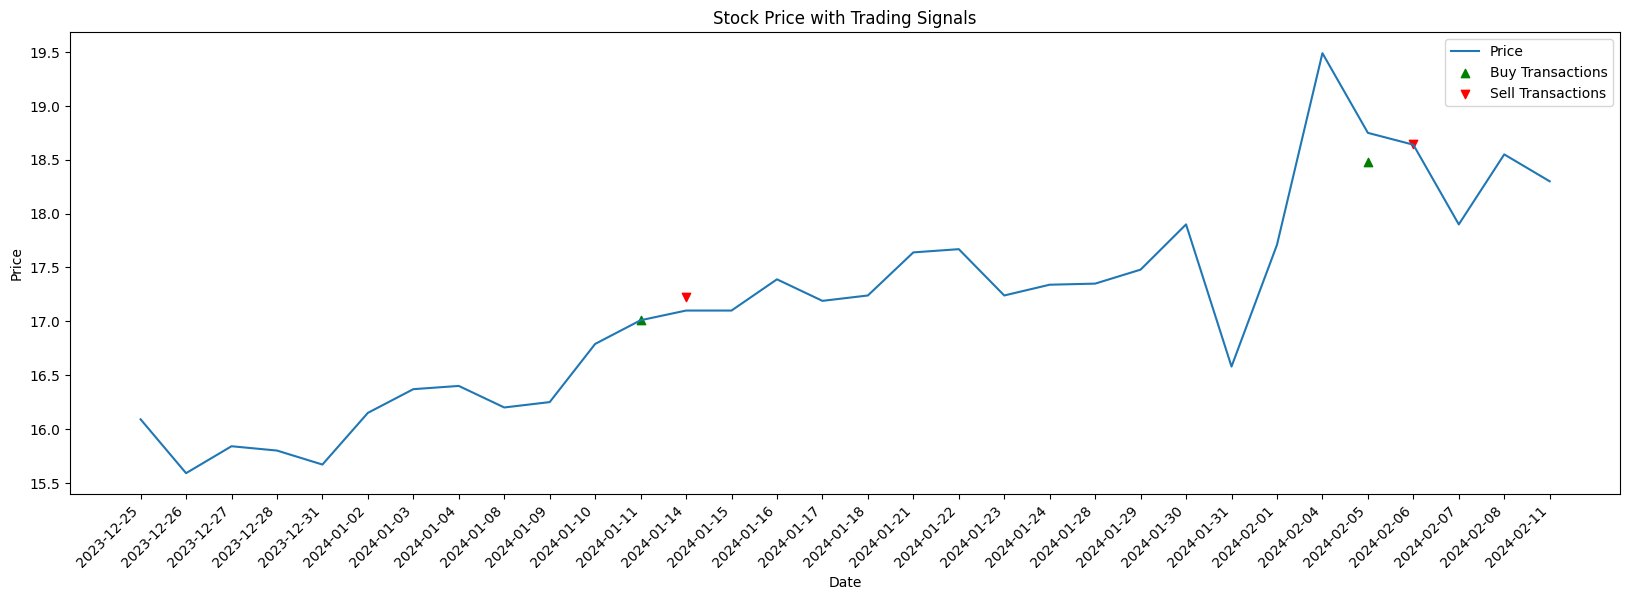

In [ ]:

# Print the buy and sell transactions
print("Buy Transactions:")
print(pd.DataFrame(buy_transactions))

print("\nSell Transactions:")
print(pd.DataFrame(sell_transactions))

# Print the final portfolio value
print("\nFinal Portfolio Value:", portfolio_value)
end = len(df2)
# Visualize the data and signals
plt.figure(figsize=(20, 6))
plt.plot(df2.iloc[window_size:].index.strftime('%Y-%m-%d'), df2.iloc[window_size:]['Price'], label='Price')
plt.xticks(rotation=45, ha='right')
#plt.plot(df['date'], df['MA'], label=f'Moving Average ({window} days)')
#plt.fill_between(df['date'], df['MA'] - df['STD'], df['MA'] + df['STD'], color='gray', alpha=0.2, label='Bollinger Bands')

# Highlight buy and sell signals
# plt.scatter(df.loc[df['buy_signal'], 'date'], df.loc[df['buy_signal'], 'price'], marker='^', color='g', label='Buy Signal')
# plt.scatter(df.loc[df['sell_signal'], 'date'], df.loc[df['sell_signal'], 'price'], marker='v', color='r', label='Sell Signal')
if buy_transactions:
    buy_transactions_df = pd.DataFrame(buy_transactions)
    plt.scatter(buy_transactions_df['date'], buy_transactions_df['price'], marker='^', color='g', label='Buy Transactions')
if sell_transactions:
    sell_transactions_df = pd.DataFrame(sell_transactions)
    plt.scatter(sell_transactions_df['date'], sell_transactions_df['price'], marker='v', color='r', label='Sell Transactions')


plt.title('Stock Price with Trading Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
#predict today


df_today = add_all_ta_features(df_org, open="Open", high="High", low="Low", close="Price", volume="Volume_numeric", fillna=True)

X_test2 = df_today[features].tail(1)
X_test_scaled2 = scaler.transform(X_test2)
predictions = rf_model.predict(X_test_scaled2)


Predicted = round(predictions[0],3)

today_price = df_today.tail(1)['Price'].values[0]

#date_today = y_train.tail(1).index.strftime('%Y-%m-%d')[0]
expected_profit = Predicted - today_price

expected_profit


-0.4399999999999977

In [ ]:
df_org[df_org.index=='2023-11-19']

,Price,Open,High,Low,Change %,Volume_numeric,Next_Day_Price
Date,,,,,,,
2023-11-19,13.97,14.1,14.24,13.91,-0.29%,431880.0,14.36


In [84]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train[features].columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
                Feature  Importance
76            CIB_EMA_5         145
77            CIB_Close         119
10               ADX_14         107
30                month         103
21      Returns_Kurt_60         100
..                  ...         ...
54         Company_MASR           1
83  downthehill_today_r           0
43         Company_CERA           0
41         Company_BTFH           0
39         Company_AMOC           0

[105 rows x 2 columns]


In [85]:
feature_importance_df.head(50)

,Feature,Importance
76,CIB_EMA_5,145
77,CIB_Close,119
10,ADX_14,107
30,month,103
21,Returns_Kurt_60,100
19,Returns_Kurt_14,89
12,Cumulative_Return,84
18,Returns_Skew_60,80
16,Returns_Skew_14,74
3,MACD_Diff,67


In [ ]:
feature_importance_df.tail(50)

,Feature,Importance
102,rolling20_max_ma5,24
80,High_count_r,23
93,Lows_std,23
92,Highs_std,19
33,cs1,19
91,vola_today,18
88,p14lv,18
35,cs3,17
11,Daily_Return,17
32,year,15


In [ ]:
features = list(feature_importance_df.head(50).Feature)

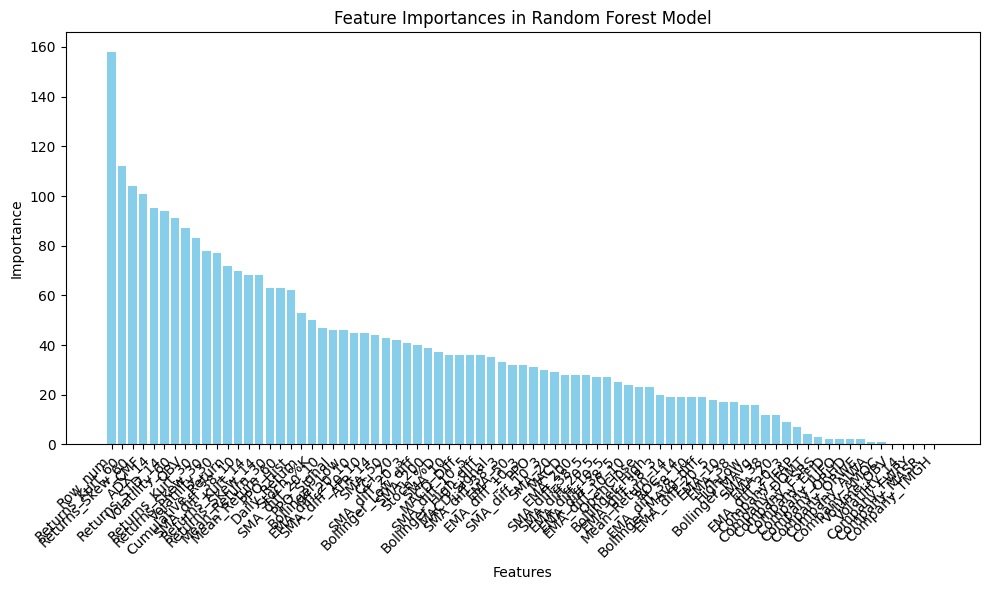

In [ ]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest Model')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
new_features = list(feature_importance_df[:30].Feature)
new_features

['others_dlr',
 'others_dr',
 'volume_em',
 'trend_adx_neg',
 'volatility_dcw',
 'volatility_dcl',
 'volume_cmf',
 'trend_kst_diff',
 'trend_adx',
 'volume_sma_em',
 'trend_ichimoku_base',
 'volatility_kcp',
 'momentum_uo',
 'trend_vortex_ind_diff',
 'momentum_stoch_rsi_d',
 'momentum_ao',
 'volume_fi',
 'momentum_ppo_hist',
 'volume_mfi',
 'volatility_ui',
 'trend_mass_index',
 'trend_cci',
 'trend_aroon_up',
 'trend_dpo',
 'volume_adi',
 'momentum_roc',
 'volatility_bbp',
 'trend_vortex_ind_pos',
 'momentum_pvo_hist',
 'trend_visual_ichimoku_a']

In [ ]:
for i in dfs.keys():
    #print('-'*90)
    print(i)
    tri = df_org[df_org.Company==i][['Close', 'Open', 'High', 'Low','buy_signal']]
    tri['Close_yest'] = tri['Close'].shift(1)
    xx2 = round(100*len(tri[tri.Close_yest<tri.Low])/len(tri),3)
    print('Probability of not able to buy tomm at closing: ',xx2,'%')
    xx1 = round(100*len(tri[(tri.Close_yest<tri.Low*0.995)&(tri.buy_signal=='1')])/len(tri[tri.buy_signal=='1']),3)
    print('Given buy signal, Probability of not able to buy tomm at closing: ',xx1,'%')
    print('-'*90)

ACGC
Probability of not able to buy tomm at closing:  9.783 %
Given buy signal, Probability of not able to buy tomm at closing:  3.922 %
------------------------------------------------------------------------------------------
AJWA
Probability of not able to buy tomm at closing:  19.783 %
Given buy signal, Probability of not able to buy tomm at closing:  8.28 %
------------------------------------------------------------------------------------------
ARCC
Probability of not able to buy tomm at closing:  10.435 %
Given buy signal, Probability of not able to buy tomm at closing:  5.344 %
------------------------------------------------------------------------------------------
BTFH
Probability of not able to buy tomm at closing:  15.435 %
Given buy signal, Probability of not able to buy tomm at closing:  10.215 %
------------------------------------------------------------------------------------------
CERA
Probability of not able to buy tomm at closing:  14.13 %
Given buy signal, Proba

In [ ]:
for file_name in file_paths:
    df_name = file_name.split('.')[0]
    dz = hourly_dfs[df_name]
    tm = df_org[df_org.Company==df_name][['Close', 'Open', 'High', 'Low','date','buy_signal']]
    tm['buy_signal'] = tm['buy_signal'].shift(1)
    tm['Close_yest'] = tm.Close.shift(1)*1.005
    tm['date'] = tm.index.date.astype('str')




    buy = pd.merge(dz, tm[['date','Close_yest','buy_signal']], on='date', how='left')
    buy = pd.merge(buy,)
    buy = buy[~buy.buy_signal.isna()]
    buy['can_buy'] = 0
    #buy.loc[(buy.Open>=buy.Price)&(buy.Close_yest>=buy.Price)&(buy.Close_yest<=buy.Open),'can_buy']= 1
    buy.loc[((buy.Open>=buy.Price)&(buy.Close_yest>=buy.Price))|((buy.Close_yest>=buy.Low)&(buy.Low<buy.Open)),'can_buy']= 1
    buy2  =buy[buy.buy_signal=='1']
    a= 100*(buy.groupby('date').can_buy.max()>0).sum()/len(buy.date.unique())
    b = 100*(buy2.groupby('date').can_buy.max()>0).sum()/len(buy2.date.unique())



    print(df_name,' :')
    print('% Ability to buy',round(a,3))
    print('% Ability to buy for buy signal',round(b,3))
    print('-'*30)

ACGC  :
% Ability to buy 84.615
% Ability to buy for buy signal 78.571
------------------------------
AJWA  :
% Ability to buy 88.889
% Ability to buy for buy signal 78.571
------------------------------
ARCC  :
% Ability to buy 92.593
% Ability to buy for buy signal 85.714
------------------------------
BTFH  :
% Ability to buy 92.593
% Ability to buy for buy signal 100.0
------------------------------
CERA  :
% Ability to buy 96.296
% Ability to buy for buy signal 100.0
------------------------------
CLHO  :
% Ability to buy 92.593
% Ability to buy for buy signal 90.909
------------------------------
EFID  :
% Ability to buy 85.185
% Ability to buy for buy signal 80.0
------------------------------
ESRS  :
% Ability to buy 88.889
% Ability to buy for buy signal nan
------------------------------
ETEL  :
% Ability to buy 92.593
% Ability to buy for buy signal 88.889
------------------------------
IFAP  :
% Ability to buy 96.296
% Ability to buy for buy signal 90.909
------------------

<ipython-input-307-8f6e8432d674>:15: RuntimeWarning: invalid value encountered in longlong_scalars
  b = 100*(buy2.groupby('date').can_buy.max()>0).sum()/len(buy2.date.unique())


In [ ]:
for file_name in file_paths:
    df_name = file_name.split('.')[0]
    dz = hourly_dfs[df_name]
    tm = df_org[df_org.Company==df_name][['Close', 'Open', 'High', 'Low','date','buy_signal']]
    tm['buy_signal'] = tm['buy_signal'].shift(1)
    tm['Close_yest'] = tm.Close.shift(1)*1.005
    tm['date'] = tm.index.date.astype('str')

    column1 = test_perf[df_name]['dates']
    column2 = test_perf[df_name]['predicted_probas']
    column3 = test_perf[df_name]['actuals']
    # Specify column names
    column_names = ['date', 'proba', 'actual']
    # Create DataFrame
    df_predict = pd.DataFrame(list(zip(column1, column2, column3)), columns=column_names)
    df_predict['predict_correct'] = '0'
    df_predict['predict_wrong'] = '0'
    df_predict.loc[(df_predict.proba>0.65)&(df_predict.actual=='1'),'predict_correct']='1'
    df_predict.loc[(df_predict.proba>0.65)&(df_predict.actual=='0'),'predict_wrong']= '1'
    df_predict['predict_correct'] = df_predict['predict_correct'].shift(1)
    df_predict['predict_wrong'] = df_predict['predict_wrong'].shift(1)
    #df_predict



    buy = pd.merge(dz, tm[['date','Close_yest','buy_signal']], on='date', how='left')

    buy = pd.merge(buy,df_predict, on='date', how='left')

    buy = buy[~buy.buy_signal.isna()]
    buy['can_buy'] = 0
    #buy.loc[(buy.Open>=buy.Price)&(buy.Close_yest>=buy.Price)&(buy.Close_yest<=buy.Open),'can_buy']= 1
    buy.loc[((buy.Open>=buy.Price)&(buy.Close_yest>=buy.Price))|((buy.Close_yest>=buy.Low)&(buy.Low<buy.Open)),'can_buy']= 1
    buy2  =buy[buy.buy_signal=='1']
    buy3 = buy[buy.predict_correct=='1']
    buy4 = buy[buy.predict_wrong=='1']

    a= 100*(buy.groupby('date').can_buy.max()>0).sum()/len(buy.date.unique())
    b = 100*(buy2.groupby('date').can_buy.max()>0).sum()/len(buy2.date.unique())
    c = 100*(buy3.groupby('date').can_buy.max()>0).sum()/len(buy3.date.unique())
    d = 100*(buy4.groupby('date').can_buy.max()>0).sum()/len(buy4.date.unique())

    print(df_name,' :')
    print('% Ability to buy',round(a,3))
    print('% Ability to buy for buy signal',round(b,3))
    print('% Ability to buy for predicted signal',round(c,3), 'for count',len(buy3.date.unique()))
    print('% Ability to buy for wrong pred signal',round(d,3), 'for count',len(buy4.date.unique()))
    print('-'*30)

NameError: name 'hourly_dfs' is not defined

In [ ]:
for file_name in file_paths:
    df_name = file_name.split('.')[0]
    dz = hourly_dfs[df_name]
    tm = df_org[df_org.Company==df_name][['Close', 'Open', 'High', 'Low','date','buy_signal']]
    tm['buy_signal'] = tm['buy_signal'].shift(1)
    tm['Close_yest'] = tm.Close.shift(1)*1.005
    tm['date'] = tm.index.date.astype('str')

    column1 = test_perf[df_name]['dates']
    column2 = test_perf[df_name]['predicted_probas']
    column3 = test_perf[df_name]['actuals']
    # Specify column names
    column_names = ['date', 'proba', 'actual']
    # Create DataFrame
    df_predict = pd.DataFrame(list(zip(column1, column2, column3)), columns=column_names)
    df_predict['predict_correct'] = '0'
    df_predict['predict_wrong'] = '0'
    df_predict.loc[(df_predict.proba>0.65)&(df_predict.actual=='1'),'predict_correct']='1'
    df_predict.loc[(df_predict.proba>0.65)&(df_predict.actual=='0'),'predict_wrong']= '1'
    df_predict['predict_correct'] = df_predict['predict_correct'].shift(1)
    df_predict['predict_wrong'] = df_predict['predict_wrong'].shift(1)
    #df_predict



    buy = pd.merge(dz, tm[['date','Close_yest','buy_signal']], on='date', how='left')

    buy = pd.merge(buy,df_predict, on='date', how='left')

    buy = buy[~buy.buy_signal.isna()]
    buy['can_buy'] = 0
    #buy.loc[(buy.Open>=buy.Price)&(buy.Close_yest>=buy.Price)&(buy.Close_yest<=buy.Open),'can_buy']= 1
    buy.loc[((buy.Open>=buy.Price)&(buy.Close_yest>=buy.Price))|((buy.Close_yest>=buy.Low)&(buy.Low<buy.Open)),'can_buy']= 1
    buy2  =buy[buy.buy_signal=='1']
    buy3 = buy[buy.predict_correct=='1']
    buy4 = buy[buy.predict_wrong=='1']

    a= 100*(buy.groupby('date').can_buy.max()>0).sum()/len(buy.date.unique())
    b = 100*(buy2.groupby('date').can_buy.max()>0).sum()/len(buy2.date.unique())
    c = 100*(buy3.groupby('date').can_buy.max()>0).sum()/len(buy3.date.unique())
    d = 100*(buy4.groupby('date').can_buy.max()>0).sum()/len(buy4.date.unique())

    print(df_name,' :')
    print('% Ability to buy',round(a,3))
    print('% Ability to buy for buy signal',round(b,3))
    print('% Ability to buy for predicted signal',round(c,3), 'for count',len(buy3.date.unique()))
    print('% Ability to buy for wrong pred signal',round(d,3), 'for count',len(buy4.date.unique()))
    print('-'*30)

<ipython-input-319-b3cd72faeb79>:41: RuntimeWarning: invalid value encountered in longlong_scalars
  d = 100*(buy4.groupby('date').can_buy.max()>0).sum()/len(buy4.date.unique())
<ipython-input-319-b3cd72faeb79>:40: RuntimeWarning: invalid value encountered in longlong_scalars
  c = 100*(buy3.groupby('date').can_buy.max()>0).sum()/len(buy3.date.unique())
<ipython-input-319-b3cd72faeb79>:41: RuntimeWarning: invalid value encountered in longlong_scalars
  d = 100*(buy4.groupby('date').can_buy.max()>0).sum()/len(buy4.date.unique())
<ipython-input-319-b3cd72faeb79>:41: RuntimeWarning: invalid value encountered in longlong_scalars
  d = 100*(buy4.groupby('date').can_buy.max()>0).sum()/len(buy4.date.unique())
<ipython-input-319-b3cd72faeb79>:40: RuntimeWarning: invalid value encountered in longlong_scalars
  c = 100*(buy3.groupby('date').can_buy.max()>0).sum()/len(buy3.date.unique())
<ipython-input-319-b3cd72faeb79>:41: RuntimeWarning: invalid value encountered in longlong_scalars
  d = 100*(

ACGC  :
% Ability to buy 84.615
% Ability to buy for buy signal 78.571
% Ability to buy for predicted signal 50.0 for count 2
% Ability to buy for wrong pred signal nan for count 0
------------------------------
AJWA  :
% Ability to buy 88.889
% Ability to buy for buy signal 78.571
% Ability to buy for predicted signal 50.0 for count 2
% Ability to buy for wrong pred signal 100.0 for count 3
------------------------------
ARCC  :
% Ability to buy 92.593
% Ability to buy for buy signal 85.714
% Ability to buy for predicted signal nan for count 0
% Ability to buy for wrong pred signal nan for count 0
------------------------------
BTFH  :
% Ability to buy 92.593
% Ability to buy for buy signal 100.0
% Ability to buy for predicted signal 100.0 for count 1
% Ability to buy for wrong pred signal nan for count 0
------------------------------
CERA  :
% Ability to buy 96.296
% Ability to buy for buy signal 100.0
% Ability to buy for predicted signal 100.0 for count 4
% Ability to buy for wron

<ipython-input-319-b3cd72faeb79>:41: RuntimeWarning: invalid value encountered in longlong_scalars
  d = 100*(buy4.groupby('date').can_buy.max()>0).sum()/len(buy4.date.unique())
<ipython-input-319-b3cd72faeb79>:40: RuntimeWarning: invalid value encountered in longlong_scalars
  c = 100*(buy3.groupby('date').can_buy.max()>0).sum()/len(buy3.date.unique())
<ipython-input-319-b3cd72faeb79>:41: RuntimeWarning: invalid value encountered in longlong_scalars
  d = 100*(buy4.groupby('date').can_buy.max()>0).sum()/len(buy4.date.unique())
<ipython-input-319-b3cd72faeb79>:40: RuntimeWarning: invalid value encountered in longlong_scalars
  c = 100*(buy3.groupby('date').can_buy.max()>0).sum()/len(buy3.date.unique())
<ipython-input-319-b3cd72faeb79>:41: RuntimeWarning: invalid value encountered in longlong_scalars
  d = 100*(buy4.groupby('date').can_buy.max()>0).sum()/len(buy4.date.unique())
<ipython-input-319-b3cd72faeb79>:41: RuntimeWarning: invalid value encountered in longlong_scalars
  d = 100*(

In [ ]:
#consider in target
for file_name in file_paths:
    df_name = file_name.split('.')[0]
    dz = hourly_dfs[df_name]
    tm = df_org[df_org.Company==df_name][['Close', 'Open', 'High', 'Low','date','buy_signal']]
    tm['buy_signal'] = tm['buy_signal'].shift(1)
    tm['Close_yest'] = tm.Close.shift(1)*1.005
    tm['date'] = tm.index.date.astype('str')

    column1 = test_perf[df_name]['dates']
    column2 = test_perf[df_name]['predicted_probas']
    column3 = test_perf[df_name]['actuals']
    # Specify column names
    column_names = ['date', 'proba', 'actual']
    # Create DataFrame
    df_predict = pd.DataFrame(list(zip(column1, column2, column3)), columns=column_names)
    df_predict['predict_correct'] = '0'
    df_predict['predict_wrong'] = '0'
    df_predict.loc[(df_predict.proba>0.65)&(df_predict.actual=='1'),'predict_correct']='1'
    df_predict.loc[(df_predict.proba>0.65)&(df_predict.actual=='0'),'predict_wrong']= '1'
    df_predict['predict_correct'] = df_predict['predict_correct'].shift(1)
    df_predict['predict_wrong'] = df_predict['predict_wrong'].shift(1)
    #df_predict



    buy = pd.merge(dz, tm[['date','Close_yest','buy_signal']], on='date', how='left')

    buy = pd.merge(buy,df_predict, on='date', how='left')

    buy = buy[~buy.buy_signal.isna()]
    buy['can_buy'] = 0
    #buy.loc[(buy.Open>=buy.Price)&(buy.Close_yest>=buy.Price)&(buy.Close_yest<=buy.Open),'can_buy']= 1
    buy.loc[((buy.Open>=buy.Price)&(buy.Close_yest>=buy.Price))|((buy.Close_yest>=buy.Low)&(buy.Low<buy.Open)),'can_buy']= 1
    buy2  =buy[buy.buy_signal=='1']
    buy3 = buy[buy.predict_correct=='1']
    buy4 = buy[buy.predict_wrong=='1']

    a= 100*(buy.groupby('date').can_buy.max()>0).sum()/len(buy.date.unique())
    b = 100*(buy2.groupby('date').can_buy.max()>0).sum()/len(buy2.date.unique())
    c = 100*(buy3.groupby('date').can_buy.max()>0).sum()/len(buy3.date.unique())
    d = 100*(buy4.groupby('date').can_buy.max()>0).sum()/len(buy4.date.unique())

    print(df_name,' :')
    print('% Ability to buy',round(a,3))
    print('% Ability to buy for buy signal',round(b,3))
    print('% Ability to buy for predicted signal',round(c,3), 'for count',len(buy3.date.unique()))
    print('% Ability to buy for wrong pred signal',round(d,3), 'for count',len(buy4.date.unique()))
    print('-'*30)

<ipython-input-346-b3cd72faeb79>:41: RuntimeWarning: invalid value encountered in longlong_scalars
  d = 100*(buy4.groupby('date').can_buy.max()>0).sum()/len(buy4.date.unique())
<ipython-input-346-b3cd72faeb79>:40: RuntimeWarning: invalid value encountered in longlong_scalars
  c = 100*(buy3.groupby('date').can_buy.max()>0).sum()/len(buy3.date.unique())
<ipython-input-346-b3cd72faeb79>:41: RuntimeWarning: invalid value encountered in longlong_scalars
  d = 100*(buy4.groupby('date').can_buy.max()>0).sum()/len(buy4.date.unique())
<ipython-input-346-b3cd72faeb79>:41: RuntimeWarning: invalid value encountered in longlong_scalars
  d = 100*(buy4.groupby('date').can_buy.max()>0).sum()/len(buy4.date.unique())
<ipython-input-346-b3cd72faeb79>:40: RuntimeWarning: invalid value encountered in longlong_scalars
  c = 100*(buy3.groupby('date').can_buy.max()>0).sum()/len(buy3.date.unique())
<ipython-input-346-b3cd72faeb79>:41: RuntimeWarning: invalid value encountered in longlong_scalars
  d = 100*(

ACGC  :
% Ability to buy 84.615
% Ability to buy for buy signal 75.0
% Ability to buy for predicted signal 0.0 for count 1
% Ability to buy for wrong pred signal nan for count 0
------------------------------
AJWA  :
% Ability to buy 88.889
% Ability to buy for buy signal 76.923
% Ability to buy for predicted signal 100.0 for count 2
% Ability to buy for wrong pred signal 100.0 for count 2
------------------------------
ARCC  :
% Ability to buy 92.593
% Ability to buy for buy signal 85.714
% Ability to buy for predicted signal nan for count 0
% Ability to buy for wrong pred signal nan for count 0
------------------------------
BTFH  :
% Ability to buy 92.593
% Ability to buy for buy signal 100.0
% Ability to buy for predicted signal 100.0 for count 1
% Ability to buy for wrong pred signal nan for count 0
------------------------------
CERA  :
% Ability to buy 96.296
% Ability to buy for buy signal 100.0
% Ability to buy for predicted signal 100.0 for count 3
% Ability to buy for wrong 

<ipython-input-346-b3cd72faeb79>:40: RuntimeWarning: invalid value encountered in longlong_scalars
  c = 100*(buy3.groupby('date').can_buy.max()>0).sum()/len(buy3.date.unique())
<ipython-input-346-b3cd72faeb79>:41: RuntimeWarning: invalid value encountered in longlong_scalars
  d = 100*(buy4.groupby('date').can_buy.max()>0).sum()/len(buy4.date.unique())
<ipython-input-346-b3cd72faeb79>:41: RuntimeWarning: invalid value encountered in longlong_scalars
  d = 100*(buy4.groupby('date').can_buy.max()>0).sum()/len(buy4.date.unique())


In [ ]:
test_perf['TMGH']

{'0': {'precision': 0.7027027027027027,
  'recall': 0.9629629629629629,
  'f1-score': 0.8125,
  'support': 27},
 '1': {'precision': 0.6666666666666666,
  'recall': 0.15384615384615385,
  'f1-score': 0.25,
  'support': 13},
 'accuracy': 0.7,
 'macro avg': {'precision': 0.6846846846846847,
  'recall': 0.5584045584045584,
  'f1-score': 0.53125,
  'support': 40},
 'weighted avg': {'precision': 0.690990990990991,
  'recall': 0.7,
  'f1-score': 0.6296875,
  'support': 40},
 'actuals': ['0',
  '0',
  '0',
  '0',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0'],
 'predicted_probas': [0.07343227511234908,
  0.07215128455655585,
  0.05285152528164779,
  0.05215766526598718,
  0.1155403108470692,
  0.12367016565304625,
  0.231427376517559,
  0.15817508233930927,
  0.2645647162364788,
  0.679987209

In [ ]:
df_org.columns

Index(['Close', 'Open', 'High', 'Low', 'Change %', 'Volume', 'day_of_week',
       'month', 'year', 'day',
       ...
       'Company_IFAP', 'Company_JUFO', 'Company_MASR', 'Company_OCDI',
       'Company_ORHD', 'Company_ORWE', 'Company_POUL', 'Company_RACC',
       'Company_TMGH', 'Company'],
      dtype='object', length=131)

In [ ]:
tm = df_org[df_org.Company=='BTFH'][['Close', 'Open', 'High', 'Low','date','buy_signal']]

In [ ]:
tm['Close_yest'] = tm.Close.shift(1)*1.005
tm['date'] = tm.index.date.astype('str')
tm

,Close,Open,High,Low,date,buy_signal,Close_yest
Date,,,,,,,
2022-03-31,1.185,1.183,1.200,1.177,2022-03-31,0,NaN
2022-04-03,1.240,1.185,1.260,1.185,2022-04-03,0,1.190925
2022-04-04,1.251,1.250,1.279,1.234,2022-04-04,0,1.246200
2022-04-05,1.242,1.252,1.260,1.234,2022-04-05,0,1.257255
2022-04-06,1.240,1.249,1.256,1.237,2022-04-06,0,1.248210
...,...,...,...,...,...,...,...
2024-02-18,3.750,3.550,3.750,3.540,2024-02-18,None,3.567750
2024-02-19,3.680,3.750,3.770,3.630,2024-02-19,None,3.768750
2024-02-20,3.550,3.680,3.740,3.520,2024-02-20,None,3.698400


In [ ]:
buy = pd.merge(dz, tm[['date','Close_yest','buy_signal']], on='date', how='left')
buy = buy[~buy.buy_signal.isna()]
buy['can_buy'] = 0
#buy.loc[(buy.Open>=buy.Price)&(buy.Close_yest>=buy.Price)&(buy.Close_yest<=buy.Open),'can_buy']= 1
buy.loc[(buy.Open>=buy.Price)&(buy.Close_yest>=buy.Price),'can_buy']= 1
buy

,Price,Open,High,Low,Volume_numeric,date,Close_yest,buy_signal,can_buy
0,3.57,3.52,3.59,3.51,20668744.0,2024-01-09,3.50745,0,0
1,3.55,3.56,3.57,3.54,3128582.0,2024-01-09,3.50745,0,0
2,3.59,3.55,3.60,3.54,13710981.0,2024-01-09,3.50745,0,0
3,3.56,3.59,3.60,3.55,15003213.0,2024-01-09,3.50745,0,0
4,3.57,3.56,3.59,3.55,18548648.0,2024-01-09,3.50745,0,0
...,...,...,...,...,...,...,...,...,...
125,3.53,3.55,3.58,3.52,46592308.0,2024-02-15,3.51750,0,0
126,3.57,3.53,3.57,3.51,20097552.0,2024-02-15,3.51750,0,0
127,3.58,3.57,3.61,3.56,34578304.0,2024-02-15,3.51750,0,0
128,3.56,3.59,3.60,3.55,24819698.0,2024-02-15,3.51750,0,0


In [ ]:
100*(buy.groupby('date').can_buy.max()>0).sum()/len(buy.date.unique())

61.53846153846154

In [ ]:
buy2  =buy[buy.buy_signal=='1']

In [ ]:
100*(buy2.groupby('date').can_buy.max()>0).sum()/len(buy2.date.unique())

63.63636363636363

In [ ]:
dd = pd.concat([dz, tm[['date','Close_yest']]],ignore_index=True)
#dd = dd[~dd.Low.isna()]
dd

,Price,Open,High,Low,Volume_numeric,date,Close_yest
0,23.75,23.81,23.89,23.65,172995.0,2024-01-09,NaN
1,23.70,23.71,23.75,23.68,86159.0,2024-01-09,NaN
2,24.03,23.70,24.15,23.67,501508.0,2024-01-09,NaN
3,23.88,24.02,24.03,23.75,187530.0,2024-01-09,NaN
4,23.87,23.88,23.92,23.77,54963.0,2024-01-09,NaN
...,...,...,...,...,...,...,...
610,NaN,NaN,NaN,NaN,NaN,2024-02-18,45.48630
611,NaN,NaN,NaN,NaN,NaN,2024-02-19,45.47625
612,NaN,NaN,NaN,NaN,NaN,2024-02-20,48.55155
613,NaN,NaN,NaN,NaN,NaN,2024-02-21,48.24000


In [ ]:
df_name = 'TMGH'

In [ ]:
test_perf[df_name]['dates']

In [ ]:
column1 = test_perf[df_name]['dates']
column2 = test_perf[df_name]['predicted_probas']
column3 = test_perf[df_name]['actuals']

# Specify column names
column_names = ['date', 'proba', 'actual']

# Create DataFrame
df_predict = pd.DataFrame(list(zip(column1, column2, column3)), columns=column_names)

In [ ]:
df_predict['predict_correct'] = '0'
df_predict.loc[(df_predict.proba>0.65)&(df_predict.actual=='1'),'predict_correct']='1'
df_predict['predict_correct'] = df_predict['predict_correct'].shift(1)
df_predict

,date,proba,actual,predict_correct
0,2023-12-26,0.248521,0,None
1,2023-12-27,0.123755,0,0
2,2023-12-28,0.128014,0,0
3,2023-12-31,0.030889,0,0
4,2024-01-02,0.110418,0,0
5,2024-01-03,0.271831,0,0
6,2024-01-04,0.136792,1,0
7,2024-01-08,0.109718,1,0
8,2024-01-09,0.069729,1,0
9,2024-01-10,0.048334,1,0


In [ ]:
#adjusting for target
for file_name in file_paths:
    df_name = file_name.split('.')[0]
    #dz = hourly_dfs[df_name]
    tm = df_org[df_org.Company==df_name][['Close', 'Open', 'High', 'Low','date','buy_signal','buy_it']]
    tm['buy_signal'] = tm['buy_signal'].shift(1)
    tm['Close_yest'] = tm.Close.shift(1)*1.005
    tm['date'] = tm.index.date.astype('str')

    column1 = test_perf[df_name]['dates']
    column2 = test_perf[df_name]['predicted_probas']
    column3 = test_perf[df_name]['actuals']
    # Specify column names
    column_names = ['date', 'proba', 'actual']
    # Create DataFrame
    df_predict = pd.DataFrame(list(zip(column1, column2, column3)), columns=column_names)
    df_predict['predict_correct'] = '0'
    df_predict['predict_wrong'] = '0'
    df_predict.loc[(df_predict.proba>0.65)&(df_predict.actual=='1'),'predict_correct']='1'
    df_predict.loc[(df_predict.proba>0.65)&(df_predict.actual=='0'),'predict_wrong']= '1'
    df_predict['predict_correct'] = df_predict['predict_correct'].shift(1)
    df_predict['predict_wrong'] = df_predict['predict_wrong'].shift(1)
    #df_predict



    #buy = pd.merge(dz, tm[['date','Close_yest','buy_signal']], on='date', how='left')

    buy = pd.merge(tm,df_predict, on='date', how='left')

    buy = buy[~buy.actual.isna()]
    buy['can_buy'] = '0'
    buy.loc[(buy.Close_yest>=buy.Low),'can_buy']= '1'
    #buy.loc[((buy.Open>=buy.Price)&(buy.Close_yest>=buy.Price))|((buy.Close_yest>=buy.Low)&(buy.Low<buy.Open)),'can_buy']= 1
    buy2  =buy[buy.buy_signal=='1']
    buy3 = buy[buy.predict_correct=='1']
    buy4 = buy[buy.predict_wrong=='1']
    #buy[buy.buy_it=='1']

    if len(buy.date.unique()) >1:
        a= (100*len( buy[buy.can_buy=='1']))/len(buy.date.unique())
    else:
        a=0
    if len(buy2.date.unique()) >1:
        b = (100*len( buy2[buy2.can_buy=='1']))/len(buy2.date.unique())
    else:
        b=0
    if len(buy3.date.unique()) >1:
        c = (100*len( buy3[buy3.can_buy=='1']))/len(buy3.date.unique())
    else:
        c=0
    if len(buy4.date.unique()) >1:
        d = (100*len(buy4[buy4.can_buy=='1']))/len(buy4.date.unique())
    else:
        d=0
    print(df_name,' :')
    print('% Ability to buy',round(a,3))
    print('% Ability to buy for buy signal',round(b,3))
    print('% Ability to buy for predicted signal',round(c,3), 'for count',len(buy3.date.unique()))
    print('% Ability to buy for wrong pred signal',round(d,3), 'for count',len(buy4.date.unique()))
    print('-'*30)



ACGC  :
% Ability to buy 85.714
% Ability to buy for buy signal 80.952
% Ability to buy for predicted signal 0 for count 1
% Ability to buy for wrong pred signal 0 for count 0
------------------------------
AJWA  :
% Ability to buy 97.143
% Ability to buy for buy signal 95.238
% Ability to buy for predicted signal 100.0 for count 3
% Ability to buy for wrong pred signal 100.0 for count 2
------------------------------
ARCC  :
% Ability to buy 91.429
% Ability to buy for buy signal 81.818
% Ability to buy for predicted signal 0 for count 0
% Ability to buy for wrong pred signal 0 for count 0
------------------------------
BTFH  :
% Ability to buy 88.571
% Ability to buy for buy signal 93.75
% Ability to buy for predicted signal 0 for count 1
% Ability to buy for wrong pred signal 0 for count 0
------------------------------
CERA  :
% Ability to buy 91.429
% Ability to buy for buy signal 90.476
% Ability to buy for predicted signal 100.0 for count 3
% Ability to buy for wrong pred signal

In [ ]:
#normal target
for file_name in file_paths:
    df_name = file_name.split('.')[0]
    #dz = hourly_dfs[df_name]
    tm = df_org[df_org.Company==df_name][['Close', 'Open', 'High', 'Low','date','buy_signal','buy_it']]
    tm['buy_signal'] = tm['buy_signal'].shift(1)
    tm['Close_yest'] = tm.Close.shift(1)*1.005
    tm['date'] = tm.index.date.astype('str')

    column1 = test_perf[df_name]['dates']
    column2 = test_perf[df_name]['predicted_probas']
    column3 = test_perf[df_name]['actuals']
    # Specify column names
    column_names = ['date', 'proba', 'actual']
    # Create DataFrame
    df_predict = pd.DataFrame(list(zip(column1, column2, column3)), columns=column_names)
    df_predict['predict_correct'] = '0'
    df_predict['predict_wrong'] = '0'
    df_predict.loc[(df_predict.proba>0.65)&(df_predict.actual=='1'),'predict_correct']='1'
    df_predict.loc[(df_predict.proba>0.65)&(df_predict.actual=='0'),'predict_wrong']= '1'
    df_predict['predict_correct'] = df_predict['predict_correct'].shift(1)
    df_predict['predict_wrong'] = df_predict['predict_wrong'].shift(1)
    #df_predict



    #buy = pd.merge(dz, tm[['date','Close_yest','buy_signal']], on='date', how='left')

    buy = pd.merge(tm,df_predict, on='date', how='left')

    buy = buy[~buy.actual.isna()]
    buy['can_buy'] = '0'
    buy.loc[(buy.Close_yest>=buy.Low),'can_buy']= '1'
    #buy.loc[((buy.Open>=buy.Price)&(buy.Close_yest>=buy.Price))|((buy.Close_yest>=buy.Low)&(buy.Low<buy.Open)),'can_buy']= 1
    buy2  =buy[buy.buy_signal=='1']
    buy3 = buy[buy.predict_correct=='1']
    buy4 = buy[buy.predict_wrong=='1']
    #buy[buy.buy_it=='1']

    if len(buy.date.unique()) >1:
        a= (100*len( buy[buy.can_buy=='1']))/len(buy.date.unique())
    else:
        a=0
    if len(buy2.date.unique()) >1:
        b = (100*len( buy2[buy2.can_buy=='1']))/len(buy2.date.unique())
    else:
        b=0
    if len(buy3.date.unique()) >1:
        c = (100*len( buy3[buy3.can_buy=='1']))/len(buy3.date.unique())
    else:
        c=0
    if len(buy4.date.unique()) >1:
        d = (100*len(buy4[buy4.can_buy=='1']))/len(buy4.date.unique())
    else:
        d=0
    print(df_name,' :')
    print('% Ability to buy',round(a,3))
    print('% Ability to buy for buy signal',round(b,3))
    print('% Ability to buy for predicted signal',round(c,3), 'for count',len(buy3.date.unique()))
    print('% Ability to buy for wrong pred signal',round(d,3), 'for count',len(buy4.date.unique()))
    print('-'*30)

ACGC  :
% Ability to buy 85.714
% Ability to buy for buy signal 80.952
% Ability to buy for predicted signal 50.0 for count 2
% Ability to buy for wrong pred signal 0 for count 0
------------------------------
AJWA  :
% Ability to buy 97.143
% Ability to buy for buy signal 95.238
% Ability to buy for predicted signal 100.0 for count 2
% Ability to buy for wrong pred signal 100.0 for count 3
------------------------------
ARCC  :
% Ability to buy 91.429
% Ability to buy for buy signal 81.818
% Ability to buy for predicted signal 0 for count 0
% Ability to buy for wrong pred signal 0 for count 0
------------------------------
BTFH  :
% Ability to buy 88.571
% Ability to buy for buy signal 93.75
% Ability to buy for predicted signal 50.0 for count 2
% Ability to buy for wrong pred signal 0 for count 0
------------------------------
CERA  :
% Ability to buy 91.429
% Ability to buy for buy signal 90.476
% Ability to buy for predicted signal 100.0 for count 4
% Ability to buy for wrong pred 

In [ ]:
df_org.buy_max_return

Date
2022-03-24   -2.915888
2022-03-27   -3.978622
2022-03-27    0.046404
2022-03-28    0.189944
2022-03-28    0.046404
                ...   
2024-02-22         NaN
2024-02-22         NaN
2024-02-22         NaN
2024-02-22         NaN
2024-02-22         NaN
Name: buy_max_return, Length: 8280, dtype: float64

In [ ]:
#normal target
prob_t = 0.65
for file_name in file_paths:
    df_name = file_name.split('.')[0]
    #dz = hourly_dfs[df_name]
    tm = df_org[df_org.Company==df_name][['Close', 'Open', 'High', 'Low','date','buy_signal','buy_max_return']]
    tm['buy_signal'] = tm['buy_signal'].shift(1)
    tm['Close_yest'] = tm.Close.shift(1)*1.005
    tm['date'] = tm.index.date.astype('str')

    column1 = test_perf[df_name]['dates']
    column2 = test_perf[df_name]['predicted_probas']
    column3 = test_perf[df_name]['actuals']
    # Specify column names
    column_names = ['date', 'proba', 'actual']
    # Create DataFrame
    df_predict = pd.DataFrame(list(zip(column1, column2, column3)), columns=column_names)
    df_predict['predict_correct'] = '0'
    df_predict['predict_wrong'] = '0'
    df_predict.loc[(df_predict.proba>prob_t)&(df_predict.actual=='1'),'predict_correct']='1'
    df_predict.loc[(df_predict.proba>prob_t)&(df_predict.actual=='0'),'predict_wrong']= '1'
    df_predict['predict_correct'] = df_predict['predict_correct'].shift(1)
    df_predict['predict_wrong'] = df_predict['predict_wrong'].shift(1)
    #df_predict



    #buy = pd.merge(dz, tm[['date','Close_yest','buy_signal']],"" on='date', how='left')

    buy = pd.merge(tm,df_predict, on='date', how='left')

    buy = buy[~buy.actual.isna()]
    buy['can_buy'] = '0'
    buy.loc[(buy.Close_yest>=buy.Low),'can_buy']= '1'
    #buy.loc[((buy.Open>=buy.Price)&(buy.Close_yest>=buy.Price))|((buy.Close_yest>=buy.Low)&(buy.Low<buy.Open)),'can_buy']= 1
    buy2  =buy[buy.buy_signal=='1']
    buy3 = buy[buy.predict_correct=='1']
    buy4 = buy[buy.predict_wrong=='1']
    #buy[buy.buy_it=='1']

    if len(buy.date.unique()) >1:
        a= (100*len( buy[buy.can_buy=='1']))/len(buy.date.unique())
    else:
        a=0
    if len(buy2.date.unique()) >1:
        b = (100*len( buy2[buy2.can_buy=='1']))/len(buy2.date.unique())
    else:
        b=0
    if len(buy3.date.unique()) >1:
        c = (100*len( buy3[buy3.can_buy=='1']))/len(buy3.date.unique())
    else:
        c=0
    if len(buy4.date.unique()) >1:
        d = (100*len(buy4[buy4.can_buy=='1']))/len(buy4.date.unique())
    else:
        d=0
    print(df_name,' :')
    print('% Ability to buy',round(a,3))
    print('% Ability to buy for buy signal',round(b,3))
    print('% Ability to buy for predicted signal',round(c,3), 'for count',len(buy3.date.unique()),buy3.buy_max_return.mean())
    print('% Ability to buy for wrong pred signal',round(d,3), 'for count',len(buy4.date.unique()))
    print('-'*30)

ACGC  :
% Ability to buy 85.714
% Ability to buy for buy signal 80.952
% Ability to buy for predicted signal 50.0 for count 2 14.840335875705698
% Ability to buy for wrong pred signal 0 for count 0
------------------------------
AJWA  :
% Ability to buy 97.143
% Ability to buy for buy signal 95.238
% Ability to buy for predicted signal 100.0 for count 2 -0.19174282095021966
% Ability to buy for wrong pred signal 100.0 for count 3
------------------------------
ARCC  :
% Ability to buy 91.429
% Ability to buy for buy signal 81.818
% Ability to buy for predicted signal 0 for count 0 nan
% Ability to buy for wrong pred signal 0 for count 0
------------------------------
BTFH  :
% Ability to buy 88.571
% Ability to buy for buy signal 93.75
% Ability to buy for predicted signal 50.0 for count 2 6.931456743002548
% Ability to buy for wrong pred signal 0 for count 0
------------------------------
CERA  :
% Ability to buy 91.429
% Ability to buy for buy signal 90.476
% Ability to buy for predi

In [ ]:
#new 14/3
#normal target
loss_t = -10
prob_t = 0.65
can_buy_right = 0
can_buy_right_total = 0
can_buy_wrong = 0
can_buy_wrong_total = 0
lost_trades_right=0
lost_trades_wrong=0

for file_name in file_paths:
    df_name = file_name.split('.')[0]
    #dz = hourly_dfs[df_name]
    tm = df_org[df_org.Company==df_name][['Close', 'Open', 'High', 'Low','date','buy_signal','buy_max_return','Low_tom','buy_max_loss']]
    #tm['buy_signal'] = tm['buy_signal'].shift(1)
    tm['Close_yest'] = tm.Close.shift(1)*1.005
    tm['date'] = tm.index.date.astype('str')

    column1 = test_perf[df_name]['dates']
    column2 = test_perf[df_name]['predicted_probas']
    column3 = test_perf[df_name]['actuals']
    # Specify column names
    column_names = ['date', 'proba', 'actual']
    # Create DataFrame
    df_predict = pd.DataFrame(list(zip(column1, column2, column3)), columns=column_names)
    df_predict['predict_correct'] = '0'
    df_predict['predict_wrong'] = '0'
    df_predict.loc[(df_predict.proba>prob_t)&(df_predict.actual=='1'),'predict_correct']='1'
    df_predict.loc[(df_predict.proba>prob_t)&(df_predict.actual=='0'),'predict_wrong']= '1'
    #df_predict['predict_correct'] = df_predict['predict_correct'].shift(1)
    #df_predict['predict_wrong'] = df_predict['predict_wrong'].shift(1)
    #df_predict



    #buy = pd.merge(dz, tm[['date','Close_yest','buy_signal']],"" on='date', how='left')

    buy = pd.merge(tm,df_predict, on='date', how='left')

    buy = buy[~buy.actual.isna()]
    buy['can_buy'] = '0'
    buy.loc[(buy.High*0.96>=buy.Low_tom),'can_buy']= '1'
    #buy.loc[((buy.Open>=buy.Price)&(buy.Close_yest>=buy.Price))|((buy.Close_yest>=buy.Low)&(buy.Low<buy.Open)),'can_buy']= 1
    buy2  =buy[buy.buy_signal=='1']
    buy3 = buy[buy.predict_correct=='1']
    buy4 = buy[buy.predict_wrong=='1']
    #buy[buy.buy_it=='1']

    if len(buy.date.unique()) >0:
        a= (100*len( buy[buy.can_buy=='1']))/len(buy.date.unique())
    else:
        a=0
    if len(buy2.date.unique()) >0:
        b_can = len( buy2[buy2.can_buy=='1'])
        b_can_loss = len( buy2[(buy2.can_buy=='1')&(buy2.buy_max_loss<loss_t)])
        b_total = len(buy2.date.unique())
        b = (100*b_can)/b_total
    else:
        b_can=0
        b_total = 0
        b=0
        b_can_loss =0
    if len(buy3.date.unique()) >0:
        c_can=len( buy3[buy3.can_buy=='1'])
        c_can_loss = len( buy3[(buy3.can_buy=='1')&(buy3.buy_max_loss<loss_t)])
        c_total=len(buy3.date.unique())
        c = (100*c_can)/c_total
    else:
        c_can=0
        c_total=0
        c=0
        c_can_loss =0
    if len(buy4.date.unique()) >0:
        d_can=len( buy4[buy4.can_buy=='1'])
        d_can_loss = len( buy4[(buy4.can_buy=='1')&(buy4.buy_max_loss<loss_t)])
        d_total=len(buy4.date.unique())
        d = (100*d_can)/d_total
    else:
        d_can=0
        d_total=0
        d=0
        d_can_loss =0
    print(df_name,' :')
    print('% Ability to buy',round(a,3))
    print('% Ability to buy for buy signal',round(b,3))
    print('% Ability to buy for predicted signal',round(c,3), 'for count',len(buy3.date.unique()),round(buy3.buy_max_return.mean(),2),round(buy3.buy_max_loss.median(),2))
    print('% Ability to buy for wrong pred signal',round(d,3), 'for count',len(buy4.date.unique()),round(buy4.buy_max_return.mean(),2),round(buy4.buy_max_loss.median(),2))
    print('-'*30)

    can_buy_right =can_buy_right+ c_can
    can_buy_right_total = can_buy_right_total+ c_total
    can_buy_wrong = can_buy_wrong+d_can
    can_buy_wrong_total = can_buy_wrong_total+d_total

    lost_trades_right=c_can_loss+lost_trades_right
    lost_trades_wrong=d_can_loss+lost_trades_wrong

print('-'*30)
print('Total:')
perc_right = round((100*can_buy_right)/can_buy_right_total,2)
perc_wrong = round((100*can_buy_wrong)/can_buy_wrong_total,2)
perc_right_buy =(100* can_buy_right)/(can_buy_right+can_buy_wrong)
perc_right_buy_pass =(100* (can_buy_right-lost_trades_right))/(can_buy_right+can_buy_wrong)
print('Can buy; predicted right: ',perc_right,' out of ',can_buy_right_total)
print('Can buy; predicted wrong: ',perc_wrong,' out of ',can_buy_wrong_total)
print('Correctly bought: ',perc_right_buy,'% out of ',(can_buy_right+can_buy_wrong))
print('Lost Can buy; predicted right:',lost_trades_right)
print('Lost Can buy; predicted wrong:',lost_trades_wrong)
print('Correctly bought, not lost: ',perc_right_buy_pass,'% out of ',(can_buy_right+can_buy_wrong))

ABUK  :
% Ability to buy 53.571
% Ability to buy for buy signal 71.429
% Ability to buy for predicted signal 0 for count 0 nan nan
% Ability to buy for wrong pred signal 0 for count 0 nan nan
------------------------------
ACGC  :
% Ability to buy 60.714
% Ability to buy for buy signal 42.857
% Ability to buy for predicted signal 0 for count 0 nan nan
% Ability to buy for wrong pred signal 50.0 for count 2 0.16 -9.1
------------------------------
AJWA  :
% Ability to buy 78.571
% Ability to buy for buy signal 63.636
% Ability to buy for predicted signal 0 for count 0 nan nan
% Ability to buy for wrong pred signal 0 for count 0 nan nan
------------------------------
AMOC  :
% Ability to buy 50.0
% Ability to buy for buy signal 16.667
% Ability to buy for predicted signal 0 for count 0 nan nan
% Ability to buy for wrong pred signal 0 for count 0 nan nan
------------------------------
ARCC  :
% Ability to buy 64.286
% Ability to buy for buy signal 38.462
% Ability to buy for predicted sig

In [ ]:
2

2

In [ ]:
#new 14/3
#normal target
#until buy day
prob_t = 0.6
for file_name in ['OCDI.csv']:
    df_name = file_name.split('.')[0]
    #dz = hourly_dfs[df_name]
    tm = df_org[df_org.Company==df_name][['Close', 'Open', 'High', 'Low','date','buy_signal','buy_max_return','Low_tom','buy_max_loss']]
    #tm['buy_signal'] = tm['buy_signal'].shift(1)
    tm['Close_yest'] = tm.Close.shift(1)*1.005
    tm['date'] = tm.index.date.astype('str')

    column1 = test_perf[df_name]['dates']
    column2 = test_perf[df_name]['predicted_probas']
    column3 = test_perf[df_name]['actuals']
    # Specify column names
    column_names = ['date', 'proba', 'actual']
    # Create DataFrame
    df_predict = pd.DataFrame(list(zip(column1, column2, column3)), columns=column_names)
    df_predict['predict_correct'] = '0'
    df_predict['predict_wrong'] = '0'
    df_predict.loc[(df_predict.proba>prob_t)&(df_predict.actual=='1'),'predict_correct']='1'
    df_predict.loc[(df_predict.proba>prob_t)&(df_predict.actual=='0'),'predict_wrong']= '1'
    #df_predict['predict_correct'] = df_predict['predict_correct'].shift(1)
    #df_predict['predict_wrong'] = df_predict['predict_wrong'].shift(1)
    #df_predict



    #buy = pd.merge(dz, tm[['date','Close_yest','buy_signal']],"" on='date', how='left')

    buy = pd.merge(tm,df_predict, on='date', how='left')

    buy = buy[~buy.actual.isna()]
    buy['can_buy'] = '0'
    buy.loc[(buy.Close>=buy.Low_tom),'can_buy']= '1'
    #buy.loc[((buy.Open>=buy.Price)&(buy.Close_yest>=buy.Price))|((buy.Close_yest>=buy.Low)&(buy.Low<buy.Open)),'can_buy']= 1
    buy2  =buy[buy.buy_signal=='1']
    buy3 = buy[buy.predict_correct=='1']
    buy4 = buy[buy.predict_wrong=='1']
    #buy[buy.buy_it=='1']

    if len(buy.date.unique()) >1:
        a= (100*len( buy[buy.can_buy=='1']))/len(buy.date.unique())
    else:
        a=0
    if len(buy2.date.unique()) >1:
        b = (100*len( buy2[buy2.can_buy=='1']))/len(buy2.date.unique())
    else:
        b=0
    if len(buy3.date.unique()) >1:
        c = (100*len( buy3[buy3.can_buy=='1']))/len(buy3.date.unique())
    else:
        c=0
    if len(buy4.date.unique()) >1:
        d = (100*len(buy4[buy4.can_buy=='1']))/len(buy4.date.unique())
    else:
        d=0
    print(df_name,' :')
    print('% Ability to buy',round(a,3))
    print('% Ability to buy for buy signal',round(b,3))
    print('% Ability to buy for predicted signal',round(c,3), 'for count',len(buy3.date.unique()),round(buy3.buy_max_return.mean(),2),round(buy3.buy_max_loss.median(),2))
    print('% Ability to buy for wrong pred signal',round(d,3), 'for count',len(buy4.date.unique()))
    print('-'*30)

OCDI  :
% Ability to buy 60.0
% Ability to buy for buy signal 52.381
% Ability to buy for predicted signal 100.0 for count 2 17.61 -14.54
% Ability to buy for wrong pred signal 0 for count 0
------------------------------


In [ ]:
#new 14/3
#normal target
#until buy day
prob_t = 0.6
for file_name in ['OCDI.csv']:
    df_name = file_name.split('.')[0]
    #dz = hourly_dfs[df_name]
    tm = df_org[df_org.Company==df_name][['Close', 'Open', 'High', 'Low','date','buy_signal','buy_max_return','Low_tom','buy_max_loss','buy_signal_days']]
    #tm['buy_signal'] = tm['buy_signal'].shift(1)
    tm['Close_yest'] = tm.Close.shift(1)*1.005
    tm['date'] = tm.index.date.astype('str')

    column1 = test_perf[df_name]['dates']
    column2 = test_perf[df_name]['predicted_probas']
    column3 = test_perf[df_name]['actuals']
    # Specify column names
    column_names = ['date', 'proba', 'actual']
    # Create DataFrame
    df_predict = pd.DataFrame(list(zip(column1, column2, column3)), columns=column_names)
    df_predict['predict_correct'] = '0'
    df_predict['predict_wrong'] = '0'
    df_predict.loc[(df_predict.proba>prob_t)&(df_predict.actual=='1'),'predict_correct']='1'
    df_predict.loc[(df_predict.proba>prob_t)&(df_predict.actual=='0'),'predict_wrong']= '1'
    #df_predict['predict_correct'] = df_predict['predict_correct'].shift(1)
    #df_predict['predict_wrong'] = df_predict['predict_wrong'].shift(1)
    #df_predict



    #buy = pd.merge(dz, tm[['date','Close_yest','buy_signal']],"" on='date', how='left')

    buy = pd.merge(tm,df_predict, on='date', how='left')

    buy = buy[~buy.actual.isna()]
    buy['can_buy'] = '0'
    buy.loc[(buy.Close>=buy.Low_tom),'can_buy']= '1'
    #buy.loc[((buy.Open>=buy.Price)&(buy.Close_yest>=buy.Price))|((buy.Close_yest>=buy.Low)&(buy.Low<buy.Open)),'can_buy']= 1
    buy2  =buy[buy.buy_signal=='1']
    buy3 = buy[buy.predict_correct=='1']
    buy4 = buy[buy.predict_wrong=='1']
    #buy[buy.buy_it=='1']

    if len(buy.date.unique()) >1:
        a= (100*len( buy[buy.can_buy=='1']))/len(buy.date.unique())
    else:
        a=0
    if len(buy2.date.unique()) >1:
        b = (100*len( buy2[buy2.can_buy=='1']))/len(buy2.date.unique())
    else:
        b=0
    if len(buy3.date.unique()) >1:
        c = (100*len( buy3[buy3.can_buy=='1']))/len(buy3.date.unique())
    else:
        c=0
    if len(buy4.date.unique()) >1:
        d = (100*len(buy4[buy4.can_buy=='1']))/len(buy4.date.unique())
    else:
        d=0
    print(df_name,' :')
    print('% Ability to buy',round(a,3))
    print('% Ability to buy for buy signal',round(b,3))
    print('% Ability to buy for predicted signal',round(c,3), 'for count',len(buy3.date.unique()),round(buy3.buy_max_return.mean(),2),round(buy3.buy_max_loss.median(),2))
    print('% Ability to buy for wrong pred signal',round(d,3), 'for count',len(buy4.date.unique()))
    print('-'*30)

OCDI  :
% Ability to buy 60.0
% Ability to buy for buy signal 52.381
% Ability to buy for predicted signal 100.0 for count 2 17.61 -4.08
% Ability to buy for wrong pred signal 0 for count 0
------------------------------


In [ ]:
#new 23/3
#normal target
drop = 0.03
loss_t = -10
prob_t = 0.55
can_buy_right = 0
can_buy_right_total = 0
can_buy_wrong = 0
can_buy_wrong_total = 0
lost_trades_right=0
lost_trades_wrong=0

for file_name in file_paths:
    df_name = file_name.split('.')[0]
    #dz = hourly_dfs[df_name]
    tm = df_org[df_org.Company==df_name][['Close', 'Open', 'High', 'Low','date','price_change','High_tom','Low_tom','vola','buy_signal']]
    #tm['buy_signal'] = tm['buy_signal'].shift(1)
    #tm['Close_yest'] = tm.Close.shift(1)*1.005
    tm['date'] = tm.index.date.astype('str')

    column1 = test_perf[df_name]['dates']
    column2 = test_perf[df_name]['predicted_probas']
    column3 = test_perf[df_name]['actuals']
    # Specify column names
    column_names = ['date', 'proba', 'actual']
    # Create DataFrame
    df_predict = pd.DataFrame(list(zip(column1, column2, column3)), columns=column_names)
    df_predict['predict_correct'] = '0'
    df_predict['predict_wrong'] = '0'
    df_predict.loc[(df_predict.proba>prob_t)&(df_predict.actual=='1'),'predict_correct']='1'
    df_predict.loc[(df_predict.proba>prob_t)&(df_predict.actual=='0'),'predict_wrong']= '1'
    #df_predict['predict_correct'] = df_predict['predict_correct'].shift(1)
    #df_predict['predict_wrong'] = df_predict['predict_wrong'].shift(1)
    #df_predict



    #buy = pd.merge(dz, tm[['date','Close_yest','buy_signal']],"" on='date', how='left')

    buy = pd.merge(tm,df_predict, on='date', how='left')

    buy = buy[~buy.actual.isna()]
    buy['can_buy'] = '0'
    buy.loc[(buy.High*(1-drop)>=buy.Low_tom),'can_buy']= '1'
    #buy.loc[((buy.Open>=buy.Price)&(buy.Close_yest>=buy.Price))|((buy.Close_yest>=buy.Low)&(buy.Low<buy.Open)),'can_buy']= 1
    buy2  =buy[buy.buy_signal=='1']
    buy3 = buy[buy.predict_correct=='1']
    buy4 = buy[buy.predict_wrong=='1']
    #buy[buy.buy_it=='1']

    if len(buy.date.unique()) >0:
        a= (100*len( buy[buy.can_buy=='1']))/len(buy.date.unique())
    else:
        a=0
    if len(buy2.date.unique()) >0:
        b_can = len( buy2[buy2.can_buy=='1'])
        b_can_loss = len( buy2[(buy2.can_buy=='1')&(buy2.High*(1-(drop*2))>buy2.Low_tom)])
        b_total = len(buy2.date.unique())
        b = (100*b_can)/b_total
    else:
        b_can=0
        b_total = 0
        b=0
        b_can_loss =0
    if len(buy3.date.unique()) >0:
        c_can=len( buy3[buy3.can_buy=='1'])
        c_can_loss = len( buy3[(buy3.can_buy=='1')&(buy3.High*(1-(drop*2))>buy3.Low_tom)])
        c_total=len(buy3.date.unique())
        c = (100*c_can)/c_total
    else:
        c_can=0
        c_total=0
        c=0
        c_can_loss =0
    if len(buy4.date.unique()) >0:
        d_can=len( buy4[buy4.can_buy=='1'])
        d_can_loss = len( buy4[(buy4.can_buy=='1')&(buy4.High*(1-(drop*2))>buy4.Low_tom)])
        d_total=len(buy4.date.unique())
        d = (100*d_can)/d_total
    else:
        d_can=0
        d_total=0
        d=0
        d_can_loss =0
    print(df_name,' :')
    print('% Ability to buy',round(a,3))
    print('% Ability to buy for buy signal',round(b,3))
    print('% Ability to buy for predicted signal',round(c,3), 'for count',len(buy3.date.unique()))#,round(buy3.buy_max_return.mean(),2),round(buy3.buy_max_loss.median(),2))
    print('% Ability to buy for wrong pred signal',round(d,3), 'for count',len(buy4.date.unique()))#,round(buy4.buy_max_return.mean(),2),round(buy4.buy_max_loss.median(),2))
    print('-'*30)

    can_buy_right =can_buy_right+ c_can
    can_buy_right_total = can_buy_right_total+ c_total
    can_buy_wrong = can_buy_wrong+d_can
    can_buy_wrong_total = can_buy_wrong_total+d_total

    lost_trades_right=c_can_loss+lost_trades_right
    lost_trades_wrong=d_can_loss+lost_trades_wrong

print('-'*30)
print('Total:')
perc_right = round((100*can_buy_right)/can_buy_right_total,2)
perc_wrong = round((100*can_buy_wrong)/can_buy_wrong_total,2)
perc_right_buy =(100* can_buy_right)/(can_buy_right+can_buy_wrong)
perc_right_buy_pass =(100* (can_buy_right-lost_trades_right))/(can_buy_right+can_buy_wrong)
print('Can buy; predicted right: ',perc_right,' out of ',can_buy_right_total)
print('Can buy; predicted wrong: ',perc_wrong,' out of ',can_buy_wrong_total)
print('Correctly bought: ',perc_right_buy,'% out of ',(can_buy_right+can_buy_wrong))
print('Lost Can buy; predicted right:',lost_trades_right)
print('Lost Can buy; predicted wrong:',lost_trades_wrong)
print('Correctly bought, not lost: ',perc_right_buy_pass,'% out of ',(can_buy_right+can_buy_wrong))

ABUK  :
% Ability to buy 65.517
% Ability to buy for buy signal 66.667
% Ability to buy for predicted signal 36.364 for count 11
% Ability to buy for wrong pred signal 100.0 for count 5
------------------------------
ACGC  :
% Ability to buy 72.414
% Ability to buy for buy signal 50.0
% Ability to buy for predicted signal 30.0 for count 10
% Ability to buy for wrong pred signal 100.0 for count 4
------------------------------
AJWA  :
% Ability to buy 89.655
% Ability to buy for buy signal 80.0
% Ability to buy for predicted signal 71.429 for count 7
% Ability to buy for wrong pred signal 80.0 for count 5
------------------------------
AMOC  :
% Ability to buy 68.966
% Ability to buy for buy signal 60.0
% Ability to buy for predicted signal 25.0 for count 8
% Ability to buy for wrong pred signal 100.0 for count 5
------------------------------
ARCC  :
% Ability to buy 65.517
% Ability to buy for buy signal 36.364
% Ability to buy for predicted signal 36.364 for count 11
% Ability to buy

In [ ]:
buy

,Close,Open,High,Low,date,buy_signal,buy_max_return,Low_tom,buy_max_loss,buy_signal_days,Close_yest,proba,actual,predict_correct,predict_wrong,can_buy
570,24.57,24.00,25.99,23.71,2024-01-28,0,-1.082621,23.90,-10.459910,0.0,23.84865,0.239654,0,0,0,1
571,23.99,24.41,24.81,23.90,2024-01-29,0,3.351396,23.72,-8.295123,0.0,24.69285,0.107939,0,0,0,1
572,24.16,24.02,24.40,23.72,2024-01-30,0,3.029801,22.60,-8.940397,0.0,24.10995,0.109536,0,0,0,1
573,22.80,24.49,24.80,22.60,2024-01-31,1,22.500000,22.00,0.877193,3.0,24.28080,0.239696,1,0,0,1
574,22.95,22.80,23.70,22.00,2024-02-01,1,21.699346,23.00,1.612200,2.0,22.91400,0.140525,1,0,0,0
575,23.32,22.95,24.00,23.00,2024-02-04,1,21.911664,23.32,2.058319,1.0,23.06475,0.270968,1,0,0,1
576,23.88,23.32,24.35,23.32,2024-02-05,1,33.170017,23.80,3.015075,2.0,23.43660,0.253035,1,0,0,1
577,24.50,23.88,25.30,23.80,2024-02-06,1,29.800000,24.60,3.061224,1.0,23.99940,0.337326,1,0,0,0
578,24.95,24.50,25.40,24.60,2024-02-07,1,33.115030,25.25,7.494990,1.0,24.62250,0.389751,1,0,0,0
579,26.79,24.95,28.50,25.25,2024-02-08,1,44.786861,26.82,-2.762225,1.0,25.07475,0.253842,1,0,0,0


In [76]:
comp_predicts = []
prob_t = 0.85
for file_name in file_paths:
    df_name = file_name.split('.')[0]

    column1 = test_perf[df_name]['dates']
    column2 = test_perf[df_name]['predicted_probas']
    column3 = test_perf[df_name]['actuals']
    # Specify column names
    column_names = ['date', 'proba', 'actual']
    # Create DataFrame
    df_predict = pd.DataFrame(list(zip(column1, column2, column3)), columns=column_names)
    df_predict['predict_correct'] = '0'
    df_predict['predict_wrong'] = '0'
    df_predict.loc[(df_predict.proba>prob_t)&(df_predict.actual=='1'),'predict_correct']='1'
    df_predict.loc[(df_predict.proba>prob_t)&(df_predict.actual=='0'),'predict_wrong']= '1'
#     df_predict['predict_correct'] = df_predict['predict_correct'].shift(1)
#     df_predict['predict_wrong'] = df_predict['predict_wrong'].shift(1)
    df_predict['Company'] = df_name
    comp_predicts.append(df_predict)

In [77]:
df_pred = pd.concat(comp_predicts)

In [78]:
df_comp = df_org[['Company','Close', 'Open', 'High', 'Low','date','buy_signal2','buy_max_return'\
                  ,'buy_signal_days','Close_yest','median_3days']]
df_comp['date'] = df_comp.index.date.astype('str')
#df_comp['Close_yest'] = df_comp.Close.shift(1)*1.005

In [79]:
buy = pd.merge(df_pred,df_comp, on=['date','Company'], how='left')
buy = buy[~buy.actual.isna()]

In [80]:
buy

,date,proba,actual,predict_correct,predict_wrong,Company,Close,Open,High,Low,buy_signal2,buy_max_return,buy_signal_days,Close_yest,median_3days
0,2023-11-26,0.659617,0,0,0,ABUK,84.00,84.60,84.80,83.61,0,-1.754804,5.0,84.25,-6.93
1,2023-11-27,0.510969,0,0,0,ABUK,82.00,84.00,84.38,82.00,0,1.027999,5.0,84.00,-3.83
2,2023-11-28,0.294441,0,0,0,ABUK,79.25,82.43,82.50,79.00,0,4.034220,5.0,82.00,-0.63
3,2023-11-29,0.298653,0,0,0,ABUK,80.00,79.25,80.20,77.50,0,-0.838839,5.0,79.25,-6.43
4,2023-11-30,0.449928,0,0,0,ABUK,79.35,80.06,81.78,79.00,0,1.837870,5.0,80.00,-5.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,2024-03-20,0.700006,0,0,0,TMGH,64.55,65.50,67.00,64.12,0,2.185090,5.0,64.11,-4.44
2461,2024-03-21,0.837164,0,0,0,TMGH,62.40,65.00,66.26,60.32,0,3.027579,5.0,64.55,-3.31
2462,2024-03-24,0.507643,0,0,0,TMGH,59.80,63.00,63.60,57.00,0,3.717087,5.0,62.40,-1.39
2463,2024-03-25,0.577813,0,0,0,TMGH,60.95,59.60,61.00,58.03,0,8.760933,4.0,59.80,3.30


In [81]:
bins = [0, 0.25, 0.5, 0.6, 0.7,0.8 ,1.0]

# Create labels for each bin if needed
labels = ['0 - 0.25', '0.25 - 0.5', '0.5 - 0.6', '0.6 - 0.7,','0.7 - 0.8', '0.8 - 1.0']

# Use cut to bin the column
buy['binned_column'] = pd.cut(buy['proba'], bins=bins, labels=labels)
buy['actual']=buy['actual'].astype('int')
buy['actual_shifted']=buy['actual'].shift(1)
buy['buy_signal']=buy['buy_signal2'].astype('int')
buy['can_buy'] = 0
buy.loc[(buy.Close_yest*1.005>buy.Low),'can_buy']= 1

# Alternatively, if you just want the bin numbers without labels, you can omit the labels parameter
# df['binned_column'] = pd.cut(df['your_column'], bins=bins)

buy

,date,proba,actual,predict_correct,predict_wrong,Company,Close,Open,High,Low,buy_signal2,buy_max_return,buy_signal_days,Close_yest,median_3days,binned_column,actual_shifted,buy_signal,can_buy
0,2023-11-26,0.659617,0,0,0,ABUK,84.00,84.60,84.80,83.61,0,-1.754804,5.0,84.25,-6.93,"0.6 - 0.7,",NaN,0,1
1,2023-11-27,0.510969,0,0,0,ABUK,82.00,84.00,84.38,82.00,0,1.027999,5.0,84.00,-3.83,0.5 - 0.6,0.0,0,1
2,2023-11-28,0.294441,0,0,0,ABUK,79.25,82.43,82.50,79.00,0,4.034220,5.0,82.00,-0.63,0.25 - 0.5,0.0,0,1
3,2023-11-29,0.298653,0,0,0,ABUK,80.00,79.25,80.20,77.50,0,-0.838839,5.0,79.25,-6.43,0.25 - 0.5,0.0,0,1
4,2023-11-30,0.449928,0,0,0,ABUK,79.35,80.06,81.78,79.00,0,1.837870,5.0,80.00,-5.38,0.25 - 0.5,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,2024-03-20,0.700006,0,0,0,TMGH,64.55,65.50,67.00,64.12,0,2.185090,5.0,64.11,-4.44,0.7 - 0.8,0.0,0,1
2461,2024-03-21,0.837164,0,0,0,TMGH,62.40,65.00,66.26,60.32,0,3.027579,5.0,64.55,-3.31,0.8 - 1.0,0.0,0,1
2462,2024-03-24,0.507643,0,0,0,TMGH,59.80,63.00,63.60,57.00,0,3.717087,5.0,62.40,-1.39,0.5 - 0.6,0.0,0,1
2463,2024-03-25,0.577813,0,0,0,TMGH,60.95,59.60,61.00,58.03,0,8.760933,4.0,59.80,3.30,0.5 - 0.6,0.0,0,1


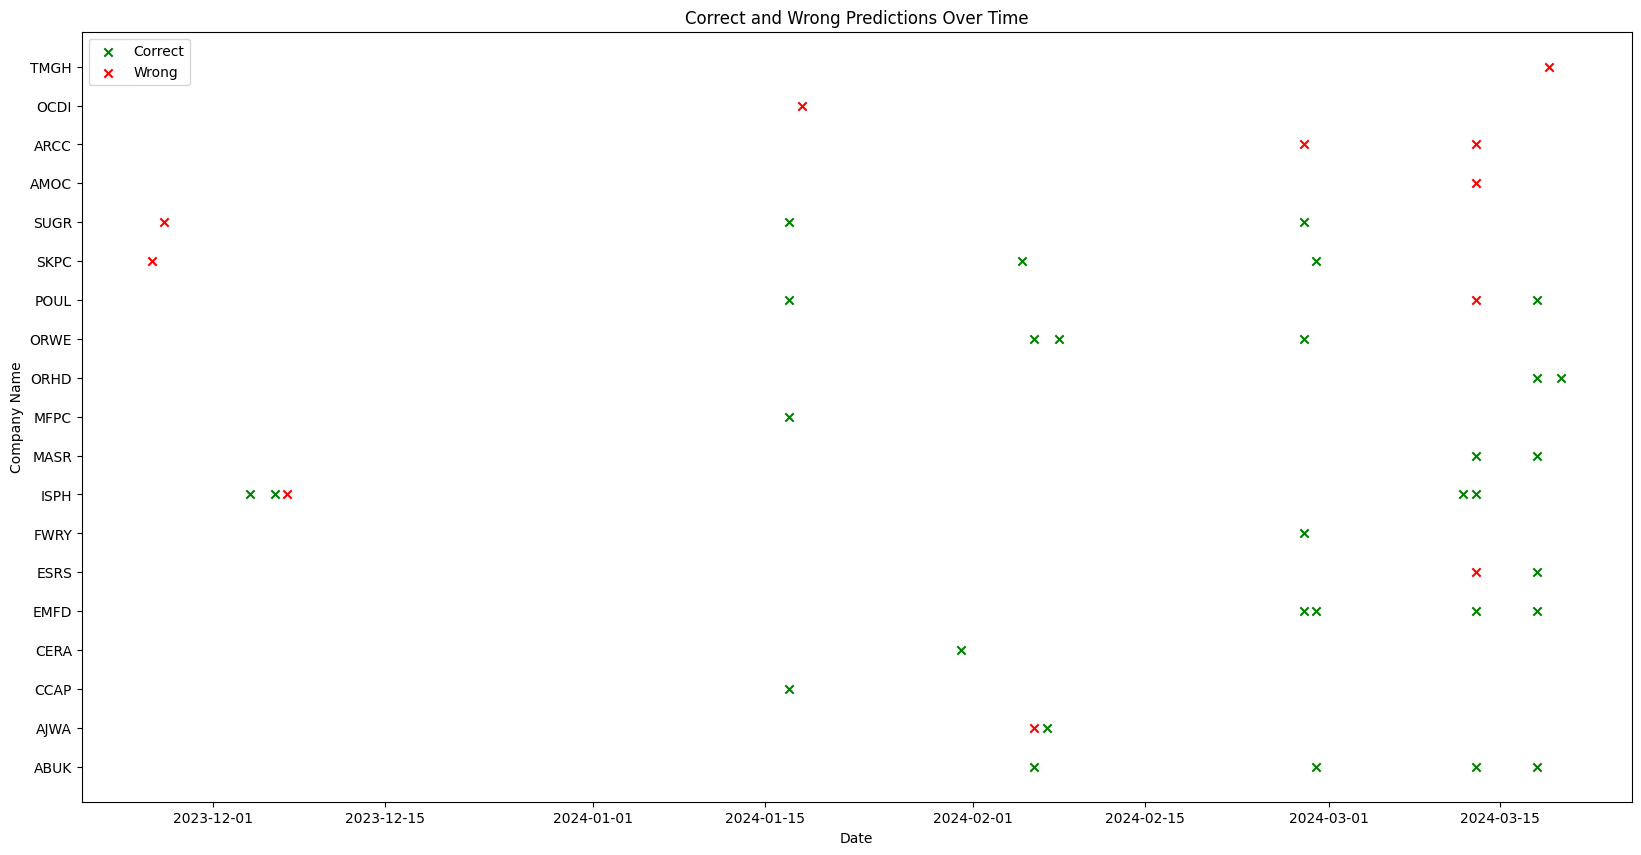

In [82]:
df_correct = buy[buy.predict_correct=='1'][['Company','date']]
df_wrong = buy[buy.predict_wrong=='1'][['Company','date']]
plt.figure(figsize=(20, 10))
plt.scatter(pd.to_datetime(df_correct['date']), df_correct['Company'], c='green', marker='x', label='Correct')
plt.scatter(pd.to_datetime(df_wrong['date']), df_wrong['Company'], c='red', marker='x', label='Wrong')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Company Name')
plt.title('Correct and Wrong Predictions Over Time')
plt.legend()

# Show the plot
plt.show()

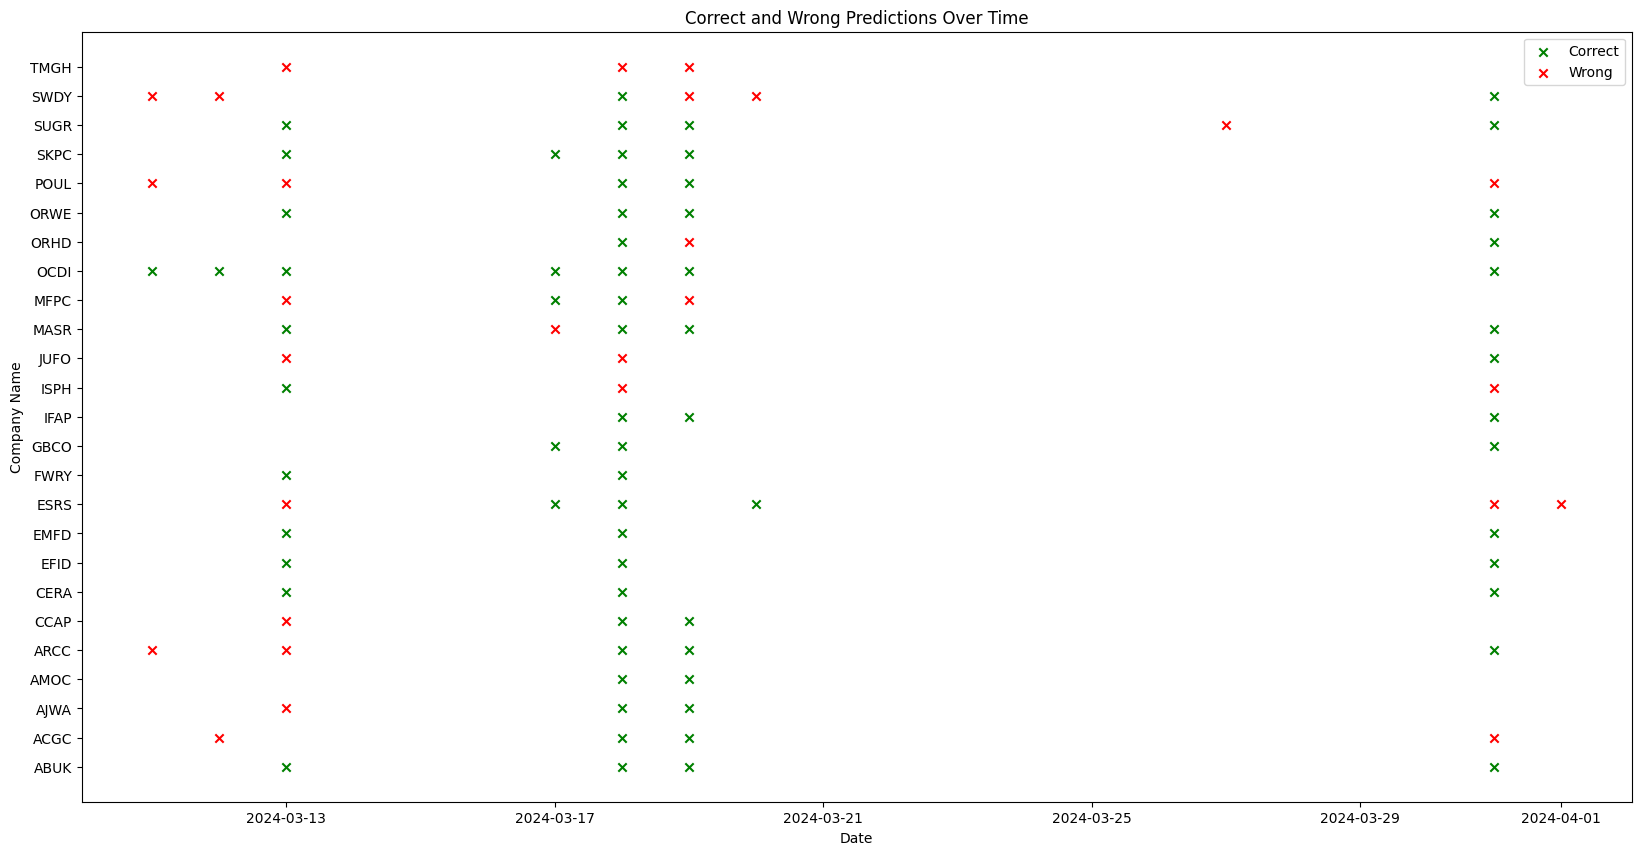

In [270]:
#model with egpx
df_correct = buy[buy.predict_correct=='1'][['Company','date']]
df_wrong = buy[buy.predict_wrong=='1'][['Company','date']]
plt.figure(figsize=(20, 10))
plt.scatter(pd.to_datetime(df_correct['date']), df_correct['Company'], c='green', marker='x', label='Correct')
plt.scatter(pd.to_datetime(df_wrong['date']), df_wrong['Company'], c='red', marker='x', label='Wrong')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Company Name')
plt.title('Correct and Wrong Predictions Over Time')
plt.legend()

# Show the plot
plt.show()

In [ ]:
import seaborn as sns

In [87]:
buy.groupby('binned_column').mean()

,proba,actual,Close,Open,High,Low,buy_max_return,buy_signal_days,Close_yest,actual_shifted,buy_signal,can_buy
binned_column,,,,,,,,,,,,
0 - 0.25,0.210180,0.333333,32.054000,32.367333,32.883333,31.533333,3.380227,3.200000,32.348667,0.333333,0.333333,1.000000
0.25 - 0.5,0.399214,0.367284,22.054154,22.137318,22.707880,21.505404,3.727192,3.117284,22.071762,0.391975,0.367284,0.944444
0.5 - 0.6,0.544357,0.377778,20.315578,20.294811,20.936322,19.635111,4.379210,3.100000,20.177144,0.461111,0.377778,0.900000
"0.6 - 0.7,",0.646716,0.429907,28.895028,29.224729,29.949056,28.069514,4.567725,2.981308,29.045673,0.433962,0.429907,0.953271
0.7 - 0.8,0.747408,0.582090,25.469463,25.827642,26.568791,24.592119,6.267711,2.462687,25.717164,0.552239,0.582090,0.985075
0.8 - 1.0,0.853354,0.819672,27.634262,28.867705,29.478689,26.723279,8.082844,1.754098,28.789836,0.459016,0.819672,0.983607


In [ ]:
buy.groupby('binned_column').median()

<ipython-input-302-f40180c33ce0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  buy.groupby('binned_column').median()


,proba,actual,Close,Open,High,Low,buy_signal,buy_max_return,buy_signal_days,Close_yest,actual_shifted,can_buy
binned_column,,,,,,,,,,,,
0 - 0.25,0.048066,0.0,14.205,14.205,14.540,13.865,0.0,4.336259,0.0,14.205,0.0,1.0
0.25 - 0.5,0.372730,0.0,16.705,17.235,17.445,16.580,0.0,5.793826,0.0,17.115,0.0,1.0
0.5 - 0.6,0.553404,1.0,17.440,17.725,17.885,17.330,1.0,7.673345,1.0,17.535,1.0,1.0
"0.6 - 0.7,",0.655425,1.0,19.445,19.145,19.715,18.625,1.0,6.581380,1.0,18.965,1.0,1.0
0.7 - 0.8,0.739837,1.0,20.520,18.700,21.500,18.250,1.0,7.572650,1.0,18.700,1.0,1.0
0.8 - 1.0,0.920732,1.0,24.355,23.580,24.860,23.140,1.0,14.002806,1.0,23.130,1.0,1.0


In [ ]:
buy.groupby('binned_column').mean()

<ipython-input-303-6372df588d1f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  buy.groupby('binned_column').mean()


,proba,actual,Close,Open,High,Low,buy_signal,buy_max_return,buy_signal_days,Close_yest,actual_shifted,can_buy
binned_column,,,,,,,,,,,,
0 - 0.25,0.070393,0.424893,24.830270,24.926706,25.491987,24.386202,0.424893,7.296712,1.141631,24.839770,0.389247,0.937768
0.25 - 0.5,0.371978,0.487500,22.915062,22.920337,23.742337,22.130525,0.487500,8.829962,0.912500,22.765138,0.487500,0.925000
0.5 - 0.6,0.553727,0.535714,24.477500,23.902929,25.223429,23.381286,0.535714,10.221248,0.964286,23.858214,0.714286,0.964286
"0.6 - 0.7,",0.645634,0.545455,25.614500,25.947682,27.260000,24.589091,0.545455,14.678978,0.772727,25.899955,0.590909,0.954545
0.7 - 0.8,0.744041,0.529412,29.728235,27.940000,30.797647,27.643529,0.529412,16.236481,1.000000,28.590588,0.882353,0.823529
0.8 - 1.0,0.907536,0.846154,28.538692,27.008385,29.177308,26.459654,0.846154,23.175727,1.250000,26.859904,0.923077,0.865385


In [88]:
buy[buy.actual==1].groupby('buy_signal_days').median()

,proba,actual,Close,Open,High,Low,buy_max_return,Close_yest,actual_shifted,buy_signal,can_buy
buy_signal_days,,,,,,,,,,,
1.0,0.572355,1.0,12.135,12.415,12.79,11.780,8.791765,12.48,1.0,1.0,1.0
2.0,0.529812,1.0,12.310,12.565,12.93,11.945,7.310875,12.52,1.0,1.0,1.0
3.0,0.519126,1.0,13.500,13.800,14.14,13.400,6.730560,13.80,0.0,1.0,1.0


In [89]:
buy[buy.actual==1].groupby('buy_signal_days').size()

buy_signal_days
1.0    200
2.0     82
3.0     45
dtype: int64

In [145]:
buy.groupby('actual').mean()

,proba,Close,Open,High,Low,buy_max_return,buy_signal_days,Close_yest,median_3days,actual_shifted,buy_signal,can_buy
actual,,,,,,,,,,,,
0,0.458611,24.725514,24.708913,25.324476,24.135616,1.847430,3.956472,24.573188,-2.360767,0.217890,0.0,0.917526
1,0.468038,22.957157,23.064541,23.693850,22.377797,11.235679,1.632964,22.904439,6.273019,0.735457,1.0,0.943213


In [ ]:
buy.groupby('actual_shifted').mean()

<ipython-input-117-ed71b585981d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  buy.groupby('actual_shifted').mean()


,proba,actual,Close,Open,High,Low,buy_signal,buy_max_return,Close_yest,can_buy
actual_shifted,,,,,,,,,,
0.0,0.204530,0.179245,24.612862,24.913198,25.383531,24.198233,0.179245,2.953692,24.800950,0.943396
1.0,0.324384,0.816720,17.724974,17.292920,18.209408,16.900576,0.816720,15.236184,17.243746,0.913183


In [90]:
buy.groupby('predict_correct').mean()

,proba,actual,Close,Open,High,Low,buy_max_return,buy_signal_days,Close_yest,actual_shifted,buy_signal,can_buy
predict_correct,,,,,,,,,,,,
0,0.509901,0.393466,23.444392,23.588317,24.219501,22.774121,4.217545,3.045455,23.489935,0.428165,0.393466,0.940341
1,0.856833,1.000000,25.244400,26.466400,27.029400,24.466400,9.583134,1.260000,26.371400,0.500000,1.000000,0.980000


In [95]:
100*buy.groupby(['predict_correct','buy_signal_days']).size()/buy.groupby(['predict_correct']).size()

predict_correct  buy_signal_days
0                1.0                22.727273
                 2.0                10.653409
                 3.0                 5.965909
                 4.0                60.653409
1                1.0                80.000000
                 2.0                14.000000
                 3.0                 6.000000
dtype: float64

In [98]:
100*buy.groupby(['buy_signal_days','predict_correct']).size()/buy.groupby(['buy_signal_days']).size()

buy_signal_days  predict_correct
1.0              0                   80.000000
                 1                   20.000000
2.0              0                   91.463415
                 1                    8.536585
3.0              0                   93.333333
                 1                    6.666667
4.0              0                  100.000000
dtype: float64

In [97]:
100*buy.groupby(['actual','buy_signal_days']).size()/buy.groupby(['actual']).size()

actual  buy_signal_days
0       4.0                100.000000
1       1.0                 61.162080
        2.0                 25.076453
        3.0                 13.761468
dtype: float64

In [146]:
buy.groupby('predict_wrong').mean()

,proba,actual,Close,Open,High,Low,buy_max_return,buy_signal_days,Close_yest,median_3days,actual_shifted,buy_signal,can_buy
predict_wrong,,,,,,,,,,,,,
0,0.460028,0.456673,23.905245,23.939560,24.561966,23.317578,6.129500,2.896268,23.791394,1.586629,0.453165,0.456673,0.928526
1,0.784747,0.000000,26.160643,26.788286,27.339929,25.862214,2.444778,3.857143,26.800286,-2.877857,0.357143,0.000000,1.000000


In [149]:
df_org.groupby(target)['median_3days'].mean()

buy_signal2
0   -2.107797
1    5.348774
Name: median_3days, dtype: float64

In [154]:
df_org[df_org[target]=='0']['median_3days'].quantile(0.5)

-1.43

In [ ]:
buy.groupby('actual').min()

<ipython-input-66-e7f18113b3f4>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  buy.groupby('actual').min()


,date,proba,Company,Close,Open,High,Low,buy_signal,buy_max_return,Close_yest,binned_column
actual,,,,,,,,,,,
0,2023-12-26,0.014988,ACGC,0.812,0.825,0.832,0.81,0,-10.659187,0.833145,0 - 0.25
1,2023-12-26,0.024071,ACGC,0.815,0.815,0.825,0.80,1,6.038394,0.816060,0 - 0.25


In [ ]:
buy.actual.value_counts()

0    5724
1    5616
Name: actual, dtype: int64

In [ ]:
buy.buy_signal.value_counts()

0    5724
1    5616
Name: buy_signal, dtype: int64

In [ ]:
buy[buy.Company_x=='AJWA'].head(20)

,date,proba,actual,predict_correct,predict_wrong,Company_x,Company_y,Close,Open,High,Low,buy_signal,buy_max_return,Close_yest,binned_column
630,2023-12-26,0.037473,0,None,None,AJWA,ESRS,85.510,83.700,88.000,83.70,1,8.761548,4.77375,0 - 0.25
631,2023-12-26,0.037473,0,None,None,AJWA,ETEL,35.430,36.890,36.960,35.10,1,7.017217,85.93755,0 - 0.25
632,2023-12-26,0.037473,0,None,None,AJWA,POUL,8.230,8.410,8.500,8.10,0,3.715674,35.60715,0 - 0.25
633,2023-12-26,0.037473,0,None,None,AJWA,EFID,32.100,32.860,33.000,31.61,0,-2.305296,8.27115,0 - 0.25
634,2023-12-26,0.037473,0,None,None,AJWA,ARCC,9.500,9.800,9.800,9.45,1,23.686316,32.26050,0 - 0.25
635,2023-12-26,0.037473,0,None,None,AJWA,TMGH,24.500,25.300,25.300,24.27,0,-1.080000,9.54750,0 - 0.25
636,2023-12-26,0.037473,0,None,None,AJWA,JUFO,15.590,16.250,16.350,15.54,0,5.480436,24.62250,0 - 0.25
637,2023-12-26,0.037473,0,None,None,AJWA,AJWA,35.630,36.500,36.700,35.40,0,5.893910,15.66795,0 - 0.25
638,2023-12-26,0.037473,0,None,None,AJWA,BTFH,3.310,3.170,3.490,3.15,1,12.803625,35.80815,0 - 0.25
639,2023-12-26,0.037473,0,None,None,AJWA,ORHD,10.900,11.190,11.400,10.72,1,7.080734,3.32655,0 - 0.25


In [ ]:
df = df_org[df_org.Company=='ESRS']

In [ ]:
grouped_df = tt.resample('4D').agg({
    'Close': 'max',
    'Close': 'count'
})

In [ ]:
def check_values(row):

    highs = row['High_mod_list_next']
    sell_price = row['Close_last'] *1.05
    if highs:
        highs = highs[1:]
        if any(value > sell_price for value in highs):

            return '1'
        else:
            return '0'

    else:
        return None




In [ ]:
df['group'] = (df.reset_index().index // 4) + 1

grouped_df = df.groupby('group').agg({'Close': ['last','mean','count',max,list],
                                      'High_mod':[list],
                                      'date':[max]
                                     })#.reset_index()
grouped_df.columns = ['Close_last','Close_mean','Close_count','Close_max','Close_list','High_mod_list','date_max']
# Reset index if needed
#grouped_df = grouped_df.reset_index()
grouped_df['High_mod_list_next'] = grouped_df['High_mod_list'].shift(-1)

# Apply the function to create a new column 'is_greater'
grouped_df['buy_signal_new'] = grouped_df.apply(check_values, axis=1)

grouped_df

<ipython-input-113-d3e2880491bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['group'] = (df.reset_index().index // 4) + 1


,Close_last,Close_mean,Close_count,Close_max,Close_list,High_mod_list,date_max,High_mod_list_next,buy_signal_new
group,,,,,,,,,
1,12.71,13.2700,4,13.89,"[13.89, 13.53, 12.95, 12.71]","[13.965, 13.6906, 13.23, 12.681199999999999]",2022-02-14,"[12.9262, 12.9654, 12.7792, 12.544]",0
2,12.70,12.9200,4,13.05,"[13.05, 12.99, 12.94, 12.7]","[12.9262, 12.9654, 12.7792, 12.544]",2022-02-20,"[13.455400000000001, 13.3182, 13.3574, 12.887]",1
3,12.90,13.3450,4,13.66,"[13.66, 13.38, 13.44, 12.9]","[13.455400000000001, 13.3182, 13.3574, 12.887]",2022-02-24,"[13.279, 13.2594, 13.2692, 13.5632]",1
4,13.76,13.4825,4,13.76,"[13.47, 13.24, 13.46, 13.76]","[13.279, 13.2594, 13.2692, 13.5632]",2022-03-02,"[14.1512, 14.895999999999999, 15.1508, 14.602]",1
5,14.61,14.7550,4,15.10,"[14.41, 15.1, 14.9, 14.61]","[14.1512, 14.895999999999999, 15.1508, 14.602]",2022-03-08,"[14.5922, 14.739199999999999, 15.0626, 14.7784]",0
...,...,...,...,...,...,...,...,...,...
121,78.50,80.6125,4,83.70,"[83.7, 80.09, 80.16, 78.5]","[82.271, 82.32, 79.87, 79.5662]",2024-02-06,"[77.9002, 77.91, 78.38040000000001, 77.322]",0
122,78.07,77.6925,4,79.00,"[76.55, 79.0, 77.15, 78.07]","[77.9002, 77.91, 78.38040000000001, 77.322]",2024-02-12,"[79.28200000000001, 78.3706, 78.253, 77.9002]",0
123,79.22,79.0700,4,79.22,"[79.03, 79.03, 79.0, 79.22]","[79.28200000000001, 78.3706, 78.253, 77.9002]",2024-02-18,"[80.654, 80.9382, 80.36, 79.7916]",0


In [ ]:
grouped_df.buy_signal_new.value_counts()

0    86
1    38
Name: buy_signal_new, dtype: int64

In [ ]:
dd = df_org[['Company','High','date']].copy()
dd

,Company,High,date
2020-01-02,MASR,3.64,2020-01-02
2020-01-05,MASR,3.52,2020-01-05
2020-01-06,MASR,3.32,2020-01-06
2020-01-08,MASR,3.43,2020-01-08
2020-01-09,MASR,3.52,2020-01-09
...,...,...,...
2024-03-19,RACC,5.65,2024-03-19
2024-03-19,SKPC,26.00,2024-03-19
2024-03-19,SUGR,64.00,2024-03-19
2024-03-19,SWDY,35.13,2024-03-19


In [ ]:
dd['new_column'] = dd['date'].where(dd['High'] > 10)
dd.groupby(['Company']).new_column.max()

Company
ABUK   2024-03-19
ACGC          NaT
AJWA   2024-03-19
AMOC   2024-03-06
ARCC   2024-03-19
BTFH          NaT
CERA          NaT
CLHO          NaT
EFID   2024-03-19
ESRS   2024-03-19
ETEL   2024-03-19
FWRY   2021-08-16
IFAP   2024-03-19
ISPH          NaT
JUFO   2024-03-19
MASR          NaT
MFPC   2024-03-19
OCDI   2024-03-19
ORHD   2024-03-19
ORWE   2024-03-19
POUL   2024-03-07
RACC          NaT
SKPC   2024-03-19
SUGR   2024-03-19
SWDY   2024-03-19
TMGH   2024-03-19
Name: new_column, dtype: datetime64[ns]